In [1]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()

In [2]:
cursor.execute("select column_name from user_tab_columns where table_name = '반기별구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)

['고객번호', 'y14_1', 'y14_2', 'y15_1', 'y15_2', '선매품_1', '선매품_2', '선매품_3', '선매품_4', '편의품_1', '편의품_2', '편의품_3', '편의품_4', '전문품_1', '전문품_2', '전문품_3', '전문품_4', '기타_1', '기타_2', '기타_3', '기타_4']


In [3]:
cursor.execute("select * from 반기별구매액")
x = cursor.fetchall()
df1 = pd.DataFrame(x,columns = col_list)
df1

,고객번호,y14_1,y14_2,y15_1,y15_2,선매품_1,선매품_2,선매품_3,선매품_4,편의품_1,...,편의품_3,편의품_4,전문품_1,전문품_2,전문품_3,전문품_4,기타_1,기타_2,기타_3,기타_4
0,00001,19925355.0,34116312.0,17898365.0,13102518.0,17812110.0,30411510.0,14056600.0,11968620.0,2113245.0,...,3085065.0,1133898.0,NaN,236550.0,756700.0,NaN,NaN,NaN,NaN,NaN
1,00002,24323230.0,21922100.0,27791610.0,25843820.0,18215820.0,17382380.0,22353980.0,22431610.0,6107410.0,...,3893720.0,3412210.0,NaN,434150.0,1543910.0,NaN,NaN,NaN,NaN,NaN
2,00003,851215.0,1042554.0,592280.0,679118.0,80000.0,26900.0,NaN,7800.0,771215.0,...,592280.0,671318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00004,5042106.0,4257510.0,3656937.0,3737257.0,3309520.0,3244440.0,1748730.0,1939080.0,1732586.0,...,1908207.0,1628177.0,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,NaN
4,00005,5460150.0,2225730.0,2934930.0,2616260.0,2054230.0,1105100.0,1902610.0,1423650.0,3348920.0,...,1032320.0,1192610.0,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,NaN,1190620.0,2395920.0,2192740.0,NaN,449900.0,742600.0,394680.0,NaN,...,1653320.0,1439010.0,NaN,NaN,NaN,359050.0,NaN,NaN,NaN,NaN
19379,19380,NaN,522700.0,837950.0,2552327.0,NaN,9900.0,47000.0,140990.0,NaN,...,790950.0,2411337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,NaN,2797171.0,3243498.0,NaN,NaN,564700.0,612000.0,NaN,...,2232471.0,2631498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19381,19382,NaN,NaN,1826739.0,2575034.0,NaN,NaN,183600.0,263800.0,NaN,...,1643139.0,2311234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [592]:
df1.to_csv('분석4_반기별구매액.csv')

In [117]:
df11 = df1[['고객번호','y14_1','y14_2','y15_1','선매품_1','선매품_2','선매품_3','편의품_1','편의품_2','편의품_3','전문품_1','전문품_2','전문품_3','기타_1','기타_2','기타_3']]
df11.fillna(0,inplace=True)
df11['label_13'] = df11.y15_1 - df11.y14_1*1.07
df11['label_13'] = np.where(df11.label_13>0,0,1)
df111 = df11[['고객번호','y14_1','y14_2','선매품_1','선매품_2','편의품_1','편의품_2','전문품_1','전문품_2','기타_1','기타_2','label_13']]
df111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Master\AppData\Local\Temp\ipykernel_29768\3812471346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['label_13'] = df11.y15_1 - df11.y14_1*1.07
C:\Users\Master\AppData\Local\Temp\ipykernel_29768\3812471346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,고객번호,y14_1,y14_2,선매품_1,선매품_2,편의품_1,편의품_2,전문품_1,전문품_2,기타_1,기타_2,label_13
0,00001,19925355.0,34116312.0,17812110.0,30411510.0,2113245.0,3468252.0,0.0,236550.0,0.0,0.0,1
1,00002,24323230.0,21922100.0,18215820.0,17382380.0,6107410.0,4105570.0,0.0,434150.0,0.0,0.0,0
2,00003,851215.0,1042554.0,80000.0,26900.0,771215.0,1015654.0,0.0,0.0,0.0,0.0,1
3,00004,5042106.0,4257510.0,3309520.0,3244440.0,1732586.0,1013070.0,0.0,0.0,0.0,0.0,1
4,00005,5460150.0,2225730.0,2054230.0,1105100.0,3348920.0,1120630.0,57000.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,0.0,449900.0,0.0,740720.0,0.0,0.0,0.0,0.0,0
19379,19380,0.0,522700.0,0.0,9900.0,0.0,512800.0,0.0,0.0,0.0,0.0,0
19380,19381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19381,19382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [118]:
col_list = list(df111.iloc[:,1:11].columns)
for col in col_list:
    q1 = np.percentile(df111[col],10)
    q2 = np.percentile(df111[col],20)
    q3 = np.percentile(df111[col],30)
    q4 = np.percentile(df111[col],40)
    q5 = np.percentile(df111[col],50)
    q6 = np.percentile(df111[col],60)
    q7 = np.percentile(df111[col],70)
    q8 = np.percentile(df111[col],80)
    q9 = np.percentile(df111[col],90)
    df111.loc[(df111[col]>0)&(df111[col]<q1),col] = 1
    df111.loc[(df111[col]>0)&(df111[col]>=q1)&(df111[col]<q2),col] = 2
    df111.loc[(df111[col]>0)&(df111[col]>=q2)&(df111[col]<q3),col] = 3
    df111.loc[(df111[col]>0)&(df111[col]>=q3)&(df111[col]<q4),col] = 4
    df111.loc[(df111[col]>0)&(df111[col]>=q4)&(df111[col]<q5),col] = 5
    df111.loc[(df111[col]>0)&(df111[col]>=q5)&(df111[col]<q6),col] = 6
    df111.loc[(df111[col]>0)&(df111[col]>=q6)&(df111[col]<q7),col] = 7
    df111.loc[(df111[col]>0)&(df111[col]>=q7)&(df111[col]<q8),col] = 8
    df111.loc[(df111[col]>0)&(df111[col]>=q8)&(df111[col]<q9),col] = 9
    df111.loc[(df111[col]>0)&(df111[col]>=q9),col] = 10


# for col in col_list:
#     q1 = np.percentile(df111[col],25)
#     q2 = np.percentile(df111[col],50)
#     q3 = np.percentile(df111[col],75)
#     df111.loc[(df111[col]>0)&(df111[col]<q1),col] = 1
#     df111.loc[(df111[col]>0)&(df111[col]>=q1)&(df111[col]<q2),col] = 2
#     df111.loc[(df111[col]>0)&(df111[col]>=q2)&(df111[col]<q3),col] = 3
#     df111.loc[(df111[col]>0)&(df111[col]>=q9),col] = 4
    
    
prod_list = ['y14','선매품','편의품','전문품','기타']    
for prod in prod_list:
    df111[f'{prod}_등급변동1'] = df111[f'{prod}_2'] - df111[f'{prod}_1']

    df111[f'{prod}_구매지수'] = 0.8 * (df111[f'{prod}_등급변동1']) + 0.2 * (df111[f'{prod}_등급변동1'].apply(lambda x: abs(x)))
    
df111['총구매지수'] = df111['y14_구매지수']
df111


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Master\AppData\Local\Temp\ipykernel_29768\4098087247.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df111[f'{prod}_등급변동1'] = df111[f'{prod}_2'] - df111[f'{prod}_1']
C:\Users\Master\AppData\Local\Temp\ipykernel_29768\4098087247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,고객번호,y14_1,y14_2,선매품_1,선매품_2,편의품_1,편의품_2,전문품_1,전문품_2,기타_1,...,y14_구매지수,선매품_등급변동1,선매품_구매지수,편의품_등급변동1,편의품_구매지수,전문품_등급변동1,전문품_구매지수,기타_등급변동1,기타_구매지수,총구매지수
0,00001,10.0,10.0,10.0,10.0,6.0,9.0,0.0,8.0,0.0,...,0.0,0.0,0.0,3.0,3.0,8.0,8.0,0.0,0.0,0.0
1,00002,10.0,10.0,10.0,10.0,10.0,9.0,0.0,9.0,0.0,...,0.0,0.0,0.0,-1.0,-0.6,9.0,9.0,0.0,0.0,0.0
2,00003,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,-1.0,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004,7.0,5.0,7.0,7.0,5.0,2.0,0.0,0.0,0.0,...,-1.2,0.0,0.0,-3.0,-1.8,0.0,0.0,0.0,0.0,-1.2
4,00005,7.0,2.0,6.0,5.0,9.0,2.0,8.0,0.0,0.0,...,-3.0,-1.0,-0.6,-7.0,-4.2,-8.0,-4.8,0.0,0.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
19379,19380,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
19380,19381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df1111 = df111[['고객번호','총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수','label_13']]
df1111.고객번호 = df1111.고객번호.astype(int)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [120]:
cursor.execute("select column_name from user_tab_columns where table_name = '제휴사별반기구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)

['고객번호', 'A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3', 'B_4', 'C_1', 'C_2', 'C_3', 'C_4', 'D_1', 'D_2', 'D_3', 'D_4']


In [121]:
cursor.execute("select * from 제휴사별반기구매액")
x = cursor.fetchall()
df1234 = pd.DataFrame(x,columns = col_list)
df1234.고객번호 = df1234.고객번호.astype(int)
df1234.fillna(0,inplace=True)
df1234

,고객번호,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,C_1,C_2,C_3,C_4,D_1,D_2,D_3,D_4
0,1,19703210.0,33340300.0,17382750.0,12800890.0,21800.0,376140.0,208136.0,184900.0,200345.0,399872.0,307479.0,116728.0,0.0,0.0,0.0,0.0
1,2,24292730.0,21875650.0,27486650.0,25799820.0,30500.0,46450.0,132500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172460.0,44000.0
2,3,80000.0,0.0,0.0,0.0,0.0,6960.0,0.0,0.0,771215.0,1035594.0,592280.0,679118.0,0.0,0.0,0.0,0.0
3,4,4628260.0,3711520.0,3170780.0,2764050.0,80060.0,420740.0,333864.0,759402.0,333786.0,125250.0,152293.0,213805.0,0.0,0.0,0.0,0.0
4,5,5444150.0,2225730.0,2917380.0,2586960.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17550.0,29300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,469900.0,699820.0,840300.0,0.0,0.0,203290.0,97690.0,0.0,0.0,54570.0,0.0,0.0,720720.0,1438240.0,1254750.0
19379,19380,0.0,0.0,0.0,52300.0,0.0,0.0,30280.0,30000.0,0.0,0.0,0.0,146837.0,0.0,522700.0,807670.0,2323190.0
19380,19381,0.0,0.0,326100.0,76500.0,0.0,0.0,2471071.0,3143508.0,0.0,0.0,0.0,23490.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,175100.0,0.0,0.0,0.0,1651639.0,2567044.0,0.0,0.0,0.0,7990.0,0.0,0.0,0.0,0.0


In [122]:
col_list = list(df1234.iloc[:,1:].columns)
for col in col_list:
    q1 = np.percentile(df1234[col],10)
    q2 = np.percentile(df1234[col],20)
    q3 = np.percentile(df1234[col],30)
    q4 = np.percentile(df1234[col],40)
    q5 = np.percentile(df1234[col],50)
    q6 = np.percentile(df1234[col],60)
    q7 = np.percentile(df1234[col],70)
    q8 = np.percentile(df1234[col],80)
    q9 = np.percentile(df1234[col],90)
    df1234.loc[(df1234[col]>0)&(df1234[col]<q1),col] = 1
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q1)&(df1234[col]<q2),col] = 2
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q2)&(df1234[col]<q3),col] = 3
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q3)&(df1234[col]<q4),col] = 4
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q4)&(df1234[col]<q5),col] = 5
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q5)&(df1234[col]<q6),col] = 6
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q6)&(df1234[col]<q7),col] = 7
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q7)&(df1234[col]<q8),col] = 8
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q8)&(df1234[col]<q9),col] = 9
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q9),col] = 10

# for col in col_list:
#     q1 = np.percentile(df1234[col],25)
#     q2 = np.percentile(df1234[col],50)
#     q3 = np.percentile(df1234[col],75)    
#     df1234.loc[(df1234[col]>0)&(df1234[col]<q1),col] = 1
#     df1234.loc[(df1234[col]>0)&(df1234[col]>=q1)&(df1234[col]<q2),col] = 2
#     df1234.loc[(df1234[col]>0)&(df1234[col]>=q2)&(df1234[col]<q3),col] = 3
#     df1234.loc[(df1234[col]>0)&(df1234[col]>=q9),col] = 4
    
    
com_list = ['A','B','C','D']

for prod in com_list:
    df1234[f'{prod}_등급변동1'] = df1234[f'{prod}_2'] - df1234[f'{prod}_1']

    df1234[f'{prod}_구매지수'] = 0.8 * (df1234[f'{prod}_등급변동1']) + 0.2 * (df1234[f'{prod}_등급변동1'].apply(lambda x: abs(x)))
df1234

,고객번호,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,C_1,...,D_3,D_4,A_등급변동1,A_구매지수,B_등급변동1,B_구매지수,C_등급변동1,C_구매지수,D_등급변동1,D_구매지수
0,1,10.0,10.0,9.0,9.0,3.0,5.0,4.0,4.0,8.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
1,2,10.0,10.0,10.0,10.0,3.0,3.0,4.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,...,0.0,0.0,-3.0,-1.8,2.0,2.0,0.0,0.0,0.0,0.0
3,4,7.0,7.0,7.0,6.0,4.0,5.0,5.0,6.0,8.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,-0.6,0.0,0.0
4,5,7.0,6.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,...,10.0,10.0,-1.0,-0.6,-3.0,-1.8,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,5.0,5.0,5.0,0.0,0.0,4.0,4.0,0.0,...,10.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,10.0,10.0
19379,19380,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
19380,19381,0.0,0.0,4.0,3.0,0.0,0.0,8.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,4.0,0.0,0.0,0.0,7.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
df101 = pd.read_csv('recency.csv',index_col=0)

df11111 = pd.merge(df101,df1111,how='inner',on='고객번호')
df1001 = pd.read_csv('df.csv',index_col = 0)
df1001.columns = ['고객번호','선매품_횟수_1','선매품_횟수_2','선매품_횟수_3','선매품_횟수_4']
df1001['선매품_횟수변동'] = df1001['선매품_횟수_2'] - df1001['선매품_횟수_1']


df1002 = pd.read_csv('df1.csv',index_col = 0)
df1002.columns = ['고객번호','편의품_횟수_1','편의품_횟수_2','편의품_횟수_3','편의품_횟수_4']
df1002['편의품_횟수변동'] = df1002['편의품_횟수_2'] - df1002['편의품_횟수_1']

df1003 = pd.read_csv('df2.csv',index_col = 0)
df1003.columns = ['고객번호','전문품_횟수_1','전문품_횟수_2','전문품_횟수_3','전문품_횟수_4']
df1003['전문품_횟수변동'] = df1003['전문품_횟수_2'] - df1003['전문품_횟수_1']

df1004 = pd.read_csv('df3.csv',index_col = 0)
df1004.columns = ['고객번호','기타_횟수_1','기타_횟수_2','기타_횟수_3','기타_횟수_4']
df1004['기타_횟수변동'] = df1004['기타_횟수_2'] - df1004['기타_횟수_1']

# df11111 = pd.merge(df11111,df1001[['고객번호','선매품_횟수_1','선매품_횟수_2']],how='inner',on='고객번호')
# df11111 = pd.merge(df11111,df1002[['고객번호','편의품_횟수_1','편의품_횟수_2']],how='inner',on='고객번호')
# df11111 = pd.merge(df11111,df1003[['고객번호','전문품_횟수_1','전문품_횟수_2']],how='inner',on='고객번호')
# df11111 = pd.merge(df11111,df1004[['고객번호','기타_횟수_1','기타_횟수_2']],how='inner',on='고객번호')

# df11111 = pd.merge(df11111,df1001[['고객번호','선매품_횟수']],how='inner',on='고객번호')
# df11111 = pd.merge(df11111,df1002[['고객번호','편의품_횟수']],how='inner',on='고객번호')
# df11111 = pd.merge(df11111,df1003[['고객번호','전문품_횟수']],how='inner',on='고객번호')
# df11111 = pd.merge(df11111,df1004[['고객번호','기타_횟수']],how='inner',on='고객번호')

# df1005 = pd.read_csv('RE1.csv',index_col = 0)
# df11111 = pd.merge(df11111,df1005, how='left',on='고객번호')

# df1006 = pd.read_csv('RE2.csv',index_col=0)
# df11111 = pd.merge(df11111,df1006,how='left', on='고객번호')

# df11111.fillna(0,inplace=True)

df11111 = pd.merge(df11111,df1234[['고객번호','A_구매지수','B_구매지수','C_구매지수','D_구매지수']],how='inner',on='고객번호')
df11111['총구매횟수변동'] = df1001['선매품_횟수변동'] + df1002['편의품_횟수변동'] + df1003['전문품_횟수변동'] + df1004['기타_횟수변동']
df11111

,고객번호,RECENCY,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_13,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동
0,19273,365,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,0.0,0.0,210
1,19228,364,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,0.0,0.0,36
2,19294,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,0.0,0.0,167
3,19229,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-3.0,0.0,0.0,-16
4,19212,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,0.0,0.0,-127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,18192,1,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,599
19334,16774,1,-0.6,-0.6,-1.2,0.0,0.0,1,0.0,0.0,-0.6,0.0,334
19335,13925,1,0.0,-0.6,-1.2,0.0,0.0,1,0.0,0.0,8.0,0.0,142
19336,18857,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,376


In [124]:
# col_list = ['선매품_횟수_1','선매품_횟수_2','편의품_횟수_1','편의품_횟수_2','전문품_횟수_1','전문품_횟수_2','기타_횟수_1','기타_횟수_2']
# col_list = ['선매품_횟수_12','편의품_횟수_12','전문품_횟수_12','기타_횟수_12']
col_list = ['총구매횟수변동']
for col in col_list:
    q1 = np.percentile(df11111[col],10)
    q2 = np.percentile(df11111[col],20)
    q3 = np.percentile(df11111[col],30)
    q4 = np.percentile(df11111[col],40)
    q5 = np.percentile(df11111[col],50)
    q6 = np.percentile(df11111[col],60)
    q7 = np.percentile(df11111[col],70)
    q8 = np.percentile(df11111[col],80)
    q9 = np.percentile(df11111[col],90)
    df11111.loc[(df11111[col]<q1),col] = 1
    df11111.loc[(df11111[col]>=q1)&(df11111[col]<q2),col] = 2
    df11111.loc[(df11111[col]>=q2)&(df11111[col]<q3),col] = 3
    df11111.loc[(df11111[col]>=q3)&(df11111[col]<q4),col] = 4
    df11111.loc[(df11111[col]>=q4)&(df11111[col]<q5),col] = 5
    df11111.loc[(df11111[col]>=q5)&(df11111[col]<q6),col] = 6
    df11111.loc[(df11111[col]>=q6)&(df11111[col]<q7),col] = 7
    df11111.loc[(df11111[col]>=q7)&(df11111[col]<q8),col] = 8
    df11111.loc[(df11111[col]>=q8)&(df11111[col]<q9),col] = 9
    df11111.loc[(df11111[col]>=q9),col] = 10
    
# for col in col_list:
#     q1 = np.percentile(df11111[col],25)
#     q2 = np.percentile(df11111[col],50)
#     q3 = np.percentile(df11111[col],75)   
#     df11111.loc[(df11111[col]>0)&(df11111[col]<q1),col] = 1
#     df11111.loc[(df11111[col]>0)&(df11111[col]>=q1)&(df11111[col]<q2),col] = 2
#     df11111.loc[(df11111[col]>0)&(df11111[col]>=q2)&(df11111[col]<q3),col] = 3
#     df11111.loc[(df11111[col]>0)&(df11111[col]>=q9),col] = 4

# prod_list = ['선매품','편의품','전문품','기타']  

# for prod in prod_list:
#     df11111[f'{prod}_등급변동1'] = df11111[f'{prod}_횟수_2'] - df11111[f'{prod}_횟수_1']

#     df11111[f'{prod}_횟수지수'] = 0.9 * (df11111[f'{prod}_등급변동1']) + 0.3 * (df11111[f'{prod}_등급변동1'].apply(lambda x: abs(x)))
    
df11111

,고객번호,RECENCY,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_13,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동
0,19273,365,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,0.0,0.0,8
1,19228,364,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,0.0,0.0,2
2,19294,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,0.0,0.0,7
3,19229,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-3.0,0.0,0.0,1
4,19212,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,18192,1,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,10
19334,16774,1,-0.6,-0.6,-1.2,0.0,0.0,1,0.0,0.0,-0.6,0.0,10
19335,13925,1,0.0,-0.6,-1.2,0.0,0.0,1,0.0,0.0,8.0,0.0,6
19336,18857,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,10


In [125]:
cursor.execute("select column_name from user_tab_columns where table_name = '공통분류별반기구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from 공통분류별반기구매액")
x = cursor.fetchall()
df10789 = pd.DataFrame(x,columns = col_list)
df10789.fillna(0,inplace=True)
df10789.고객번호 = df10789.고객번호.astype(int)
df10789

['고객번호', '가공식품_1', '가공식품_2', '가공식품_3', '가공식품_4', '신선식품_1', '신선식품_2', '신선식품_3', '신선식품_4', '일상용품_1', '일상용품_2', '일상용품_3', '일상용품_4', '의류_1', '의류_2', '의류_3', '의류_4', '패션잡화_1', '패션잡화_2', '패션잡화_3', '패션잡화_4', '전문스포츠/레저_1', '전문스포츠/레저_2', '전문스포츠/레저_3', '전문스포츠/레저_4', '디지털/가전_1', '디지털/가전_2', '디지털/가전_3', '디지털/가전_4', '교육/문화용품_1', '교육/문화용품_2', '교육/문화용품_3', '교육/문화용품_4', '가구/인테리어_1', '가구/인테리어_2', '가구/인테리어_3', '가구/인테리어_4', '시설_1', '시설_2', '시설_3', '시설_4', '의약품/의료기기_1', '의약품/의료기기_2', '의약품/의료기기_3', '의약품/의료기기_4']


,고객번호,가공식품_1,가공식품_2,가공식품_3,가공식품_4,신선식품_1,신선식품_2,신선식품_3,신선식품_4,일상용품_1,...,가구/인테리어_3,가구/인테리어_4,시설_1,시설_2,시설_3,시설_4,의약품/의료기기_1,의약품/의료기기_2,의약품/의료기기_3,의약품/의료기기_4
0,1,3677680.0,1839680.0,1783020.0,782980.0,1091325.0,1281092.0,1097665.0,352858.0,1739210.0,...,900430.0,836950.0,0.0,0.0,0.0,67700.0,0.0,0.0,17800.0,0.0
1,2,1768030.0,1414850.0,676860.0,1166000.0,3586000.0,2264920.0,2166870.0,1920330.0,8059210.0,...,1991970.0,1322320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,489440.0,588460.0,318970.0,326860.0,218015.0,301234.0,177060.0,266508.0,22950.0,...,0.0,2300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,970440.0,599830.0,1036594.0,1032549.0,632466.0,258080.0,747713.0,442458.0,131630.0,...,29000.0,127700.0,0.0,0.0,0.0,0.0,20320.0,0.0,0.0,10160.0
4,5,2348240.0,1088700.0,1701140.0,1528290.0,947820.0,337680.0,287790.0,170630.0,1280940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2850.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,127740.0,202220.0,279770.0,0.0,0.0,33060.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9500.0,27900.0,29450.0
19379,19380,0.0,16800.0,166120.0,390800.0,0.0,0.0,0.0,78047.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11680.0,3500.0
19380,19381,0.0,0.0,907150.0,1465700.0,0.0,0.0,1120126.0,1125908.0,0.0,...,100775.0,30410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,848340.0,1290050.0,0.0,0.0,583379.0,837924.0,0.0,...,25270.0,77790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
col_list = df10789.iloc[:,1:].columns
for col in col_list:
    q1 = np.percentile(df10789[col],10)
    q2 = np.percentile(df10789[col],20)
    q3 = np.percentile(df10789[col],30)
    q4 = np.percentile(df10789[col],40)
    q5 = np.percentile(df10789[col],50)
    q6 = np.percentile(df10789[col],60)
    q7 = np.percentile(df10789[col],70)
    q8 = np.percentile(df10789[col],80)
    q9 = np.percentile(df10789[col],90)
    df10789.loc[(df10789[col]>0)&(df10789[col]<q1),col] = 1
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q1)&(df10789[col]<q2),col] = 2
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q2)&(df10789[col]<q3),col] = 3
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q3)&(df10789[col]<q4),col] = 4
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q4)&(df10789[col]<q5),col] = 5
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q5)&(df10789[col]<q6),col] = 6
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q6)&(df10789[col]<q7),col] = 7
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q7)&(df10789[col]<q8),col] = 8
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q8)&(df10789[col]<q9),col] = 9
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q9),col] = 10
    
prod_list = ['가공식품','신선식품','일상용품','의류','패션잡화','전문스포츠/레저','디지털/가전','교육/문화용품','가구/인테리어','시설','의약품/의료기기']    
for prod in prod_list:
    df10789[f'{prod}_등급변동1'] = df10789[f'{prod}_2'] - df10789[f'{prod}_1']

    df10789[f'{prod}_구매지수'] = 0.8 * (df10789[f'{prod}_등급변동1']) + 0.2 * (df10789[f'{prod}_등급변동1'].apply(lambda x: abs(x)))
    
df10789

,고객번호,가공식품_1,가공식품_2,가공식품_3,가공식품_4,신선식품_1,신선식품_2,신선식품_3,신선식품_4,일상용품_1,...,디지털/가전_등급변동1,디지털/가전_구매지수,교육/문화용품_등급변동1,교육/문화용품_구매지수,가구/인테리어_등급변동1,가구/인테리어_구매지수,시설_등급변동1,시설_구매지수,의약품/의료기기_등급변동1,의약품/의료기기_구매지수
0,1,10.0,9.0,9.0,4.0,8.0,9.0,8.0,3.0,10.0,...,10.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,9.0,8.0,3.0,6.0,10.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,2.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,-10.0,-6.0
4,5,10.0,6.0,9.0,8.0,8.0,3.0,2.0,2.0,9.0,...,-5.0,-3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0
19379,19380,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
19380,19381,0.0,0.0,5.0,8.0,0.0,0.0,8.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,4.0,7.0,0.0,0.0,5.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df11111 = pd.merge(df11111,df10789[['고객번호','가공식품_구매지수','신선식품_구매지수','일상용품_구매지수','의류_구매지수','패션잡화_구매지수','전문스포츠/레저_구매지수','디지털/가전_구매지수','교육/문화용품_구매지수','가구/인테리어_구매지수','시설_구매지수','의약품/의료기기_구매지수']],how='inner',on='고객번호')
df11111

,고객번호,RECENCY,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_13,A_구매지수,B_구매지수,...,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수
0,19273,365,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19228,364,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,...,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,-1.8,0.0,0.0
2,19294,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,...,0.0,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19229,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-3.0,...,-1.2,-0.6,0.0,0.0,0.0,-1.2,0.0,0.0,0.0,0.0
4,19212,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,...,-0.6,0.0,0.0,0.0,0.0,-1.8,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,18192,1,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.4
19334,16774,1,-0.6,-0.6,-1.2,0.0,0.0,1,0.0,0.0,...,0.0,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19335,13925,1,0.0,-0.6,-1.2,0.0,0.0,1,0.0,0.0,...,-1.2,3.0,0.0,2.0,3.0,0.0,0.0,-1.8,9.0,0.0
19336,18857,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,10.0,0.0


In [128]:
cursor.execute("select column_name from user_tab_columns where table_name = 'CUSTDEMO'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)

['고객번호', '성별', '연령대', '거주지역', '14년도_상반기', '14년도_하반기', '15년도_상반기', '15년도_하반기', '14년도_상반기_구매액', '14년도_하반기_구매액', '15년도_상반기_구매액', '15년도_하반기_구매액']


In [129]:
cursor.execute("select * from custdemo order by 고객번호")
x = cursor.fetchall()
df122 = pd.DataFrame(x,columns = col_list)
df1222 = df122[['고객번호','성별','연령대','거주지역']]
df1222.고객번호 = df1222.고객번호.astype(int)
df1222.거주지역 = df1222.거주지역.astype(float)
df1222

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1222.성별 = le.fit_transform(df1222.성별)
df1222.연령대 = le.fit_transform(df1222.연령대)

def region_cat(x):
    cat = ''
    if x >= 10 and x < 100:
        cat = '서울'
    elif x>=100 and x < 210:
        cat = '경기'
    elif x>=210 and x < 240:
        cat = '인천'
    elif x>=240 and x < 270:
        cat = '강원'
    elif x>=270 and x < 300:
        cat = '충북'
    elif x>300 and x <310:
        cat = '세종'
    elif x>=310 and x<340:
        cat = '충남'
    elif x>=340 and x<360:
        cat = '대전'
    elif x>=360 and x<410:
        cat = '경북'
    elif x>=410 and x<440:
        cat = '대구'
    elif x>=440 and x<460:
        cat = '울산'
    elif x>=460 and x<500:
        cat = '부산'
    elif x>=500 and x<540:
        cat = '경남'
    elif x>=540 and x<570:
        cat = '전북'
    elif x>=570 and x<610:
        cat = '전남'
    elif x>=610 and x<630:
        cat = '광주'
    elif x>=630 and x<640:
        cat = '제주'
    return cat

df1222['거주지역'] = df1222['거주지역'].apply(lambda x:region_cat(x))
df1222.거주지역 = le.fit_transform(df1222.거주지역)
df1222

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Master\AppData\Local\Temp\ipykernel_29768\1318708741.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1222['거주지역'] = df1222['거주지역'].apply(lambda x:region_cat(x))


,고객번호,성별,연령대,거주지역
0,1,1,9,9
1,2,1,9,2
2,3,1,9,9
3,4,0,9,9
4,5,1,9,2
...,...,...,...,...
19378,19379,0,1,9
19379,19380,0,1,9
19380,19381,0,5,8
19381,19382,0,6,8


In [131]:
df11111 = pd.merge(df11111,df1222,how='inner',on='고객번호')

In [132]:
df11111

,고객번호,RECENCY,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_13,A_구매지수,B_구매지수,...,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수,성별,연령대,거주지역
0,19273,365,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,9
1,19228,364,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,...,0.0,0.0,0.0,0.0,-1.8,0.0,0.0,0,6,9
2,19294,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9,0
3,19229,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-3.0,...,0.0,0.0,-1.2,0.0,0.0,0.0,0.0,0,7,0
4,19212,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,...,0.0,0.0,-1.8,0.0,0.0,0.0,0.0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,18192,1,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-5.4,0,7,2
19334,16774,1,-0.6,-0.6,-1.2,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,5
19335,13925,1,0.0,-0.6,-1.2,0.0,0.0,1,0.0,0.0,...,2.0,3.0,0.0,0.0,-1.8,9.0,0.0,0,2,12
19336,18857,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,2.0,0.0,0.0,1.0,0.0,10.0,0.0,1,3,2


In [133]:
df11111['label'] = df11111['label_13']
df11111

,고객번호,RECENCY,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_13,A_구매지수,B_구매지수,...,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수,성별,연령대,거주지역,label
0,19273,365,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,9,0
1,19228,364,-0.6,0.0,-0.6,0.0,0.0,0,0.0,-1.8,...,0.0,0.0,0.0,-1.8,0.0,0.0,0,6,9,0
2,19294,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1,9,0,1
3,19229,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-3.0,...,0.0,-1.2,0.0,0.0,0.0,0.0,0,7,0,1
4,19212,363,-0.6,0.0,-0.6,0.0,0.0,1,0.0,-2.4,...,0.0,-1.8,0.0,0.0,0.0,0.0,0,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,18192,1,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-5.4,0,7,2,1
19334,16774,1,-0.6,-0.6,-1.2,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8,5,1
19335,13925,1,0.0,-0.6,-1.2,0.0,0.0,1,0.0,0.0,...,3.0,0.0,0.0,-1.8,9.0,0.0,0,2,12,1
19336,18857,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,10.0,0.0,1,3,2,0


In [134]:
df1415 = pd.read_csv('PROD11.csv',index_col=0)
df1415.columns = ['고객번호','성장률_14_2','성장률_15_1']
df1415.fillna(0,inplace=True)
df1415

,고객번호,성장률_14_2,성장률_15_1
0,1,71.0,-48.0
1,2,-10.0,27.0
2,3,22.0,-43.0
3,4,-16.0,-14.0
4,5,-59.0,32.0
...,...,...,...
19378,19379,0.0,101.0
19379,19380,0.0,60.0
19380,19381,0.0,0.0
19381,19382,0.0,0.0


In [135]:
df11111 = pd.merge(df11111,df1415[['고객번호','성장률_14_2']],how = 'inner',on='고객번호')
df11111['성장률'] = df11111['성장률_14_2']

In [141]:
df111111 = df11111[['고객번호','총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수',
                    'A_구매지수','B_구매지수','C_구매지수','D_구매지수',
                    '가공식품_구매지수','신선식품_구매지수','일상용품_구매지수',
                    '의류_구매지수','패션잡화_구매지수','전문스포츠/레저_구매지수',
                    '디지털/가전_구매지수','교육/문화용품_구매지수','가구/인테리어_구매지수',
                    '시설_구매지수','의약품/의료기기_구매지수',
                   '총구매횟수변동','성별','연령대','거주지역','RECENCY','성장률','label']]
# df111111 = df111111.drop('RECENCY',axis=1)
df111111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수,...,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label
0,19273,-0.6,0.0,-0.6,0.0,0.0,0.0,-1.8,0.0,0.0,...,0.0,0.0,0.0,8,0,3,9,365,0.0,0
1,19228,-0.6,0.0,-0.6,0.0,0.0,0.0,-1.8,0.0,0.0,...,-1.8,0.0,0.0,2,0,6,9,364,0.0,0
2,19294,-0.6,0.0,-0.6,0.0,0.0,0.0,-2.4,0.0,0.0,...,0.0,0.0,0.0,7,1,9,0,363,0.0,1
3,19229,-0.6,0.0,-0.6,0.0,0.0,0.0,-3.0,0.0,0.0,...,0.0,0.0,0.0,1,0,7,0,363,0.0,1
4,19212,-0.6,0.0,-0.6,0.0,0.0,0.0,-2.4,0.0,0.0,...,0.0,0.0,0.0,1,0,7,0,363,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,18192,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-5.4,10,0,7,2,1,32.0,1
19334,16774,-0.6,-0.6,-1.2,0.0,0.0,0.0,0.0,-0.6,0.0,...,0.0,0.0,0.0,10,0,8,5,1,-12.0,1
19335,13925,0.0,-0.6,-1.2,0.0,0.0,0.0,0.0,8.0,0.0,...,-1.8,9.0,0.0,6,0,2,12,1,13.0,1
19336,18857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,10.0,0.0,10,1,3,2,1,19.0,0


In [142]:
df111111.to_csv('train.csv')

In [30]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

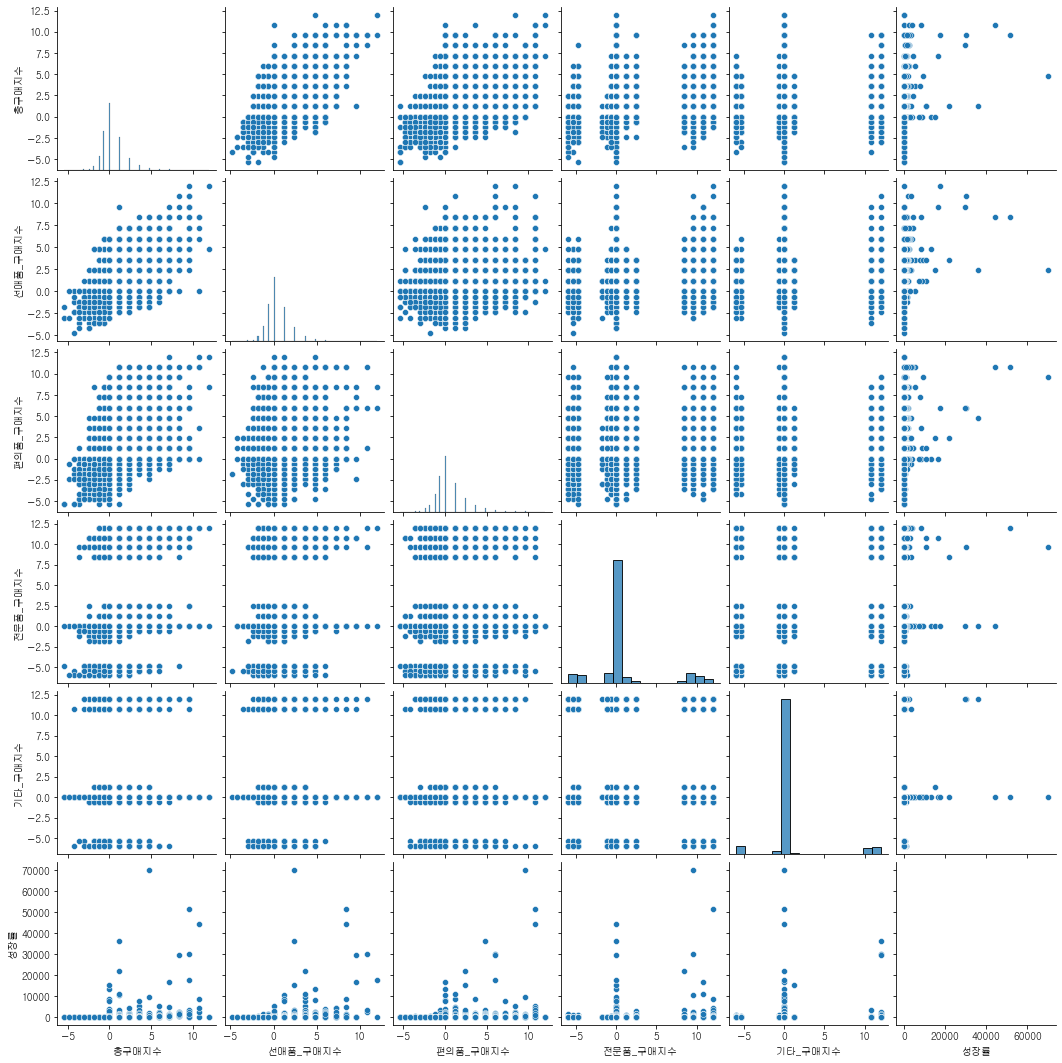

In [32]:
sns.pairplot(df111111[['총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수','성장률']]);


In [36]:
y, X = dmatrices('label ~  총구매지수 + 선매품_구매지수 + 편의품_구매지수 + 전문품_구매지수 + 기타_구매지수 + A_구매지수 + B_구매지수 + C_구매지수 + D_구매지수 + 총구매횟수변동 + 성별 + 연령대 + 거주지역 + RECENCY + 성장률',
                 df111111, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,17.302139,Intercept
1,2.553195,총구매지수
2,2.333919,선매품_구매지수
3,1.609810,편의품_구매지수
4,1.048789,전문품_구매지수
5,1.007025,기타_구매지수
6,1.614259,A_구매지수
7,1.136446,B_구매지수
8,1.009369,C_구매지수
9,1.006974,D_구매지수


<AxesSubplot:>

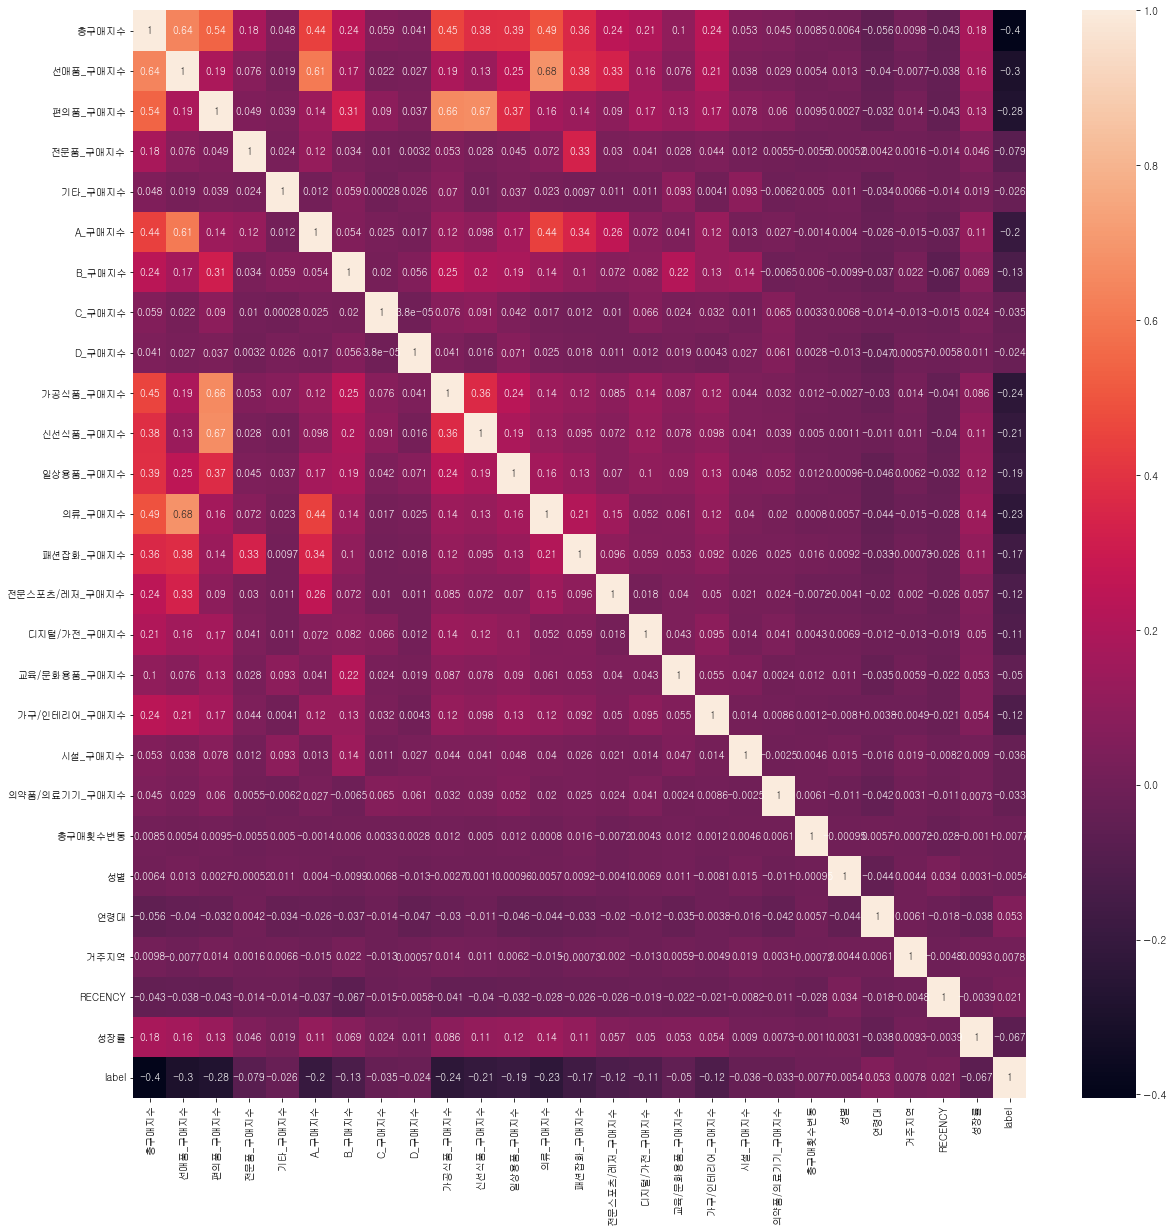

In [137]:
plt.figure(figsize = (20,20))
sns.heatmap(df111111.corr(),annot=True)

In [138]:
# df111112 = df11111[['총구매지수','선매품_구매지수','편의품_구매지수',
#                     'A_구매지수','B_구매지수',
#                     '가공식품_구매지수','신선식품_구매지수','일상용품_구매지수',
#                     '의류_구매지수','패션잡화_구매지수','전문스포츠/레저_구매지수',
#                     '디지털/가전_구매지수','가구/인테리어_구매지수','성장률',
#                     'label']]
# df111112

,총구매지수,선매품_구매지수,편의품_구매지수,A_구매지수,B_구매지수,가공식품_구매지수,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,가구/인테리어_구매지수,성장률,label
0,-0.6,0.0,-0.6,0.0,-1.8,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.6,0.0,-0.6,0.0,-1.8,-0.6,-0.6,0.0,0.0,0.0,0.0,0.0,-1.8,0.0,0
2,-0.6,0.0,-0.6,0.0,-2.4,-0.6,0.0,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.6,0.0,-0.6,0.0,-3.0,-0.6,-1.2,-0.6,0.0,0.0,0.0,-1.2,0.0,0.0,1
4,-0.6,0.0,-0.6,0.0,-2.4,-0.6,-0.6,0.0,0.0,0.0,0.0,-1.8,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,32.0,1
19334,-0.6,-0.6,-1.2,0.0,0.0,-1.8,0.0,-1.2,0.0,0.0,0.0,0.0,0.0,-12.0,1
19335,0.0,-0.6,-1.2,0.0,0.0,0.0,-1.2,3.0,0.0,2.0,3.0,0.0,-1.8,13.0,1
19336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,19.0,0


In [139]:
# df111112.to_csv('train2.csv')

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df111111.drop('label',axis=1)
y = df111111['label']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)

print(accuracy)

0.6273698724577732


In [109]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth':[6,8,10],
    'min_samples_split':[16,20,24]
}

dt_cv = GridSearchCV(dt_clf,param_grid = dt_params,scoring='accuracy',cv=5,verbose=1)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_score_,dt_cv.best_params_)

best_dt_clf = dt_cv.best_estimator_
pred_cv = best_dt_clf.predict(X_test)
print(accuracy_score(y_test,pred_cv))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7016098642449495 {'max_depth': 6, 'min_samples_split': 20}
0.6956221992416408


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print(accuracy_score(y_test,rf_pred))

0.7049293347121682


In [111]:
rf_params = {
    'n_estimators':[100],
    'max_depth':[10,12],
    'min_samples_leaf':[10,12,14],
    'min_samples_split':[6,8]
}

rf_cv = GridSearchCV(rf,param_grid = rf_params,scoring='accuracy',cv=3,verbose=1)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_score_,rf_cv.best_params_)

best_rf_clf = rf_cv.best_estimator_
rf_pred_cv = best_rf_clf.predict(X_test)
print(accuracy_score(y_test,rf_pred_cv))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.7146128841607565 {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
0.709065839365736


In [1370]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
print(accuracy_score(y_test,lr_preds))

0.6885556704584626


In [1082]:
lr_params = {
    'penalty':['l2','l1'],
    'C':[0.01,0.1,1,5,10]
}

lr_cv = GridSearchCV(lr_clf,param_grid = lr_params,scoring='accuracy',cv=3,verbose=1)
lr_cv.fit(X_train,y_train)
print(lr_cv.best_score_,lr_cv.best_params_)

best_lr_clf = lr_cv.best_estimator_
lr_pred_cv = best_lr_clf.predict(X_test)
print(accuracy_score(y_test,lr_pred_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.6920803782505911 {'C': 1, 'penalty': 'l1'}
0.6885556704584626


In [1371]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimator=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set = evals,verbose=True)
lgbm_pred = lgbm_wrapper.predict(X_test)
accuracy_score(y_test,lgbm_pred)

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's binary_logloss: 0.660876
[2]	valid_0's binary_logloss: 0.645892
[3]	valid_0's binary_logloss: 0.633427
[4]	valid_0's binary_logloss: 0.622814
[5]	valid_0's binary_logloss: 0.613921
[6]	valid_0's binary_logloss: 0.606634
[7]	valid_0's binary_logloss: 0.600547
[8]	valid_0's binary_logloss: 0.595647
[9]	valid_0's binary_logloss: 0.591672
[10]	valid_0's binary_logloss: 0.588334
[11]	valid_0's binary_logloss: 0.585292
[12]	valid_0's binary_logloss: 0.582812
[13]	valid_0's binary_logloss: 0.580754
[14]	valid_0's binary_logloss: 0.578895
[15]	valid_0's binary_logloss: 0.577431
[16]	valid_0's binary_logloss: 0.576284
[17]	valid_0's binary_logloss: 0.57525
[18]	valid_0's binary_logloss: 0.574267
[19]	valid_0's binary_logloss: 0.573446
[20]	valid_0's binary_logloss: 0.572831
[21]	valid_0's binary_logloss: 0.572288
[22]	valid_0's binary_logloss: 0.571831
[23]	valid_0's binary_logloss: 0.571294
[24]	valid_0's binary_logloss: 0.57094

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


0.6895897966218545

In [1084]:
lgbm_params = {
    'num_leaves':[32,64,128],
    'max_depth':[32,64,128],
    'min_child_samples':[20,40,60],
    'subsamples':[0.4,0.6,0.8]
}

lgbm_cv = GridSearchCV(lgbm_wrapper,param_grid = lgbm_params,scoring='accuracy',cv=3,verbose=1)
evals = [(X_test,y_test)]
lgbm_cv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
print(lgbm_cv.best_score_,lgbm_cv.best_params_)

best_lgbm_clf = lgbm_cv.best_estimator_
lgbm_pred_cv = best_lgbm_clf.predict(X_test)
print(accuracy_score(y_test,lgbm_pred_cv))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660212
[2]	valid_0's binary_logloss: 0.64538
[3]	valid_0's binary_logloss: 0.633075
[4]	valid_0's binary_logloss: 0.623052
[5]	valid_0's binary_logloss: 0.615
[6]	valid_0's binary_logloss: 0.60838
[7]	valid_0's binary_logloss: 0.602622
[8]	valid_0's binary_logloss: 0.597877
[9]	valid_0's binary_logloss: 0.593955
[10]	valid_0's binary_logloss: 0.590598
[11]	valid_0's binary_logloss: 0.587884
[12]	valid_0's binary_logloss: 0.585592
[13]	valid_0's binary_logloss: 0.583729
[14]	valid_0's binary_logloss: 0.582449
[15]	valid_0's binary_logloss: 0.581197
[16]	valid_0's binary_logloss: 0.580233
[17]	valid_0's binary_logloss: 0.579182
[18]	valid_0's binary_logloss: 0.578219
[19]	valid_0's binary_logloss: 0.577593
[20]	valid_0's binary_logloss: 0.577121
[21]	valid_0's binary_logloss: 0.576965
[22]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[20]	valid_0's binary_logloss: 0.577573
[21]	valid_0's binary_logloss: 0.577464
[22]	valid_0's binary_logloss: 0.576925
[23]	valid_0's binary_logloss: 0.576768
[24]	valid_0's binary_logloss: 0.576774
[25]	valid_0's binary_logloss: 0.576551
[26]	valid_0's binary_logloss: 0.576533
[27]	valid_0's binary_logloss: 0.576127
[28]	valid_0's binary_logloss: 0.576182
[29]	valid_0's binary_logloss: 0.576335
[30]	valid_0's binary_logloss: 0.576643
[31]	valid_0's binary_logloss: 0.576782
[32]	valid_0's binary_logloss: 0.576713
[33]	valid_0's binary_logloss: 0.57669
[34]	valid_0's binary_logloss: 0.576932
[35]	valid_0's binary_logloss: 0.576987
[36]	valid_0's binary_logloss: 0.577034
[37]	valid_0's binary_logloss: 0.577111
[38]	valid_0's binary_logloss: 0.577127
[39]	valid_0's binary_logloss: 0.577097
[40]	valid_0's binary_logloss: 0.577116
[41]	valid_0's binary_logloss: 0.577054
[42]	valid_0's binary_logloss: 0.576793
[43]	valid_0's binary_logloss: 0.57677
[44]	valid_0's binary_logloss: 0.577122
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[64]	valid_0's binary_logloss: 0.578984
[65]	valid_0's binary_logloss: 0.57924
[66]	valid_0's binary_logloss: 0.5795
[67]	valid_0's binary_logloss: 0.579747
[68]	valid_0's binary_logloss: 0.579826
[69]	valid_0's binary_logloss: 0.579878
[70]	valid_0's binary_logloss: 0.579887
[71]	valid_0's binary_logloss: 0.579835
[72]	valid_0's binary_logloss: 0.580129
[73]	valid_0's binary_logloss: 0.580349
[74]	valid_0's binary_logloss: 0.580492
[75]	valid_0's binary_logloss: 0.580531
[76]	valid_0's binary_logloss: 0.580639
[77]	valid_0's binary_logloss: 0.580776
[78]	valid_0's binary_logloss: 0.580756
[79]	valid_0's binary_logloss: 0.581087
[80]	valid_0's binary_logloss: 0.581141
[81]	valid_0's binary_logloss: 0.581199
[82]	valid_0's binary_logloss: 0.581364
[83]	valid_0's binary_logloss: 0.581635
[84]	valid_0's binary_logloss: 0.581976
[85]	valid_0's binary_logloss: 0.582212
[86]	valid_0's binary_logloss: 0.58242
[87]	valid_0's binary_logloss: 0.582635
[88]	valid_0's binary_logloss: 0.582466
[89]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.65988
[2]	valid_0's binary_logloss: 0.644667
[3]	valid_0's binary_logloss: 0.632223
[4]	valid_0's binary_logloss: 0.622005
[5]	valid_0's binary_logloss: 0.61357
[6]	valid_0's binary_logloss: 0.606709
[7]	valid_0's binary_logloss: 0.600856
[8]	valid_0's binary_logloss: 0.596208
[9]	valid_0's binary_logloss: 0.592509
[10]	valid_0's binary_logloss: 0.589369
[11]	valid_0's binary_logloss: 0.586673
[12]	valid_0's binary_logloss: 0.584544
[13]	valid_0's binary_logloss: 0.58282
[14]	valid_0's binary_logloss: 0.581433
[15]	valid_0's binary_logloss: 0.580354
[16]	valid_0's binary_logloss: 0.579545
[17]	valid_0's binary_logloss: 0.578661
[18]	valid_0's binary_logloss: 0.578291
[19]	valid_0's binary_logloss: 0.577875
[20]	valid_0's binary_logloss: 0.577573
[21]	valid_0's binary_logloss: 0.577464
[22]	valid_0's binary_logloss: 0.576925
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[83]	valid_0's binary_logloss: 0.580958
[84]	valid_0's binary_logloss: 0.581136
[85]	valid_0's binary_logloss: 0.581088
[86]	valid_0's binary_logloss: 0.581239
[87]	valid_0's binary_logloss: 0.581415
[88]	valid_0's binary_logloss: 0.58148
[89]	valid_0's binary_logloss: 0.581834
[90]	valid_0's binary_logloss: 0.581949
[91]	valid_0's binary_logloss: 0.582035
[92]	valid_0's binary_logloss: 0.582135
[93]	valid_0's binary_logloss: 0.582154
[94]	valid_0's binary_logloss: 0.582463
[95]	valid_0's binary_logloss: 0.582586
[96]	valid_0's binary_logloss: 0.582603
[97]	valid_0's binary_logloss: 0.582737
[98]	valid_0's binary_logloss: 0.582939
[99]	valid_0's binary_logloss: 0.582878
[100]	valid_0's binary_logloss: 0.583043
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.65988
[2]	valid_0's binary_logloss: 0.644667
[3]	valid_0's binary_logloss: 0.632223
[4]	valid_0's binary_logloss: 0.622005
[5]	valid_0's binary_l

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.645229
[3]	valid_0's binary_logloss: 0.633316
[4]	valid_0's binary_logloss: 0.623593
[5]	valid_0's binary_logloss: 0.615581
[6]	valid_0's binary_logloss: 0.609011
[7]	valid_0's binary_logloss: 0.603026
[8]	valid_0's binary_logloss: 0.598403
[9]	valid_0's binary_logloss: 0.594487
[10]	valid_0's binary_logloss: 0.591135
[11]	valid_0's binary_logloss: 0.588683
[12]	valid_0's binary_logloss: 0.587141
[13]	valid_0's binary_logloss: 0.585451
[14]	valid_0's binary_logloss: 0.58399
[15]	valid_0's binary_logloss: 0.582618
[16]	valid_0's binary_logloss: 0.581616
[17]	valid_0's binary_logloss: 0.580865
[18]	valid_0's binary_logloss: 0.580469
[19]	valid_0's binary_logloss: 0.580129
[20]	valid_0's binary_logloss: 0.579834
[21]	valid_0's binary_logloss: 0.579402
[22]	valid_0's binary_logloss: 0.579475
[23]	valid_0's binary_logloss: 0.579551
[24]	valid_0's binary_logloss: 0.579251
[25]	valid_0's binary_logloss: 0.579293
[26]	valid_0's binary_logloss: 0.579272
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[85]	valid_0's binary_logloss: 0.596222
[86]	valid_0's binary_logloss: 0.596422
[87]	valid_0's binary_logloss: 0.596416
[88]	valid_0's binary_logloss: 0.596779
[89]	valid_0's binary_logloss: 0.597078
[90]	valid_0's binary_logloss: 0.597512
[91]	valid_0's binary_logloss: 0.597673
[92]	valid_0's binary_logloss: 0.597938
[93]	valid_0's binary_logloss: 0.598651
[94]	valid_0's binary_logloss: 0.598892
[95]	valid_0's binary_logloss: 0.59901
[96]	valid_0's binary_logloss: 0.599186
[97]	valid_0's binary_logloss: 0.599629
[98]	valid_0's binary_logloss: 0.599787
[99]	valid_0's binary_logloss: 0.600111
[100]	valid_0's binary_logloss: 0.600507
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660477
[2]	valid_0's binary_logloss: 0.645646
[3]	valid_0's binary_logloss: 0.63376
[4]	valid_0's binary_logloss: 0.623961
[5]	valid_0's binary_logloss: 0.616114
[6]	valid_0's binary_logloss: 0.609634
[7]	valid_0's binary_log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[77]	valid_0's binary_logloss: 0.590198
[78]	valid_0's binary_logloss: 0.590403
[79]	valid_0's binary_logloss: 0.590625
[80]	valid_0's binary_logloss: 0.591003
[81]	valid_0's binary_logloss: 0.591083
[82]	valid_0's binary_logloss: 0.591466
[83]	valid_0's binary_logloss: 0.591639
[84]	valid_0's binary_logloss: 0.591851
[85]	valid_0's binary_logloss: 0.59224
[86]	valid_0's binary_logloss: 0.592315
[87]	valid_0's binary_logloss: 0.592812
[88]	valid_0's binary_logloss: 0.593078
[89]	valid_0's binary_logloss: 0.593422
[90]	valid_0's binary_logloss: 0.593802
[91]	valid_0's binary_logloss: 0.593953
[92]	valid_0's binary_logloss: 0.593913
[93]	valid_0's binary_logloss: 0.594193
[94]	valid_0's binary_logloss: 0.59455
[95]	valid_0's binary_logloss: 0.594786
[96]	valid_0's binary_logloss: 0.595253
[97]	valid_0's binary_logloss: 0.595775
[98]	valid_0's binary_logloss: 0.595856
[99]	valid_0's binary_logloss: 0.595984
[100]	valid_0's binary_logloss: 0.596321
[LightGBM] [Warning] Unknown parameter: n

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[71]	valid_0's binary_logloss: 0.588287
[72]	valid_0's binary_logloss: 0.588625
[73]	valid_0's binary_logloss: 0.588733
[74]	valid_0's binary_logloss: 0.58906
[75]	valid_0's binary_logloss: 0.589008
[76]	valid_0's binary_logloss: 0.589407
[77]	valid_0's binary_logloss: 0.589873
[78]	valid_0's binary_logloss: 0.590128
[79]	valid_0's binary_logloss: 0.590489
[80]	valid_0's binary_logloss: 0.590654
[81]	valid_0's binary_logloss: 0.591002
[82]	valid_0's binary_logloss: 0.591211
[83]	valid_0's binary_logloss: 0.591219
[84]	valid_0's binary_logloss: 0.591315
[85]	valid_0's binary_logloss: 0.591394
[86]	valid_0's binary_logloss: 0.591508
[87]	valid_0's binary_logloss: 0.591939
[88]	valid_0's binary_logloss: 0.592571
[89]	valid_0's binary_logloss: 0.592936
[90]	valid_0's binary_logloss: 0.593154
[91]	valid_0's binary_logloss: 0.593386
[92]	valid_0's binary_logloss: 0.593653
[93]	valid_0's binary_logloss: 0.593735
[94]	valid_0's binary_logloss: 0.594026
[95]	valid_0's binary_logloss: 0.594034
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	valid_0's binary_logloss: 0.588636
[61]	valid_0's binary_logloss: 0.58908
[62]	valid_0's binary_logloss: 0.589407
[63]	valid_0's binary_logloss: 0.589987
[64]	valid_0's binary_logloss: 0.590305
[65]	valid_0's binary_logloss: 0.590605
[66]	valid_0's binary_logloss: 0.590765
[67]	valid_0's binary_logloss: 0.590937
[68]	valid_0's binary_logloss: 0.591212
[69]	valid_0's binary_logloss: 0.591508
[70]	valid_0's binary_logloss: 0.592138
[71]	valid_0's binary_logloss: 0.592112
[72]	valid_0's binary_logloss: 0.592366
[73]	valid_0's binary_logloss: 0.592403
[74]	valid_0's binary_logloss: 0.592525
[75]	valid_0's binary_logloss: 0.592968
[76]	valid_0's binary_logloss: 0.593435
[77]	valid_0's binary_logloss: 0.593779
[78]	valid_0's binary_logloss: 0.594194
[79]	valid_0's binary_logloss: 0.594334
[80]	valid_0's binary_logloss: 0.594747
[81]	valid_0's binary_logloss: 0.594893
[82]	valid_0's binary_logloss: 0.595169
[83]	valid_0's binary_logloss: 0.595531
[84]	valid_0's binary_logloss: 0.595998
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[48]	valid_0's binary_logloss: 0.583617
[49]	valid_0's binary_logloss: 0.583966
[50]	valid_0's binary_logloss: 0.584024
[51]	valid_0's binary_logloss: 0.584457
[52]	valid_0's binary_logloss: 0.584387
[53]	valid_0's binary_logloss: 0.584597
[54]	valid_0's binary_logloss: 0.584852
[55]	valid_0's binary_logloss: 0.58496
[56]	valid_0's binary_logloss: 0.585011
[57]	valid_0's binary_logloss: 0.585017
[58]	valid_0's binary_logloss: 0.585279
[59]	valid_0's binary_logloss: 0.585294
[60]	valid_0's binary_logloss: 0.585364
[61]	valid_0's binary_logloss: 0.585357
[62]	valid_0's binary_logloss: 0.585621
[63]	valid_0's binary_logloss: 0.586133
[64]	valid_0's binary_logloss: 0.586438
[65]	valid_0's binary_logloss: 0.586915
[66]	valid_0's binary_logloss: 0.58722
[67]	valid_0's binary_logloss: 0.587803
[68]	valid_0's binary_logloss: 0.588263
[69]	valid_0's binary_logloss: 0.588525
[70]	valid_0's binary_logloss: 0.588796
[71]	valid_0's binary_logloss: 0.58876
[72]	valid_0's binary_logloss: 0.589098
[73

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	valid_0's binary_logloss: 0.580181
[41]	valid_0's binary_logloss: 0.580101
[42]	valid_0's binary_logloss: 0.580161
[43]	valid_0's binary_logloss: 0.58049
[44]	valid_0's binary_logloss: 0.581039
[45]	valid_0's binary_logloss: 0.581173
[46]	valid_0's binary_logloss: 0.581412
[47]	valid_0's binary_logloss: 0.581967
[48]	valid_0's binary_logloss: 0.582479
[49]	valid_0's binary_logloss: 0.58256
[50]	valid_0's binary_logloss: 0.582706
[51]	valid_0's binary_logloss: 0.582828
[52]	valid_0's binary_logloss: 0.583015
[53]	valid_0's binary_logloss: 0.583405
[54]	valid_0's binary_logloss: 0.583937
[55]	valid_0's binary_logloss: 0.584386
[56]	valid_0's binary_logloss: 0.584302
[57]	valid_0's binary_logloss: 0.584687
[58]	valid_0's binary_logloss: 0.584469
[59]	valid_0's binary_logloss: 0.584558
[60]	valid_0's binary_logloss: 0.584863
[61]	valid_0's binary_logloss: 0.585294
[62]	valid_0's binary_logloss: 0.585957
[63]	valid_0's binary_logloss: 0.586319
[64]	valid_0's binary_logloss: 0.586359
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.582608
[38]	valid_0's binary_logloss: 0.582839
[39]	valid_0's binary_logloss: 0.583076
[40]	valid_0's binary_logloss: 0.583203
[41]	valid_0's binary_logloss: 0.58361
[42]	valid_0's binary_logloss: 0.584073
[43]	valid_0's binary_logloss: 0.584404
[44]	valid_0's binary_logloss: 0.584788
[45]	valid_0's binary_logloss: 0.585205
[46]	valid_0's binary_logloss: 0.585583
[47]	valid_0's binary_logloss: 0.585752
[48]	valid_0's binary_logloss: 0.585994
[49]	valid_0's binary_logloss: 0.585991
[50]	valid_0's binary_logloss: 0.586171
[51]	valid_0's binary_logloss: 0.586485
[52]	valid_0's binary_logloss: 0.586805
[53]	valid_0's binary_logloss: 0.587219
[54]	valid_0's binary_logloss: 0.587661
[55]	valid_0's binary_logloss: 0.588174
[56]	valid_0's binary_logloss: 0.588208
[57]	valid_0's binary_logloss: 0.588546
[58]	valid_0's binary_logloss: 0.588614
[59]	valid_0's binary_logloss: 0.588651
[60]	valid_0's binary_logloss: 0.588636
[61]	valid_0's binary_logloss: 0.58908
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.580313
[31]	valid_0's binary_logloss: 0.580366
[32]	valid_0's binary_logloss: 0.580375
[33]	valid_0's binary_logloss: 0.580543
[34]	valid_0's binary_logloss: 0.580746
[35]	valid_0's binary_logloss: 0.580876
[36]	valid_0's binary_logloss: 0.581142
[37]	valid_0's binary_logloss: 0.5812
[38]	valid_0's binary_logloss: 0.581687
[39]	valid_0's binary_logloss: 0.581918
[40]	valid_0's binary_logloss: 0.581969
[41]	valid_0's binary_logloss: 0.582201
[42]	valid_0's binary_logloss: 0.582571
[43]	valid_0's binary_logloss: 0.582586
[44]	valid_0's binary_logloss: 0.582894
[45]	valid_0's binary_logloss: 0.583191
[46]	valid_0's binary_logloss: 0.583103
[47]	valid_0's binary_logloss: 0.583344
[48]	valid_0's binary_logloss: 0.583617
[49]	valid_0's binary_logloss: 0.583966
[50]	valid_0's binary_logloss: 0.584024
[51]	valid_0's binary_logloss: 0.584457
[52]	valid_0's binary_logloss: 0.584387
[53]	valid_0's binary_logloss: 0.584597
[54]	valid_0's binary_logloss: 0.584852
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.587044
[14]	valid_0's binary_logloss: 0.585623
[15]	valid_0's binary_logloss: 0.584236
[16]	valid_0's binary_logloss: 0.58389
[17]	valid_0's binary_logloss: 0.583472
[18]	valid_0's binary_logloss: 0.583308
[19]	valid_0's binary_logloss: 0.583586
[20]	valid_0's binary_logloss: 0.583558
[21]	valid_0's binary_logloss: 0.583702
[22]	valid_0's binary_logloss: 0.583972
[23]	valid_0's binary_logloss: 0.584161
[24]	valid_0's binary_logloss: 0.584412
[25]	valid_0's binary_logloss: 0.584647
[26]	valid_0's binary_logloss: 0.58453
[27]	valid_0's binary_logloss: 0.585151
[28]	valid_0's binary_logloss: 0.585026
[29]	valid_0's binary_logloss: 0.585022
[30]	valid_0's binary_logloss: 0.585437
[31]	valid_0's binary_logloss: 0.58547
[32]	valid_0's binary_logloss: 0.586326
[33]	valid_0's binary_logloss: 0.586812
[34]	valid_0's binary_logloss: 0.586611
[35]	valid_0's binary_logloss: 0.587225
[36]	valid_0's binary_logloss: 0.587312
[37]	valid_0's binary_logloss: 0.587661
[38

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[32]	valid_0's binary_logloss: 0.590162
[33]	valid_0's binary_logloss: 0.590898
[34]	valid_0's binary_logloss: 0.59144
[35]	valid_0's binary_logloss: 0.591696
[36]	valid_0's binary_logloss: 0.592106
[37]	valid_0's binary_logloss: 0.592255
[38]	valid_0's binary_logloss: 0.592828
[39]	valid_0's binary_logloss: 0.593406
[40]	valid_0's binary_logloss: 0.593524
[41]	valid_0's binary_logloss: 0.594452
[42]	valid_0's binary_logloss: 0.594554
[43]	valid_0's binary_logloss: 0.594711
[44]	valid_0's binary_logloss: 0.59524
[45]	valid_0's binary_logloss: 0.595989
[46]	valid_0's binary_logloss: 0.597108
[47]	valid_0's binary_logloss: 0.597453
[48]	valid_0's binary_logloss: 0.598136
[49]	valid_0's binary_logloss: 0.598322
[50]	valid_0's binary_logloss: 0.598788
[51]	valid_0's binary_logloss: 0.599544
[52]	valid_0's binary_logloss: 0.600155
[53]	valid_0's binary_logloss: 0.600509
[54]	valid_0's binary_logloss: 0.600649
[55]	valid_0's binary_logloss: 0.601475
[56]	valid_0's binary_logloss: 0.602051
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[51]	valid_0's binary_logloss: 0.597509
[52]	valid_0's binary_logloss: 0.597652
[53]	valid_0's binary_logloss: 0.598407
[54]	valid_0's binary_logloss: 0.599086
[55]	valid_0's binary_logloss: 0.59941
[56]	valid_0's binary_logloss: 0.599529
[57]	valid_0's binary_logloss: 0.599589
[58]	valid_0's binary_logloss: 0.600345
[59]	valid_0's binary_logloss: 0.600931
[60]	valid_0's binary_logloss: 0.601871
[61]	valid_0's binary_logloss: 0.602898
[62]	valid_0's binary_logloss: 0.603351
[63]	valid_0's binary_logloss: 0.603961
[64]	valid_0's binary_logloss: 0.604578
[65]	valid_0's binary_logloss: 0.604522
[66]	valid_0's binary_logloss: 0.604814
[67]	valid_0's binary_logloss: 0.605319
[68]	valid_0's binary_logloss: 0.606097
[69]	valid_0's binary_logloss: 0.606562
[70]	valid_0's binary_logloss: 0.607617
[71]	valid_0's binary_logloss: 0.607871
[72]	valid_0's binary_logloss: 0.607753
[73]	valid_0's binary_logloss: 0.608701
[74]	valid_0's binary_logloss: 0.609142
[75]	valid_0's binary_logloss: 0.609952
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.603392
[8]	valid_0's binary_logloss: 0.599258
[9]	valid_0's binary_logloss: 0.595318
[10]	valid_0's binary_logloss: 0.592759
[11]	valid_0's binary_logloss: 0.590287
[12]	valid_0's binary_logloss: 0.588611
[13]	valid_0's binary_logloss: 0.587044
[14]	valid_0's binary_logloss: 0.585623
[15]	valid_0's binary_logloss: 0.584236
[16]	valid_0's binary_logloss: 0.58389
[17]	valid_0's binary_logloss: 0.583472
[18]	valid_0's binary_logloss: 0.583308
[19]	valid_0's binary_logloss: 0.583586
[20]	valid_0's binary_logloss: 0.583558
[21]	valid_0's binary_logloss: 0.583702
[22]	valid_0's binary_logloss: 0.583972
[23]	valid_0's binary_logloss: 0.584161
[24]	valid_0's binary_logloss: 0.584412
[25]	valid_0's binary_logloss: 0.584647
[26]	valid_0's binary_logloss: 0.58453
[27]	valid_0's binary_logloss: 0.585151
[28]	valid_0's binary_logloss: 0.585026
[29]	valid_0's binary_logloss: 0.585022
[30]	valid_0's binary_logloss: 0.585437
[31]	valid_0's binary_logloss: 0.58547
[32]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.585963
[20]	valid_0's binary_logloss: 0.586476
[21]	valid_0's binary_logloss: 0.586775
[22]	valid_0's binary_logloss: 0.587194
[23]	valid_0's binary_logloss: 0.587222
[24]	valid_0's binary_logloss: 0.587351
[25]	valid_0's binary_logloss: 0.5871
[26]	valid_0's binary_logloss: 0.587491
[27]	valid_0's binary_logloss: 0.587985
[28]	valid_0's binary_logloss: 0.588524
[29]	valid_0's binary_logloss: 0.589312
[30]	valid_0's binary_logloss: 0.589646
[31]	valid_0's binary_logloss: 0.59018
[32]	valid_0's binary_logloss: 0.590162
[33]	valid_0's binary_logloss: 0.590898
[34]	valid_0's binary_logloss: 0.59144
[35]	valid_0's binary_logloss: 0.591696
[36]	valid_0's binary_logloss: 0.592106
[37]	valid_0's binary_logloss: 0.592255
[38]	valid_0's binary_logloss: 0.592828
[39]	valid_0's binary_logloss: 0.593406
[40]	valid_0's binary_logloss: 0.593524
[41]	valid_0's binary_logloss: 0.594452
[42]	valid_0's binary_logloss: 0.594554
[43]	valid_0's binary_logloss: 0.594711
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.590412
[38]	valid_0's binary_logloss: 0.590293
[39]	valid_0's binary_logloss: 0.591036
[40]	valid_0's binary_logloss: 0.591169
[41]	valid_0's binary_logloss: 0.591626
[42]	valid_0's binary_logloss: 0.591949
[43]	valid_0's binary_logloss: 0.59255
[44]	valid_0's binary_logloss: 0.59313
[45]	valid_0's binary_logloss: 0.593285
[46]	valid_0's binary_logloss: 0.594092
[47]	valid_0's binary_logloss: 0.594945
[48]	valid_0's binary_logloss: 0.595301
[49]	valid_0's binary_logloss: 0.595955
[50]	valid_0's binary_logloss: 0.596669
[51]	valid_0's binary_logloss: 0.597509
[52]	valid_0's binary_logloss: 0.597652
[53]	valid_0's binary_logloss: 0.598407
[54]	valid_0's binary_logloss: 0.599086
[55]	valid_0's binary_logloss: 0.59941
[56]	valid_0's binary_logloss: 0.599529
[57]	valid_0's binary_logloss: 0.599589
[58]	valid_0's binary_logloss: 0.600345
[59]	valid_0's binary_logloss: 0.600931
[60]	valid_0's binary_logloss: 0.601871
[61]	valid_0's binary_logloss: 0.602898
[62

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659843
[2]	valid_0's binary_logloss: 0.645168
[3]	valid_0's binary_logloss: 0.633497
[4]	valid_0's binary_logloss: 0.62364
[5]	valid_0's binary_logloss: 0.61609
[6]	valid_0's binary_logloss: 0.609023
[7]	valid_0's binary_logloss: 0.603392
[8]	valid_0's binary_logloss: 0.599258
[9]	valid_0's binary_logloss: 0.595318
[10]	valid_0's binary_logloss: 0.592759
[11]	valid_0's binary_logloss: 0.590287
[12]	valid_0's binary_logloss: 0.588611
[13]	valid_0's binary_logloss: 0.587044
[14]	valid_0's binary_logloss: 0.585623
[15]	valid_0's binary_logloss: 0.584236
[16]	valid_0's binary_logloss: 0.58389
[17]	valid_0's binary_logloss: 0.583472
[18]	valid_0's binary_logloss: 0.583308
[19]	valid_0's binary_logloss: 0.583586
[20]	valid_0's binary_logloss: 0.583558
[21]	valid_0's binary_logloss: 0.583702
[22]	valid_0's binary_logloss: 0.583972
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.585611
[16]	valid_0's binary_logloss: 0.585095
[17]	valid_0's binary_logloss: 0.585189
[18]	valid_0's binary_logloss: 0.585469
[19]	valid_0's binary_logloss: 0.585963
[20]	valid_0's binary_logloss: 0.586476
[21]	valid_0's binary_logloss: 0.586775
[22]	valid_0's binary_logloss: 0.587194
[23]	valid_0's binary_logloss: 0.587222
[24]	valid_0's binary_logloss: 0.587351
[25]	valid_0's binary_logloss: 0.5871
[26]	valid_0's binary_logloss: 0.587491
[27]	valid_0's binary_logloss: 0.587985
[28]	valid_0's binary_logloss: 0.588524
[29]	valid_0's binary_logloss: 0.589312
[30]	valid_0's binary_logloss: 0.589646
[31]	valid_0's binary_logloss: 0.59018
[32]	valid_0's binary_logloss: 0.590162
[33]	valid_0's binary_logloss: 0.590898
[34]	valid_0's binary_logloss: 0.59144
[35]	valid_0's binary_logloss: 0.591696
[36]	valid_0's binary_logloss: 0.592106
[37]	valid_0's binary_logloss: 0.592255
[38]	valid_0's binary_logloss: 0.592828
[39]	valid_0's binary_logloss: 0.593406
[40]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.585827
[25]	valid_0's binary_logloss: 0.586023
[26]	valid_0's binary_logloss: 0.58626
[27]	valid_0's binary_logloss: 0.586477
[28]	valid_0's binary_logloss: 0.587148
[29]	valid_0's binary_logloss: 0.587369
[30]	valid_0's binary_logloss: 0.587853
[31]	valid_0's binary_logloss: 0.588372
[32]	valid_0's binary_logloss: 0.589048
[33]	valid_0's binary_logloss: 0.58983
[34]	valid_0's binary_logloss: 0.590232
[35]	valid_0's binary_logloss: 0.590247
[36]	valid_0's binary_logloss: 0.590341
[37]	valid_0's binary_logloss: 0.590412
[38]	valid_0's binary_logloss: 0.590293
[39]	valid_0's binary_logloss: 0.591036
[40]	valid_0's binary_logloss: 0.591169
[41]	valid_0's binary_logloss: 0.591626
[42]	valid_0's binary_logloss: 0.591949
[43]	valid_0's binary_logloss: 0.59255
[44]	valid_0's binary_logloss: 0.59313
[45]	valid_0's binary_logloss: 0.593285
[46]	valid_0's binary_logloss: 0.594092
[47]	valid_0's binary_logloss: 0.594945
[48]	valid_0's binary_logloss: 0.595301
[49]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659774
[2]	valid_0's binary_logloss: 0.644504
[3]	valid_0's binary_logloss: 0.632133
[4]	valid_0's binary_logloss: 0.622077
[5]	valid_0's binary_logloss: 0.613795
[6]	valid_0's binary_logloss: 0.60682
[7]	valid_0's binary_logloss: 0.601154
[8]	valid_0's binary_logloss: 0.596343
[9]	valid_0's binary_logloss: 0.592543
[10]	valid_0's binary_logloss: 0.589403
[11]	valid_0's binary_logloss: 0.586405
[12]	valid_0's binary_logloss: 0.584452
[13]	valid_0's binary_logloss: 0.582652
[14]	valid_0's binary_logloss: 0.581342
[15]	valid_0's binary_logloss: 0.580217
[16]	valid_0's binary_logloss: 0.579365
[17]	valid_0's binary_logloss: 0.578636
[18]	valid_0's binary_logloss: 0.578356
[19]	valid_0's binary_logloss: 0.57793
[20]	valid_0's binary_logloss: 0.57741
[21]	valid_0's binary_logloss: 0.577238
[22]	valid_0's binary_logloss: 0.577072
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[28]	valid_0's binary_logloss: 0.576367
[29]	valid_0's binary_logloss: 0.576494
[30]	valid_0's binary_logloss: 0.576443
[31]	valid_0's binary_logloss: 0.576032
[32]	valid_0's binary_logloss: 0.575921
[33]	valid_0's binary_logloss: 0.575832
[34]	valid_0's binary_logloss: 0.575976
[35]	valid_0's binary_logloss: 0.576115
[36]	valid_0's binary_logloss: 0.576084
[37]	valid_0's binary_logloss: 0.576252
[38]	valid_0's binary_logloss: 0.576192
[39]	valid_0's binary_logloss: 0.576333
[40]	valid_0's binary_logloss: 0.576391
[41]	valid_0's binary_logloss: 0.576359
[42]	valid_0's binary_logloss: 0.576473
[43]	valid_0's binary_logloss: 0.576706
[44]	valid_0's binary_logloss: 0.576381
[45]	valid_0's binary_logloss: 0.576223
[46]	valid_0's binary_logloss: 0.576537
[47]	valid_0's binary_logloss: 0.576699
[48]	valid_0's binary_logloss: 0.57679
[49]	valid_0's binary_logloss: 0.576709
[50]	valid_0's binary_logloss: 0.576986
[51]	valid_0's binary_logloss: 0.576851
[52]	valid_0's binary_logloss: 0.57695
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[81]	valid_0's binary_logloss: 0.580906
[82]	valid_0's binary_logloss: 0.581193
[83]	valid_0's binary_logloss: 0.581512
[84]	valid_0's binary_logloss: 0.581783
[85]	valid_0's binary_logloss: 0.581906
[86]	valid_0's binary_logloss: 0.582144
[87]	valid_0's binary_logloss: 0.582294
[88]	valid_0's binary_logloss: 0.582371
[89]	valid_0's binary_logloss: 0.58253
[90]	valid_0's binary_logloss: 0.582813
[91]	valid_0's binary_logloss: 0.582925
[92]	valid_0's binary_logloss: 0.583293
[93]	valid_0's binary_logloss: 0.583595
[94]	valid_0's binary_logloss: 0.583707
[95]	valid_0's binary_logloss: 0.583835
[96]	valid_0's binary_logloss: 0.584133
[97]	valid_0's binary_logloss: 0.583919
[98]	valid_0's binary_logloss: 0.584153
[99]	valid_0's binary_logloss: 0.584294
[100]	valid_0's binary_logloss: 0.584445
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660853
[2]	valid_0's binary_logloss: 0.646461
[3]	valid_0's binar

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.645342
[3]	valid_0's binary_logloss: 0.633199
[4]	valid_0's binary_logloss: 0.623389
[5]	valid_0's binary_logloss: 0.615434
[6]	valid_0's binary_logloss: 0.608365
[7]	valid_0's binary_logloss: 0.602774
[8]	valid_0's binary_logloss: 0.597941
[9]	valid_0's binary_logloss: 0.594052
[10]	valid_0's binary_logloss: 0.590829
[11]	valid_0's binary_logloss: 0.588129
[12]	valid_0's binary_logloss: 0.586243
[13]	valid_0's binary_logloss: 0.584157
[14]	valid_0's binary_logloss: 0.582681
[15]	valid_0's binary_logloss: 0.581369
[16]	valid_0's binary_logloss: 0.580336
[17]	valid_0's binary_logloss: 0.579411
[18]	valid_0's binary_logloss: 0.578527
[19]	valid_0's binary_logloss: 0.578141
[20]	valid_0's binary_logloss: 0.577631
[21]	valid_0's binary_logloss: 0.576984
[22]	valid_0's binary_logloss: 0.576482
[23]	valid_0's binary_logloss: 0.576476
[24]	valid_0's binary_logloss: 0.576013
[25]	valid_0's binary_logloss: 0.575748
[26]	valid_0's binary_logloss: 0.57592
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[71]	valid_0's binary_logloss: 0.578233
[72]	valid_0's binary_logloss: 0.578347
[73]	valid_0's binary_logloss: 0.578673
[74]	valid_0's binary_logloss: 0.578763
[75]	valid_0's binary_logloss: 0.578836
[76]	valid_0's binary_logloss: 0.57911
[77]	valid_0's binary_logloss: 0.579219
[78]	valid_0's binary_logloss: 0.579372
[79]	valid_0's binary_logloss: 0.579611
[80]	valid_0's binary_logloss: 0.579529
[81]	valid_0's binary_logloss: 0.579578
[82]	valid_0's binary_logloss: 0.579682
[83]	valid_0's binary_logloss: 0.5796
[84]	valid_0's binary_logloss: 0.57984
[85]	valid_0's binary_logloss: 0.579923
[86]	valid_0's binary_logloss: 0.579898
[87]	valid_0's binary_logloss: 0.580026
[88]	valid_0's binary_logloss: 0.580101
[89]	valid_0's binary_logloss: 0.580468
[90]	valid_0's binary_logloss: 0.580393
[91]	valid_0's binary_logloss: 0.580257
[92]	valid_0's binary_logloss: 0.580501
[93]	valid_0's binary_logloss: 0.580606
[94]	valid_0's binary_logloss: 0.580834
[95]	valid_0's binary_logloss: 0.580882
[96]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	valid_0's binary_logloss: 0.589511
[61]	valid_0's binary_logloss: 0.589686
[62]	valid_0's binary_logloss: 0.589887
[63]	valid_0's binary_logloss: 0.590409
[64]	valid_0's binary_logloss: 0.590799
[65]	valid_0's binary_logloss: 0.591133
[66]	valid_0's binary_logloss: 0.591526
[67]	valid_0's binary_logloss: 0.591802
[68]	valid_0's binary_logloss: 0.591882
[69]	valid_0's binary_logloss: 0.59235
[70]	valid_0's binary_logloss: 0.592664
[71]	valid_0's binary_logloss: 0.593093
[72]	valid_0's binary_logloss: 0.593564
[73]	valid_0's binary_logloss: 0.594048
[74]	valid_0's binary_logloss: 0.594404
[75]	valid_0's binary_logloss: 0.594847
[76]	valid_0's binary_logloss: 0.595071
[77]	valid_0's binary_logloss: 0.595544
[78]	valid_0's binary_logloss: 0.595632
[79]	valid_0's binary_logloss: 0.596242
[80]	valid_0's binary_logloss: 0.596697
[81]	valid_0's binary_logloss: 0.596849
[82]	valid_0's binary_logloss: 0.596999
[83]	valid_0's binary_logloss: 0.597433
[84]	valid_0's binary_logloss: 0.597455
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[49]	valid_0's binary_logloss: 0.581546
[50]	valid_0's binary_logloss: 0.58185
[51]	valid_0's binary_logloss: 0.581881
[52]	valid_0's binary_logloss: 0.582269
[53]	valid_0's binary_logloss: 0.582396
[54]	valid_0's binary_logloss: 0.582471
[55]	valid_0's binary_logloss: 0.582772
[56]	valid_0's binary_logloss: 0.582776
[57]	valid_0's binary_logloss: 0.583045
[58]	valid_0's binary_logloss: 0.583335
[59]	valid_0's binary_logloss: 0.583475
[60]	valid_0's binary_logloss: 0.583692
[61]	valid_0's binary_logloss: 0.583901
[62]	valid_0's binary_logloss: 0.583994
[63]	valid_0's binary_logloss: 0.58452
[64]	valid_0's binary_logloss: 0.584777
[65]	valid_0's binary_logloss: 0.584974
[66]	valid_0's binary_logloss: 0.585645
[67]	valid_0's binary_logloss: 0.585913
[68]	valid_0's binary_logloss: 0.586348
[69]	valid_0's binary_logloss: 0.58652
[70]	valid_0's binary_logloss: 0.586811
[71]	valid_0's binary_logloss: 0.587168
[72]	valid_0's binary_logloss: 0.587486
[73]	valid_0's binary_logloss: 0.587872
[74

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.580651
[38]	valid_0's binary_logloss: 0.581158
[39]	valid_0's binary_logloss: 0.581589
[40]	valid_0's binary_logloss: 0.581755
[41]	valid_0's binary_logloss: 0.582104
[42]	valid_0's binary_logloss: 0.582383
[43]	valid_0's binary_logloss: 0.582492
[44]	valid_0's binary_logloss: 0.582846
[45]	valid_0's binary_logloss: 0.583177
[46]	valid_0's binary_logloss: 0.583116
[47]	valid_0's binary_logloss: 0.583636
[48]	valid_0's binary_logloss: 0.58369
[49]	valid_0's binary_logloss: 0.583666
[50]	valid_0's binary_logloss: 0.583662
[51]	valid_0's binary_logloss: 0.583573
[52]	valid_0's binary_logloss: 0.583949
[53]	valid_0's binary_logloss: 0.584071
[54]	valid_0's binary_logloss: 0.584323
[55]	valid_0's binary_logloss: 0.584266
[56]	valid_0's binary_logloss: 0.584125
[57]	valid_0's binary_logloss: 0.584547
[58]	valid_0's binary_logloss: 0.584598
[59]	valid_0's binary_logloss: 0.584778
[60]	valid_0's binary_logloss: 0.585076
[61]	valid_0's binary_logloss: 0.585337
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.582236
[28]	valid_0's binary_logloss: 0.582152
[29]	valid_0's binary_logloss: 0.582076
[30]	valid_0's binary_logloss: 0.582484
[31]	valid_0's binary_logloss: 0.582803
[32]	valid_0's binary_logloss: 0.582674
[33]	valid_0's binary_logloss: 0.583063
[34]	valid_0's binary_logloss: 0.583935
[35]	valid_0's binary_logloss: 0.58396
[36]	valid_0's binary_logloss: 0.584267
[37]	valid_0's binary_logloss: 0.5846
[38]	valid_0's binary_logloss: 0.58495
[39]	valid_0's binary_logloss: 0.585181
[40]	valid_0's binary_logloss: 0.585235
[41]	valid_0's binary_logloss: 0.585128
[42]	valid_0's binary_logloss: 0.584978
[43]	valid_0's binary_logloss: 0.585112
[44]	valid_0's binary_logloss: 0.585257
[45]	valid_0's binary_logloss: 0.585541
[46]	valid_0's binary_logloss: 0.586064
[47]	valid_0's binary_logloss: 0.586243
[48]	valid_0's binary_logloss: 0.586635
[49]	valid_0's binary_logloss: 0.586637
[50]	valid_0's binary_logloss: 0.587005
[51]	valid_0's binary_logloss: 0.587145
[52]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.579191
[21]	valid_0's binary_logloss: 0.578864
[22]	valid_0's binary_logloss: 0.578895
[23]	valid_0's binary_logloss: 0.578565
[24]	valid_0's binary_logloss: 0.578545
[25]	valid_0's binary_logloss: 0.578366
[26]	valid_0's binary_logloss: 0.578535
[27]	valid_0's binary_logloss: 0.578501
[28]	valid_0's binary_logloss: 0.578663
[29]	valid_0's binary_logloss: 0.578778
[30]	valid_0's binary_logloss: 0.578748
[31]	valid_0's binary_logloss: 0.578686
[32]	valid_0's binary_logloss: 0.578626
[33]	valid_0's binary_logloss: 0.578784
[34]	valid_0's binary_logloss: 0.57905
[35]	valid_0's binary_logloss: 0.579289
[36]	valid_0's binary_logloss: 0.579535
[37]	valid_0's binary_logloss: 0.579668
[38]	valid_0's binary_logloss: 0.579812
[39]	valid_0's binary_logloss: 0.580112
[40]	valid_0's binary_logloss: 0.580323
[41]	valid_0's binary_logloss: 0.580241
[42]	valid_0's binary_logloss: 0.580737
[43]	valid_0's binary_logloss: 0.581065
[44]	valid_0's binary_logloss: 0.581096
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.633586
[4]	valid_0's binary_logloss: 0.623754
[5]	valid_0's binary_logloss: 0.615914
[6]	valid_0's binary_logloss: 0.609452
[7]	valid_0's binary_logloss: 0.603483
[8]	valid_0's binary_logloss: 0.598982
[9]	valid_0's binary_logloss: 0.595259
[10]	valid_0's binary_logloss: 0.592037
[11]	valid_0's binary_logloss: 0.589547
[12]	valid_0's binary_logloss: 0.587305
[13]	valid_0's binary_logloss: 0.585607
[14]	valid_0's binary_logloss: 0.584049
[15]	valid_0's binary_logloss: 0.583017
[16]	valid_0's binary_logloss: 0.581803
[17]	valid_0's binary_logloss: 0.581148
[18]	valid_0's binary_logloss: 0.580818
[19]	valid_0's binary_logloss: 0.580335
[20]	valid_0's binary_logloss: 0.580303
[21]	valid_0's binary_logloss: 0.580204
[22]	valid_0's binary_logloss: 0.579878
[23]	valid_0's binary_logloss: 0.579807
[24]	valid_0's binary_logloss: 0.580007
[25]	valid_0's binary_logloss: 0.580065
[26]	valid_0's binary_logloss: 0.579702
[27]	valid_0's binary_logloss: 0.580016
[28]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659907
[2]	valid_0's binary_logloss: 0.644799
[3]	valid_0's binary_logloss: 0.632914
[4]	valid_0's binary_logloss: 0.62253
[5]	valid_0's binary_logloss: 0.614491
[6]	valid_0's binary_logloss: 0.607754
[7]	valid_0's binary_logloss: 0.602327
[8]	valid_0's binary_logloss: 0.597399
[9]	valid_0's binary_logloss: 0.593472
[10]	valid_0's binary_logloss: 0.59054
[11]	valid_0's binary_logloss: 0.588158
[12]	valid_0's binary_logloss: 0.586477
[13]	valid_0's binary_logloss: 0.584797
[14]	valid_0's binary_logloss: 0.583699
[15]	valid_0's binary_logloss: 0.582765
[16]	valid_0's binary_logloss: 0.582168
[17]	valid_0's binary_logloss: 0.581713
[18]	valid_0's binary_logloss: 0.581421
[19]	valid_0's binary_logloss: 0.581367
[20]	valid_0's binary_logloss: 0.581416
[21]	valid_0's binary_logloss: 0.581711
[22]	valid_0's binary_logloss: 0.581877
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[84]	valid_0's binary_logloss: 0.591679
[85]	valid_0's binary_logloss: 0.592033
[86]	valid_0's binary_logloss: 0.592263
[87]	valid_0's binary_logloss: 0.592421
[88]	valid_0's binary_logloss: 0.593
[89]	valid_0's binary_logloss: 0.592965
[90]	valid_0's binary_logloss: 0.593421
[91]	valid_0's binary_logloss: 0.593588
[92]	valid_0's binary_logloss: 0.593891
[93]	valid_0's binary_logloss: 0.59419
[94]	valid_0's binary_logloss: 0.594748
[95]	valid_0's binary_logloss: 0.595175
[96]	valid_0's binary_logloss: 0.595336
[97]	valid_0's binary_logloss: 0.595597
[98]	valid_0's binary_logloss: 0.595917
[99]	valid_0's binary_logloss: 0.596147
[100]	valid_0's binary_logloss: 0.596375
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660359
[2]	valid_0's binary_logloss: 0.645426
[3]	valid_0's binary_logloss: 0.634009
[4]	valid_0's binary_logloss: 0.624694
[5]	valid_0's binary_logloss: 0.616995
[6]	valid_0's binary_logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[41]	valid_0's binary_logloss: 0.592365
[42]	valid_0's binary_logloss: 0.592656
[43]	valid_0's binary_logloss: 0.592978
[44]	valid_0's binary_logloss: 0.593596
[45]	valid_0's binary_logloss: 0.594137
[46]	valid_0's binary_logloss: 0.594943
[47]	valid_0's binary_logloss: 0.595258
[48]	valid_0's binary_logloss: 0.595376
[49]	valid_0's binary_logloss: 0.595683
[50]	valid_0's binary_logloss: 0.596066
[51]	valid_0's binary_logloss: 0.596472
[52]	valid_0's binary_logloss: 0.596497
[53]	valid_0's binary_logloss: 0.596945
[54]	valid_0's binary_logloss: 0.597602
[55]	valid_0's binary_logloss: 0.597816
[56]	valid_0's binary_logloss: 0.598315
[57]	valid_0's binary_logloss: 0.598825
[58]	valid_0's binary_logloss: 0.599218
[59]	valid_0's binary_logloss: 0.599755
[60]	valid_0's binary_logloss: 0.600464
[61]	valid_0's binary_logloss: 0.600799
[62]	valid_0's binary_logloss: 0.601431
[63]	valid_0's binary_logloss: 0.601744
[64]	valid_0's binary_logloss: 0.602427
[65]	valid_0's binary_logloss: 0.60297


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[53]	valid_0's binary_logloss: 0.60343
[54]	valid_0's binary_logloss: 0.603782
[55]	valid_0's binary_logloss: 0.6042
[56]	valid_0's binary_logloss: 0.604354
[57]	valid_0's binary_logloss: 0.604864
[58]	valid_0's binary_logloss: 0.605656
[59]	valid_0's binary_logloss: 0.606459
[60]	valid_0's binary_logloss: 0.607218
[61]	valid_0's binary_logloss: 0.607757
[62]	valid_0's binary_logloss: 0.607557
[63]	valid_0's binary_logloss: 0.608206
[64]	valid_0's binary_logloss: 0.60897
[65]	valid_0's binary_logloss: 0.609391
[66]	valid_0's binary_logloss: 0.609897
[67]	valid_0's binary_logloss: 0.610975
[68]	valid_0's binary_logloss: 0.611536
[69]	valid_0's binary_logloss: 0.612175
[70]	valid_0's binary_logloss: 0.612679
[71]	valid_0's binary_logloss: 0.613349
[72]	valid_0's binary_logloss: 0.613904
[73]	valid_0's binary_logloss: 0.614363
[74]	valid_0's binary_logloss: 0.614886
[75]	valid_0's binary_logloss: 0.61531
[76]	valid_0's binary_logloss: 0.615713
[77]	valid_0's binary_logloss: 0.615934
[78]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[6]	valid_0's binary_logloss: 0.610078
[7]	valid_0's binary_logloss: 0.604749
[8]	valid_0's binary_logloss: 0.600144
[9]	valid_0's binary_logloss: 0.596781
[10]	valid_0's binary_logloss: 0.593746
[11]	valid_0's binary_logloss: 0.591111
[12]	valid_0's binary_logloss: 0.589088
[13]	valid_0's binary_logloss: 0.587312
[14]	valid_0's binary_logloss: 0.585644
[15]	valid_0's binary_logloss: 0.584525
[16]	valid_0's binary_logloss: 0.584105
[17]	valid_0's binary_logloss: 0.583801
[18]	valid_0's binary_logloss: 0.583413
[19]	valid_0's binary_logloss: 0.583706
[20]	valid_0's binary_logloss: 0.583475
[21]	valid_0's binary_logloss: 0.583172
[22]	valid_0's binary_logloss: 0.583744
[23]	valid_0's binary_logloss: 0.583659
[24]	valid_0's binary_logloss: 0.584057
[25]	valid_0's binary_logloss: 0.583757
[26]	valid_0's binary_logloss: 0.584207
[27]	valid_0's binary_logloss: 0.584535
[28]	valid_0's binary_logloss: 0.584962
[29]	valid_0's binary_logloss: 0.585018
[30]	valid_0's binary_logloss: 0.585253
[31]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[16]	valid_0's binary_logloss: 0.586434
[17]	valid_0's binary_logloss: 0.585864
[18]	valid_0's binary_logloss: 0.585435
[19]	valid_0's binary_logloss: 0.585326
[20]	valid_0's binary_logloss: 0.58557
[21]	valid_0's binary_logloss: 0.585547
[22]	valid_0's binary_logloss: 0.585851
[23]	valid_0's binary_logloss: 0.585874
[24]	valid_0's binary_logloss: 0.586096
[25]	valid_0's binary_logloss: 0.586216
[26]	valid_0's binary_logloss: 0.586133
[27]	valid_0's binary_logloss: 0.586261
[28]	valid_0's binary_logloss: 0.586499
[29]	valid_0's binary_logloss: 0.586756
[30]	valid_0's binary_logloss: 0.586904
[31]	valid_0's binary_logloss: 0.587275
[32]	valid_0's binary_logloss: 0.587976
[33]	valid_0's binary_logloss: 0.58858
[34]	valid_0's binary_logloss: 0.588952
[35]	valid_0's binary_logloss: 0.58968
[36]	valid_0's binary_logloss: 0.590233
[37]	valid_0's binary_logloss: 0.590577
[38]	valid_0's binary_logloss: 0.590912
[39]	valid_0's binary_logloss: 0.59128
[40]	valid_0's binary_logloss: 0.591757
[41]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[24]	valid_0's binary_logloss: 0.588528
[25]	valid_0's binary_logloss: 0.58878
[26]	valid_0's binary_logloss: 0.589025
[27]	valid_0's binary_logloss: 0.589544
[28]	valid_0's binary_logloss: 0.589854
[29]	valid_0's binary_logloss: 0.590523
[30]	valid_0's binary_logloss: 0.591227
[31]	valid_0's binary_logloss: 0.591351
[32]	valid_0's binary_logloss: 0.591827
[33]	valid_0's binary_logloss: 0.592222
[34]	valid_0's binary_logloss: 0.593054
[35]	valid_0's binary_logloss: 0.593516
[36]	valid_0's binary_logloss: 0.593861
[37]	valid_0's binary_logloss: 0.594814
[38]	valid_0's binary_logloss: 0.595497
[39]	valid_0's binary_logloss: 0.596166
[40]	valid_0's binary_logloss: 0.596746
[41]	valid_0's binary_logloss: 0.597359
[42]	valid_0's binary_logloss: 0.597662
[43]	valid_0's binary_logloss: 0.597897
[44]	valid_0's binary_logloss: 0.598685
[45]	valid_0's binary_logloss: 0.599137
[46]	valid_0's binary_logloss: 0.599499
[47]	valid_0's binary_logloss: 0.600143
[48]	valid_0's binary_logloss: 0.600336


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586683
[35]	valid_0's binary_logloss: 0.587121
[36]	valid_0's binary_logloss: 0.587536
[37]	valid_0's binary_logloss: 0.587695
[38]	valid_0's binary_logloss: 0.588003
[39]	valid_0's binary_logloss: 0.588034
[40]	valid_0's binary_logloss: 0.588399
[41]	valid_0's binary_logloss: 0.588774
[42]	valid_0's binary_logloss: 0.589457
[43]	valid_0's binary_logloss: 0.590053
[44]	valid_0's binary_logloss: 0.591202
[45]	valid_0's binary_logloss: 0.591447
[46]	valid_0's binary_logloss: 0.591862
[47]	valid_0's binary_logloss: 0.592093
[48]	valid_0's binary_logloss: 0.592809
[49]	valid_0's binary_logloss: 0.593252
[50]	valid_0's binary_logloss: 0.593767
[51]	valid_0's binary_logloss: 0.594504
[52]	valid_0's binary_logloss: 0.594849
[53]	valid_0's binary_logloss: 0.595511
[54]	valid_0's binary_logloss: 0.59602
[55]	valid_0's binary_logloss: 0.596366
[56]	valid_0's binary_logloss: 0.596179
[57]	valid_0's binary_logloss: 0.596915
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[45]	valid_0's binary_logloss: 0.594137
[46]	valid_0's binary_logloss: 0.594943
[47]	valid_0's binary_logloss: 0.595258
[48]	valid_0's binary_logloss: 0.595376
[49]	valid_0's binary_logloss: 0.595683
[50]	valid_0's binary_logloss: 0.596066
[51]	valid_0's binary_logloss: 0.596472
[52]	valid_0's binary_logloss: 0.596497
[53]	valid_0's binary_logloss: 0.596945
[54]	valid_0's binary_logloss: 0.597602
[55]	valid_0's binary_logloss: 0.597816
[56]	valid_0's binary_logloss: 0.598315
[57]	valid_0's binary_logloss: 0.598825
[58]	valid_0's binary_logloss: 0.599218
[59]	valid_0's binary_logloss: 0.599755
[60]	valid_0's binary_logloss: 0.600464
[61]	valid_0's binary_logloss: 0.600799
[62]	valid_0's binary_logloss: 0.601431
[63]	valid_0's binary_logloss: 0.601744
[64]	valid_0's binary_logloss: 0.602427
[65]	valid_0's binary_logloss: 0.60297
[66]	valid_0's binary_logloss: 0.603642
[67]	valid_0's binary_logloss: 0.604123
[68]	valid_0's binary_logloss: 0.604708
[69]	valid_0's binary_logloss: 0.60525
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.66001
[2]	valid_0's binary_logloss: 0.645249
[3]	valid_0's binary_logloss: 0.633808
[4]	valid_0's binary_logloss: 0.623563
[5]	valid_0's binary_logloss: 0.615846
[6]	valid_0's binary_logloss: 0.609297
[7]	valid_0's binary_logloss: 0.60439
[8]	valid_0's binary_logloss: 0.599987
[9]	valid_0's binary_logloss: 0.596482
[10]	valid_0's binary_logloss: 0.594249
[11]	valid_0's binary_logloss: 0.592443
[12]	valid_0's binary_logloss: 0.591147
[13]	valid_0's binary_logloss: 0.590017
[14]	valid_0's binary_logloss: 0.588889
[15]	valid_0's binary_logloss: 0.588298
[16]	valid_0's binary_logloss: 0.588091
[17]	valid_0's binary_logloss: 0.587905
[18]	valid_0's binary_logloss: 0.587272
[19]	valid_0's binary_logloss: 0.587513
[20]	valid_0's binary_logloss: 0.587726
[21]	valid_0's binary_logloss: 0.587957
[22]	valid_0's binary_logloss: 0.588136
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.604749
[8]	valid_0's binary_logloss: 0.600144
[9]	valid_0's binary_logloss: 0.596781
[10]	valid_0's binary_logloss: 0.593746
[11]	valid_0's binary_logloss: 0.591111
[12]	valid_0's binary_logloss: 0.589088
[13]	valid_0's binary_logloss: 0.587312
[14]	valid_0's binary_logloss: 0.585644
[15]	valid_0's binary_logloss: 0.584525
[16]	valid_0's binary_logloss: 0.584105
[17]	valid_0's binary_logloss: 0.583801
[18]	valid_0's binary_logloss: 0.583413
[19]	valid_0's binary_logloss: 0.583706
[20]	valid_0's binary_logloss: 0.583475
[21]	valid_0's binary_logloss: 0.583172
[22]	valid_0's binary_logloss: 0.583744
[23]	valid_0's binary_logloss: 0.583659
[24]	valid_0's binary_logloss: 0.584057
[25]	valid_0's binary_logloss: 0.583757
[26]	valid_0's binary_logloss: 0.584207
[27]	valid_0's binary_logloss: 0.584535
[28]	valid_0's binary_logloss: 0.584962
[29]	valid_0's binary_logloss: 0.585018
[30]	valid_0's binary_logloss: 0.585253
[31]	valid_0's binary_logloss: 0.585239
[32

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[37]	valid_0's binary_logloss: 0.574816
[38]	valid_0's binary_logloss: 0.575059
[39]	valid_0's binary_logloss: 0.575142
[40]	valid_0's binary_logloss: 0.575152
[41]	valid_0's binary_logloss: 0.575299
[42]	valid_0's binary_logloss: 0.575379
[43]	valid_0's binary_logloss: 0.575403
[44]	valid_0's binary_logloss: 0.575446
[45]	valid_0's binary_logloss: 0.575791
[46]	valid_0's binary_logloss: 0.575928
[47]	valid_0's binary_logloss: 0.576199
[48]	valid_0's binary_logloss: 0.576368
[49]	valid_0's binary_logloss: 0.576559
[50]	valid_0's binary_logloss: 0.576521
[51]	valid_0's binary_logloss: 0.576695
[52]	valid_0's binary_logloss: 0.576917
[53]	valid_0's binary_logloss: 0.577256
[54]	valid_0's binary_logloss: 0.577499
[55]	valid_0's binary_logloss: 0.57793
[56]	valid_0's binary_logloss: 0.578241
[57]	valid_0's binary_logloss: 0.578304
[58]	valid_0's binary_logloss: 0.578513
[59]	valid_0's binary_logloss: 0.578615
[60]	valid_0's binary_logloss: 0.578571
[61]	valid_0's binary_logloss: 0.578793
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni


[2]	valid_0's binary_logloss: 0.645244
[3]	valid_0's binary_logloss: 0.633041
[4]	valid_0's binary_logloss: 0.623311
[5]	valid_0's binary_logloss: 0.61529
[6]	valid_0's binary_logloss: 0.608395
[7]	valid_0's binary_logloss: 0.60254
[8]	valid_0's binary_logloss: 0.597648
[9]	valid_0's binary_logloss: 0.593935
[10]	valid_0's binary_logloss: 0.590484
[11]	valid_0's binary_logloss: 0.587713
[12]	valid_0's binary_logloss: 0.585502
[13]	valid_0's binary_logloss: 0.583731
[14]	valid_0's binary_logloss: 0.582132
[15]	valid_0's binary_logloss: 0.580839
[16]	valid_0's binary_logloss: 0.579761
[17]	valid_0's binary_logloss: 0.579117
[18]	valid_0's binary_logloss: 0.578274
[19]	valid_0's binary_logloss: 0.577564
[20]	valid_0's binary_logloss: 0.577265
[21]	valid_0's binary_logloss: 0.576743
[22]	valid_0's binary_logloss: 0.576337
[23]	valid_0's binary_logloss: 0.575723
[24]	valid_0's binary_logloss: 0.575492
[25]	valid_0's binary_logloss: 0.575089
[26]	valid_0's binary_logloss: 0.574815
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[16]	valid_0's binary_logloss: 0.578786
[17]	valid_0's binary_logloss: 0.578329
[18]	valid_0's binary_logloss: 0.577698
[19]	valid_0's binary_logloss: 0.577172
[20]	valid_0's binary_logloss: 0.576807
[21]	valid_0's binary_logloss: 0.576622
[22]	valid_0's binary_logloss: 0.576461
[23]	valid_0's binary_logloss: 0.576259
[24]	valid_0's binary_logloss: 0.575864
[25]	valid_0's binary_logloss: 0.575947
[26]	valid_0's binary_logloss: 0.575769
[27]	valid_0's binary_logloss: 0.576041
[28]	valid_0's binary_logloss: 0.575954
[29]	valid_0's binary_logloss: 0.575978
[30]	valid_0's binary_logloss: 0.576384
[31]	valid_0's binary_logloss: 0.576104
[32]	valid_0's binary_logloss: 0.576288
[33]	valid_0's binary_logloss: 0.576325
[34]	valid_0's binary_logloss: 0.576641
[35]	valid_0's binary_logloss: 0.576737
[36]	valid_0's binary_logloss: 0.576855
[37]	valid_0's binary_logloss: 0.577007
[38]	valid_0's binary_logloss: 0.577103
[39]	valid_0's binary_logloss: 0.577313
[40]	valid_0's binary_logloss: 0.577499


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[48]	valid_0's binary_logloss: 0.576368
[49]	valid_0's binary_logloss: 0.576559
[50]	valid_0's binary_logloss: 0.576521
[51]	valid_0's binary_logloss: 0.576695
[52]	valid_0's binary_logloss: 0.576917
[53]	valid_0's binary_logloss: 0.577256
[54]	valid_0's binary_logloss: 0.577499
[55]	valid_0's binary_logloss: 0.57793
[56]	valid_0's binary_logloss: 0.578241
[57]	valid_0's binary_logloss: 0.578304
[58]	valid_0's binary_logloss: 0.578513
[59]	valid_0's binary_logloss: 0.578615
[60]	valid_0's binary_logloss: 0.578571
[61]	valid_0's binary_logloss: 0.578793
[62]	valid_0's binary_logloss: 0.578849
[63]	valid_0's binary_logloss: 0.579116
[64]	valid_0's binary_logloss: 0.57927
[65]	valid_0's binary_logloss: 0.579237
[66]	valid_0's binary_logloss: 0.579329
[67]	valid_0's binary_logloss: 0.579451
[68]	valid_0's binary_logloss: 0.579578
[69]	valid_0's binary_logloss: 0.57974
[70]	valid_0's binary_logloss: 0.579604
[71]	valid_0's binary_logloss: 0.579696
[72]	valid_0's binary_logloss: 0.580069
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[6]	valid_0's binary_logloss: 0.607135
[7]	valid_0's binary_logloss: 0.601295
[8]	valid_0's binary_logloss: 0.596153
[9]	valid_0's binary_logloss: 0.592084
[10]	valid_0's binary_logloss: 0.588952
[11]	valid_0's binary_logloss: 0.585951
[12]	valid_0's binary_logloss: 0.583729
[13]	valid_0's binary_logloss: 0.582066
[14]	valid_0's binary_logloss: 0.580578
[15]	valid_0's binary_logloss: 0.579464
[16]	valid_0's binary_logloss: 0.578786
[17]	valid_0's binary_logloss: 0.578329
[18]	valid_0's binary_logloss: 0.577698
[19]	valid_0's binary_logloss: 0.577172
[20]	valid_0's binary_logloss: 0.576807
[21]	valid_0's binary_logloss: 0.576622
[22]	valid_0's binary_logloss: 0.576461
[23]	valid_0's binary_logloss: 0.576259
[24]	valid_0's binary_logloss: 0.575864
[25]	valid_0's binary_logloss: 0.575947
[26]	valid_0's binary_logloss: 0.575769
[27]	valid_0's binary_logloss: 0.576041
[28]	valid_0's binary_logloss: 0.575954
[29]	valid_0's binary_logloss: 0.575978
[30]	valid_0's binary_logloss: 0.576384
[31]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[35]	valid_0's binary_logloss: 0.580065
[36]	valid_0's binary_logloss: 0.580254
[37]	valid_0's binary_logloss: 0.580522
[38]	valid_0's binary_logloss: 0.580534
[39]	valid_0's binary_logloss: 0.58085
[40]	valid_0's binary_logloss: 0.580899
[41]	valid_0's binary_logloss: 0.581141
[42]	valid_0's binary_logloss: 0.581191
[43]	valid_0's binary_logloss: 0.581746
[44]	valid_0's binary_logloss: 0.58251
[45]	valid_0's binary_logloss: 0.582686
[46]	valid_0's binary_logloss: 0.582898
[47]	valid_0's binary_logloss: 0.583532
[48]	valid_0's binary_logloss: 0.584143
[49]	valid_0's binary_logloss: 0.584317
[50]	valid_0's binary_logloss: 0.584483
[51]	valid_0's binary_logloss: 0.584877
[52]	valid_0's binary_logloss: 0.585055
[53]	valid_0's binary_logloss: 0.584959
[54]	valid_0's binary_logloss: 0.585222
[55]	valid_0's binary_logloss: 0.585572
[56]	valid_0's binary_logloss: 0.585888
[57]	valid_0's binary_logloss: 0.586235
[58]	valid_0's binary_logloss: 0.586626
[59]	valid_0's binary_logloss: 0.587018
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.580602
[21]	valid_0's binary_logloss: 0.580657
[22]	valid_0's binary_logloss: 0.580624
[23]	valid_0's binary_logloss: 0.580836
[24]	valid_0's binary_logloss: 0.580614
[25]	valid_0's binary_logloss: 0.580432
[26]	valid_0's binary_logloss: 0.580287
[27]	valid_0's binary_logloss: 0.580424
[28]	valid_0's binary_logloss: 0.580769
[29]	valid_0's binary_logloss: 0.580861
[30]	valid_0's binary_logloss: 0.580935
[31]	valid_0's binary_logloss: 0.581194
[32]	valid_0's binary_logloss: 0.581515
[33]	valid_0's binary_logloss: 0.581746
[34]	valid_0's binary_logloss: 0.582401
[35]	valid_0's binary_logloss: 0.582448
[36]	valid_0's binary_logloss: 0.582414
[37]	valid_0's binary_logloss: 0.582711
[38]	valid_0's binary_logloss: 0.58261
[39]	valid_0's binary_logloss: 0.58286
[40]	valid_0's binary_logloss: 0.58312
[41]	valid_0's binary_logloss: 0.583025
[42]	valid_0's binary_logloss: 0.5831
[43]	valid_0's binary_logloss: 0.58346
[44]	valid_0's binary_logloss: 0.58356
[45]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.633782
[4]	valid_0's binary_logloss: 0.623862
[5]	valid_0's binary_logloss: 0.615574
[6]	valid_0's binary_logloss: 0.609096
[7]	valid_0's binary_logloss: 0.603193
[8]	valid_0's binary_logloss: 0.598488
[9]	valid_0's binary_logloss: 0.594424
[10]	valid_0's binary_logloss: 0.591376
[11]	valid_0's binary_logloss: 0.588779
[12]	valid_0's binary_logloss: 0.586831
[13]	valid_0's binary_logloss: 0.585008
[14]	valid_0's binary_logloss: 0.583407
[15]	valid_0's binary_logloss: 0.582332
[16]	valid_0's binary_logloss: 0.581293
[17]	valid_0's binary_logloss: 0.580129
[18]	valid_0's binary_logloss: 0.579763
[19]	valid_0's binary_logloss: 0.579664
[20]	valid_0's binary_logloss: 0.579349
[21]	valid_0's binary_logloss: 0.579014
[22]	valid_0's binary_logloss: 0.578623
[23]	valid_0's binary_logloss: 0.577841
[24]	valid_0's binary_logloss: 0.577463
[25]	valid_0's binary_logloss: 0.577356
[26]	valid_0's binary_logloss: 0.577427
[27]	valid_0's binary_logloss: 0.577429
[28]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[85]	valid_0's binary_logloss: 0.594319
[86]	valid_0's binary_logloss: 0.5948
[87]	valid_0's binary_logloss: 0.594791
[88]	valid_0's binary_logloss: 0.595041
[89]	valid_0's binary_logloss: 0.595433
[90]	valid_0's binary_logloss: 0.595714
[91]	valid_0's binary_logloss: 0.596009
[92]	valid_0's binary_logloss: 0.596318
[93]	valid_0's binary_logloss: 0.596568
[94]	valid_0's binary_logloss: 0.596913
[95]	valid_0's binary_logloss: 0.597288
[96]	valid_0's binary_logloss: 0.597774
[97]	valid_0's binary_logloss: 0.597875
[98]	valid_0's binary_logloss: 0.59813
[99]	valid_0's binary_logloss: 0.59818
[100]	valid_0's binary_logloss: 0.598365
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659761
[2]	valid_0's binary_logloss: 0.644447
[3]	valid_0's binary_logloss: 0.632433
[4]	valid_0's binary_logloss: 0.622521
[5]	valid_0's binary_logloss: 0.614268
[6]	valid_0's binary_logloss: 0.607458
[7]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[62]	valid_0's binary_logloss: 0.588333
[63]	valid_0's binary_logloss: 0.58864
[64]	valid_0's binary_logloss: 0.58912
[65]	valid_0's binary_logloss: 0.589448
[66]	valid_0's binary_logloss: 0.589925
[67]	valid_0's binary_logloss: 0.590013
[68]	valid_0's binary_logloss: 0.589978
[69]	valid_0's binary_logloss: 0.590353
[70]	valid_0's binary_logloss: 0.590415
[71]	valid_0's binary_logloss: 0.59078
[72]	valid_0's binary_logloss: 0.590749
[73]	valid_0's binary_logloss: 0.591008
[74]	valid_0's binary_logloss: 0.591293
[75]	valid_0's binary_logloss: 0.591586
[76]	valid_0's binary_logloss: 0.591664
[77]	valid_0's binary_logloss: 0.592108
[78]	valid_0's binary_logloss: 0.592519
[79]	valid_0's binary_logloss: 0.593144
[80]	valid_0's binary_logloss: 0.593653
[81]	valid_0's binary_logloss: 0.59407
[82]	valid_0's binary_logloss: 0.594121
[83]	valid_0's binary_logloss: 0.594113
[84]	valid_0's binary_logloss: 0.594377
[85]	valid_0's binary_logloss: 0.594805
[86]	valid_0's binary_logloss: 0.595078
[87]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.577454
[31]	valid_0's binary_logloss: 0.577398
[32]	valid_0's binary_logloss: 0.577988
[33]	valid_0's binary_logloss: 0.578249
[34]	valid_0's binary_logloss: 0.578081
[35]	valid_0's binary_logloss: 0.578008
[36]	valid_0's binary_logloss: 0.578046
[37]	valid_0's binary_logloss: 0.578581
[38]	valid_0's binary_logloss: 0.579306
[39]	valid_0's binary_logloss: 0.5797
[40]	valid_0's binary_logloss: 0.580017
[41]	valid_0's binary_logloss: 0.579874
[42]	valid_0's binary_logloss: 0.580283
[43]	valid_0's binary_logloss: 0.580421
[44]	valid_0's binary_logloss: 0.580735
[45]	valid_0's binary_logloss: 0.581084
[46]	valid_0's binary_logloss: 0.581237
[47]	valid_0's binary_logloss: 0.581657
[48]	valid_0's binary_logloss: 0.581749
[49]	valid_0's binary_logloss: 0.581709
[50]	valid_0's binary_logloss: 0.582185
[51]	valid_0's binary_logloss: 0.582436
[52]	valid_0's binary_logloss: 0.582379
[53]	valid_0's binary_logloss: 0.582858
[54]	valid_0's binary_logloss: 0.583198
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.615382
[6]	valid_0's binary_logloss: 0.608702
[7]	valid_0's binary_logloss: 0.603174
[8]	valid_0's binary_logloss: 0.598316
[9]	valid_0's binary_logloss: 0.594507
[10]	valid_0's binary_logloss: 0.591429
[11]	valid_0's binary_logloss: 0.589116
[12]	valid_0's binary_logloss: 0.586936
[13]	valid_0's binary_logloss: 0.585186
[14]	valid_0's binary_logloss: 0.583785
[15]	valid_0's binary_logloss: 0.582618
[16]	valid_0's binary_logloss: 0.581842
[17]	valid_0's binary_logloss: 0.580928
[18]	valid_0's binary_logloss: 0.580358
[19]	valid_0's binary_logloss: 0.579832
[20]	valid_0's binary_logloss: 0.579436
[21]	valid_0's binary_logloss: 0.57918
[22]	valid_0's binary_logloss: 0.579093
[23]	valid_0's binary_logloss: 0.579087
[24]	valid_0's binary_logloss: 0.579007
[25]	valid_0's binary_logloss: 0.578886
[26]	valid_0's binary_logloss: 0.579247
[27]	valid_0's binary_logloss: 0.57921
[28]	valid_0's binary_logloss: 0.579332
[29]	valid_0's binary_logloss: 0.579623
[30]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[60]	valid_0's binary_logloss: 0.587554
[61]	valid_0's binary_logloss: 0.587746
[62]	valid_0's binary_logloss: 0.588333
[63]	valid_0's binary_logloss: 0.58864
[64]	valid_0's binary_logloss: 0.58912
[65]	valid_0's binary_logloss: 0.589448
[66]	valid_0's binary_logloss: 0.589925
[67]	valid_0's binary_logloss: 0.590013
[68]	valid_0's binary_logloss: 0.589978
[69]	valid_0's binary_logloss: 0.590353
[70]	valid_0's binary_logloss: 0.590415
[71]	valid_0's binary_logloss: 0.59078
[72]	valid_0's binary_logloss: 0.590749
[73]	valid_0's binary_logloss: 0.591008
[74]	valid_0's binary_logloss: 0.591293
[75]	valid_0's binary_logloss: 0.591586
[76]	valid_0's binary_logloss: 0.591664
[77]	valid_0's binary_logloss: 0.592108
[78]	valid_0's binary_logloss: 0.592519
[79]	valid_0's binary_logloss: 0.593144
[80]	valid_0's binary_logloss: 0.593653
[81]	valid_0's binary_logloss: 0.59407
[82]	valid_0's binary_logloss: 0.594121
[83]	valid_0's binary_logloss: 0.594113
[84]	valid_0's binary_logloss: 0.594377
[85

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.577454
[31]	valid_0's binary_logloss: 0.577398
[32]	valid_0's binary_logloss: 0.577988
[33]	valid_0's binary_logloss: 0.578249
[34]	valid_0's binary_logloss: 0.578081
[35]	valid_0's binary_logloss: 0.578008
[36]	valid_0's binary_logloss: 0.578046
[37]	valid_0's binary_logloss: 0.578581
[38]	valid_0's binary_logloss: 0.579306
[39]	valid_0's binary_logloss: 0.5797
[40]	valid_0's binary_logloss: 0.580017
[41]	valid_0's binary_logloss: 0.579874
[42]	valid_0's binary_logloss: 0.580283
[43]	valid_0's binary_logloss: 0.580421
[44]	valid_0's binary_logloss: 0.580735
[45]	valid_0's binary_logloss: 0.581084
[46]	valid_0's binary_logloss: 0.581237
[47]	valid_0's binary_logloss: 0.581657
[48]	valid_0's binary_logloss: 0.581749
[49]	valid_0's binary_logloss: 0.581709
[50]	valid_0's binary_logloss: 0.582185
[51]	valid_0's binary_logloss: 0.582436
[52]	valid_0's binary_logloss: 0.582379
[53]	valid_0's binary_logloss: 0.582858
[54]	valid_0's binary_logloss: 0.583198
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645222
[3]	valid_0's binary_logloss: 0.633106
[4]	valid_0's binary_logloss: 0.623767
[5]	valid_0's binary_logloss: 0.615949
[6]	valid_0's binary_logloss: 0.608958
[7]	valid_0's binary_logloss: 0.603968
[8]	valid_0's binary_logloss: 0.599381
[9]	valid_0's binary_logloss: 0.595683
[10]	valid_0's binary_logloss: 0.592462
[11]	valid_0's binary_logloss: 0.590216
[12]	valid_0's binary_logloss: 0.58826
[13]	valid_0's binary_logloss: 0.586953
[14]	valid_0's binary_logloss: 0.585227
[15]	valid_0's binary_logloss: 0.584477
[16]	valid_0's binary_logloss: 0.583832
[17]	valid_0's binary_logloss: 0.58311
[18]	valid_0's binary_logloss: 0.58288
[19]	valid_0's binary_logloss: 0.583042
[20]	valid_0's binary_logloss: 0.582827
[21]	valid_0's binary_logloss: 0.583081
[22]	valid_0's binary_logloss: 0.583134
[23]	valid_0's binary_logloss: 0.583143
[24]	valid_0's binary_logloss: 0.583502
[25]	valid_0's binary_logloss: 0.583332
[26]	valid_0's binary_logloss: 0.583634
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.632726
[4]	valid_0's binary_logloss: 0.623038
[5]	valid_0's binary_logloss: 0.615001
[6]	valid_0's binary_logloss: 0.608426
[7]	valid_0's binary_logloss: 0.602965
[8]	valid_0's binary_logloss: 0.598785
[9]	valid_0's binary_logloss: 0.595359
[10]	valid_0's binary_logloss: 0.592095
[11]	valid_0's binary_logloss: 0.589747
[12]	valid_0's binary_logloss: 0.587755
[13]	valid_0's binary_logloss: 0.586126
[14]	valid_0's binary_logloss: 0.585066
[15]	valid_0's binary_logloss: 0.584347
[16]	valid_0's binary_logloss: 0.583552
[17]	valid_0's binary_logloss: 0.582955
[18]	valid_0's binary_logloss: 0.582157
[19]	valid_0's binary_logloss: 0.582082
[20]	valid_0's binary_logloss: 0.582177
[21]	valid_0's binary_logloss: 0.58259
[22]	valid_0's binary_logloss: 0.582992
[23]	valid_0's binary_logloss: 0.583466
[24]	valid_0's binary_logloss: 0.583812
[25]	valid_0's binary_logloss: 0.583924
[26]	valid_0's binary_logloss: 0.584257
[27]	valid_0's binary_logloss: 0.584574
[28]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645824
[3]	valid_0's binary_logloss: 0.633797
[4]	valid_0's binary_logloss: 0.623702
[5]	valid_0's binary_logloss: 0.615899
[6]	valid_0's binary_logloss: 0.608977
[7]	valid_0's binary_logloss: 0.60348
[8]	valid_0's binary_logloss: 0.59922
[9]	valid_0's binary_logloss: 0.595356
[10]	valid_0's binary_logloss: 0.592202
[11]	valid_0's binary_logloss: 0.589665
[12]	valid_0's binary_logloss: 0.587959
[13]	valid_0's binary_logloss: 0.585748
[14]	valid_0's binary_logloss: 0.584618
[15]	valid_0's binary_logloss: 0.583427
[16]	valid_0's binary_logloss: 0.582614
[17]	valid_0's binary_logloss: 0.582094
[18]	valid_0's binary_logloss: 0.581893
[19]	valid_0's binary_logloss: 0.581729
[20]	valid_0's binary_logloss: 0.581537
[21]	valid_0's binary_logloss: 0.581063
[22]	valid_0's binary_logloss: 0.580701
[23]	valid_0's binary_logloss: 0.580856
[24]	valid_0's binary_logloss: 0.580844
[25]	valid_0's binary_logloss: 0.580663
[26]	valid_0's binary_logloss: 0.580583
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.615949
[6]	valid_0's binary_logloss: 0.608958
[7]	valid_0's binary_logloss: 0.603968
[8]	valid_0's binary_logloss: 0.599381
[9]	valid_0's binary_logloss: 0.595683
[10]	valid_0's binary_logloss: 0.592462
[11]	valid_0's binary_logloss: 0.590216
[12]	valid_0's binary_logloss: 0.58826
[13]	valid_0's binary_logloss: 0.586953
[14]	valid_0's binary_logloss: 0.585227
[15]	valid_0's binary_logloss: 0.584477
[16]	valid_0's binary_logloss: 0.583832
[17]	valid_0's binary_logloss: 0.58311
[18]	valid_0's binary_logloss: 0.58288
[19]	valid_0's binary_logloss: 0.583042
[20]	valid_0's binary_logloss: 0.582827
[21]	valid_0's binary_logloss: 0.583081
[22]	valid_0's binary_logloss: 0.583134
[23]	valid_0's binary_logloss: 0.583143
[24]	valid_0's binary_logloss: 0.583502
[25]	valid_0's binary_logloss: 0.583332
[26]	valid_0's binary_logloss: 0.583634
[27]	valid_0's binary_logloss: 0.583987
[28]	valid_0's binary_logloss: 0.583861
[29]	valid_0's binary_logloss: 0.584485
[30]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[8]	valid_0's binary_logloss: 0.598785
[9]	valid_0's binary_logloss: 0.595359
[10]	valid_0's binary_logloss: 0.592095
[11]	valid_0's binary_logloss: 0.589747
[12]	valid_0's binary_logloss: 0.587755
[13]	valid_0's binary_logloss: 0.586126
[14]	valid_0's binary_logloss: 0.585066
[15]	valid_0's binary_logloss: 0.584347
[16]	valid_0's binary_logloss: 0.583552
[17]	valid_0's binary_logloss: 0.582955
[18]	valid_0's binary_logloss: 0.582157
[19]	valid_0's binary_logloss: 0.582082
[20]	valid_0's binary_logloss: 0.582177
[21]	valid_0's binary_logloss: 0.58259
[22]	valid_0's binary_logloss: 0.582992
[23]	valid_0's binary_logloss: 0.583466
[24]	valid_0's binary_logloss: 0.583812
[25]	valid_0's binary_logloss: 0.583924
[26]	valid_0's binary_logloss: 0.584257
[27]	valid_0's binary_logloss: 0.584574
[28]	valid_0's binary_logloss: 0.584698
[29]	valid_0's binary_logloss: 0.58511
[30]	valid_0's binary_logloss: 0.585058
[31]	valid_0's binary_logloss: 0.585704
[32]	valid_0's binary_logloss: 0.585943
[33]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.584618
[15]	valid_0's binary_logloss: 0.583427
[16]	valid_0's binary_logloss: 0.582614
[17]	valid_0's binary_logloss: 0.582094
[18]	valid_0's binary_logloss: 0.581893
[19]	valid_0's binary_logloss: 0.581729
[20]	valid_0's binary_logloss: 0.581537
[21]	valid_0's binary_logloss: 0.581063
[22]	valid_0's binary_logloss: 0.580701
[23]	valid_0's binary_logloss: 0.580856
[24]	valid_0's binary_logloss: 0.580844
[25]	valid_0's binary_logloss: 0.580663
[26]	valid_0's binary_logloss: 0.580583
[27]	valid_0's binary_logloss: 0.580955
[28]	valid_0's binary_logloss: 0.58122
[29]	valid_0's binary_logloss: 0.581373
[30]	valid_0's binary_logloss: 0.58137
[31]	valid_0's binary_logloss: 0.581558
[32]	valid_0's binary_logloss: 0.582046
[33]	valid_0's binary_logloss: 0.582602
[34]	valid_0's binary_logloss: 0.582716
[35]	valid_0's binary_logloss: 0.582924
[36]	valid_0's binary_logloss: 0.583121
[37]	valid_0's binary_logloss: 0.583645
[38]	valid_0's binary_logloss: 0.583677
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.583634
[27]	valid_0's binary_logloss: 0.583987
[28]	valid_0's binary_logloss: 0.583861
[29]	valid_0's binary_logloss: 0.584485
[30]	valid_0's binary_logloss: 0.585008
[31]	valid_0's binary_logloss: 0.585169
[32]	valid_0's binary_logloss: 0.585894
[33]	valid_0's binary_logloss: 0.58616
[34]	valid_0's binary_logloss: 0.586472
[35]	valid_0's binary_logloss: 0.586749
[36]	valid_0's binary_logloss: 0.586882
[37]	valid_0's binary_logloss: 0.587049
[38]	valid_0's binary_logloss: 0.587285
[39]	valid_0's binary_logloss: 0.58797
[40]	valid_0's binary_logloss: 0.588388
[41]	valid_0's binary_logloss: 0.588681
[42]	valid_0's binary_logloss: 0.588987
[43]	valid_0's binary_logloss: 0.589114
[44]	valid_0's binary_logloss: 0.589291
[45]	valid_0's binary_logloss: 0.590045
[46]	valid_0's binary_logloss: 0.590374
[47]	valid_0's binary_logloss: 0.590669
[48]	valid_0's binary_logloss: 0.591214
[49]	valid_0's binary_logloss: 0.591361
[50]	valid_0's binary_logloss: 0.591712
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.587563
[38]	valid_0's binary_logloss: 0.587693
[39]	valid_0's binary_logloss: 0.587911
[40]	valid_0's binary_logloss: 0.588517
[41]	valid_0's binary_logloss: 0.589117
[42]	valid_0's binary_logloss: 0.589441
[43]	valid_0's binary_logloss: 0.589684
[44]	valid_0's binary_logloss: 0.590416
[45]	valid_0's binary_logloss: 0.590942
[46]	valid_0's binary_logloss: 0.5915
[47]	valid_0's binary_logloss: 0.592145
[48]	valid_0's binary_logloss: 0.592674
[49]	valid_0's binary_logloss: 0.593198
[50]	valid_0's binary_logloss: 0.593381
[51]	valid_0's binary_logloss: 0.594015
[52]	valid_0's binary_logloss: 0.594573
[53]	valid_0's binary_logloss: 0.594883
[54]	valid_0's binary_logloss: 0.595475
[55]	valid_0's binary_logloss: 0.59537
[56]	valid_0's binary_logloss: 0.595856
[57]	valid_0's binary_logloss: 0.596134
[58]	valid_0's binary_logloss: 0.596725
[59]	valid_0's binary_logloss: 0.597248
[60]	valid_0's binary_logloss: 0.597681
[61]	valid_0's binary_logloss: 0.597951
[62

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[49]	valid_0's binary_logloss: 0.587682
[50]	valid_0's binary_logloss: 0.588103
[51]	valid_0's binary_logloss: 0.588377
[52]	valid_0's binary_logloss: 0.588978
[53]	valid_0's binary_logloss: 0.589214
[54]	valid_0's binary_logloss: 0.589871
[55]	valid_0's binary_logloss: 0.590479
[56]	valid_0's binary_logloss: 0.590873
[57]	valid_0's binary_logloss: 0.59114
[58]	valid_0's binary_logloss: 0.591389
[59]	valid_0's binary_logloss: 0.592138
[60]	valid_0's binary_logloss: 0.592536
[61]	valid_0's binary_logloss: 0.593011
[62]	valid_0's binary_logloss: 0.593386
[63]	valid_0's binary_logloss: 0.593869
[64]	valid_0's binary_logloss: 0.594327
[65]	valid_0's binary_logloss: 0.594418
[66]	valid_0's binary_logloss: 0.594987
[67]	valid_0's binary_logloss: 0.595357
[68]	valid_0's binary_logloss: 0.595647
[69]	valid_0's binary_logloss: 0.596182
[70]	valid_0's binary_logloss: 0.596751
[71]	valid_0's binary_logloss: 0.597022
[72]	valid_0's binary_logloss: 0.597429
[73]	valid_0's binary_logloss: 0.597746
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni


[3]	valid_0's binary_logloss: 0.633075
[4]	valid_0's binary_logloss: 0.623052
[5]	valid_0's binary_logloss: 0.615
[6]	valid_0's binary_logloss: 0.60838
[7]	valid_0's binary_logloss: 0.602622
[8]	valid_0's binary_logloss: 0.597877
[9]	valid_0's binary_logloss: 0.593955
[10]	valid_0's binary_logloss: 0.590598
[11]	valid_0's binary_logloss: 0.587884
[12]	valid_0's binary_logloss: 0.585592
[13]	valid_0's binary_logloss: 0.583729
[14]	valid_0's binary_logloss: 0.582449
[15]	valid_0's binary_logloss: 0.581197
[16]	valid_0's binary_logloss: 0.580233
[17]	valid_0's binary_logloss: 0.579182
[18]	valid_0's binary_logloss: 0.578219
[19]	valid_0's binary_logloss: 0.577593
[20]	valid_0's binary_logloss: 0.577121
[21]	valid_0's binary_logloss: 0.576965
[22]	valid_0's binary_logloss: 0.576607
[23]	valid_0's binary_logloss: 0.576183
[24]	valid_0's binary_logloss: 0.575778
[25]	valid_0's binary_logloss: 0.575382
[26]	valid_0's binary_logloss: 0.575023
[27]	valid_0's binary_logloss: 0.574888
[28]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[59]	valid_0's binary_logloss: 0.578496
[60]	valid_0's binary_logloss: 0.578558
[61]	valid_0's binary_logloss: 0.578747
[62]	valid_0's binary_logloss: 0.578953
[63]	valid_0's binary_logloss: 0.579058
[64]	valid_0's binary_logloss: 0.578984
[65]	valid_0's binary_logloss: 0.57924
[66]	valid_0's binary_logloss: 0.5795
[67]	valid_0's binary_logloss: 0.579747
[68]	valid_0's binary_logloss: 0.579826
[69]	valid_0's binary_logloss: 0.579878
[70]	valid_0's binary_logloss: 0.579887
[71]	valid_0's binary_logloss: 0.579835
[72]	valid_0's binary_logloss: 0.580129
[73]	valid_0's binary_logloss: 0.580349
[74]	valid_0's binary_logloss: 0.580492
[75]	valid_0's binary_logloss: 0.580531
[76]	valid_0's binary_logloss: 0.580639
[77]	valid_0's binary_logloss: 0.580776
[78]	valid_0's binary_logloss: 0.580756
[79]	valid_0's binary_logloss: 0.581087
[80]	valid_0's binary_logloss: 0.581141
[81]	valid_0's binary_logloss: 0.581199
[82]	valid_0's binary_logloss: 0.581364
[83]	valid_0's binary_logloss: 0.581635
[84

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660932
[2]	valid_0's binary_logloss: 0.64657
[3]	valid_0's binary_logloss: 0.634606
[4]	valid_0's binary_logloss: 0.624845
[5]	valid_0's binary_logloss: 0.617019
[6]	valid_0's binary_logloss: 0.610221
[7]	valid_0's binary_logloss: 0.604579
[8]	valid_0's binary_logloss: 0.600131
[9]	valid_0's binary_logloss: 0.596152
[10]	valid_0's binary_logloss: 0.593033
[11]	valid_0's binary_logloss: 0.590048
[12]	valid_0's binary_logloss: 0.587704
[13]	valid_0's binary_logloss: 0.585826
[14]	valid_0's binary_logloss: 0.584359
[15]	valid_0's binary_logloss: 0.583129
[16]	valid_0's binary_logloss: 0.582065
[17]	valid_0's binary_logloss: 0.581393
[18]	valid_0's binary_logloss: 0.580635
[19]	valid_0's binary_logloss: 0.579882
[20]	valid_0's binary_logloss: 0.579468
[21]	valid_0's binary_logloss: 0.579001
[22]	valid_0's binary_logloss: 0.57865
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[24]	valid_0's binary_logloss: 0.575778
[25]	valid_0's binary_logloss: 0.575382
[26]	valid_0's binary_logloss: 0.575023
[27]	valid_0's binary_logloss: 0.574888
[28]	valid_0's binary_logloss: 0.574676
[29]	valid_0's binary_logloss: 0.574548
[30]	valid_0's binary_logloss: 0.574551
[31]	valid_0's binary_logloss: 0.574431
[32]	valid_0's binary_logloss: 0.574378
[33]	valid_0's binary_logloss: 0.574708
[34]	valid_0's binary_logloss: 0.574742
[35]	valid_0's binary_logloss: 0.574698
[36]	valid_0's binary_logloss: 0.574899
[37]	valid_0's binary_logloss: 0.575027
[38]	valid_0's binary_logloss: 0.575231
[39]	valid_0's binary_logloss: 0.575437
[40]	valid_0's binary_logloss: 0.575543
[41]	valid_0's binary_logloss: 0.575505
[42]	valid_0's binary_logloss: 0.575685
[43]	valid_0's binary_logloss: 0.575979
[44]	valid_0's binary_logloss: 0.575988
[45]	valid_0's binary_logloss: 0.576192
[46]	valid_0's binary_logloss: 0.576204
[47]	valid_0's binary_logloss: 0.576178
[48]	valid_0's binary_logloss: 0.576223


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.645229
[3]	valid_0's binary_logloss: 0.633316
[4]	valid_0's binary_logloss: 0.623593
[5]	valid_0's binary_logloss: 0.615581
[6]	valid_0's binary_logloss: 0.609011
[7]	valid_0's binary_logloss: 0.603026
[8]	valid_0's binary_logloss: 0.598403
[9]	valid_0's binary_logloss: 0.594487
[10]	valid_0's binary_logloss: 0.591135
[11]	valid_0's binary_logloss: 0.588683
[12]	valid_0's binary_logloss: 0.587141
[13]	valid_0's binary_logloss: 0.585451
[14]	valid_0's binary_logloss: 0.58399
[15]	valid_0's binary_logloss: 0.582618
[16]	valid_0's binary_logloss: 0.581616
[17]	valid_0's binary_logloss: 0.580865
[18]	valid_0's binary_logloss: 0.580469
[19]	valid_0's binary_logloss: 0.580129
[20]	valid_0's binary_logloss: 0.579834
[21]	valid_0's binary_logloss: 0.579402
[22]	valid_0's binary_logloss: 0.579475
[23]	valid_0's binary_logloss: 0.579551
[24]	valid_0's binary_logloss: 0.579251
[25]	valid_0's binary_logloss: 0.579293
[26]	valid_0's binary_logloss: 0.579272
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659678
[2]	valid_0's binary_logloss: 0.644338
[3]	valid_0's binary_logloss: 0.631946
[4]	valid_0's binary_logloss: 0.621592
[5]	valid_0's binary_logloss: 0.613543
[6]	valid_0's binary_logloss: 0.606319
[7]	valid_0's binary_logloss: 0.600994
[8]	valid_0's binary_logloss: 0.596408
[9]	valid_0's binary_logloss: 0.592665
[10]	valid_0's binary_logloss: 0.589726
[11]	valid_0's binary_logloss: 0.587519
[12]	valid_0's binary_logloss: 0.585524
[13]	valid_0's binary_logloss: 0.583707
[14]	valid_0's binary_logloss: 0.582268
[15]	valid_0's binary_logloss: 0.581315
[16]	valid_0's binary_logloss: 0.580674
[17]	valid_0's binary_logloss: 0.580486
[18]	valid_0's binary_logloss: 0.58027
[19]	valid_0's binary_logloss: 0.579868
[20]	valid_0's binary_logloss: 0.579709
[21]	valid_0's binary_logloss: 0.579679
[22]	valid_0's binary_logloss: 0.579919
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[84]	valid_0's binary_logloss: 0.591851
[85]	valid_0's binary_logloss: 0.59224
[86]	valid_0's binary_logloss: 0.592315
[87]	valid_0's binary_logloss: 0.592812
[88]	valid_0's binary_logloss: 0.593078
[89]	valid_0's binary_logloss: 0.593422
[90]	valid_0's binary_logloss: 0.593802
[91]	valid_0's binary_logloss: 0.593953
[92]	valid_0's binary_logloss: 0.593913
[93]	valid_0's binary_logloss: 0.594193
[94]	valid_0's binary_logloss: 0.59455
[95]	valid_0's binary_logloss: 0.594786
[96]	valid_0's binary_logloss: 0.595253
[97]	valid_0's binary_logloss: 0.595775
[98]	valid_0's binary_logloss: 0.595856
[99]	valid_0's binary_logloss: 0.595984
[100]	valid_0's binary_logloss: 0.596321
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660082
[2]	valid_0's binary_logloss: 0.645229
[3]	valid_0's binary_logloss: 0.633316
[4]	valid_0's binary_logloss: 0.623593
[5]	valid_0's binary_logloss: 0.615581
[6]	valid_0's binary_lo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[78]	valid_0's binary_logloss: 0.590128
[79]	valid_0's binary_logloss: 0.590489
[80]	valid_0's binary_logloss: 0.590654
[81]	valid_0's binary_logloss: 0.591002
[82]	valid_0's binary_logloss: 0.591211
[83]	valid_0's binary_logloss: 0.591219
[84]	valid_0's binary_logloss: 0.591315
[85]	valid_0's binary_logloss: 0.591394
[86]	valid_0's binary_logloss: 0.591508
[87]	valid_0's binary_logloss: 0.591939
[88]	valid_0's binary_logloss: 0.592571
[89]	valid_0's binary_logloss: 0.592936
[90]	valid_0's binary_logloss: 0.593154
[91]	valid_0's binary_logloss: 0.593386
[92]	valid_0's binary_logloss: 0.593653
[93]	valid_0's binary_logloss: 0.593735
[94]	valid_0's binary_logloss: 0.594026
[95]	valid_0's binary_logloss: 0.594034
[96]	valid_0's binary_logloss: 0.594628
[97]	valid_0's binary_logloss: 0.594924
[98]	valid_0's binary_logloss: 0.59508
[99]	valid_0's binary_logloss: 0.595117
[100]	valid_0's binary_logloss: 0.595454
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[70]	valid_0's binary_logloss: 0.592138
[71]	valid_0's binary_logloss: 0.592112
[72]	valid_0's binary_logloss: 0.592366
[73]	valid_0's binary_logloss: 0.592403
[74]	valid_0's binary_logloss: 0.592525
[75]	valid_0's binary_logloss: 0.592968
[76]	valid_0's binary_logloss: 0.593435
[77]	valid_0's binary_logloss: 0.593779
[78]	valid_0's binary_logloss: 0.594194
[79]	valid_0's binary_logloss: 0.594334
[80]	valid_0's binary_logloss: 0.594747
[81]	valid_0's binary_logloss: 0.594893
[82]	valid_0's binary_logloss: 0.595169
[83]	valid_0's binary_logloss: 0.595531
[84]	valid_0's binary_logloss: 0.595998
[85]	valid_0's binary_logloss: 0.596222
[86]	valid_0's binary_logloss: 0.596422
[87]	valid_0's binary_logloss: 0.596416
[88]	valid_0's binary_logloss: 0.596779
[89]	valid_0's binary_logloss: 0.597078
[90]	valid_0's binary_logloss: 0.597512
[91]	valid_0's binary_logloss: 0.597673
[92]	valid_0's binary_logloss: 0.597938
[93]	valid_0's binary_logloss: 0.598651
[94]	valid_0's binary_logloss: 0.598892


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[66]	valid_0's binary_logloss: 0.58722
[67]	valid_0's binary_logloss: 0.587803
[68]	valid_0's binary_logloss: 0.588263
[69]	valid_0's binary_logloss: 0.588525
[70]	valid_0's binary_logloss: 0.588796
[71]	valid_0's binary_logloss: 0.58876
[72]	valid_0's binary_logloss: 0.589098
[73]	valid_0's binary_logloss: 0.589373
[74]	valid_0's binary_logloss: 0.589764
[75]	valid_0's binary_logloss: 0.590094
[76]	valid_0's binary_logloss: 0.58995
[77]	valid_0's binary_logloss: 0.590198
[78]	valid_0's binary_logloss: 0.590403
[79]	valid_0's binary_logloss: 0.590625
[80]	valid_0's binary_logloss: 0.591003
[81]	valid_0's binary_logloss: 0.591083
[82]	valid_0's binary_logloss: 0.591466
[83]	valid_0's binary_logloss: 0.591639
[84]	valid_0's binary_logloss: 0.591851
[85]	valid_0's binary_logloss: 0.59224
[86]	valid_0's binary_logloss: 0.592315
[87]	valid_0's binary_logloss: 0.592812
[88]	valid_0's binary_logloss: 0.593078
[89]	valid_0's binary_logloss: 0.593422
[90]	valid_0's binary_logloss: 0.593802
[91]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[58]	valid_0's binary_logloss: 0.584469
[59]	valid_0's binary_logloss: 0.584558
[60]	valid_0's binary_logloss: 0.584863
[61]	valid_0's binary_logloss: 0.585294
[62]	valid_0's binary_logloss: 0.585957
[63]	valid_0's binary_logloss: 0.586319
[64]	valid_0's binary_logloss: 0.586359
[65]	valid_0's binary_logloss: 0.586363
[66]	valid_0's binary_logloss: 0.586933
[67]	valid_0's binary_logloss: 0.587121
[68]	valid_0's binary_logloss: 0.587542
[69]	valid_0's binary_logloss: 0.587669
[70]	valid_0's binary_logloss: 0.587752
[71]	valid_0's binary_logloss: 0.588287
[72]	valid_0's binary_logloss: 0.588625
[73]	valid_0's binary_logloss: 0.588733
[74]	valid_0's binary_logloss: 0.58906
[75]	valid_0's binary_logloss: 0.589008
[76]	valid_0's binary_logloss: 0.589407
[77]	valid_0's binary_logloss: 0.589873
[78]	valid_0's binary_logloss: 0.590128
[79]	valid_0's binary_logloss: 0.590489
[80]	valid_0's binary_logloss: 0.590654
[81]	valid_0's binary_logloss: 0.591002
[82]	valid_0's binary_logloss: 0.591211
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[46]	valid_0's binary_logloss: 0.585583
[47]	valid_0's binary_logloss: 0.585752
[48]	valid_0's binary_logloss: 0.585994
[49]	valid_0's binary_logloss: 0.585991
[50]	valid_0's binary_logloss: 0.586171
[51]	valid_0's binary_logloss: 0.586485
[52]	valid_0's binary_logloss: 0.586805
[53]	valid_0's binary_logloss: 0.587219
[54]	valid_0's binary_logloss: 0.587661
[55]	valid_0's binary_logloss: 0.588174
[56]	valid_0's binary_logloss: 0.588208
[57]	valid_0's binary_logloss: 0.588546
[58]	valid_0's binary_logloss: 0.588614
[59]	valid_0's binary_logloss: 0.588651
[60]	valid_0's binary_logloss: 0.588636
[61]	valid_0's binary_logloss: 0.58908
[62]	valid_0's binary_logloss: 0.589407
[63]	valid_0's binary_logloss: 0.589987
[64]	valid_0's binary_logloss: 0.590305
[65]	valid_0's binary_logloss: 0.590605
[66]	valid_0's binary_logloss: 0.590765
[67]	valid_0's binary_logloss: 0.590937
[68]	valid_0's binary_logloss: 0.591212
[69]	valid_0's binary_logloss: 0.591508
[70]	valid_0's binary_logloss: 0.592138


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[38]	valid_0's binary_logloss: 0.581687
[39]	valid_0's binary_logloss: 0.581918
[40]	valid_0's binary_logloss: 0.581969
[41]	valid_0's binary_logloss: 0.582201
[42]	valid_0's binary_logloss: 0.582571
[43]	valid_0's binary_logloss: 0.582586
[44]	valid_0's binary_logloss: 0.582894
[45]	valid_0's binary_logloss: 0.583191
[46]	valid_0's binary_logloss: 0.583103
[47]	valid_0's binary_logloss: 0.583344
[48]	valid_0's binary_logloss: 0.583617
[49]	valid_0's binary_logloss: 0.583966
[50]	valid_0's binary_logloss: 0.584024
[51]	valid_0's binary_logloss: 0.584457
[52]	valid_0's binary_logloss: 0.584387
[53]	valid_0's binary_logloss: 0.584597
[54]	valid_0's binary_logloss: 0.584852
[55]	valid_0's binary_logloss: 0.58496
[56]	valid_0's binary_logloss: 0.585011
[57]	valid_0's binary_logloss: 0.585017
[58]	valid_0's binary_logloss: 0.585279
[59]	valid_0's binary_logloss: 0.585294
[60]	valid_0's binary_logloss: 0.585364
[61]	valid_0's binary_logloss: 0.585357
[62]	valid_0's binary_logloss: 0.585621


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[6]	valid_0's binary_logloss: 0.609023
[7]	valid_0's binary_logloss: 0.603392
[8]	valid_0's binary_logloss: 0.599258
[9]	valid_0's binary_logloss: 0.595318
[10]	valid_0's binary_logloss: 0.592759
[11]	valid_0's binary_logloss: 0.590287
[12]	valid_0's binary_logloss: 0.588611
[13]	valid_0's binary_logloss: 0.587044
[14]	valid_0's binary_logloss: 0.585623
[15]	valid_0's binary_logloss: 0.584236
[16]	valid_0's binary_logloss: 0.58389
[17]	valid_0's binary_logloss: 0.583472
[18]	valid_0's binary_logloss: 0.583308
[19]	valid_0's binary_logloss: 0.583586
[20]	valid_0's binary_logloss: 0.583558
[21]	valid_0's binary_logloss: 0.583702
[22]	valid_0's binary_logloss: 0.583972
[23]	valid_0's binary_logloss: 0.584161
[24]	valid_0's binary_logloss: 0.584412
[25]	valid_0's binary_logloss: 0.584647
[26]	valid_0's binary_logloss: 0.58453
[27]	valid_0's binary_logloss: 0.585151
[28]	valid_0's binary_logloss: 0.585026
[29]	valid_0's binary_logloss: 0.585022
[30]	valid_0's binary_logloss: 0.585437
[31]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.587194
[23]	valid_0's binary_logloss: 0.587222
[24]	valid_0's binary_logloss: 0.587351
[25]	valid_0's binary_logloss: 0.5871
[26]	valid_0's binary_logloss: 0.587491
[27]	valid_0's binary_logloss: 0.587985
[28]	valid_0's binary_logloss: 0.588524
[29]	valid_0's binary_logloss: 0.589312
[30]	valid_0's binary_logloss: 0.589646
[31]	valid_0's binary_logloss: 0.59018
[32]	valid_0's binary_logloss: 0.590162
[33]	valid_0's binary_logloss: 0.590898
[34]	valid_0's binary_logloss: 0.59144
[35]	valid_0's binary_logloss: 0.591696
[36]	valid_0's binary_logloss: 0.592106
[37]	valid_0's binary_logloss: 0.592255
[38]	valid_0's binary_logloss: 0.592828
[39]	valid_0's binary_logloss: 0.593406
[40]	valid_0's binary_logloss: 0.593524
[41]	valid_0's binary_logloss: 0.594452
[42]	valid_0's binary_logloss: 0.594554
[43]	valid_0's binary_logloss: 0.594711
[44]	valid_0's binary_logloss: 0.59524
[45]	valid_0's binary_logloss: 0.595989
[46]	valid_0's binary_logloss: 0.597108
[47]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[32]	valid_0's binary_logloss: 0.589048
[33]	valid_0's binary_logloss: 0.58983
[34]	valid_0's binary_logloss: 0.590232
[35]	valid_0's binary_logloss: 0.590247
[36]	valid_0's binary_logloss: 0.590341
[37]	valid_0's binary_logloss: 0.590412
[38]	valid_0's binary_logloss: 0.590293
[39]	valid_0's binary_logloss: 0.591036
[40]	valid_0's binary_logloss: 0.591169
[41]	valid_0's binary_logloss: 0.591626
[42]	valid_0's binary_logloss: 0.591949
[43]	valid_0's binary_logloss: 0.59255
[44]	valid_0's binary_logloss: 0.59313
[45]	valid_0's binary_logloss: 0.593285
[46]	valid_0's binary_logloss: 0.594092
[47]	valid_0's binary_logloss: 0.594945
[48]	valid_0's binary_logloss: 0.595301
[49]	valid_0's binary_logloss: 0.596001
[50]	valid_0's binary_logloss: 0.596672
[51]	valid_0's binary_logloss: 0.597077
[52]	valid_0's binary_logloss: 0.597093
[53]	valid_0's binary_logloss: 0.597392
[54]	valid_0's binary_logloss: 0.597459
[55]	valid_0's binary_logloss: 0.598321
[56]	valid_0's binary_logloss: 0.598738
[57

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[45]	valid_0's binary_logloss: 0.591026
[46]	valid_0's binary_logloss: 0.591331
[47]	valid_0's binary_logloss: 0.591873
[48]	valid_0's binary_logloss: 0.592519
[49]	valid_0's binary_logloss: 0.593113
[50]	valid_0's binary_logloss: 0.593788
[51]	valid_0's binary_logloss: 0.594013
[52]	valid_0's binary_logloss: 0.594377
[53]	valid_0's binary_logloss: 0.595202
[54]	valid_0's binary_logloss: 0.595202
[55]	valid_0's binary_logloss: 0.595474
[56]	valid_0's binary_logloss: 0.596018
[57]	valid_0's binary_logloss: 0.596546
[58]	valid_0's binary_logloss: 0.596796
[59]	valid_0's binary_logloss: 0.5971
[60]	valid_0's binary_logloss: 0.598053
[61]	valid_0's binary_logloss: 0.598458
[62]	valid_0's binary_logloss: 0.598715
[63]	valid_0's binary_logloss: 0.599299
[64]	valid_0's binary_logloss: 0.599423
[65]	valid_0's binary_logloss: 0.600052
[66]	valid_0's binary_logloss: 0.600536
[67]	valid_0's binary_logloss: 0.601431
[68]	valid_0's binary_logloss: 0.601735
[69]	valid_0's binary_logloss: 0.602227
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644121
[3]	valid_0's binary_logloss: 0.632512
[4]	valid_0's binary_logloss: 0.622792
[5]	valid_0's binary_logloss: 0.614518
[6]	valid_0's binary_logloss: 0.607772
[7]	valid_0's binary_logloss: 0.602238
[8]	valid_0's binary_logloss: 0.597932
[9]	valid_0's binary_logloss: 0.59438
[10]	valid_0's binary_logloss: 0.592137
[11]	valid_0's binary_logloss: 0.589653
[12]	valid_0's binary_logloss: 0.588347
[13]	valid_0's binary_logloss: 0.587274
[14]	valid_0's binary_logloss: 0.58627
[15]	valid_0's binary_logloss: 0.585611
[16]	valid_0's binary_logloss: 0.585095
[17]	valid_0's binary_logloss: 0.585189
[18]	valid_0's binary_logloss: 0.585469
[19]	valid_0's binary_logloss: 0.585963
[20]	valid_0's binary_logloss: 0.586476
[21]	valid_0's binary_logloss: 0.586775
[22]	valid_0's binary_logloss: 0.587194
[23]	valid_0's binary_logloss: 0.587222
[24]	valid_0's binary_logloss: 0.587351
[25]	valid_0's binary_logloss: 0.5871
[26]	valid_0's binary_logloss: 0.587491
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.589494
[14]	valid_0's binary_logloss: 0.588251
[15]	valid_0's binary_logloss: 0.587433
[16]	valid_0's binary_logloss: 0.586213
[17]	valid_0's binary_logloss: 0.586236
[18]	valid_0's binary_logloss: 0.585924
[19]	valid_0's binary_logloss: 0.585667
[20]	valid_0's binary_logloss: 0.585824
[21]	valid_0's binary_logloss: 0.585412
[22]	valid_0's binary_logloss: 0.585201
[23]	valid_0's binary_logloss: 0.58525
[24]	valid_0's binary_logloss: 0.585827
[25]	valid_0's binary_logloss: 0.586023
[26]	valid_0's binary_logloss: 0.58626
[27]	valid_0's binary_logloss: 0.586477
[28]	valid_0's binary_logloss: 0.587148
[29]	valid_0's binary_logloss: 0.587369
[30]	valid_0's binary_logloss: 0.587853
[31]	valid_0's binary_logloss: 0.588372
[32]	valid_0's binary_logloss: 0.589048
[33]	valid_0's binary_logloss: 0.58983
[34]	valid_0's binary_logloss: 0.590232
[35]	valid_0's binary_logloss: 0.590247
[36]	valid_0's binary_logloss: 0.590341
[37]	valid_0's binary_logloss: 0.590412
[38

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's binary_logloss: 0.585026
[29]	valid_0's binary_logloss: 0.585022
[30]	valid_0's binary_logloss: 0.585437
[31]	valid_0's binary_logloss: 0.58547
[32]	valid_0's binary_logloss: 0.586326
[33]	valid_0's binary_logloss: 0.586812
[34]	valid_0's binary_logloss: 0.586548
[35]	valid_0's binary_logloss: 0.587307
[36]	valid_0's binary_logloss: 0.587317
[37]	valid_0's binary_logloss: 0.5872
[38]	valid_0's binary_logloss: 0.587484
[39]	valid_0's binary_logloss: 0.588114
[40]	valid_0's binary_logloss: 0.58901
[41]	valid_0's binary_logloss: 0.589523
[42]	valid_0's binary_logloss: 0.590022
[43]	valid_0's binary_logloss: 0.59044
[44]	valid_0's binary_logloss: 0.590822
[45]	valid_0's binary_logloss: 0.591026
[46]	valid_0's binary_logloss: 0.591331
[47]	valid_0's binary_logloss: 0.591873
[48]	valid_0's binary_logloss: 0.592519
[49]	valid_0's binary_logloss: 0.593113
[50]	valid_0's binary_logloss: 0.593788
[51]	valid_0's binary_logloss: 0.594013
[52]	valid_0's binary_logloss: 0.594377
[53]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.594554
[43]	valid_0's binary_logloss: 0.594711
[44]	valid_0's binary_logloss: 0.59524
[45]	valid_0's binary_logloss: 0.595989
[46]	valid_0's binary_logloss: 0.597108
[47]	valid_0's binary_logloss: 0.597453
[48]	valid_0's binary_logloss: 0.598136
[49]	valid_0's binary_logloss: 0.598322
[50]	valid_0's binary_logloss: 0.598788
[51]	valid_0's binary_logloss: 0.599544
[52]	valid_0's binary_logloss: 0.600155
[53]	valid_0's binary_logloss: 0.600509
[54]	valid_0's binary_logloss: 0.600649
[55]	valid_0's binary_logloss: 0.601475
[56]	valid_0's binary_logloss: 0.602051
[57]	valid_0's binary_logloss: 0.602601
[58]	valid_0's binary_logloss: 0.60333
[59]	valid_0's binary_logloss: 0.603574
[60]	valid_0's binary_logloss: 0.60386
[61]	valid_0's binary_logloss: 0.604031
[62]	valid_0's binary_logloss: 0.604517
[63]	valid_0's binary_logloss: 0.604757
[64]	valid_0's binary_logloss: 0.605504
[65]	valid_0's binary_logloss: 0.605641
[66]	valid_0's binary_logloss: 0.606159
[67

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660375
[2]	valid_0's binary_logloss: 0.645818
[3]	valid_0's binary_logloss: 0.634913
[4]	valid_0's binary_logloss: 0.625362
[5]	valid_0's binary_logloss: 0.617515
[6]	valid_0's binary_logloss: 0.611046
[7]	valid_0's binary_logloss: 0.60584
[8]	valid_0's binary_logloss: 0.601668
[9]	valid_0's binary_logloss: 0.597964
[10]	valid_0's binary_logloss: 0.595007
[11]	valid_0's binary_logloss: 0.59261
[12]	valid_0's binary_logloss: 0.590735
[13]	valid_0's binary_logloss: 0.589494
[14]	valid_0's binary_logloss: 0.588251
[15]	valid_0's binary_logloss: 0.587433
[16]	valid_0's binary_logloss: 0.586213
[17]	valid_0's binary_logloss: 0.586236
[18]	valid_0's binary_logloss: 0.585924
[19]	valid_0's binary_logloss: 0.585667
[20]	valid_0's binary_logloss: 0.585824
[21]	valid_0's binary_logloss: 0.585412
[22]	valid_0's binary_logloss: 0.585201
[23]	valid_0's binary_logloss: 0.58525
[24]	valid_0's binary_logloss: 0.585827
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[25]	valid_0's binary_logloss: 0.575748
[26]	valid_0's binary_logloss: 0.57592
[27]	valid_0's binary_logloss: 0.575928
[28]	valid_0's binary_logloss: 0.575538
[29]	valid_0's binary_logloss: 0.575418
[30]	valid_0's binary_logloss: 0.575498
[31]	valid_0's binary_logloss: 0.575257
[32]	valid_0's binary_logloss: 0.575216
[33]	valid_0's binary_logloss: 0.574989
[34]	valid_0's binary_logloss: 0.575179
[35]	valid_0's binary_logloss: 0.575131
[36]	valid_0's binary_logloss: 0.575074
[37]	valid_0's binary_logloss: 0.575173
[38]	valid_0's binary_logloss: 0.575067
[39]	valid_0's binary_logloss: 0.575275
[40]	valid_0's binary_logloss: 0.575367
[41]	valid_0's binary_logloss: 0.575247
[42]	valid_0's binary_logloss: 0.575378
[43]	valid_0's binary_logloss: 0.57573
[44]	valid_0's binary_logloss: 0.575698
[45]	valid_0's binary_logloss: 0.575865
[46]	valid_0's binary_logloss: 0.575751
[47]	valid_0's binary_logloss: 0.575879
[48]	valid_0's binary_logloss: 0.576156
[49]	valid_0's binary_logloss: 0.576332
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.645342
[3]	valid_0's binary_logloss: 0.633199
[4]	valid_0's binary_logloss: 0.623389
[5]	valid_0's binary_logloss: 0.615434
[6]	valid_0's binary_logloss: 0.608365
[7]	valid_0's binary_logloss: 0.602774
[8]	valid_0's binary_logloss: 0.597941
[9]	valid_0's binary_logloss: 0.594052
[10]	valid_0's binary_logloss: 0.590829
[11]	valid_0's binary_logloss: 0.588129
[12]	valid_0's binary_logloss: 0.586243
[13]	valid_0's binary_logloss: 0.584157
[14]	valid_0's binary_logloss: 0.582681
[15]	valid_0's binary_logloss: 0.581369
[16]	valid_0's binary_logloss: 0.580336
[17]	valid_0's binary_logloss: 0.579411
[18]	valid_0's binary_logloss: 0.578527
[19]	valid_0's binary_logloss: 0.578141
[20]	valid_0's binary_logloss: 0.577631
[21]	valid_0's binary_logloss: 0.576984
[22]	valid_0's binary_logloss: 0.576482
[23]	valid_0's binary_logloss: 0.576476
[24]	valid_0's binary_logloss: 0.576013
[25]	valid_0's binary_logloss: 0.575748
[26]	valid_0's binary_logloss: 0.57592
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.644504
[3]	valid_0's binary_logloss: 0.632133
[4]	valid_0's binary_logloss: 0.622077
[5]	valid_0's binary_logloss: 0.613795
[6]	valid_0's binary_logloss: 0.60682
[7]	valid_0's binary_logloss: 0.601154
[8]	valid_0's binary_logloss: 0.596343
[9]	valid_0's binary_logloss: 0.592543
[10]	valid_0's binary_logloss: 0.589403
[11]	valid_0's binary_logloss: 0.586405
[12]	valid_0's binary_logloss: 0.584452
[13]	valid_0's binary_logloss: 0.582652
[14]	valid_0's binary_logloss: 0.581342
[15]	valid_0's binary_logloss: 0.580217
[16]	valid_0's binary_logloss: 0.579365
[17]	valid_0's binary_logloss: 0.578636
[18]	valid_0's binary_logloss: 0.578356
[19]	valid_0's binary_logloss: 0.57793
[20]	valid_0's binary_logloss: 0.57741
[21]	valid_0's binary_logloss: 0.577238
[22]	valid_0's binary_logloss: 0.577072
[23]	valid_0's binary_logloss: 0.576944
[24]	valid_0's binary_logloss: 0.576582
[25]	valid_0's binary_logloss: 0.576628
[26]	valid_0's binary_logloss: 0.576796
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[37]	valid_0's binary_logloss: 0.575173
[38]	valid_0's binary_logloss: 0.575067
[39]	valid_0's binary_logloss: 0.575275
[40]	valid_0's binary_logloss: 0.575367
[41]	valid_0's binary_logloss: 0.575247
[42]	valid_0's binary_logloss: 0.575378
[43]	valid_0's binary_logloss: 0.57573
[44]	valid_0's binary_logloss: 0.575698
[45]	valid_0's binary_logloss: 0.575865
[46]	valid_0's binary_logloss: 0.575751
[47]	valid_0's binary_logloss: 0.575879
[48]	valid_0's binary_logloss: 0.576156
[49]	valid_0's binary_logloss: 0.576332
[50]	valid_0's binary_logloss: 0.576613
[51]	valid_0's binary_logloss: 0.576861
[52]	valid_0's binary_logloss: 0.576762
[53]	valid_0's binary_logloss: 0.576525
[54]	valid_0's binary_logloss: 0.576627
[55]	valid_0's binary_logloss: 0.576758
[56]	valid_0's binary_logloss: 0.57711
[57]	valid_0's binary_logloss: 0.577262
[58]	valid_0's binary_logloss: 0.577441
[59]	valid_0's binary_logloss: 0.577707
[60]	valid_0's binary_logloss: 0.577826
[61]	valid_0's binary_logloss: 0.578045
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[93]	valid_0's binary_logloss: 0.580606
[94]	valid_0's binary_logloss: 0.580834
[95]	valid_0's binary_logloss: 0.580882
[96]	valid_0's binary_logloss: 0.581215
[97]	valid_0's binary_logloss: 0.581257
[98]	valid_0's binary_logloss: 0.581334
[99]	valid_0's binary_logloss: 0.5813
[100]	valid_0's binary_logloss: 0.581379
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660323
[2]	valid_0's binary_logloss: 0.645366
[3]	valid_0's binary_logloss: 0.633586
[4]	valid_0's binary_logloss: 0.623754
[5]	valid_0's binary_logloss: 0.615914
[6]	valid_0's binary_logloss: 0.609452
[7]	valid_0's binary_logloss: 0.603483
[8]	valid_0's binary_logloss: 0.598982
[9]	valid_0's binary_logloss: 0.595259
[10]	valid_0's binary_logloss: 0.592037
[11]	valid_0's binary_logloss: 0.589547
[12]	valid_0's binary_logloss: 0.587305
[13]	valid_0's binary_logloss: 0.585607
[14]	valid_0's binary_logloss: 0.584049
[15]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[52]	valid_0's binary_logloss: 0.587412
[53]	valid_0's binary_logloss: 0.587658
[54]	valid_0's binary_logloss: 0.58785
[55]	valid_0's binary_logloss: 0.588292
[56]	valid_0's binary_logloss: 0.588371
[57]	valid_0's binary_logloss: 0.588529
[58]	valid_0's binary_logloss: 0.588951
[59]	valid_0's binary_logloss: 0.589156
[60]	valid_0's binary_logloss: 0.589511
[61]	valid_0's binary_logloss: 0.589686
[62]	valid_0's binary_logloss: 0.589887
[63]	valid_0's binary_logloss: 0.590409
[64]	valid_0's binary_logloss: 0.590799
[65]	valid_0's binary_logloss: 0.591133
[66]	valid_0's binary_logloss: 0.591526
[67]	valid_0's binary_logloss: 0.591802
[68]	valid_0's binary_logloss: 0.591882
[69]	valid_0's binary_logloss: 0.59235
[70]	valid_0's binary_logloss: 0.592664
[71]	valid_0's binary_logloss: 0.593093
[72]	valid_0's binary_logloss: 0.593564
[73]	valid_0's binary_logloss: 0.594048
[74]	valid_0's binary_logloss: 0.594404
[75]	valid_0's binary_logloss: 0.594847
[76]	valid_0's binary_logloss: 0.595071
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.578366
[26]	valid_0's binary_logloss: 0.578535
[27]	valid_0's binary_logloss: 0.578501
[28]	valid_0's binary_logloss: 0.578663
[29]	valid_0's binary_logloss: 0.578778
[30]	valid_0's binary_logloss: 0.578748
[31]	valid_0's binary_logloss: 0.578686
[32]	valid_0's binary_logloss: 0.578626
[33]	valid_0's binary_logloss: 0.578784
[34]	valid_0's binary_logloss: 0.57905
[35]	valid_0's binary_logloss: 0.579289
[36]	valid_0's binary_logloss: 0.579535
[37]	valid_0's binary_logloss: 0.579668
[38]	valid_0's binary_logloss: 0.579812
[39]	valid_0's binary_logloss: 0.580112
[40]	valid_0's binary_logloss: 0.580323
[41]	valid_0's binary_logloss: 0.580241
[42]	valid_0's binary_logloss: 0.580737
[43]	valid_0's binary_logloss: 0.581065
[44]	valid_0's binary_logloss: 0.581096
[45]	valid_0's binary_logloss: 0.581425
[46]	valid_0's binary_logloss: 0.581311
[47]	valid_0's binary_logloss: 0.581184
[48]	valid_0's binary_logloss: 0.581295
[49]	valid_0's binary_logloss: 0.581546
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[5]	valid_0's binary_logloss: 0.615914
[6]	valid_0's binary_logloss: 0.609452
[7]	valid_0's binary_logloss: 0.603483
[8]	valid_0's binary_logloss: 0.598982
[9]	valid_0's binary_logloss: 0.595259
[10]	valid_0's binary_logloss: 0.592037
[11]	valid_0's binary_logloss: 0.589547
[12]	valid_0's binary_logloss: 0.587305
[13]	valid_0's binary_logloss: 0.585607
[14]	valid_0's binary_logloss: 0.584049
[15]	valid_0's binary_logloss: 0.583017
[16]	valid_0's binary_logloss: 0.581803
[17]	valid_0's binary_logloss: 0.581148
[18]	valid_0's binary_logloss: 0.580818
[19]	valid_0's binary_logloss: 0.580335
[20]	valid_0's binary_logloss: 0.580303
[21]	valid_0's binary_logloss: 0.580204
[22]	valid_0's binary_logloss: 0.579878
[23]	valid_0's binary_logloss: 0.579807
[24]	valid_0's binary_logloss: 0.580007
[25]	valid_0's binary_logloss: 0.580065
[26]	valid_0's binary_logloss: 0.579702
[27]	valid_0's binary_logloss: 0.580016
[28]	valid_0's binary_logloss: 0.579842
[29]	valid_0's binary_logloss: 0.580133
[30]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[67]	valid_0's binary_logloss: 0.591802
[68]	valid_0's binary_logloss: 0.591882
[69]	valid_0's binary_logloss: 0.59235
[70]	valid_0's binary_logloss: 0.592664
[71]	valid_0's binary_logloss: 0.593093
[72]	valid_0's binary_logloss: 0.593564
[73]	valid_0's binary_logloss: 0.594048
[74]	valid_0's binary_logloss: 0.594404
[75]	valid_0's binary_logloss: 0.594847
[76]	valid_0's binary_logloss: 0.595071
[77]	valid_0's binary_logloss: 0.595544
[78]	valid_0's binary_logloss: 0.595632
[79]	valid_0's binary_logloss: 0.596242
[80]	valid_0's binary_logloss: 0.596697
[81]	valid_0's binary_logloss: 0.596849
[82]	valid_0's binary_logloss: 0.596999
[83]	valid_0's binary_logloss: 0.597433
[84]	valid_0's binary_logloss: 0.597455
[85]	valid_0's binary_logloss: 0.597724
[86]	valid_0's binary_logloss: 0.597991
[87]	valid_0's binary_logloss: 0.598325
[88]	valid_0's binary_logloss: 0.59838
[89]	valid_0's binary_logloss: 0.598677
[90]	valid_0's binary_logloss: 0.598966
[91]	valid_0's binary_logloss: 0.599026
[9

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[46]	valid_0's binary_logloss: 0.581311
[47]	valid_0's binary_logloss: 0.581184
[48]	valid_0's binary_logloss: 0.581295
[49]	valid_0's binary_logloss: 0.581546
[50]	valid_0's binary_logloss: 0.58185
[51]	valid_0's binary_logloss: 0.581881
[52]	valid_0's binary_logloss: 0.582269
[53]	valid_0's binary_logloss: 0.582396
[54]	valid_0's binary_logloss: 0.582471
[55]	valid_0's binary_logloss: 0.582772
[56]	valid_0's binary_logloss: 0.582776
[57]	valid_0's binary_logloss: 0.583045
[58]	valid_0's binary_logloss: 0.583335
[59]	valid_0's binary_logloss: 0.583475
[60]	valid_0's binary_logloss: 0.583692
[61]	valid_0's binary_logloss: 0.583901
[62]	valid_0's binary_logloss: 0.583994
[63]	valid_0's binary_logloss: 0.58452
[64]	valid_0's binary_logloss: 0.584777
[65]	valid_0's binary_logloss: 0.584974
[66]	valid_0's binary_logloss: 0.585645
[67]	valid_0's binary_logloss: 0.585913
[68]	valid_0's binary_logloss: 0.586348
[69]	valid_0's binary_logloss: 0.58652
[70]	valid_0's binary_logloss: 0.586811
[71

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.580065
[26]	valid_0's binary_logloss: 0.579702
[27]	valid_0's binary_logloss: 0.580016
[28]	valid_0's binary_logloss: 0.579842
[29]	valid_0's binary_logloss: 0.580133
[30]	valid_0's binary_logloss: 0.579949
[31]	valid_0's binary_logloss: 0.579941
[32]	valid_0's binary_logloss: 0.579902
[33]	valid_0's binary_logloss: 0.580001
[34]	valid_0's binary_logloss: 0.58016
[35]	valid_0's binary_logloss: 0.580272
[36]	valid_0's binary_logloss: 0.580381
[37]	valid_0's binary_logloss: 0.580651
[38]	valid_0's binary_logloss: 0.581158
[39]	valid_0's binary_logloss: 0.581589
[40]	valid_0's binary_logloss: 0.581755
[41]	valid_0's binary_logloss: 0.582104
[42]	valid_0's binary_logloss: 0.582383
[43]	valid_0's binary_logloss: 0.582492
[44]	valid_0's binary_logloss: 0.582846
[45]	valid_0's binary_logloss: 0.583177
[46]	valid_0's binary_logloss: 0.583116
[47]	valid_0's binary_logloss: 0.583636
[48]	valid_0's binary_logloss: 0.58369
[49]	valid_0's binary_logloss: 0.583666
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.62253
[5]	valid_0's binary_logloss: 0.614491
[6]	valid_0's binary_logloss: 0.607754
[7]	valid_0's binary_logloss: 0.602327
[8]	valid_0's binary_logloss: 0.597399
[9]	valid_0's binary_logloss: 0.593472
[10]	valid_0's binary_logloss: 0.59054
[11]	valid_0's binary_logloss: 0.588158
[12]	valid_0's binary_logloss: 0.586477
[13]	valid_0's binary_logloss: 0.584797
[14]	valid_0's binary_logloss: 0.583699
[15]	valid_0's binary_logloss: 0.582765
[16]	valid_0's binary_logloss: 0.582168
[17]	valid_0's binary_logloss: 0.581713
[18]	valid_0's binary_logloss: 0.581421
[19]	valid_0's binary_logloss: 0.581367
[20]	valid_0's binary_logloss: 0.581416
[21]	valid_0's binary_logloss: 0.581711
[22]	valid_0's binary_logloss: 0.581877
[23]	valid_0's binary_logloss: 0.581419
[24]	valid_0's binary_logloss: 0.5814
[25]	valid_0's binary_logloss: 0.581316
[26]	valid_0's binary_logloss: 0.581514
[27]	valid_0's binary_logloss: 0.582236
[28]	valid_0's binary_logloss: 0.582152
[29]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[68]	valid_0's binary_logloss: 0.586348
[69]	valid_0's binary_logloss: 0.58652
[70]	valid_0's binary_logloss: 0.586811
[71]	valid_0's binary_logloss: 0.587168
[72]	valid_0's binary_logloss: 0.587486
[73]	valid_0's binary_logloss: 0.587872
[74]	valid_0's binary_logloss: 0.588313
[75]	valid_0's binary_logloss: 0.588609
[76]	valid_0's binary_logloss: 0.589012
[77]	valid_0's binary_logloss: 0.589486
[78]	valid_0's binary_logloss: 0.589789
[79]	valid_0's binary_logloss: 0.589907
[80]	valid_0's binary_logloss: 0.590181
[81]	valid_0's binary_logloss: 0.590276
[82]	valid_0's binary_logloss: 0.590774
[83]	valid_0's binary_logloss: 0.591237
[84]	valid_0's binary_logloss: 0.591679
[85]	valid_0's binary_logloss: 0.592033
[86]	valid_0's binary_logloss: 0.592263
[87]	valid_0's binary_logloss: 0.592421
[88]	valid_0's binary_logloss: 0.593
[89]	valid_0's binary_logloss: 0.592965
[90]	valid_0's binary_logloss: 0.593421
[91]	valid_0's binary_logloss: 0.593588
[92]	valid_0's binary_logloss: 0.593891
[93]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.586756
[30]	valid_0's binary_logloss: 0.586904
[31]	valid_0's binary_logloss: 0.587275
[32]	valid_0's binary_logloss: 0.587976
[33]	valid_0's binary_logloss: 0.58858
[34]	valid_0's binary_logloss: 0.588952
[35]	valid_0's binary_logloss: 0.58968
[36]	valid_0's binary_logloss: 0.590233
[37]	valid_0's binary_logloss: 0.590577
[38]	valid_0's binary_logloss: 0.590912
[39]	valid_0's binary_logloss: 0.59128
[40]	valid_0's binary_logloss: 0.591757
[41]	valid_0's binary_logloss: 0.592365
[42]	valid_0's binary_logloss: 0.592656
[43]	valid_0's binary_logloss: 0.592978
[44]	valid_0's binary_logloss: 0.593608
[45]	valid_0's binary_logloss: 0.594147
[46]	valid_0's binary_logloss: 0.595008
[47]	valid_0's binary_logloss: 0.595365
[48]	valid_0's binary_logloss: 0.595788
[49]	valid_0's binary_logloss: 0.595822
[50]	valid_0's binary_logloss: 0.596334
[51]	valid_0's binary_logloss: 0.596663
[52]	valid_0's binary_logloss: 0.597107
[53]	valid_0's binary_logloss: 0.597445
[54

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.588136
[23]	valid_0's binary_logloss: 0.588354
[24]	valid_0's binary_logloss: 0.588528
[25]	valid_0's binary_logloss: 0.58878
[26]	valid_0's binary_logloss: 0.589025
[27]	valid_0's binary_logloss: 0.589544
[28]	valid_0's binary_logloss: 0.589854
[29]	valid_0's binary_logloss: 0.590534
[30]	valid_0's binary_logloss: 0.59134
[31]	valid_0's binary_logloss: 0.59147
[32]	valid_0's binary_logloss: 0.592212
[33]	valid_0's binary_logloss: 0.592554
[34]	valid_0's binary_logloss: 0.593214
[35]	valid_0's binary_logloss: 0.593969
[36]	valid_0's binary_logloss: 0.594779
[37]	valid_0's binary_logloss: 0.594838
[38]	valid_0's binary_logloss: 0.595524
[39]	valid_0's binary_logloss: 0.596159
[40]	valid_0's binary_logloss: 0.596412
[41]	valid_0's binary_logloss: 0.596967
[42]	valid_0's binary_logloss: 0.59771
[43]	valid_0's binary_logloss: 0.59815
[44]	valid_0's binary_logloss: 0.598585
[45]	valid_0's binary_logloss: 0.599243
[46]	valid_0's binary_logloss: 0.599575
[47]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.583413
[19]	valid_0's binary_logloss: 0.583706
[20]	valid_0's binary_logloss: 0.583475
[21]	valid_0's binary_logloss: 0.583172
[22]	valid_0's binary_logloss: 0.583744
[23]	valid_0's binary_logloss: 0.583659
[24]	valid_0's binary_logloss: 0.584057
[25]	valid_0's binary_logloss: 0.583757
[26]	valid_0's binary_logloss: 0.584207
[27]	valid_0's binary_logloss: 0.584535
[28]	valid_0's binary_logloss: 0.584962
[29]	valid_0's binary_logloss: 0.585018
[30]	valid_0's binary_logloss: 0.585253
[31]	valid_0's binary_logloss: 0.585239
[32]	valid_0's binary_logloss: 0.585784
[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586683
[35]	valid_0's binary_logloss: 0.587121
[36]	valid_0's binary_logloss: 0.587536
[37]	valid_0's binary_logloss: 0.587695
[38]	valid_0's binary_logloss: 0.588003
[39]	valid_0's binary_logloss: 0.588034
[40]	valid_0's binary_logloss: 0.588399
[41]	valid_0's binary_logloss: 0.588774
[42]	valid_0's binary_logloss: 0.589457
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.605413
[8]	valid_0's binary_logloss: 0.601382
[9]	valid_0's binary_logloss: 0.597854
[10]	valid_0's binary_logloss: 0.594696
[11]	valid_0's binary_logloss: 0.592175
[12]	valid_0's binary_logloss: 0.590572
[13]	valid_0's binary_logloss: 0.588962
[14]	valid_0's binary_logloss: 0.588209
[15]	valid_0's binary_logloss: 0.587318
[16]	valid_0's binary_logloss: 0.586434
[17]	valid_0's binary_logloss: 0.585864
[18]	valid_0's binary_logloss: 0.585435
[19]	valid_0's binary_logloss: 0.585326
[20]	valid_0's binary_logloss: 0.58557
[21]	valid_0's binary_logloss: 0.585547
[22]	valid_0's binary_logloss: 0.585851
[23]	valid_0's binary_logloss: 0.585874
[24]	valid_0's binary_logloss: 0.586096
[25]	valid_0's binary_logloss: 0.586216
[26]	valid_0's binary_logloss: 0.586133
[27]	valid_0's binary_logloss: 0.586261
[28]	valid_0's binary_logloss: 0.586499
[29]	valid_0's binary_logloss: 0.586756
[30]	valid_0's binary_logloss: 0.586904
[31]	valid_0's binary_logloss: 0.587275
[32]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.633808
[4]	valid_0's binary_logloss: 0.623563
[5]	valid_0's binary_logloss: 0.615846
[6]	valid_0's binary_logloss: 0.609297
[7]	valid_0's binary_logloss: 0.60439
[8]	valid_0's binary_logloss: 0.599987
[9]	valid_0's binary_logloss: 0.596482
[10]	valid_0's binary_logloss: 0.594249
[11]	valid_0's binary_logloss: 0.592443
[12]	valid_0's binary_logloss: 0.591147
[13]	valid_0's binary_logloss: 0.590017
[14]	valid_0's binary_logloss: 0.588889
[15]	valid_0's binary_logloss: 0.588298
[16]	valid_0's binary_logloss: 0.588091
[17]	valid_0's binary_logloss: 0.587905
[18]	valid_0's binary_logloss: 0.587272
[19]	valid_0's binary_logloss: 0.587513
[20]	valid_0's binary_logloss: 0.587726
[21]	valid_0's binary_logloss: 0.587957
[22]	valid_0's binary_logloss: 0.588136
[23]	valid_0's binary_logloss: 0.588354
[24]	valid_0's binary_logloss: 0.588528
[25]	valid_0's binary_logloss: 0.58878
[26]	valid_0's binary_logloss: 0.589025
[27]	valid_0's binary_logloss: 0.589544
[28]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[46]	valid_0's binary_logloss: 0.591862
[47]	valid_0's binary_logloss: 0.592093
[48]	valid_0's binary_logloss: 0.592786
[49]	valid_0's binary_logloss: 0.593232
[50]	valid_0's binary_logloss: 0.59393
[51]	valid_0's binary_logloss: 0.594207
[52]	valid_0's binary_logloss: 0.595017
[53]	valid_0's binary_logloss: 0.595588
[54]	valid_0's binary_logloss: 0.596056
[55]	valid_0's binary_logloss: 0.596733
[56]	valid_0's binary_logloss: 0.596977
[57]	valid_0's binary_logloss: 0.597247
[58]	valid_0's binary_logloss: 0.597878
[59]	valid_0's binary_logloss: 0.598717
[60]	valid_0's binary_logloss: 0.599084
[61]	valid_0's binary_logloss: 0.599388
[62]	valid_0's binary_logloss: 0.599717
[63]	valid_0's binary_logloss: 0.600195
[64]	valid_0's binary_logloss: 0.601134
[65]	valid_0's binary_logloss: 0.601641
[66]	valid_0's binary_logloss: 0.602407
[67]	valid_0's binary_logloss: 0.602634
[68]	valid_0's binary_logloss: 0.603463
[69]	valid_0's binary_logloss: 0.603846
[70]	valid_0's binary_logloss: 0.604541
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660359
[2]	valid_0's binary_logloss: 0.645426
[3]	valid_0's binary_logloss: 0.634009
[4]	valid_0's binary_logloss: 0.624694
[5]	valid_0's binary_logloss: 0.616995
[6]	valid_0's binary_logloss: 0.610616
[7]	valid_0's binary_logloss: 0.605413
[8]	valid_0's binary_logloss: 0.601382
[9]	valid_0's binary_logloss: 0.597854
[10]	valid_0's binary_logloss: 0.594696
[11]	valid_0's binary_logloss: 0.592175
[12]	valid_0's binary_logloss: 0.590572
[13]	valid_0's binary_logloss: 0.588962
[14]	valid_0's binary_logloss: 0.588209
[15]	valid_0's binary_logloss: 0.587318
[16]	valid_0's binary_logloss: 0.586434
[17]	valid_0's binary_logloss: 0.585864
[18]	valid_0's binary_logloss: 0.585435
[19]	valid_0's binary_logloss: 0.585326
[20]	valid_0's binary_logloss: 0.58557
[21]	valid_0's binary_logloss: 0.585547
[22]	valid_0's binary_logloss: 0.585851
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.60439
[8]	valid_0's binary_logloss: 0.599987
[9]	valid_0's binary_logloss: 0.596482
[10]	valid_0's binary_logloss: 0.594249
[11]	valid_0's binary_logloss: 0.592443
[12]	valid_0's binary_logloss: 0.591147
[13]	valid_0's binary_logloss: 0.590017
[14]	valid_0's binary_logloss: 0.588889
[15]	valid_0's binary_logloss: 0.588298
[16]	valid_0's binary_logloss: 0.588091
[17]	valid_0's binary_logloss: 0.587905
[18]	valid_0's binary_logloss: 0.587272
[19]	valid_0's binary_logloss: 0.587513
[20]	valid_0's binary_logloss: 0.587726
[21]	valid_0's binary_logloss: 0.587957
[22]	valid_0's binary_logloss: 0.588136
[23]	valid_0's binary_logloss: 0.588354
[24]	valid_0's binary_logloss: 0.588528
[25]	valid_0's binary_logloss: 0.58878
[26]	valid_0's binary_logloss: 0.589025
[27]	valid_0's binary_logloss: 0.589544
[28]	valid_0's binary_logloss: 0.589854
[29]	valid_0's binary_logloss: 0.590534
[30]	valid_0's binary_logloss: 0.59134
[31]	valid_0's binary_logloss: 0.59147
[32]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.583413
[19]	valid_0's binary_logloss: 0.583706
[20]	valid_0's binary_logloss: 0.583475
[21]	valid_0's binary_logloss: 0.583172
[22]	valid_0's binary_logloss: 0.583744
[23]	valid_0's binary_logloss: 0.583659
[24]	valid_0's binary_logloss: 0.584057
[25]	valid_0's binary_logloss: 0.583757
[26]	valid_0's binary_logloss: 0.584207
[27]	valid_0's binary_logloss: 0.584535
[28]	valid_0's binary_logloss: 0.584962
[29]	valid_0's binary_logloss: 0.585018
[30]	valid_0's binary_logloss: 0.585253
[31]	valid_0's binary_logloss: 0.585239
[32]	valid_0's binary_logloss: 0.585784
[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586683
[35]	valid_0's binary_logloss: 0.587121
[36]	valid_0's binary_logloss: 0.587536
[37]	valid_0's binary_logloss: 0.587695
[38]	valid_0's binary_logloss: 0.588003
[39]	valid_0's binary_logloss: 0.588034
[40]	valid_0's binary_logloss: 0.588399
[41]	valid_0's binary_logloss: 0.588774
[42]	valid_0's binary_logloss: 0.589457
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[52]	valid_0's binary_logloss: 0.576917
[53]	valid_0's binary_logloss: 0.577256
[54]	valid_0's binary_logloss: 0.577499
[55]	valid_0's binary_logloss: 0.57793
[56]	valid_0's binary_logloss: 0.578241
[57]	valid_0's binary_logloss: 0.578304
[58]	valid_0's binary_logloss: 0.578513
[59]	valid_0's binary_logloss: 0.578615
[60]	valid_0's binary_logloss: 0.578571
[61]	valid_0's binary_logloss: 0.578793
[62]	valid_0's binary_logloss: 0.578849
[63]	valid_0's binary_logloss: 0.579116
[64]	valid_0's binary_logloss: 0.57927
[65]	valid_0's binary_logloss: 0.579237
[66]	valid_0's binary_logloss: 0.579329
[67]	valid_0's binary_logloss: 0.579451
[68]	valid_0's binary_logloss: 0.579578
[69]	valid_0's binary_logloss: 0.57974
[70]	valid_0's binary_logloss: 0.579604
[71]	valid_0's binary_logloss: 0.579696
[72]	valid_0's binary_logloss: 0.580069
[73]	valid_0's binary_logloss: 0.580147
[74]	valid_0's binary_logloss: 0.580192
[75]	valid_0's binary_logloss: 0.580422
[76]	valid_0's binary_logloss: 0.580715
[77

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[9]	valid_0's binary_logloss: 0.593935
[10]	valid_0's binary_logloss: 0.590484
[11]	valid_0's binary_logloss: 0.587713
[12]	valid_0's binary_logloss: 0.585502
[13]	valid_0's binary_logloss: 0.583731
[14]	valid_0's binary_logloss: 0.582132
[15]	valid_0's binary_logloss: 0.580839
[16]	valid_0's binary_logloss: 0.579761
[17]	valid_0's binary_logloss: 0.579117
[18]	valid_0's binary_logloss: 0.578274
[19]	valid_0's binary_logloss: 0.577564
[20]	valid_0's binary_logloss: 0.577265
[21]	valid_0's binary_logloss: 0.576743
[22]	valid_0's binary_logloss: 0.576337
[23]	valid_0's binary_logloss: 0.575723
[24]	valid_0's binary_logloss: 0.575492
[25]	valid_0's binary_logloss: 0.575089
[26]	valid_0's binary_logloss: 0.574815
[27]	valid_0's binary_logloss: 0.574657
[28]	valid_0's binary_logloss: 0.574587
[29]	valid_0's binary_logloss: 0.574564
[30]	valid_0's binary_logloss: 0.574538
[31]	valid_0's binary_logloss: 0.574425
[32]	valid_0's binary_logloss: 0.57423
[33]	valid_0's binary_logloss: 0.574345
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[42]	valid_0's binary_logloss: 0.577526
[43]	valid_0's binary_logloss: 0.577934
[44]	valid_0's binary_logloss: 0.578021
[45]	valid_0's binary_logloss: 0.577955
[46]	valid_0's binary_logloss: 0.578294
[47]	valid_0's binary_logloss: 0.578349
[48]	valid_0's binary_logloss: 0.578425
[49]	valid_0's binary_logloss: 0.578432
[50]	valid_0's binary_logloss: 0.578327
[51]	valid_0's binary_logloss: 0.578412
[52]	valid_0's binary_logloss: 0.578612
[53]	valid_0's binary_logloss: 0.5787
[54]	valid_0's binary_logloss: 0.578828
[55]	valid_0's binary_logloss: 0.579007
[56]	valid_0's binary_logloss: 0.579036
[57]	valid_0's binary_logloss: 0.579051
[58]	valid_0's binary_logloss: 0.579092
[59]	valid_0's binary_logloss: 0.579307
[60]	valid_0's binary_logloss: 0.5794
[61]	valid_0's binary_logloss: 0.57943
[62]	valid_0's binary_logloss: 0.579535
[63]	valid_0's binary_logloss: 0.579407
[64]	valid_0's binary_logloss: 0.579555
[65]	valid_0's binary_logloss: 0.579654
[66]	valid_0's binary_logloss: 0.579627
[67]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[100]	valid_0's binary_logloss: 0.583315
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659843
[2]	valid_0's binary_logloss: 0.644401
[3]	valid_0's binary_logloss: 0.632308
[4]	valid_0's binary_logloss: 0.622277
[5]	valid_0's binary_logloss: 0.613985
[6]	valid_0's binary_logloss: 0.607135
[7]	valid_0's binary_logloss: 0.601295
[8]	valid_0's binary_logloss: 0.596153
[9]	valid_0's binary_logloss: 0.592084
[10]	valid_0's binary_logloss: 0.588952
[11]	valid_0's binary_logloss: 0.585951
[12]	valid_0's binary_logloss: 0.583729
[13]	valid_0's binary_logloss: 0.582066
[14]	valid_0's binary_logloss: 0.580578
[15]	valid_0's binary_logloss: 0.579464
[16]	valid_0's binary_logloss: 0.578786
[17]	valid_0's binary_logloss: 0.578329
[18]	valid_0's binary_logloss: 0.577698
[19]	valid_0's binary_logloss: 0.577172
[20]	valid_0's binary_logloss: 0.576807
[21]	valid_0's binary_logloss: 0.576622
[22]	valid_0's binary_log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[17]	valid_0's binary_logloss: 0.579137
[18]	valid_0's binary_logloss: 0.578524
[19]	valid_0's binary_logloss: 0.577581
[20]	valid_0's binary_logloss: 0.576605
[21]	valid_0's binary_logloss: 0.576378
[22]	valid_0's binary_logloss: 0.575991
[23]	valid_0's binary_logloss: 0.575744
[24]	valid_0's binary_logloss: 0.575438
[25]	valid_0's binary_logloss: 0.575
[26]	valid_0's binary_logloss: 0.574926
[27]	valid_0's binary_logloss: 0.575087
[28]	valid_0's binary_logloss: 0.574986
[29]	valid_0's binary_logloss: 0.574802
[30]	valid_0's binary_logloss: 0.574579
[31]	valid_0's binary_logloss: 0.57445
[32]	valid_0's binary_logloss: 0.574199
[33]	valid_0's binary_logloss: 0.574374
[34]	valid_0's binary_logloss: 0.57463
[35]	valid_0's binary_logloss: 0.57439
[36]	valid_0's binary_logloss: 0.57435
[37]	valid_0's binary_logloss: 0.574367
[38]	valid_0's binary_logloss: 0.574261
[39]	valid_0's binary_logloss: 0.574291
[40]	valid_0's binary_logloss: 0.574209
[41]	valid_0's binary_logloss: 0.574311
[42]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.580614
[25]	valid_0's binary_logloss: 0.580432
[26]	valid_0's binary_logloss: 0.580287
[27]	valid_0's binary_logloss: 0.580424
[28]	valid_0's binary_logloss: 0.580769
[29]	valid_0's binary_logloss: 0.580861
[30]	valid_0's binary_logloss: 0.580935
[31]	valid_0's binary_logloss: 0.581194
[32]	valid_0's binary_logloss: 0.581515
[33]	valid_0's binary_logloss: 0.581746
[34]	valid_0's binary_logloss: 0.582401
[35]	valid_0's binary_logloss: 0.582448
[36]	valid_0's binary_logloss: 0.582414
[37]	valid_0's binary_logloss: 0.582711
[38]	valid_0's binary_logloss: 0.58261
[39]	valid_0's binary_logloss: 0.58286
[40]	valid_0's binary_logloss: 0.58312
[41]	valid_0's binary_logloss: 0.583025
[42]	valid_0's binary_logloss: 0.5831
[43]	valid_0's binary_logloss: 0.58346
[44]	valid_0's binary_logloss: 0.58356
[45]	valid_0's binary_logloss: 0.583833
[46]	valid_0's binary_logloss: 0.584059
[47]	valid_0's binary_logloss: 0.58442
[48]	valid_0's binary_logloss: 0.584572
[49]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.585008
[14]	valid_0's binary_logloss: 0.583407
[15]	valid_0's binary_logloss: 0.582332
[16]	valid_0's binary_logloss: 0.581293
[17]	valid_0's binary_logloss: 0.580129
[18]	valid_0's binary_logloss: 0.579763
[19]	valid_0's binary_logloss: 0.579664
[20]	valid_0's binary_logloss: 0.579349
[21]	valid_0's binary_logloss: 0.579014
[22]	valid_0's binary_logloss: 0.578623
[23]	valid_0's binary_logloss: 0.577841
[24]	valid_0's binary_logloss: 0.577463
[25]	valid_0's binary_logloss: 0.577356
[26]	valid_0's binary_logloss: 0.577427
[27]	valid_0's binary_logloss: 0.577429
[28]	valid_0's binary_logloss: 0.577221
[29]	valid_0's binary_logloss: 0.577325
[30]	valid_0's binary_logloss: 0.577454
[31]	valid_0's binary_logloss: 0.577398
[32]	valid_0's binary_logloss: 0.577988
[33]	valid_0's binary_logloss: 0.578249
[34]	valid_0's binary_logloss: 0.578081
[35]	valid_0's binary_logloss: 0.578008
[36]	valid_0's binary_logloss: 0.578046
[37]	valid_0's binary_logloss: 0.578581


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645015
[3]	valid_0's binary_logloss: 0.633002
[4]	valid_0's binary_logloss: 0.62355
[5]	valid_0's binary_logloss: 0.615382
[6]	valid_0's binary_logloss: 0.608702
[7]	valid_0's binary_logloss: 0.603174
[8]	valid_0's binary_logloss: 0.598316
[9]	valid_0's binary_logloss: 0.594507
[10]	valid_0's binary_logloss: 0.591429
[11]	valid_0's binary_logloss: 0.589116
[12]	valid_0's binary_logloss: 0.586936
[13]	valid_0's binary_logloss: 0.585186
[14]	valid_0's binary_logloss: 0.583785
[15]	valid_0's binary_logloss: 0.582618
[16]	valid_0's binary_logloss: 0.581842
[17]	valid_0's binary_logloss: 0.580928
[18]	valid_0's binary_logloss: 0.580358
[19]	valid_0's binary_logloss: 0.579832
[20]	valid_0's binary_logloss: 0.579436
[21]	valid_0's binary_logloss: 0.57918
[22]	valid_0's binary_logloss: 0.579093
[23]	valid_0's binary_logloss: 0.579087
[24]	valid_0's binary_logloss: 0.579007
[25]	valid_0's binary_logloss: 0.578886
[26]	valid_0's binary_logloss: 0.579247
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[84]	valid_0's binary_logloss: 0.594377
[85]	valid_0's binary_logloss: 0.594805
[86]	valid_0's binary_logloss: 0.595078
[87]	valid_0's binary_logloss: 0.594988
[88]	valid_0's binary_logloss: 0.595315
[89]	valid_0's binary_logloss: 0.595809
[90]	valid_0's binary_logloss: 0.595718
[91]	valid_0's binary_logloss: 0.596035
[92]	valid_0's binary_logloss: 0.59613
[93]	valid_0's binary_logloss: 0.596408
[94]	valid_0's binary_logloss: 0.596723
[95]	valid_0's binary_logloss: 0.59721
[96]	valid_0's binary_logloss: 0.597514
[97]	valid_0's binary_logloss: 0.597616
[98]	valid_0's binary_logloss: 0.598031
[99]	valid_0's binary_logloss: 0.598421
[100]	valid_0's binary_logloss: 0.598594
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660634
[2]	valid_0's binary_logloss: 0.645636
[3]	valid_0's binary_logloss: 0.633782
[4]	valid_0's binary_logloss: 0.623862
[5]	valid_0's binary_logloss: 0.615574
[6]	valid_0's binary_lo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[71]	valid_0's binary_logloss: 0.587114
[72]	valid_0's binary_logloss: 0.58737
[73]	valid_0's binary_logloss: 0.5874
[74]	valid_0's binary_logloss: 0.587472
[75]	valid_0's binary_logloss: 0.58758
[76]	valid_0's binary_logloss: 0.588168
[77]	valid_0's binary_logloss: 0.588482
[78]	valid_0's binary_logloss: 0.588626
[79]	valid_0's binary_logloss: 0.588938
[80]	valid_0's binary_logloss: 0.588863
[81]	valid_0's binary_logloss: 0.589072
[82]	valid_0's binary_logloss: 0.589514
[83]	valid_0's binary_logloss: 0.589925
[84]	valid_0's binary_logloss: 0.590049
[85]	valid_0's binary_logloss: 0.59043
[86]	valid_0's binary_logloss: 0.590496
[87]	valid_0's binary_logloss: 0.590956
[88]	valid_0's binary_logloss: 0.591396
[89]	valid_0's binary_logloss: 0.591759
[90]	valid_0's binary_logloss: 0.592032
[91]	valid_0's binary_logloss: 0.592385
[92]	valid_0's binary_logloss: 0.592684
[93]	valid_0's binary_logloss: 0.593238
[94]	valid_0's binary_logloss: 0.593686
[95]	valid_0's binary_logloss: 0.594061
[96]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[55]	valid_0's binary_logloss: 0.585572
[56]	valid_0's binary_logloss: 0.585888
[57]	valid_0's binary_logloss: 0.586235
[58]	valid_0's binary_logloss: 0.586626
[59]	valid_0's binary_logloss: 0.587018
[60]	valid_0's binary_logloss: 0.587357
[61]	valid_0's binary_logloss: 0.58779
[62]	valid_0's binary_logloss: 0.588078
[63]	valid_0's binary_logloss: 0.588392
[64]	valid_0's binary_logloss: 0.588269
[65]	valid_0's binary_logloss: 0.588724
[66]	valid_0's binary_logloss: 0.589269
[67]	valid_0's binary_logloss: 0.589551
[68]	valid_0's binary_logloss: 0.589785
[69]	valid_0's binary_logloss: 0.58995
[70]	valid_0's binary_logloss: 0.590194
[71]	valid_0's binary_logloss: 0.590462
[72]	valid_0's binary_logloss: 0.590764
[73]	valid_0's binary_logloss: 0.590984
[74]	valid_0's binary_logloss: 0.591135
[75]	valid_0's binary_logloss: 0.591217
[76]	valid_0's binary_logloss: 0.591648
[77]	valid_0's binary_logloss: 0.591931
[78]	valid_0's binary_logloss: 0.592293
[79]	valid_0's binary_logloss: 0.592465
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[27]	valid_0's binary_logloss: 0.580424
[28]	valid_0's binary_logloss: 0.580769
[29]	valid_0's binary_logloss: 0.580861
[30]	valid_0's binary_logloss: 0.580935
[31]	valid_0's binary_logloss: 0.581194
[32]	valid_0's binary_logloss: 0.581515
[33]	valid_0's binary_logloss: 0.581746
[34]	valid_0's binary_logloss: 0.582401
[35]	valid_0's binary_logloss: 0.582448
[36]	valid_0's binary_logloss: 0.582414
[37]	valid_0's binary_logloss: 0.582711
[38]	valid_0's binary_logloss: 0.58261
[39]	valid_0's binary_logloss: 0.58286
[40]	valid_0's binary_logloss: 0.58312
[41]	valid_0's binary_logloss: 0.583025
[42]	valid_0's binary_logloss: 0.5831
[43]	valid_0's binary_logloss: 0.58346
[44]	valid_0's binary_logloss: 0.58356
[45]	valid_0's binary_logloss: 0.583833
[46]	valid_0's binary_logloss: 0.584059
[47]	valid_0's binary_logloss: 0.58442
[48]	valid_0's binary_logloss: 0.584572
[49]	valid_0's binary_logloss: 0.584745
[50]	valid_0's binary_logloss: 0.584827
[51]	valid_0's binary_logloss: 0.584887
[52]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.615574
[6]	valid_0's binary_logloss: 0.609096
[7]	valid_0's binary_logloss: 0.603193
[8]	valid_0's binary_logloss: 0.598488
[9]	valid_0's binary_logloss: 0.594424
[10]	valid_0's binary_logloss: 0.591376
[11]	valid_0's binary_logloss: 0.588779
[12]	valid_0's binary_logloss: 0.586831
[13]	valid_0's binary_logloss: 0.585008
[14]	valid_0's binary_logloss: 0.583407
[15]	valid_0's binary_logloss: 0.582332
[16]	valid_0's binary_logloss: 0.581293
[17]	valid_0's binary_logloss: 0.580129
[18]	valid_0's binary_logloss: 0.579763
[19]	valid_0's binary_logloss: 0.579664
[20]	valid_0's binary_logloss: 0.579349
[21]	valid_0's binary_logloss: 0.579014
[22]	valid_0's binary_logloss: 0.578623
[23]	valid_0's binary_logloss: 0.577841
[24]	valid_0's binary_logloss: 0.577463
[25]	valid_0's binary_logloss: 0.577356
[26]	valid_0's binary_logloss: 0.577427
[27]	valid_0's binary_logloss: 0.577429
[28]	valid_0's binary_logloss: 0.577221
[29]	valid_0's binary_logloss: 0.577325
[30]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659969
[2]	valid_0's binary_logloss: 0.645222
[3]	valid_0's binary_logloss: 0.633106
[4]	valid_0's binary_logloss: 0.623767
[5]	valid_0's binary_logloss: 0.615949
[6]	valid_0's binary_logloss: 0.608958
[7]	valid_0's binary_logloss: 0.603968
[8]	valid_0's binary_logloss: 0.599381
[9]	valid_0's binary_logloss: 0.595683
[10]	valid_0's binary_logloss: 0.592462
[11]	valid_0's binary_logloss: 0.590216
[12]	valid_0's binary_logloss: 0.58826
[13]	valid_0's binary_logloss: 0.586953
[14]	valid_0's binary_logloss: 0.585227
[15]	valid_0's binary_logloss: 0.584477
[16]	valid_0's binary_logloss: 0.583832
[17]	valid_0's binary_logloss: 0.58311
[18]	valid_0's binary_logloss: 0.58288
[19]	valid_0's binary_logloss: 0.583042
[20]	valid_0's binary_logloss: 0.582827
[21]	valid_0's binary_logloss: 0.583081
[22]	valid_0's binary_logloss: 0.583134
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.583924
[26]	valid_0's binary_logloss: 0.584257
[27]	valid_0's binary_logloss: 0.584574
[28]	valid_0's binary_logloss: 0.584698
[29]	valid_0's binary_logloss: 0.58511
[30]	valid_0's binary_logloss: 0.585058
[31]	valid_0's binary_logloss: 0.585704
[32]	valid_0's binary_logloss: 0.585943
[33]	valid_0's binary_logloss: 0.586219
[34]	valid_0's binary_logloss: 0.586825
[35]	valid_0's binary_logloss: 0.587182
[36]	valid_0's binary_logloss: 0.58731
[37]	valid_0's binary_logloss: 0.587563
[38]	valid_0's binary_logloss: 0.587693
[39]	valid_0's binary_logloss: 0.587911
[40]	valid_0's binary_logloss: 0.588517
[41]	valid_0's binary_logloss: 0.589117
[42]	valid_0's binary_logloss: 0.589382
[43]	valid_0's binary_logloss: 0.589635
[44]	valid_0's binary_logloss: 0.589998
[45]	valid_0's binary_logloss: 0.590464
[46]	valid_0's binary_logloss: 0.590948
[47]	valid_0's binary_logloss: 0.591444
[48]	valid_0's binary_logloss: 0.592186
[49]	valid_0's binary_logloss: 0.592283
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.580955
[28]	valid_0's binary_logloss: 0.58122
[29]	valid_0's binary_logloss: 0.581373
[30]	valid_0's binary_logloss: 0.58137
[31]	valid_0's binary_logloss: 0.581558
[32]	valid_0's binary_logloss: 0.582046
[33]	valid_0's binary_logloss: 0.582602
[34]	valid_0's binary_logloss: 0.582716
[35]	valid_0's binary_logloss: 0.582924
[36]	valid_0's binary_logloss: 0.583121
[37]	valid_0's binary_logloss: 0.583645
[38]	valid_0's binary_logloss: 0.583677
[39]	valid_0's binary_logloss: 0.583998
[40]	valid_0's binary_logloss: 0.584339
[41]	valid_0's binary_logloss: 0.584851
[42]	valid_0's binary_logloss: 0.58529
[43]	valid_0's binary_logloss: 0.585802
[44]	valid_0's binary_logloss: 0.586077
[45]	valid_0's binary_logloss: 0.586107
[46]	valid_0's binary_logloss: 0.586494
[47]	valid_0's binary_logloss: 0.586866
[48]	valid_0's binary_logloss: 0.587409
[49]	valid_0's binary_logloss: 0.587749
[50]	valid_0's binary_logloss: 0.588425
[51]	valid_0's binary_logloss: 0.5893
[52]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	valid_0's binary_logloss: 0.588575
[41]	valid_0's binary_logloss: 0.589273
[42]	valid_0's binary_logloss: 0.589439
[43]	valid_0's binary_logloss: 0.589839
[44]	valid_0's binary_logloss: 0.590145
[45]	valid_0's binary_logloss: 0.590553
[46]	valid_0's binary_logloss: 0.590656
[47]	valid_0's binary_logloss: 0.590894
[48]	valid_0's binary_logloss: 0.591393
[49]	valid_0's binary_logloss: 0.591794
[50]	valid_0's binary_logloss: 0.592089
[51]	valid_0's binary_logloss: 0.592654
[52]	valid_0's binary_logloss: 0.592798
[53]	valid_0's binary_logloss: 0.593386
[54]	valid_0's binary_logloss: 0.593562
[55]	valid_0's binary_logloss: 0.59384
[56]	valid_0's binary_logloss: 0.594088
[57]	valid_0's binary_logloss: 0.594445
[58]	valid_0's binary_logloss: 0.595029
[59]	valid_0's binary_logloss: 0.595216
[60]	valid_0's binary_logloss: 0.595865
[61]	valid_0's binary_logloss: 0.596168
[62]	valid_0's binary_logloss: 0.596714
[63]	valid_0's binary_logloss: 0.597417
[64]	valid_0's binary_logloss: 0.597815
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644527
[3]	valid_0's binary_logloss: 0.632726
[4]	valid_0's binary_logloss: 0.623038
[5]	valid_0's binary_logloss: 0.615001
[6]	valid_0's binary_logloss: 0.608426
[7]	valid_0's binary_logloss: 0.602965
[8]	valid_0's binary_logloss: 0.598785
[9]	valid_0's binary_logloss: 0.595359
[10]	valid_0's binary_logloss: 0.592095
[11]	valid_0's binary_logloss: 0.589747
[12]	valid_0's binary_logloss: 0.587755
[13]	valid_0's binary_logloss: 0.586126
[14]	valid_0's binary_logloss: 0.585066
[15]	valid_0's binary_logloss: 0.584347
[16]	valid_0's binary_logloss: 0.583552
[17]	valid_0's binary_logloss: 0.582955
[18]	valid_0's binary_logloss: 0.582157
[19]	valid_0's binary_logloss: 0.582082
[20]	valid_0's binary_logloss: 0.582177
[21]	valid_0's binary_logloss: 0.58259
[22]	valid_0's binary_logloss: 0.582992
[23]	valid_0's binary_logloss: 0.583466
[24]	valid_0's binary_logloss: 0.583812
[25]	valid_0's binary_logloss: 0.583924
[26]	valid_0's binary_logloss: 0.584257
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.581537
[21]	valid_0's binary_logloss: 0.581063
[22]	valid_0's binary_logloss: 0.580701
[23]	valid_0's binary_logloss: 0.580856
[24]	valid_0's binary_logloss: 0.580844
[25]	valid_0's binary_logloss: 0.580663
[26]	valid_0's binary_logloss: 0.580583
[27]	valid_0's binary_logloss: 0.580955
[28]	valid_0's binary_logloss: 0.58122
[29]	valid_0's binary_logloss: 0.581373
[30]	valid_0's binary_logloss: 0.58137
[31]	valid_0's binary_logloss: 0.581558
[32]	valid_0's binary_logloss: 0.582046
[33]	valid_0's binary_logloss: 0.582602
[34]	valid_0's binary_logloss: 0.582716
[35]	valid_0's binary_logloss: 0.582924
[36]	valid_0's binary_logloss: 0.583121
[37]	valid_0's binary_logloss: 0.583645
[38]	valid_0's binary_logloss: 0.583677
[39]	valid_0's binary_logloss: 0.583998
[40]	valid_0's binary_logloss: 0.584339
[41]	valid_0's binary_logloss: 0.584851
[42]	valid_0's binary_logloss: 0.58529
[43]	valid_0's binary_logloss: 0.585802
[44]	valid_0's binary_logloss: 0.586077
[45

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[43]	valid_0's binary_logloss: 0.589839
[44]	valid_0's binary_logloss: 0.590145
[45]	valid_0's binary_logloss: 0.590553
[46]	valid_0's binary_logloss: 0.590656
[47]	valid_0's binary_logloss: 0.590894
[48]	valid_0's binary_logloss: 0.591393
[49]	valid_0's binary_logloss: 0.591794
[50]	valid_0's binary_logloss: 0.592089
[51]	valid_0's binary_logloss: 0.592654
[52]	valid_0's binary_logloss: 0.592798
[53]	valid_0's binary_logloss: 0.593386
[54]	valid_0's binary_logloss: 0.593562
[55]	valid_0's binary_logloss: 0.59384
[56]	valid_0's binary_logloss: 0.594088
[57]	valid_0's binary_logloss: 0.594445
[58]	valid_0's binary_logloss: 0.595029
[59]	valid_0's binary_logloss: 0.595216
[60]	valid_0's binary_logloss: 0.595865
[61]	valid_0's binary_logloss: 0.596168
[62]	valid_0's binary_logloss: 0.596714
[63]	valid_0's binary_logloss: 0.597417
[64]	valid_0's binary_logloss: 0.597815
[65]	valid_0's binary_logloss: 0.598192
[66]	valid_0's binary_logloss: 0.598621
[67]	valid_0's binary_logloss: 0.599003


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.623038
[5]	valid_0's binary_logloss: 0.615001
[6]	valid_0's binary_logloss: 0.608426
[7]	valid_0's binary_logloss: 0.602965
[8]	valid_0's binary_logloss: 0.598785
[9]	valid_0's binary_logloss: 0.595359
[10]	valid_0's binary_logloss: 0.592095
[11]	valid_0's binary_logloss: 0.589747
[12]	valid_0's binary_logloss: 0.587755
[13]	valid_0's binary_logloss: 0.586126
[14]	valid_0's binary_logloss: 0.585066
[15]	valid_0's binary_logloss: 0.584347
[16]	valid_0's binary_logloss: 0.583552
[17]	valid_0's binary_logloss: 0.582955
[18]	valid_0's binary_logloss: 0.582157
[19]	valid_0's binary_logloss: 0.582082
[20]	valid_0's binary_logloss: 0.582177
[21]	valid_0's binary_logloss: 0.58259
[22]	valid_0's binary_logloss: 0.582992
[23]	valid_0's binary_logloss: 0.583466
[24]	valid_0's binary_logloss: 0.583812
[25]	valid_0's binary_logloss: 0.583924
[26]	valid_0's binary_logloss: 0.584257
[27]	valid_0's binary_logloss: 0.584574
[28]	valid_0's binary_logloss: 0.584698
[29]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.581558
[32]	valid_0's binary_logloss: 0.582046
[33]	valid_0's binary_logloss: 0.582602
[34]	valid_0's binary_logloss: 0.582716
[35]	valid_0's binary_logloss: 0.582924
[36]	valid_0's binary_logloss: 0.583121
[37]	valid_0's binary_logloss: 0.583645
[38]	valid_0's binary_logloss: 0.583677
[39]	valid_0's binary_logloss: 0.583998
[40]	valid_0's binary_logloss: 0.584339
[41]	valid_0's binary_logloss: 0.584851
[42]	valid_0's binary_logloss: 0.58529
[43]	valid_0's binary_logloss: 0.585802
[44]	valid_0's binary_logloss: 0.586077
[45]	valid_0's binary_logloss: 0.586107
[46]	valid_0's binary_logloss: 0.586494
[47]	valid_0's binary_logloss: 0.586866
[48]	valid_0's binary_logloss: 0.587409
[49]	valid_0's binary_logloss: 0.587749
[50]	valid_0's binary_logloss: 0.588425
[51]	valid_0's binary_logloss: 0.5893
[52]	valid_0's binary_logloss: 0.58942
[53]	valid_0's binary_logloss: 0.58966
[54]	valid_0's binary_logloss: 0.590186
[55]	valid_0's binary_logloss: 0.590344
[56]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[9]	valid_0's binary_logloss: 0.592509
[10]	valid_0's binary_logloss: 0.589369
[11]	valid_0's binary_logloss: 0.586673
[12]	valid_0's binary_logloss: 0.584544
[13]	valid_0's binary_logloss: 0.58282
[14]	valid_0's binary_logloss: 0.581433
[15]	valid_0's binary_logloss: 0.580354
[16]	valid_0's binary_logloss: 0.579545
[17]	valid_0's binary_logloss: 0.578661
[18]	valid_0's binary_logloss: 0.578291
[19]	valid_0's binary_logloss: 0.577875
[20]	valid_0's binary_logloss: 0.577573
[21]	valid_0's binary_logloss: 0.577464
[22]	valid_0's binary_logloss: 0.576925
[23]	valid_0's binary_logloss: 0.576768
[24]	valid_0's binary_logloss: 0.576774
[25]	valid_0's binary_logloss: 0.576551
[26]	valid_0's binary_logloss: 0.576533
[27]	valid_0's binary_logloss: 0.576127
[28]	valid_0's binary_logloss: 0.576182
[29]	valid_0's binary_logloss: 0.576335
[30]	valid_0's binary_logloss: 0.576643
[31]	valid_0's binary_logloss: 0.576782
[32]	valid_0's binary_logloss: 0.576713
[33]	valid_0's binary_logloss: 0.57669
[34

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[53]	valid_0's binary_logloss: 0.577955
[54]	valid_0's binary_logloss: 0.578002
[55]	valid_0's binary_logloss: 0.577964
[56]	valid_0's binary_logloss: 0.578093
[57]	valid_0's binary_logloss: 0.578343
[58]	valid_0's binary_logloss: 0.578425
[59]	valid_0's binary_logloss: 0.578496
[60]	valid_0's binary_logloss: 0.578558
[61]	valid_0's binary_logloss: 0.578747
[62]	valid_0's binary_logloss: 0.578953
[63]	valid_0's binary_logloss: 0.579058
[64]	valid_0's binary_logloss: 0.578984
[65]	valid_0's binary_logloss: 0.57924
[66]	valid_0's binary_logloss: 0.5795
[67]	valid_0's binary_logloss: 0.579747
[68]	valid_0's binary_logloss: 0.579826
[69]	valid_0's binary_logloss: 0.579878
[70]	valid_0's binary_logloss: 0.579887
[71]	valid_0's binary_logloss: 0.579835
[72]	valid_0's binary_logloss: 0.580129
[73]	valid_0's binary_logloss: 0.580349
[74]	valid_0's binary_logloss: 0.580492
[75]	valid_0's binary_logloss: 0.580531
[76]	valid_0's binary_logloss: 0.580639
[77]	valid_0's binary_logloss: 0.580776
[78

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[19]	valid_0's binary_logloss: 0.579882
[20]	valid_0's binary_logloss: 0.579468
[21]	valid_0's binary_logloss: 0.579001
[22]	valid_0's binary_logloss: 0.57865
[23]	valid_0's binary_logloss: 0.578429
[24]	valid_0's binary_logloss: 0.578116
[25]	valid_0's binary_logloss: 0.577933
[26]	valid_0's binary_logloss: 0.577587
[27]	valid_0's binary_logloss: 0.577606
[28]	valid_0's binary_logloss: 0.577527
[29]	valid_0's binary_logloss: 0.577516
[30]	valid_0's binary_logloss: 0.577341
[31]	valid_0's binary_logloss: 0.577303
[32]	valid_0's binary_logloss: 0.577118
[33]	valid_0's binary_logloss: 0.576839
[34]	valid_0's binary_logloss: 0.577008
[35]	valid_0's binary_logloss: 0.57712
[36]	valid_0's binary_logloss: 0.577137
[37]	valid_0's binary_logloss: 0.577381
[38]	valid_0's binary_logloss: 0.577232
[39]	valid_0's binary_logloss: 0.5775
[40]	valid_0's binary_logloss: 0.577677
[41]	valid_0's binary_logloss: 0.577781
[42]	valid_0's binary_logloss: 0.577685
[43]	valid_0's binary_logloss: 0.577602
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[60]	valid_0's binary_logloss: 0.577762
[61]	valid_0's binary_logloss: 0.577944
[62]	valid_0's binary_logloss: 0.578127
[63]	valid_0's binary_logloss: 0.578214
[64]	valid_0's binary_logloss: 0.578301
[65]	valid_0's binary_logloss: 0.578408
[66]	valid_0's binary_logloss: 0.578576
[67]	valid_0's binary_logloss: 0.578771
[68]	valid_0's binary_logloss: 0.579072
[69]	valid_0's binary_logloss: 0.579085
[70]	valid_0's binary_logloss: 0.579248
[71]	valid_0's binary_logloss: 0.579321
[72]	valid_0's binary_logloss: 0.579551
[73]	valid_0's binary_logloss: 0.579526
[74]	valid_0's binary_logloss: 0.579521
[75]	valid_0's binary_logloss: 0.579641
[76]	valid_0's binary_logloss: 0.580046
[77]	valid_0's binary_logloss: 0.580232
[78]	valid_0's binary_logloss: 0.580333
[79]	valid_0's binary_logloss: 0.580353
[80]	valid_0's binary_logloss: 0.580588
[81]	valid_0's binary_logloss: 0.580905
[82]	valid_0's binary_logloss: 0.58089
[83]	valid_0's binary_logloss: 0.580958
[84]	valid_0's binary_logloss: 0.581136
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660932
[2]	valid_0's binary_logloss: 0.64657
[3]	valid_0's binary_logloss: 0.634606
[4]	valid_0's binary_logloss: 0.624845
[5]	valid_0's binary_logloss: 0.617019
[6]	valid_0's binary_logloss: 0.610221
[7]	valid_0's binary_logloss: 0.604579
[8]	valid_0's binary_logloss: 0.600131
[9]	valid_0's binary_logloss: 0.596152
[10]	valid_0's binary_logloss: 0.593033
[11]	valid_0's binary_logloss: 0.590048
[12]	valid_0's binary_logloss: 0.587704
[13]	valid_0's binary_logloss: 0.585826
[14]	valid_0's binary_logloss: 0.584359
[15]	valid_0's binary_logloss: 0.583129
[16]	valid_0's binary_logloss: 0.582065
[17]	valid_0's binary_logloss: 0.581393
[18]	valid_0's binary_logloss: 0.580635
[19]	valid_0's binary_logloss: 0.579882
[20]	valid_0's binary_logloss: 0.579468
[21]	valid_0's binary_logloss: 0.579001
[22]	valid_0's binary_logloss: 0.57865
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[85]	valid_0's binary_logloss: 0.596222
[86]	valid_0's binary_logloss: 0.596422
[87]	valid_0's binary_logloss: 0.596416
[88]	valid_0's binary_logloss: 0.596779
[89]	valid_0's binary_logloss: 0.597078
[90]	valid_0's binary_logloss: 0.597512
[91]	valid_0's binary_logloss: 0.597673
[92]	valid_0's binary_logloss: 0.597938
[93]	valid_0's binary_logloss: 0.598651
[94]	valid_0's binary_logloss: 0.598892
[95]	valid_0's binary_logloss: 0.59901
[96]	valid_0's binary_logloss: 0.599186
[97]	valid_0's binary_logloss: 0.599629
[98]	valid_0's binary_logloss: 0.599787
[99]	valid_0's binary_logloss: 0.600111
[100]	valid_0's binary_logloss: 0.600507
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660477
[2]	valid_0's binary_logloss: 0.645646
[3]	valid_0's binary_logloss: 0.63376
[4]	valid_0's binary_logloss: 0.623961
[5]	valid_0's binary_logloss: 0.616114
[6]	valid_0's binary_logloss: 0.609634
[7]	valid_0's binary_log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[73]	valid_0's binary_logloss: 0.589373
[74]	valid_0's binary_logloss: 0.589764
[75]	valid_0's binary_logloss: 0.590094
[76]	valid_0's binary_logloss: 0.58995
[77]	valid_0's binary_logloss: 0.590198
[78]	valid_0's binary_logloss: 0.590403
[79]	valid_0's binary_logloss: 0.590625
[80]	valid_0's binary_logloss: 0.591003
[81]	valid_0's binary_logloss: 0.591083
[82]	valid_0's binary_logloss: 0.591466
[83]	valid_0's binary_logloss: 0.591639
[84]	valid_0's binary_logloss: 0.591851
[85]	valid_0's binary_logloss: 0.59224
[86]	valid_0's binary_logloss: 0.592315
[87]	valid_0's binary_logloss: 0.592812
[88]	valid_0's binary_logloss: 0.593078
[89]	valid_0's binary_logloss: 0.593422
[90]	valid_0's binary_logloss: 0.593802
[91]	valid_0's binary_logloss: 0.593953
[92]	valid_0's binary_logloss: 0.593913
[93]	valid_0's binary_logloss: 0.594193
[94]	valid_0's binary_logloss: 0.59455
[95]	valid_0's binary_logloss: 0.594786
[96]	valid_0's binary_logloss: 0.595253
[97]	valid_0's binary_logloss: 0.595775
[98

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[61]	valid_0's binary_logloss: 0.585294
[62]	valid_0's binary_logloss: 0.585957
[63]	valid_0's binary_logloss: 0.586319
[64]	valid_0's binary_logloss: 0.586359
[65]	valid_0's binary_logloss: 0.586363
[66]	valid_0's binary_logloss: 0.586933
[67]	valid_0's binary_logloss: 0.587121
[68]	valid_0's binary_logloss: 0.587542
[69]	valid_0's binary_logloss: 0.587669
[70]	valid_0's binary_logloss: 0.587752
[71]	valid_0's binary_logloss: 0.588287
[72]	valid_0's binary_logloss: 0.588625
[73]	valid_0's binary_logloss: 0.588733
[74]	valid_0's binary_logloss: 0.58906
[75]	valid_0's binary_logloss: 0.589008
[76]	valid_0's binary_logloss: 0.589407
[77]	valid_0's binary_logloss: 0.589873
[78]	valid_0's binary_logloss: 0.590128
[79]	valid_0's binary_logloss: 0.590489
[80]	valid_0's binary_logloss: 0.590654
[81]	valid_0's binary_logloss: 0.591002
[82]	valid_0's binary_logloss: 0.591211
[83]	valid_0's binary_logloss: 0.591219
[84]	valid_0's binary_logloss: 0.591315
[85]	valid_0's binary_logloss: 0.591394
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.584788
[45]	valid_0's binary_logloss: 0.585205
[46]	valid_0's binary_logloss: 0.585583
[47]	valid_0's binary_logloss: 0.585752
[48]	valid_0's binary_logloss: 0.585994
[49]	valid_0's binary_logloss: 0.585991
[50]	valid_0's binary_logloss: 0.586171
[51]	valid_0's binary_logloss: 0.586485
[52]	valid_0's binary_logloss: 0.586805
[53]	valid_0's binary_logloss: 0.587219
[54]	valid_0's binary_logloss: 0.587661
[55]	valid_0's binary_logloss: 0.588174
[56]	valid_0's binary_logloss: 0.588208
[57]	valid_0's binary_logloss: 0.588546
[58]	valid_0's binary_logloss: 0.588614
[59]	valid_0's binary_logloss: 0.588651
[60]	valid_0's binary_logloss: 0.588636
[61]	valid_0's binary_logloss: 0.58908
[62]	valid_0's binary_logloss: 0.589407
[63]	valid_0's binary_logloss: 0.589987
[64]	valid_0's binary_logloss: 0.590305
[65]	valid_0's binary_logloss: 0.590605
[66]	valid_0's binary_logloss: 0.590765
[67]	valid_0's binary_logloss: 0.590937
[68]	valid_0's binary_logloss: 0.591212
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[35]	valid_0's binary_logloss: 0.580876
[36]	valid_0's binary_logloss: 0.581142
[37]	valid_0's binary_logloss: 0.5812
[38]	valid_0's binary_logloss: 0.581687
[39]	valid_0's binary_logloss: 0.581918
[40]	valid_0's binary_logloss: 0.581969
[41]	valid_0's binary_logloss: 0.582201
[42]	valid_0's binary_logloss: 0.582571
[43]	valid_0's binary_logloss: 0.582586
[44]	valid_0's binary_logloss: 0.582894
[45]	valid_0's binary_logloss: 0.583191
[46]	valid_0's binary_logloss: 0.583103
[47]	valid_0's binary_logloss: 0.583344
[48]	valid_0's binary_logloss: 0.583617
[49]	valid_0's binary_logloss: 0.583966
[50]	valid_0's binary_logloss: 0.584024
[51]	valid_0's binary_logloss: 0.584457
[52]	valid_0's binary_logloss: 0.584387
[53]	valid_0's binary_logloss: 0.584597
[54]	valid_0's binary_logloss: 0.584852
[55]	valid_0's binary_logloss: 0.58496
[56]	valid_0's binary_logloss: 0.585011
[57]	valid_0's binary_logloss: 0.585017
[58]	valid_0's binary_logloss: 0.585279
[59]	valid_0's binary_logloss: 0.585294
[60

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.579251
[25]	valid_0's binary_logloss: 0.579293
[26]	valid_0's binary_logloss: 0.579272
[27]	valid_0's binary_logloss: 0.579243
[28]	valid_0's binary_logloss: 0.57976
[29]	valid_0's binary_logloss: 0.579879
[30]	valid_0's binary_logloss: 0.579966
[31]	valid_0's binary_logloss: 0.579788
[32]	valid_0's binary_logloss: 0.579964
[33]	valid_0's binary_logloss: 0.579995
[34]	valid_0's binary_logloss: 0.58005
[35]	valid_0's binary_logloss: 0.579806
[36]	valid_0's binary_logloss: 0.579898
[37]	valid_0's binary_logloss: 0.580046
[38]	valid_0's binary_logloss: 0.579958
[39]	valid_0's binary_logloss: 0.579867
[40]	valid_0's binary_logloss: 0.580181
[41]	valid_0's binary_logloss: 0.580101
[42]	valid_0's binary_logloss: 0.580161
[43]	valid_0's binary_logloss: 0.58049
[44]	valid_0's binary_logloss: 0.581039
[45]	valid_0's binary_logloss: 0.581173
[46]	valid_0's binary_logloss: 0.581412
[47]	valid_0's binary_logloss: 0.581967
[48]	valid_0's binary_logloss: 0.582479
[49

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[6]	valid_0's binary_logloss: 0.606319
[7]	valid_0's binary_logloss: 0.600994
[8]	valid_0's binary_logloss: 0.596408
[9]	valid_0's binary_logloss: 0.592665
[10]	valid_0's binary_logloss: 0.589726
[11]	valid_0's binary_logloss: 0.587519
[12]	valid_0's binary_logloss: 0.585524
[13]	valid_0's binary_logloss: 0.583707
[14]	valid_0's binary_logloss: 0.582268
[15]	valid_0's binary_logloss: 0.581315
[16]	valid_0's binary_logloss: 0.580674
[17]	valid_0's binary_logloss: 0.580486
[18]	valid_0's binary_logloss: 0.58027
[19]	valid_0's binary_logloss: 0.579868
[20]	valid_0's binary_logloss: 0.579709
[21]	valid_0's binary_logloss: 0.579679
[22]	valid_0's binary_logloss: 0.579919
[23]	valid_0's binary_logloss: 0.579697
[24]	valid_0's binary_logloss: 0.580096
[25]	valid_0's binary_logloss: 0.58013
[26]	valid_0's binary_logloss: 0.580216
[27]	valid_0's binary_logloss: 0.580959
[28]	valid_0's binary_logloss: 0.580678
[29]	valid_0's binary_logloss: 0.581126
[30]	valid_0's binary_logloss: 0.581114
[31]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[64]	valid_0's binary_logloss: 0.586438
[65]	valid_0's binary_logloss: 0.586915
[66]	valid_0's binary_logloss: 0.58722
[67]	valid_0's binary_logloss: 0.587803
[68]	valid_0's binary_logloss: 0.588263
[69]	valid_0's binary_logloss: 0.588525
[70]	valid_0's binary_logloss: 0.588796
[71]	valid_0's binary_logloss: 0.58876
[72]	valid_0's binary_logloss: 0.589098
[73]	valid_0's binary_logloss: 0.589373
[74]	valid_0's binary_logloss: 0.589764
[75]	valid_0's binary_logloss: 0.590094
[76]	valid_0's binary_logloss: 0.58995
[77]	valid_0's binary_logloss: 0.590198
[78]	valid_0's binary_logloss: 0.590403
[79]	valid_0's binary_logloss: 0.590625
[80]	valid_0's binary_logloss: 0.591003
[81]	valid_0's binary_logloss: 0.591083
[82]	valid_0's binary_logloss: 0.591466
[83]	valid_0's binary_logloss: 0.591639
[84]	valid_0's binary_logloss: 0.591851
[85]	valid_0's binary_logloss: 0.59224
[86]	valid_0's binary_logloss: 0.592315
[87]	valid_0's binary_logloss: 0.592812
[88]	valid_0's binary_logloss: 0.593078
[89]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.58547
[32]	valid_0's binary_logloss: 0.586326
[33]	valid_0's binary_logloss: 0.586812
[34]	valid_0's binary_logloss: 0.586548
[35]	valid_0's binary_logloss: 0.587307
[36]	valid_0's binary_logloss: 0.587317
[37]	valid_0's binary_logloss: 0.5872
[38]	valid_0's binary_logloss: 0.587484
[39]	valid_0's binary_logloss: 0.588114
[40]	valid_0's binary_logloss: 0.58901
[41]	valid_0's binary_logloss: 0.589523
[42]	valid_0's binary_logloss: 0.590022
[43]	valid_0's binary_logloss: 0.59044
[44]	valid_0's binary_logloss: 0.590822
[45]	valid_0's binary_logloss: 0.591026
[46]	valid_0's binary_logloss: 0.591331
[47]	valid_0's binary_logloss: 0.591873
[48]	valid_0's binary_logloss: 0.592519
[49]	valid_0's binary_logloss: 0.593113
[50]	valid_0's binary_logloss: 0.593788
[51]	valid_0's binary_logloss: 0.594013
[52]	valid_0's binary_logloss: 0.594377
[53]	valid_0's binary_logloss: 0.595202
[54]	valid_0's binary_logloss: 0.595202
[55]	valid_0's binary_logloss: 0.595474
[56]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.59524
[45]	valid_0's binary_logloss: 0.595989
[46]	valid_0's binary_logloss: 0.597108
[47]	valid_0's binary_logloss: 0.597453
[48]	valid_0's binary_logloss: 0.598136
[49]	valid_0's binary_logloss: 0.598322
[50]	valid_0's binary_logloss: 0.598788
[51]	valid_0's binary_logloss: 0.599544
[52]	valid_0's binary_logloss: 0.600155
[53]	valid_0's binary_logloss: 0.600509
[54]	valid_0's binary_logloss: 0.600649
[55]	valid_0's binary_logloss: 0.601475
[56]	valid_0's binary_logloss: 0.602051
[57]	valid_0's binary_logloss: 0.602601
[58]	valid_0's binary_logloss: 0.60333
[59]	valid_0's binary_logloss: 0.603574
[60]	valid_0's binary_logloss: 0.60386
[61]	valid_0's binary_logloss: 0.604031
[62]	valid_0's binary_logloss: 0.604517
[63]	valid_0's binary_logloss: 0.604757
[64]	valid_0's binary_logloss: 0.605504
[65]	valid_0's binary_logloss: 0.605641
[66]	valid_0's binary_logloss: 0.606159
[67]	valid_0's binary_logloss: 0.606501
[68]	valid_0's binary_logloss: 0.606921
[69

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660375
[2]	valid_0's binary_logloss: 0.645818
[3]	valid_0's binary_logloss: 0.634913
[4]	valid_0's binary_logloss: 0.625362
[5]	valid_0's binary_logloss: 0.617515
[6]	valid_0's binary_logloss: 0.611046
[7]	valid_0's binary_logloss: 0.60584
[8]	valid_0's binary_logloss: 0.601668
[9]	valid_0's binary_logloss: 0.597964
[10]	valid_0's binary_logloss: 0.595007
[11]	valid_0's binary_logloss: 0.59261
[12]	valid_0's binary_logloss: 0.590735
[13]	valid_0's binary_logloss: 0.589494
[14]	valid_0's binary_logloss: 0.588251
[15]	valid_0's binary_logloss: 0.587433
[16]	valid_0's binary_logloss: 0.586213
[17]	valid_0's binary_logloss: 0.586236
[18]	valid_0's binary_logloss: 0.585924
[19]	valid_0's binary_logloss: 0.585667
[20]	valid_0's binary_logloss: 0.585824
[21]	valid_0's binary_logloss: 0.585412
[22]	valid_0's binary_logloss: 0.585201
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.588611
[13]	valid_0's binary_logloss: 0.587044
[14]	valid_0's binary_logloss: 0.585623
[15]	valid_0's binary_logloss: 0.584236
[16]	valid_0's binary_logloss: 0.58389
[17]	valid_0's binary_logloss: 0.583472
[18]	valid_0's binary_logloss: 0.583308
[19]	valid_0's binary_logloss: 0.583586
[20]	valid_0's binary_logloss: 0.583558
[21]	valid_0's binary_logloss: 0.583702
[22]	valid_0's binary_logloss: 0.583972
[23]	valid_0's binary_logloss: 0.584161
[24]	valid_0's binary_logloss: 0.584412
[25]	valid_0's binary_logloss: 0.584647
[26]	valid_0's binary_logloss: 0.58453
[27]	valid_0's binary_logloss: 0.585151
[28]	valid_0's binary_logloss: 0.585026
[29]	valid_0's binary_logloss: 0.585022
[30]	valid_0's binary_logloss: 0.585437
[31]	valid_0's binary_logloss: 0.58547
[32]	valid_0's binary_logloss: 0.586326
[33]	valid_0's binary_logloss: 0.586812
[34]	valid_0's binary_logloss: 0.586548
[35]	valid_0's binary_logloss: 0.587307
[36]	valid_0's binary_logloss: 0.587317
[37

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.5871
[26]	valid_0's binary_logloss: 0.587491
[27]	valid_0's binary_logloss: 0.587985
[28]	valid_0's binary_logloss: 0.588524
[29]	valid_0's binary_logloss: 0.589312
[30]	valid_0's binary_logloss: 0.589646
[31]	valid_0's binary_logloss: 0.59018
[32]	valid_0's binary_logloss: 0.590162
[33]	valid_0's binary_logloss: 0.590898
[34]	valid_0's binary_logloss: 0.59144
[35]	valid_0's binary_logloss: 0.591696
[36]	valid_0's binary_logloss: 0.592106
[37]	valid_0's binary_logloss: 0.592255
[38]	valid_0's binary_logloss: 0.592828
[39]	valid_0's binary_logloss: 0.593406
[40]	valid_0's binary_logloss: 0.593524
[41]	valid_0's binary_logloss: 0.594452
[42]	valid_0's binary_logloss: 0.594554
[43]	valid_0's binary_logloss: 0.594711
[44]	valid_0's binary_logloss: 0.59524
[45]	valid_0's binary_logloss: 0.595989
[46]	valid_0's binary_logloss: 0.597108
[47]	valid_0's binary_logloss: 0.597453
[48]	valid_0's binary_logloss: 0.598136
[49]	valid_0's binary_logloss: 0.598322
[50]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's binary_logloss: 0.587148
[29]	valid_0's binary_logloss: 0.587369
[30]	valid_0's binary_logloss: 0.587853
[31]	valid_0's binary_logloss: 0.588372
[32]	valid_0's binary_logloss: 0.589048
[33]	valid_0's binary_logloss: 0.58983
[34]	valid_0's binary_logloss: 0.590232
[35]	valid_0's binary_logloss: 0.590247
[36]	valid_0's binary_logloss: 0.590341
[37]	valid_0's binary_logloss: 0.590412
[38]	valid_0's binary_logloss: 0.590293
[39]	valid_0's binary_logloss: 0.591036
[40]	valid_0's binary_logloss: 0.591169
[41]	valid_0's binary_logloss: 0.591626
[42]	valid_0's binary_logloss: 0.591949
[43]	valid_0's binary_logloss: 0.59255
[44]	valid_0's binary_logloss: 0.59313
[45]	valid_0's binary_logloss: 0.593285
[46]	valid_0's binary_logloss: 0.594092
[47]	valid_0's binary_logloss: 0.594945
[48]	valid_0's binary_logloss: 0.595301
[49]	valid_0's binary_logloss: 0.596001
[50]	valid_0's binary_logloss: 0.596672
[51]	valid_0's binary_logloss: 0.597077
[52]	valid_0's binary_logloss: 0.597093
[53

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.583586
[20]	valid_0's binary_logloss: 0.583558
[21]	valid_0's binary_logloss: 0.583702
[22]	valid_0's binary_logloss: 0.583972
[23]	valid_0's binary_logloss: 0.584161
[24]	valid_0's binary_logloss: 0.584412
[25]	valid_0's binary_logloss: 0.584647
[26]	valid_0's binary_logloss: 0.58453
[27]	valid_0's binary_logloss: 0.585151
[28]	valid_0's binary_logloss: 0.585026
[29]	valid_0's binary_logloss: 0.585022
[30]	valid_0's binary_logloss: 0.585437
[31]	valid_0's binary_logloss: 0.58547
[32]	valid_0's binary_logloss: 0.586326
[33]	valid_0's binary_logloss: 0.586812
[34]	valid_0's binary_logloss: 0.586548
[35]	valid_0's binary_logloss: 0.587307
[36]	valid_0's binary_logloss: 0.587317
[37]	valid_0's binary_logloss: 0.5872
[38]	valid_0's binary_logloss: 0.587484
[39]	valid_0's binary_logloss: 0.588114
[40]	valid_0's binary_logloss: 0.58901
[41]	valid_0's binary_logloss: 0.589523
[42]	valid_0's binary_logloss: 0.590022
[43]	valid_0's binary_logloss: 0.59044
[44]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.585611
[16]	valid_0's binary_logloss: 0.585095
[17]	valid_0's binary_logloss: 0.585189
[18]	valid_0's binary_logloss: 0.585469
[19]	valid_0's binary_logloss: 0.585963
[20]	valid_0's binary_logloss: 0.586476
[21]	valid_0's binary_logloss: 0.586775
[22]	valid_0's binary_logloss: 0.587194
[23]	valid_0's binary_logloss: 0.587222
[24]	valid_0's binary_logloss: 0.587351
[25]	valid_0's binary_logloss: 0.5871
[26]	valid_0's binary_logloss: 0.587491
[27]	valid_0's binary_logloss: 0.587985
[28]	valid_0's binary_logloss: 0.588524
[29]	valid_0's binary_logloss: 0.589312
[30]	valid_0's binary_logloss: 0.589646
[31]	valid_0's binary_logloss: 0.59018
[32]	valid_0's binary_logloss: 0.590162
[33]	valid_0's binary_logloss: 0.590898
[34]	valid_0's binary_logloss: 0.59144
[35]	valid_0's binary_logloss: 0.591696
[36]	valid_0's binary_logloss: 0.592106
[37]	valid_0's binary_logloss: 0.592255
[38]	valid_0's binary_logloss: 0.592828
[39]	valid_0's binary_logloss: 0.593406
[40]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.617515
[6]	valid_0's binary_logloss: 0.611046
[7]	valid_0's binary_logloss: 0.60584
[8]	valid_0's binary_logloss: 0.601668
[9]	valid_0's binary_logloss: 0.597964
[10]	valid_0's binary_logloss: 0.595007
[11]	valid_0's binary_logloss: 0.59261
[12]	valid_0's binary_logloss: 0.590735
[13]	valid_0's binary_logloss: 0.589494
[14]	valid_0's binary_logloss: 0.588251
[15]	valid_0's binary_logloss: 0.587433
[16]	valid_0's binary_logloss: 0.586213
[17]	valid_0's binary_logloss: 0.586236
[18]	valid_0's binary_logloss: 0.585924
[19]	valid_0's binary_logloss: 0.585667
[20]	valid_0's binary_logloss: 0.585824
[21]	valid_0's binary_logloss: 0.585412
[22]	valid_0's binary_logloss: 0.585201
[23]	valid_0's binary_logloss: 0.58525
[24]	valid_0's binary_logloss: 0.585827
[25]	valid_0's binary_logloss: 0.586023
[26]	valid_0's binary_logloss: 0.58626
[27]	valid_0's binary_logloss: 0.586477
[28]	valid_0's binary_logloss: 0.587148
[29]	valid_0's binary_logloss: 0.587369
[30]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660185
[2]	valid_0's binary_logloss: 0.645342
[3]	valid_0's binary_logloss: 0.633199
[4]	valid_0's binary_logloss: 0.623389
[5]	valid_0's binary_logloss: 0.615434
[6]	valid_0's binary_logloss: 0.608365
[7]	valid_0's binary_logloss: 0.602774
[8]	valid_0's binary_logloss: 0.597941
[9]	valid_0's binary_logloss: 0.594052
[10]	valid_0's binary_logloss: 0.590829
[11]	valid_0's binary_logloss: 0.588129
[12]	valid_0's binary_logloss: 0.586243
[13]	valid_0's binary_logloss: 0.584157
[14]	valid_0's binary_logloss: 0.582681
[15]	valid_0's binary_logloss: 0.581369
[16]	valid_0's binary_logloss: 0.580336
[17]	valid_0's binary_logloss: 0.579411
[18]	valid_0's binary_logloss: 0.578527
[19]	valid_0's binary_logloss: 0.578141
[20]	valid_0's binary_logloss: 0.577631
[21]	valid_0's binary_logloss: 0.576984
[22]	valid_0's binary_logloss: 0.576482
[23]	valid_0's binary_logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[3]	valid_0's binary_logloss: 0.634522
[4]	valid_0's binary_logloss: 0.624889
[5]	valid_0's binary_logloss: 0.616761
[6]	valid_0's binary_logloss: 0.609913
[7]	valid_0's binary_logloss: 0.604413
[8]	valid_0's binary_logloss: 0.599806
[9]	valid_0's binary_logloss: 0.595675
[10]	valid_0's binary_logloss: 0.592413
[11]	valid_0's binary_logloss: 0.589816
[12]	valid_0's binary_logloss: 0.587522
[13]	valid_0's binary_logloss: 0.585618
[14]	valid_0's binary_logloss: 0.584211
[15]	valid_0's binary_logloss: 0.582736
[16]	valid_0's binary_logloss: 0.581704
[17]	valid_0's binary_logloss: 0.58074
[18]	valid_0's binary_logloss: 0.580062
[19]	valid_0's binary_logloss: 0.579464
[20]	valid_0's binary_logloss: 0.578617
[21]	valid_0's binary_logloss: 0.578174
[22]	valid_0's binary_logloss: 0.577477
[23]	valid_0's binary_logloss: 0.577219
[24]	valid_0's binary_logloss: 0.576608
[25]	valid_0's binary_logloss: 0.576577
[26]	valid_0's binary_logloss: 0.576556
[27]	valid_0's binary_logloss: 0.576447
[28]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[33]	valid_0's binary_logloss: 0.576665
[34]	valid_0's binary_logloss: 0.576648
[35]	valid_0's binary_logloss: 0.576758
[36]	valid_0's binary_logloss: 0.576887
[37]	valid_0's binary_logloss: 0.576961
[38]	valid_0's binary_logloss: 0.576856
[39]	valid_0's binary_logloss: 0.576951
[40]	valid_0's binary_logloss: 0.576932
[41]	valid_0's binary_logloss: 0.576987
[42]	valid_0's binary_logloss: 0.577059
[43]	valid_0's binary_logloss: 0.577356
[44]	valid_0's binary_logloss: 0.577434
[45]	valid_0's binary_logloss: 0.577504
[46]	valid_0's binary_logloss: 0.577677
[47]	valid_0's binary_logloss: 0.577781
[48]	valid_0's binary_logloss: 0.577681
[49]	valid_0's binary_logloss: 0.5779
[50]	valid_0's binary_logloss: 0.578013
[51]	valid_0's binary_logloss: 0.578079
[52]	valid_0's binary_logloss: 0.578315
[53]	valid_0's binary_logloss: 0.578387
[54]	valid_0's binary_logloss: 0.578613
[55]	valid_0's binary_logloss: 0.578586
[56]	valid_0's binary_logloss: 0.578684
[57]	valid_0's binary_logloss: 0.578615
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[86]	valid_0's binary_logloss: 0.582072
[87]	valid_0's binary_logloss: 0.582348
[88]	valid_0's binary_logloss: 0.582355
[89]	valid_0's binary_logloss: 0.582466
[90]	valid_0's binary_logloss: 0.582757
[91]	valid_0's binary_logloss: 0.582876
[92]	valid_0's binary_logloss: 0.582851
[93]	valid_0's binary_logloss: 0.583057
[94]	valid_0's binary_logloss: 0.583262
[95]	valid_0's binary_logloss: 0.58349
[96]	valid_0's binary_logloss: 0.583495
[97]	valid_0's binary_logloss: 0.583602
[98]	valid_0's binary_logloss: 0.583597
[99]	valid_0's binary_logloss: 0.583633
[100]	valid_0's binary_logloss: 0.583919
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659774
[2]	valid_0's binary_logloss: 0.644504
[3]	valid_0's binary_logloss: 0.632133
[4]	valid_0's binary_logloss: 0.622077
[5]	valid_0's binary_logloss: 0.613795
[6]	valid_0's binary_logloss: 0.60682
[7]	valid_0's binary_logloss: 0.601154
[8]	valid_0's binary_logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.660853
[2]	valid_0's binary_logloss: 0.646461
[3]	valid_0's binary_logloss: 0.634522
[4]	valid_0's binary_logloss: 0.624889
[5]	valid_0's binary_logloss: 0.616761
[6]	valid_0's binary_logloss: 0.609913
[7]	valid_0's binary_logloss: 0.604413
[8]	valid_0's binary_logloss: 0.599806
[9]	valid_0's binary_logloss: 0.595675
[10]	valid_0's binary_logloss: 0.592413
[11]	valid_0's binary_logloss: 0.589816
[12]	valid_0's binary_logloss: 0.587522
[13]	valid_0's binary_logloss: 0.585618
[14]	valid_0's binary_logloss: 0.584211
[15]	valid_0's binary_logloss: 0.582736
[16]	valid_0's binary_logloss: 0.581704
[17]	valid_0's binary_logloss: 0.58074
[18]	valid_0's binary_logloss: 0.580062
[19]	valid_0's binary_logloss: 0.579464
[20]	valid_0's binary_logloss: 0.578617
[21]	valid_0's binary_logloss: 0.578174
[22]	valid_0's binary_logloss: 0.577477
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[76]	valid_0's binary_logloss: 0.595071
[77]	valid_0's binary_logloss: 0.595544
[78]	valid_0's binary_logloss: 0.595632
[79]	valid_0's binary_logloss: 0.596242
[80]	valid_0's binary_logloss: 0.596697
[81]	valid_0's binary_logloss: 0.596849
[82]	valid_0's binary_logloss: 0.596999
[83]	valid_0's binary_logloss: 0.597433
[84]	valid_0's binary_logloss: 0.597455
[85]	valid_0's binary_logloss: 0.597724
[86]	valid_0's binary_logloss: 0.597991
[87]	valid_0's binary_logloss: 0.598325
[88]	valid_0's binary_logloss: 0.59838
[89]	valid_0's binary_logloss: 0.598677
[90]	valid_0's binary_logloss: 0.598966
[91]	valid_0's binary_logloss: 0.599026
[92]	valid_0's binary_logloss: 0.599165
[93]	valid_0's binary_logloss: 0.599686
[94]	valid_0's binary_logloss: 0.599804
[95]	valid_0's binary_logloss: 0.600144
[96]	valid_0's binary_logloss: 0.600465
[97]	valid_0's binary_logloss: 0.600416
[98]	valid_0's binary_logloss: 0.600647
[99]	valid_0's binary_logloss: 0.60096
[100]	valid_0's binary_logloss: 0.601181
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[53]	valid_0's binary_logloss: 0.582396
[54]	valid_0's binary_logloss: 0.582471
[55]	valid_0's binary_logloss: 0.582772
[56]	valid_0's binary_logloss: 0.582776
[57]	valid_0's binary_logloss: 0.583045
[58]	valid_0's binary_logloss: 0.583335
[59]	valid_0's binary_logloss: 0.583475
[60]	valid_0's binary_logloss: 0.583692
[61]	valid_0's binary_logloss: 0.583901
[62]	valid_0's binary_logloss: 0.583994
[63]	valid_0's binary_logloss: 0.58452
[64]	valid_0's binary_logloss: 0.584777
[65]	valid_0's binary_logloss: 0.584974
[66]	valid_0's binary_logloss: 0.585645
[67]	valid_0's binary_logloss: 0.585913
[68]	valid_0's binary_logloss: 0.586348
[69]	valid_0's binary_logloss: 0.58652
[70]	valid_0's binary_logloss: 0.586811
[71]	valid_0's binary_logloss: 0.587168
[72]	valid_0's binary_logloss: 0.587486
[73]	valid_0's binary_logloss: 0.587872
[74]	valid_0's binary_logloss: 0.588313
[75]	valid_0's binary_logloss: 0.588609
[76]	valid_0's binary_logloss: 0.589012
[77]	valid_0's binary_logloss: 0.589486
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.579941
[32]	valid_0's binary_logloss: 0.579902
[33]	valid_0's binary_logloss: 0.580001
[34]	valid_0's binary_logloss: 0.58016
[35]	valid_0's binary_logloss: 0.580272
[36]	valid_0's binary_logloss: 0.580381
[37]	valid_0's binary_logloss: 0.580651
[38]	valid_0's binary_logloss: 0.581158
[39]	valid_0's binary_logloss: 0.581589
[40]	valid_0's binary_logloss: 0.581755
[41]	valid_0's binary_logloss: 0.582104
[42]	valid_0's binary_logloss: 0.582383
[43]	valid_0's binary_logloss: 0.582492
[44]	valid_0's binary_logloss: 0.582846
[45]	valid_0's binary_logloss: 0.583177
[46]	valid_0's binary_logloss: 0.583116
[47]	valid_0's binary_logloss: 0.583636
[48]	valid_0's binary_logloss: 0.58369
[49]	valid_0's binary_logloss: 0.583666
[50]	valid_0's binary_logloss: 0.583662
[51]	valid_0's binary_logloss: 0.583573
[52]	valid_0's binary_logloss: 0.583949
[53]	valid_0's binary_logloss: 0.584071
[54]	valid_0's binary_logloss: 0.584323
[55]	valid_0's binary_logloss: 0.584266
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.588158
[12]	valid_0's binary_logloss: 0.586477
[13]	valid_0's binary_logloss: 0.584797
[14]	valid_0's binary_logloss: 0.583699
[15]	valid_0's binary_logloss: 0.582765
[16]	valid_0's binary_logloss: 0.582168
[17]	valid_0's binary_logloss: 0.581713
[18]	valid_0's binary_logloss: 0.581421
[19]	valid_0's binary_logloss: 0.581367
[20]	valid_0's binary_logloss: 0.581416
[21]	valid_0's binary_logloss: 0.581711
[22]	valid_0's binary_logloss: 0.581877
[23]	valid_0's binary_logloss: 0.581419
[24]	valid_0's binary_logloss: 0.5814
[25]	valid_0's binary_logloss: 0.581316
[26]	valid_0's binary_logloss: 0.581514
[27]	valid_0's binary_logloss: 0.582236
[28]	valid_0's binary_logloss: 0.582152
[29]	valid_0's binary_logloss: 0.582076
[30]	valid_0's binary_logloss: 0.582484
[31]	valid_0's binary_logloss: 0.582803
[32]	valid_0's binary_logloss: 0.582674
[33]	valid_0's binary_logloss: 0.583063
[34]	valid_0's binary_logloss: 0.583935
[35]	valid_0's binary_logloss: 0.58396
[36

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[75]	valid_0's binary_logloss: 0.588609
[76]	valid_0's binary_logloss: 0.589012
[77]	valid_0's binary_logloss: 0.589486
[78]	valid_0's binary_logloss: 0.589789
[79]	valid_0's binary_logloss: 0.589907
[80]	valid_0's binary_logloss: 0.590181
[81]	valid_0's binary_logloss: 0.590276
[82]	valid_0's binary_logloss: 0.590774
[83]	valid_0's binary_logloss: 0.591237
[84]	valid_0's binary_logloss: 0.591679
[85]	valid_0's binary_logloss: 0.592033
[86]	valid_0's binary_logloss: 0.592263
[87]	valid_0's binary_logloss: 0.592421
[88]	valid_0's binary_logloss: 0.593
[89]	valid_0's binary_logloss: 0.592965
[90]	valid_0's binary_logloss: 0.593421
[91]	valid_0's binary_logloss: 0.593588
[92]	valid_0's binary_logloss: 0.593891
[93]	valid_0's binary_logloss: 0.59419
[94]	valid_0's binary_logloss: 0.594748
[95]	valid_0's binary_logloss: 0.595175
[96]	valid_0's binary_logloss: 0.595336
[97]	valid_0's binary_logloss: 0.595597
[98]	valid_0's binary_logloss: 0.595917
[99]	valid_0's binary_logloss: 0.596147
[100

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[58]	valid_0's binary_logloss: 0.584598
[59]	valid_0's binary_logloss: 0.584778
[60]	valid_0's binary_logloss: 0.585076
[61]	valid_0's binary_logloss: 0.585337
[62]	valid_0's binary_logloss: 0.585347
[63]	valid_0's binary_logloss: 0.58555
[64]	valid_0's binary_logloss: 0.585956
[65]	valid_0's binary_logloss: 0.585802
[66]	valid_0's binary_logloss: 0.586108
[67]	valid_0's binary_logloss: 0.586547
[68]	valid_0's binary_logloss: 0.586965
[69]	valid_0's binary_logloss: 0.587226
[70]	valid_0's binary_logloss: 0.587681
[71]	valid_0's binary_logloss: 0.58838
[72]	valid_0's binary_logloss: 0.588968
[73]	valid_0's binary_logloss: 0.589095
[74]	valid_0's binary_logloss: 0.589271
[75]	valid_0's binary_logloss: 0.589468
[76]	valid_0's binary_logloss: 0.590039
[77]	valid_0's binary_logloss: 0.590289
[78]	valid_0's binary_logloss: 0.590471
[79]	valid_0's binary_logloss: 0.590601
[80]	valid_0's binary_logloss: 0.591053
[81]	valid_0's binary_logloss: 0.591237
[82]	valid_0's binary_logloss: 0.591274
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.585128
[42]	valid_0's binary_logloss: 0.584978
[43]	valid_0's binary_logloss: 0.585112
[44]	valid_0's binary_logloss: 0.585257
[45]	valid_0's binary_logloss: 0.585541
[46]	valid_0's binary_logloss: 0.586064
[47]	valid_0's binary_logloss: 0.586243
[48]	valid_0's binary_logloss: 0.586635
[49]	valid_0's binary_logloss: 0.586637
[50]	valid_0's binary_logloss: 0.587005
[51]	valid_0's binary_logloss: 0.587145
[52]	valid_0's binary_logloss: 0.587412
[53]	valid_0's binary_logloss: 0.587658
[54]	valid_0's binary_logloss: 0.58785
[55]	valid_0's binary_logloss: 0.588292
[56]	valid_0's binary_logloss: 0.588371
[57]	valid_0's binary_logloss: 0.588529
[58]	valid_0's binary_logloss: 0.588951
[59]	valid_0's binary_logloss: 0.589156
[60]	valid_0's binary_logloss: 0.589511
[61]	valid_0's binary_logloss: 0.589686
[62]	valid_0's binary_logloss: 0.589887
[63]	valid_0's binary_logloss: 0.590409
[64]	valid_0's binary_logloss: 0.590799
[65]	valid_0's binary_logloss: 0.591133
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.578545
[25]	valid_0's binary_logloss: 0.578366
[26]	valid_0's binary_logloss: 0.578535
[27]	valid_0's binary_logloss: 0.578501
[28]	valid_0's binary_logloss: 0.578663
[29]	valid_0's binary_logloss: 0.578778
[30]	valid_0's binary_logloss: 0.578748
[31]	valid_0's binary_logloss: 0.578686
[32]	valid_0's binary_logloss: 0.578626
[33]	valid_0's binary_logloss: 0.578784
[34]	valid_0's binary_logloss: 0.57905
[35]	valid_0's binary_logloss: 0.579289
[36]	valid_0's binary_logloss: 0.579535
[37]	valid_0's binary_logloss: 0.579668
[38]	valid_0's binary_logloss: 0.579812
[39]	valid_0's binary_logloss: 0.580112
[40]	valid_0's binary_logloss: 0.580323
[41]	valid_0's binary_logloss: 0.580241
[42]	valid_0's binary_logloss: 0.580737
[43]	valid_0's binary_logloss: 0.581065
[44]	valid_0's binary_logloss: 0.581096
[45]	valid_0's binary_logloss: 0.581425
[46]	valid_0's binary_logloss: 0.581311
[47]	valid_0's binary_logloss: 0.581184
[48]	valid_0's binary_logloss: 0.581295
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.616995
[6]	valid_0's binary_logloss: 0.610616
[7]	valid_0's binary_logloss: 0.605413
[8]	valid_0's binary_logloss: 0.601382
[9]	valid_0's binary_logloss: 0.597854
[10]	valid_0's binary_logloss: 0.594696
[11]	valid_0's binary_logloss: 0.592175
[12]	valid_0's binary_logloss: 0.590572
[13]	valid_0's binary_logloss: 0.588962
[14]	valid_0's binary_logloss: 0.588209
[15]	valid_0's binary_logloss: 0.587318
[16]	valid_0's binary_logloss: 0.586434
[17]	valid_0's binary_logloss: 0.585864
[18]	valid_0's binary_logloss: 0.585435
[19]	valid_0's binary_logloss: 0.585326
[20]	valid_0's binary_logloss: 0.58557
[21]	valid_0's binary_logloss: 0.585547
[22]	valid_0's binary_logloss: 0.585851
[23]	valid_0's binary_logloss: 0.585874
[24]	valid_0's binary_logloss: 0.586096
[25]	valid_0's binary_logloss: 0.586216
[26]	valid_0's binary_logloss: 0.586133
[27]	valid_0's binary_logloss: 0.586261
[28]	valid_0's binary_logloss: 0.586499
[29]	valid_0's binary_logloss: 0.586756
[30]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[9]	valid_0's binary_logloss: 0.596482
[10]	valid_0's binary_logloss: 0.594249
[11]	valid_0's binary_logloss: 0.592443
[12]	valid_0's binary_logloss: 0.591147
[13]	valid_0's binary_logloss: 0.590017
[14]	valid_0's binary_logloss: 0.588889
[15]	valid_0's binary_logloss: 0.588298
[16]	valid_0's binary_logloss: 0.588091
[17]	valid_0's binary_logloss: 0.587905
[18]	valid_0's binary_logloss: 0.587272
[19]	valid_0's binary_logloss: 0.587513
[20]	valid_0's binary_logloss: 0.587726
[21]	valid_0's binary_logloss: 0.587957
[22]	valid_0's binary_logloss: 0.588136
[23]	valid_0's binary_logloss: 0.588354
[24]	valid_0's binary_logloss: 0.588528
[25]	valid_0's binary_logloss: 0.58878
[26]	valid_0's binary_logloss: 0.589025
[27]	valid_0's binary_logloss: 0.589544
[28]	valid_0's binary_logloss: 0.589854
[29]	valid_0's binary_logloss: 0.590534
[30]	valid_0's binary_logloss: 0.59134
[31]	valid_0's binary_logloss: 0.59147
[32]	valid_0's binary_logloss: 0.592212
[33]	valid_0's binary_logloss: 0.592554
[34]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.583706
[20]	valid_0's binary_logloss: 0.583475
[21]	valid_0's binary_logloss: 0.583172
[22]	valid_0's binary_logloss: 0.583744
[23]	valid_0's binary_logloss: 0.583659
[24]	valid_0's binary_logloss: 0.584057
[25]	valid_0's binary_logloss: 0.583757
[26]	valid_0's binary_logloss: 0.584207
[27]	valid_0's binary_logloss: 0.584535
[28]	valid_0's binary_logloss: 0.584962
[29]	valid_0's binary_logloss: 0.585018
[30]	valid_0's binary_logloss: 0.585253
[31]	valid_0's binary_logloss: 0.585239
[32]	valid_0's binary_logloss: 0.585784
[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586683
[35]	valid_0's binary_logloss: 0.587121
[36]	valid_0's binary_logloss: 0.587536
[37]	valid_0's binary_logloss: 0.587695
[38]	valid_0's binary_logloss: 0.588003
[39]	valid_0's binary_logloss: 0.588034
[40]	valid_0's binary_logloss: 0.588399
[41]	valid_0's binary_logloss: 0.588774
[42]	valid_0's binary_logloss: 0.589457
[43]	valid_0's binary_logloss: 0.590053
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.585851
[23]	valid_0's binary_logloss: 0.585874
[24]	valid_0's binary_logloss: 0.586096
[25]	valid_0's binary_logloss: 0.586216
[26]	valid_0's binary_logloss: 0.586133
[27]	valid_0's binary_logloss: 0.586261
[28]	valid_0's binary_logloss: 0.586499
[29]	valid_0's binary_logloss: 0.586756
[30]	valid_0's binary_logloss: 0.586904
[31]	valid_0's binary_logloss: 0.587275
[32]	valid_0's binary_logloss: 0.587976
[33]	valid_0's binary_logloss: 0.58858
[34]	valid_0's binary_logloss: 0.588952
[35]	valid_0's binary_logloss: 0.58968
[36]	valid_0's binary_logloss: 0.590233
[37]	valid_0's binary_logloss: 0.590577
[38]	valid_0's binary_logloss: 0.590912
[39]	valid_0's binary_logloss: 0.59128
[40]	valid_0's binary_logloss: 0.591757
[41]	valid_0's binary_logloss: 0.592365
[42]	valid_0's binary_logloss: 0.592656
[43]	valid_0's binary_logloss: 0.592978
[44]	valid_0's binary_logloss: 0.593608
[45]	valid_0's binary_logloss: 0.594147
[46]	valid_0's binary_logloss: 0.595008
[47

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	valid_0's binary_logloss: 0.593214
[35]	valid_0's binary_logloss: 0.593969
[36]	valid_0's binary_logloss: 0.594779
[37]	valid_0's binary_logloss: 0.594838
[38]	valid_0's binary_logloss: 0.595524
[39]	valid_0's binary_logloss: 0.596159
[40]	valid_0's binary_logloss: 0.596412
[41]	valid_0's binary_logloss: 0.596967
[42]	valid_0's binary_logloss: 0.59771
[43]	valid_0's binary_logloss: 0.59815
[44]	valid_0's binary_logloss: 0.598585
[45]	valid_0's binary_logloss: 0.599243
[46]	valid_0's binary_logloss: 0.599575
[47]	valid_0's binary_logloss: 0.600253
[48]	valid_0's binary_logloss: 0.600946
[49]	valid_0's binary_logloss: 0.600923
[50]	valid_0's binary_logloss: 0.601607
[51]	valid_0's binary_logloss: 0.601797
[52]	valid_0's binary_logloss: 0.602449
[53]	valid_0's binary_logloss: 0.602632
[54]	valid_0's binary_logloss: 0.602852
[55]	valid_0's binary_logloss: 0.603087
[56]	valid_0's binary_logloss: 0.60348
[57]	valid_0's binary_logloss: 0.604152
[58]	valid_0's binary_logloss: 0.604703
[59

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[43]	valid_0's binary_logloss: 0.590053
[44]	valid_0's binary_logloss: 0.591202
[45]	valid_0's binary_logloss: 0.591447
[46]	valid_0's binary_logloss: 0.591862
[47]	valid_0's binary_logloss: 0.592093
[48]	valid_0's binary_logloss: 0.592786
[49]	valid_0's binary_logloss: 0.593232
[50]	valid_0's binary_logloss: 0.59393
[51]	valid_0's binary_logloss: 0.594207
[52]	valid_0's binary_logloss: 0.595017
[53]	valid_0's binary_logloss: 0.595588
[54]	valid_0's binary_logloss: 0.596056
[55]	valid_0's binary_logloss: 0.596733
[56]	valid_0's binary_logloss: 0.596977
[57]	valid_0's binary_logloss: 0.597247
[58]	valid_0's binary_logloss: 0.597878
[59]	valid_0's binary_logloss: 0.598717
[60]	valid_0's binary_logloss: 0.599084
[61]	valid_0's binary_logloss: 0.599388
[62]	valid_0's binary_logloss: 0.599717
[63]	valid_0's binary_logloss: 0.600195
[64]	valid_0's binary_logloss: 0.601134
[65]	valid_0's binary_logloss: 0.601641
[66]	valid_0's binary_logloss: 0.602407
[67]	valid_0's binary_logloss: 0.602634
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.593608
[45]	valid_0's binary_logloss: 0.594147
[46]	valid_0's binary_logloss: 0.595008
[47]	valid_0's binary_logloss: 0.595365
[48]	valid_0's binary_logloss: 0.595788
[49]	valid_0's binary_logloss: 0.595822
[50]	valid_0's binary_logloss: 0.596334
[51]	valid_0's binary_logloss: 0.596663
[52]	valid_0's binary_logloss: 0.597107
[53]	valid_0's binary_logloss: 0.597445
[54]	valid_0's binary_logloss: 0.597858
[55]	valid_0's binary_logloss: 0.598496
[56]	valid_0's binary_logloss: 0.598624
[57]	valid_0's binary_logloss: 0.599126
[58]	valid_0's binary_logloss: 0.599565
[59]	valid_0's binary_logloss: 0.599992
[60]	valid_0's binary_logloss: 0.600603
[61]	valid_0's binary_logloss: 0.601498
[62]	valid_0's binary_logloss: 0.602296
[63]	valid_0's binary_logloss: 0.603043
[64]	valid_0's binary_logloss: 0.603471
[65]	valid_0's binary_logloss: 0.603642
[66]	valid_0's binary_logloss: 0.604565
[67]	valid_0's binary_logloss: 0.60477
[68]	valid_0's binary_logloss: 0.605388
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.66001
[2]	valid_0's binary_logloss: 0.645249
[3]	valid_0's binary_logloss: 0.633808
[4]	valid_0's binary_logloss: 0.623563
[5]	valid_0's binary_logloss: 0.615846
[6]	valid_0's binary_logloss: 0.609297
[7]	valid_0's binary_logloss: 0.60439
[8]	valid_0's binary_logloss: 0.599987
[9]	valid_0's binary_logloss: 0.596482
[10]	valid_0's binary_logloss: 0.594249
[11]	valid_0's binary_logloss: 0.592443
[12]	valid_0's binary_logloss: 0.591147
[13]	valid_0's binary_logloss: 0.590017
[14]	valid_0's binary_logloss: 0.588889
[15]	valid_0's binary_logloss: 0.588298
[16]	valid_0's binary_logloss: 0.588091
[17]	valid_0's binary_logloss: 0.587905
[18]	valid_0's binary_logloss: 0.587272
[19]	valid_0's binary_logloss: 0.587513
[20]	valid_0's binary_logloss: 0.587726
[21]	valid_0's binary_logloss: 0.587957
[22]	valid_0's binary_logloss: 0.588136
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.587695
[38]	valid_0's binary_logloss: 0.588003
[39]	valid_0's binary_logloss: 0.588034
[40]	valid_0's binary_logloss: 0.588399
[41]	valid_0's binary_logloss: 0.588774
[42]	valid_0's binary_logloss: 0.589457
[43]	valid_0's binary_logloss: 0.590053
[44]	valid_0's binary_logloss: 0.591202
[45]	valid_0's binary_logloss: 0.591447
[46]	valid_0's binary_logloss: 0.591862
[47]	valid_0's binary_logloss: 0.592093
[48]	valid_0's binary_logloss: 0.592786
[49]	valid_0's binary_logloss: 0.593232
[50]	valid_0's binary_logloss: 0.59393
[51]	valid_0's binary_logloss: 0.594207
[52]	valid_0's binary_logloss: 0.595017
[53]	valid_0's binary_logloss: 0.595588
[54]	valid_0's binary_logloss: 0.596056
[55]	valid_0's binary_logloss: 0.596733
[56]	valid_0's binary_logloss: 0.596977
[57]	valid_0's binary_logloss: 0.597247
[58]	valid_0's binary_logloss: 0.597878
[59]	valid_0's binary_logloss: 0.598717
[60]	valid_0's binary_logloss: 0.599084
[61]	valid_0's binary_logloss: 0.599388
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni


[92]	valid_0's binary_logloss: 0.582557
[93]	valid_0's binary_logloss: 0.582904
[94]	valid_0's binary_logloss: 0.582882
[95]	valid_0's binary_logloss: 0.58309
[96]	valid_0's binary_logloss: 0.583197
[97]	valid_0's binary_logloss: 0.583226
[98]	valid_0's binary_logloss: 0.583217
[99]	valid_0's binary_logloss: 0.583422
[100]	valid_0's binary_logloss: 0.583315
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659843
[2]	valid_0's binary_logloss: 0.644401
[3]	valid_0's binary_logloss: 0.632308
[4]	valid_0's binary_logloss: 0.622277
[5]	valid_0's binary_logloss: 0.613985
[6]	valid_0's binary_logloss: 0.607135
[7]	valid_0's binary_logloss: 0.601295
[8]	valid_0's binary_logloss: 0.596153
[9]	valid_0's binary_logloss: 0.592084
[10]	valid_0's binary_logloss: 0.588952
[11]	valid_0's binary_logloss: 0.585951
[12]	valid_0's binary_logloss: 0.583729
[13]	valid_0's binary_logloss: 0.582066
[14]	valid_0's binary_log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni


[2]	valid_0's binary_logloss: 0.645994
[3]	valid_0's binary_logloss: 0.63423
[4]	valid_0's binary_logloss: 0.624425
[5]	valid_0's binary_logloss: 0.616067
[6]	valid_0's binary_logloss: 0.609443
[7]	valid_0's binary_logloss: 0.603691
[8]	valid_0's binary_logloss: 0.59894
[9]	valid_0's binary_logloss: 0.594902
[10]	valid_0's binary_logloss: 0.591636
[11]	valid_0's binary_logloss: 0.58874
[12]	valid_0's binary_logloss: 0.586567
[13]	valid_0's binary_logloss: 0.58457
[14]	valid_0's binary_logloss: 0.582938
[15]	valid_0's binary_logloss: 0.581431
[16]	valid_0's binary_logloss: 0.580187
[17]	valid_0's binary_logloss: 0.579137
[18]	valid_0's binary_logloss: 0.578524
[19]	valid_0's binary_logloss: 0.577581
[20]	valid_0's binary_logloss: 0.576605
[21]	valid_0's binary_logloss: 0.576378
[22]	valid_0's binary_logloss: 0.575991
[23]	valid_0's binary_logloss: 0.575744
[24]	valid_0's binary_logloss: 0.575438
[25]	valid_0's binary_logloss: 0.575
[26]	valid_0's binary_logloss: 0.574926
[27]	valid_0's

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[49]	valid_0's binary_logloss: 0.578432
[50]	valid_0's binary_logloss: 0.578327
[51]	valid_0's binary_logloss: 0.578412
[52]	valid_0's binary_logloss: 0.578612
[53]	valid_0's binary_logloss: 0.5787
[54]	valid_0's binary_logloss: 0.578828
[55]	valid_0's binary_logloss: 0.579007
[56]	valid_0's binary_logloss: 0.579036
[57]	valid_0's binary_logloss: 0.579051
[58]	valid_0's binary_logloss: 0.579092
[59]	valid_0's binary_logloss: 0.579307
[60]	valid_0's binary_logloss: 0.5794
[61]	valid_0's binary_logloss: 0.57943
[62]	valid_0's binary_logloss: 0.579535
[63]	valid_0's binary_logloss: 0.579407
[64]	valid_0's binary_logloss: 0.579555
[65]	valid_0's binary_logloss: 0.579654
[66]	valid_0's binary_logloss: 0.579627
[67]	valid_0's binary_logloss: 0.579748
[68]	valid_0's binary_logloss: 0.579798
[69]	valid_0's binary_logloss: 0.579914
[70]	valid_0's binary_logloss: 0.580248
[71]	valid_0's binary_logloss: 0.580418
[72]	valid_0's binary_logloss: 0.580643
[73]	valid_0's binary_logloss: 0.58083
[74]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.644401
[3]	valid_0's binary_logloss: 0.632308
[4]	valid_0's binary_logloss: 0.622277
[5]	valid_0's binary_logloss: 0.613985
[6]	valid_0's binary_logloss: 0.607135
[7]	valid_0's binary_logloss: 0.601295
[8]	valid_0's binary_logloss: 0.596153
[9]	valid_0's binary_logloss: 0.592084
[10]	valid_0's binary_logloss: 0.588952
[11]	valid_0's binary_logloss: 0.585951
[12]	valid_0's binary_logloss: 0.583729
[13]	valid_0's binary_logloss: 0.582066
[14]	valid_0's binary_logloss: 0.580578
[15]	valid_0's binary_logloss: 0.579464
[16]	valid_0's binary_logloss: 0.578786
[17]	valid_0's binary_logloss: 0.578329
[18]	valid_0's binary_logloss: 0.577698
[19]	valid_0's binary_logloss: 0.577172
[20]	valid_0's binary_logloss: 0.576807
[21]	valid_0's binary_logloss: 0.576622
[22]	valid_0's binary_logloss: 0.576461
[23]	valid_0's binary_logloss: 0.576259
[24]	valid_0's binary_logloss: 0.575864
[25]	valid_0's binary_logloss: 0.575947
[26]	valid_0's binary_logloss: 0.575769
[27]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[36]	valid_0's binary_logloss: 0.57435
[37]	valid_0's binary_logloss: 0.574367
[38]	valid_0's binary_logloss: 0.574261
[39]	valid_0's binary_logloss: 0.574291
[40]	valid_0's binary_logloss: 0.574209
[41]	valid_0's binary_logloss: 0.574311
[42]	valid_0's binary_logloss: 0.574716
[43]	valid_0's binary_logloss: 0.574785
[44]	valid_0's binary_logloss: 0.574841
[45]	valid_0's binary_logloss: 0.575072
[46]	valid_0's binary_logloss: 0.575406
[47]	valid_0's binary_logloss: 0.575299
[48]	valid_0's binary_logloss: 0.5756
[49]	valid_0's binary_logloss: 0.575514
[50]	valid_0's binary_logloss: 0.575716
[51]	valid_0's binary_logloss: 0.575806
[52]	valid_0's binary_logloss: 0.575885
[53]	valid_0's binary_logloss: 0.575937
[54]	valid_0's binary_logloss: 0.576159
[55]	valid_0's binary_logloss: 0.57644
[56]	valid_0's binary_logloss: 0.576725
[57]	valid_0's binary_logloss: 0.57699
[58]	valid_0's binary_logloss: 0.57738
[59]	valid_0's binary_logloss: 0.577488
[60]	valid_0's binary_logloss: 0.577662
[61]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.580935
[31]	valid_0's binary_logloss: 0.581194
[32]	valid_0's binary_logloss: 0.581515
[33]	valid_0's binary_logloss: 0.581746
[34]	valid_0's binary_logloss: 0.582401
[35]	valid_0's binary_logloss: 0.582448
[36]	valid_0's binary_logloss: 0.582414
[37]	valid_0's binary_logloss: 0.582711
[38]	valid_0's binary_logloss: 0.58261
[39]	valid_0's binary_logloss: 0.58286
[40]	valid_0's binary_logloss: 0.58312
[41]	valid_0's binary_logloss: 0.583025
[42]	valid_0's binary_logloss: 0.5831
[43]	valid_0's binary_logloss: 0.58346
[44]	valid_0's binary_logloss: 0.58356
[45]	valid_0's binary_logloss: 0.583833
[46]	valid_0's binary_logloss: 0.584059
[47]	valid_0's binary_logloss: 0.58442
[48]	valid_0's binary_logloss: 0.584572
[49]	valid_0's binary_logloss: 0.584745
[50]	valid_0's binary_logloss: 0.584827
[51]	valid_0's binary_logloss: 0.584887
[52]	valid_0's binary_logloss: 0.585039
[53]	valid_0's binary_logloss: 0.585311
[54]	valid_0's binary_logloss: 0.585702
[55]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.583407
[15]	valid_0's binary_logloss: 0.582332
[16]	valid_0's binary_logloss: 0.581293
[17]	valid_0's binary_logloss: 0.580129
[18]	valid_0's binary_logloss: 0.579763
[19]	valid_0's binary_logloss: 0.579664
[20]	valid_0's binary_logloss: 0.579349
[21]	valid_0's binary_logloss: 0.579014
[22]	valid_0's binary_logloss: 0.578623
[23]	valid_0's binary_logloss: 0.577841
[24]	valid_0's binary_logloss: 0.577463
[25]	valid_0's binary_logloss: 0.577356
[26]	valid_0's binary_logloss: 0.577427
[27]	valid_0's binary_logloss: 0.577429
[28]	valid_0's binary_logloss: 0.577221
[29]	valid_0's binary_logloss: 0.577325
[30]	valid_0's binary_logloss: 0.577454
[31]	valid_0's binary_logloss: 0.577398
[32]	valid_0's binary_logloss: 0.577988
[33]	valid_0's binary_logloss: 0.578249
[34]	valid_0's binary_logloss: 0.578081
[35]	valid_0's binary_logloss: 0.578008
[36]	valid_0's binary_logloss: 0.578046
[37]	valid_0's binary_logloss: 0.578581
[38]	valid_0's binary_logloss: 0.579306


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659887
[2]	valid_0's binary_logloss: 0.645015
[3]	valid_0's binary_logloss: 0.633002
[4]	valid_0's binary_logloss: 0.62355
[5]	valid_0's binary_logloss: 0.615382
[6]	valid_0's binary_logloss: 0.608702
[7]	valid_0's binary_logloss: 0.603174
[8]	valid_0's binary_logloss: 0.598316
[9]	valid_0's binary_logloss: 0.594507
[10]	valid_0's binary_logloss: 0.591429
[11]	valid_0's binary_logloss: 0.589116
[12]	valid_0's binary_logloss: 0.586936
[13]	valid_0's binary_logloss: 0.585186
[14]	valid_0's binary_logloss: 0.583785
[15]	valid_0's binary_logloss: 0.582618
[16]	valid_0's binary_logloss: 0.581842
[17]	valid_0's binary_logloss: 0.580928
[18]	valid_0's binary_logloss: 0.580358
[19]	valid_0's binary_logloss: 0.579832
[20]	valid_0's binary_logloss: 0.579436
[21]	valid_0's binary_logloss: 0.57918
[22]	valid_0's binary_logloss: 0.579093
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[72]	valid_0's binary_logloss: 0.590749
[73]	valid_0's binary_logloss: 0.591008
[74]	valid_0's binary_logloss: 0.591293
[75]	valid_0's binary_logloss: 0.591586
[76]	valid_0's binary_logloss: 0.591664
[77]	valid_0's binary_logloss: 0.592108
[78]	valid_0's binary_logloss: 0.592519
[79]	valid_0's binary_logloss: 0.593144
[80]	valid_0's binary_logloss: 0.593653
[81]	valid_0's binary_logloss: 0.59407
[82]	valid_0's binary_logloss: 0.594121
[83]	valid_0's binary_logloss: 0.594113
[84]	valid_0's binary_logloss: 0.594377
[85]	valid_0's binary_logloss: 0.594805
[86]	valid_0's binary_logloss: 0.595078
[87]	valid_0's binary_logloss: 0.594988
[88]	valid_0's binary_logloss: 0.595315
[89]	valid_0's binary_logloss: 0.595809
[90]	valid_0's binary_logloss: 0.595718
[91]	valid_0's binary_logloss: 0.596035
[92]	valid_0's binary_logloss: 0.59613
[93]	valid_0's binary_logloss: 0.596408
[94]	valid_0's binary_logloss: 0.596723
[95]	valid_0's binary_logloss: 0.59721
[96]	valid_0's binary_logloss: 0.597514
[97

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[54]	valid_0's binary_logloss: 0.583198
[55]	valid_0's binary_logloss: 0.583619
[56]	valid_0's binary_logloss: 0.583849
[57]	valid_0's binary_logloss: 0.58422
[58]	valid_0's binary_logloss: 0.584272
[59]	valid_0's binary_logloss: 0.584467
[60]	valid_0's binary_logloss: 0.584603
[61]	valid_0's binary_logloss: 0.584894
[62]	valid_0's binary_logloss: 0.584761
[63]	valid_0's binary_logloss: 0.585209
[64]	valid_0's binary_logloss: 0.585395
[65]	valid_0's binary_logloss: 0.585858
[66]	valid_0's binary_logloss: 0.586122
[67]	valid_0's binary_logloss: 0.586482
[68]	valid_0's binary_logloss: 0.586724
[69]	valid_0's binary_logloss: 0.586779
[70]	valid_0's binary_logloss: 0.586755
[71]	valid_0's binary_logloss: 0.587114
[72]	valid_0's binary_logloss: 0.58737
[73]	valid_0's binary_logloss: 0.5874
[74]	valid_0's binary_logloss: 0.587472
[75]	valid_0's binary_logloss: 0.58758
[76]	valid_0's binary_logloss: 0.588168
[77]	valid_0's binary_logloss: 0.588482
[78]	valid_0's binary_logloss: 0.588626
[79]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.579832
[20]	valid_0's binary_logloss: 0.579436
[21]	valid_0's binary_logloss: 0.57918
[22]	valid_0's binary_logloss: 0.579093
[23]	valid_0's binary_logloss: 0.579087
[24]	valid_0's binary_logloss: 0.579007
[25]	valid_0's binary_logloss: 0.578886
[26]	valid_0's binary_logloss: 0.579247
[27]	valid_0's binary_logloss: 0.57921
[28]	valid_0's binary_logloss: 0.579332
[29]	valid_0's binary_logloss: 0.579623
[30]	valid_0's binary_logloss: 0.579615
[31]	valid_0's binary_logloss: 0.579672
[32]	valid_0's binary_logloss: 0.579722
[33]	valid_0's binary_logloss: 0.57996
[34]	valid_0's binary_logloss: 0.579953
[35]	valid_0's binary_logloss: 0.580065
[36]	valid_0's binary_logloss: 0.580254
[37]	valid_0's binary_logloss: 0.580522
[38]	valid_0's binary_logloss: 0.580534
[39]	valid_0's binary_logloss: 0.58085
[40]	valid_0's binary_logloss: 0.580899
[41]	valid_0's binary_logloss: 0.581141
[42]	valid_0's binary_logloss: 0.581191
[43]	valid_0's binary_logloss: 0.581746
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.659761
[2]	valid_0's binary_logloss: 0.644447
[3]	valid_0's binary_logloss: 0.632433
[4]	valid_0's binary_logloss: 0.622521
[5]	valid_0's binary_logloss: 0.614268
[6]	valid_0's binary_logloss: 0.607458
[7]	valid_0's binary_logloss: 0.602008
[8]	valid_0's binary_logloss: 0.597345
[9]	valid_0's binary_logloss: 0.593821
[10]	valid_0's binary_logloss: 0.590875
[11]	valid_0's binary_logloss: 0.588608
[12]	valid_0's binary_logloss: 0.586596
[13]	valid_0's binary_logloss: 0.58456
[14]	valid_0's binary_logloss: 0.5834
[15]	valid_0's binary_logloss: 0.582786
[16]	valid_0's binary_logloss: 0.58192
[17]	valid_0's binary_logloss: 0.580926
[18]	valid_0's binary_logloss: 0.580788
[19]	valid_0's binary_logloss: 0.580601
[20]	valid_0's binary_logloss: 0.580602
[21]	valid_0's binary_logloss: 0.580657
[22]	valid_0's binary_logloss: 0.580624
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[63]	valid_0's binary_logloss: 0.585209
[64]	valid_0's binary_logloss: 0.585395
[65]	valid_0's binary_logloss: 0.585858
[66]	valid_0's binary_logloss: 0.586122
[67]	valid_0's binary_logloss: 0.586482
[68]	valid_0's binary_logloss: 0.586724
[69]	valid_0's binary_logloss: 0.586779
[70]	valid_0's binary_logloss: 0.586755
[71]	valid_0's binary_logloss: 0.587114
[72]	valid_0's binary_logloss: 0.58737
[73]	valid_0's binary_logloss: 0.5874
[74]	valid_0's binary_logloss: 0.587472
[75]	valid_0's binary_logloss: 0.58758
[76]	valid_0's binary_logloss: 0.588168
[77]	valid_0's binary_logloss: 0.588482
[78]	valid_0's binary_logloss: 0.588626
[79]	valid_0's binary_logloss: 0.588938
[80]	valid_0's binary_logloss: 0.588863
[81]	valid_0's binary_logloss: 0.589072
[82]	valid_0's binary_logloss: 0.589514
[83]	valid_0's binary_logloss: 0.589925
[84]	valid_0's binary_logloss: 0.590049
[85]	valid_0's binary_logloss: 0.59043
[86]	valid_0's binary_logloss: 0.590496
[87]	valid_0's binary_logloss: 0.590956
[88]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's binary_logloss: 0.583861
[29]	valid_0's binary_logloss: 0.584485
[30]	valid_0's binary_logloss: 0.585008
[31]	valid_0's binary_logloss: 0.585169
[32]	valid_0's binary_logloss: 0.585894
[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586452
[35]	valid_0's binary_logloss: 0.586728
[36]	valid_0's binary_logloss: 0.586862
[37]	valid_0's binary_logloss: 0.587028
[38]	valid_0's binary_logloss: 0.587265
[39]	valid_0's binary_logloss: 0.588024
[40]	valid_0's binary_logloss: 0.588575
[41]	valid_0's binary_logloss: 0.589273
[42]	valid_0's binary_logloss: 0.589439
[43]	valid_0's binary_logloss: 0.589839
[44]	valid_0's binary_logloss: 0.590145
[45]	valid_0's binary_logloss: 0.590553
[46]	valid_0's binary_logloss: 0.590656
[47]	valid_0's binary_logloss: 0.590894
[48]	valid_0's binary_logloss: 0.591393
[49]	valid_0's binary_logloss: 0.591794
[50]	valid_0's binary_logloss: 0.592089
[51]	valid_0's binary_logloss: 0.592654
[52]	valid_0's binary_logloss: 0.592798
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[49]	valid_0's binary_logloss: 0.592283
[50]	valid_0's binary_logloss: 0.592742
[51]	valid_0's binary_logloss: 0.593239
[52]	valid_0's binary_logloss: 0.593675
[53]	valid_0's binary_logloss: 0.59421
[54]	valid_0's binary_logloss: 0.594643
[55]	valid_0's binary_logloss: 0.594946
[56]	valid_0's binary_logloss: 0.595218
[57]	valid_0's binary_logloss: 0.595424
[58]	valid_0's binary_logloss: 0.595885
[59]	valid_0's binary_logloss: 0.59663
[60]	valid_0's binary_logloss: 0.597244
[61]	valid_0's binary_logloss: 0.59769
[62]	valid_0's binary_logloss: 0.597891
[63]	valid_0's binary_logloss: 0.598486
[64]	valid_0's binary_logloss: 0.5989
[65]	valid_0's binary_logloss: 0.599564
[66]	valid_0's binary_logloss: 0.600238
[67]	valid_0's binary_logloss: 0.600769
[68]	valid_0's binary_logloss: 0.600909
[69]	valid_0's binary_logloss: 0.601666
[70]	valid_0's binary_logloss: 0.601998
[71]	valid_0's binary_logloss: 0.602288
[72]	valid_0's binary_logloss: 0.602329
[73]	valid_0's binary_logloss: 0.602815
[74]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[6]	valid_0's binary_logloss: 0.608977
[7]	valid_0's binary_logloss: 0.60348
[8]	valid_0's binary_logloss: 0.59922
[9]	valid_0's binary_logloss: 0.595356
[10]	valid_0's binary_logloss: 0.592202
[11]	valid_0's binary_logloss: 0.589665
[12]	valid_0's binary_logloss: 0.587959
[13]	valid_0's binary_logloss: 0.585748
[14]	valid_0's binary_logloss: 0.584618
[15]	valid_0's binary_logloss: 0.583427
[16]	valid_0's binary_logloss: 0.582614
[17]	valid_0's binary_logloss: 0.582094
[18]	valid_0's binary_logloss: 0.581893
[19]	valid_0's binary_logloss: 0.581729
[20]	valid_0's binary_logloss: 0.581537
[21]	valid_0's binary_logloss: 0.581063
[22]	valid_0's binary_logloss: 0.580701
[23]	valid_0's binary_logloss: 0.580856
[24]	valid_0's binary_logloss: 0.580844
[25]	valid_0's binary_logloss: 0.580663
[26]	valid_0's binary_logloss: 0.580583
[27]	valid_0's binary_logloss: 0.580955
[28]	valid_0's binary_logloss: 0.58122
[29]	valid_0's binary_logloss: 0.581373
[30]	valid_0's binary_logloss: 0.58137
[31]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.585008
[31]	valid_0's binary_logloss: 0.585169
[32]	valid_0's binary_logloss: 0.585894
[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586452
[35]	valid_0's binary_logloss: 0.586728
[36]	valid_0's binary_logloss: 0.586862
[37]	valid_0's binary_logloss: 0.587028
[38]	valid_0's binary_logloss: 0.587265
[39]	valid_0's binary_logloss: 0.588024
[40]	valid_0's binary_logloss: 0.588575
[41]	valid_0's binary_logloss: 0.589273
[42]	valid_0's binary_logloss: 0.589439
[43]	valid_0's binary_logloss: 0.589839
[44]	valid_0's binary_logloss: 0.590145
[45]	valid_0's binary_logloss: 0.590553
[46]	valid_0's binary_logloss: 0.590656
[47]	valid_0's binary_logloss: 0.590894
[48]	valid_0's binary_logloss: 0.591393
[49]	valid_0's binary_logloss: 0.591794
[50]	valid_0's binary_logloss: 0.592089
[51]	valid_0's binary_logloss: 0.592654
[52]	valid_0's binary_logloss: 0.592798
[53]	valid_0's binary_logloss: 0.593386
[54]	valid_0's binary_logloss: 0.593562
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[58]	valid_0's binary_logloss: 0.595885
[59]	valid_0's binary_logloss: 0.59663
[60]	valid_0's binary_logloss: 0.597244
[61]	valid_0's binary_logloss: 0.59769
[62]	valid_0's binary_logloss: 0.597891
[63]	valid_0's binary_logloss: 0.598486
[64]	valid_0's binary_logloss: 0.5989
[65]	valid_0's binary_logloss: 0.599564
[66]	valid_0's binary_logloss: 0.600238
[67]	valid_0's binary_logloss: 0.600769
[68]	valid_0's binary_logloss: 0.600909
[69]	valid_0's binary_logloss: 0.601666
[70]	valid_0's binary_logloss: 0.601998
[71]	valid_0's binary_logloss: 0.602288
[72]	valid_0's binary_logloss: 0.602329
[73]	valid_0's binary_logloss: 0.602815
[74]	valid_0's binary_logloss: 0.603023
[75]	valid_0's binary_logloss: 0.603491
[76]	valid_0's binary_logloss: 0.603733
[77]	valid_0's binary_logloss: 0.604159
[78]	valid_0's binary_logloss: 0.604594
[79]	valid_0's binary_logloss: 0.604775
[80]	valid_0's binary_logloss: 0.604929
[81]	valid_0's binary_logloss: 0.605438
[82]	valid_0's binary_logloss: 0.605654
[83

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.583427
[16]	valid_0's binary_logloss: 0.582614
[17]	valid_0's binary_logloss: 0.582094
[18]	valid_0's binary_logloss: 0.581893
[19]	valid_0's binary_logloss: 0.581729
[20]	valid_0's binary_logloss: 0.581537
[21]	valid_0's binary_logloss: 0.581063
[22]	valid_0's binary_logloss: 0.580701
[23]	valid_0's binary_logloss: 0.580856
[24]	valid_0's binary_logloss: 0.580844
[25]	valid_0's binary_logloss: 0.580663
[26]	valid_0's binary_logloss: 0.580583
[27]	valid_0's binary_logloss: 0.580955
[28]	valid_0's binary_logloss: 0.58122
[29]	valid_0's binary_logloss: 0.581373
[30]	valid_0's binary_logloss: 0.58137
[31]	valid_0's binary_logloss: 0.581558
[32]	valid_0's binary_logloss: 0.582046
[33]	valid_0's binary_logloss: 0.582602
[34]	valid_0's binary_logloss: 0.582716
[35]	valid_0's binary_logloss: 0.582924
[36]	valid_0's binary_logloss: 0.583121
[37]	valid_0's binary_logloss: 0.583645
[38]	valid_0's binary_logloss: 0.583677
[39]	valid_0's binary_logloss: 0.583998
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.583134
[23]	valid_0's binary_logloss: 0.583143
[24]	valid_0's binary_logloss: 0.583502
[25]	valid_0's binary_logloss: 0.583332
[26]	valid_0's binary_logloss: 0.583634
[27]	valid_0's binary_logloss: 0.583987
[28]	valid_0's binary_logloss: 0.583861
[29]	valid_0's binary_logloss: 0.584485
[30]	valid_0's binary_logloss: 0.585008
[31]	valid_0's binary_logloss: 0.585169
[32]	valid_0's binary_logloss: 0.585894
[33]	valid_0's binary_logloss: 0.58614
[34]	valid_0's binary_logloss: 0.586452
[35]	valid_0's binary_logloss: 0.586728
[36]	valid_0's binary_logloss: 0.586862
[37]	valid_0's binary_logloss: 0.587028
[38]	valid_0's binary_logloss: 0.587265
[39]	valid_0's binary_logloss: 0.588024
[40]	valid_0's binary_logloss: 0.588575
[41]	valid_0's binary_logloss: 0.589273
[42]	valid_0's binary_logloss: 0.589439
[43]	valid_0's binary_logloss: 0.589839
[44]	valid_0's binary_logloss: 0.590145
[45]	valid_0's binary_logloss: 0.590553
[46]	valid_0's binary_logloss: 0.590656
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.587563
[38]	valid_0's binary_logloss: 0.587693
[39]	valid_0's binary_logloss: 0.587911
[40]	valid_0's binary_logloss: 0.588517
[41]	valid_0's binary_logloss: 0.589117
[42]	valid_0's binary_logloss: 0.589382
[43]	valid_0's binary_logloss: 0.589635
[44]	valid_0's binary_logloss: 0.589998
[45]	valid_0's binary_logloss: 0.590464
[46]	valid_0's binary_logloss: 0.590948
[47]	valid_0's binary_logloss: 0.591444
[48]	valid_0's binary_logloss: 0.592186
[49]	valid_0's binary_logloss: 0.592283
[50]	valid_0's binary_logloss: 0.592742
[51]	valid_0's binary_logloss: 0.593239
[52]	valid_0's binary_logloss: 0.593675
[53]	valid_0's binary_logloss: 0.59421
[54]	valid_0's binary_logloss: 0.594643
[55]	valid_0's binary_logloss: 0.594946
[56]	valid_0's binary_logloss: 0.595218
[57]	valid_0's binary_logloss: 0.595424
[58]	valid_0's binary_logloss: 0.595885
[59]	valid_0's binary_logloss: 0.59663
[60]	valid_0's binary_logloss: 0.597244
[61]	valid_0's binary_logloss: 0.59769
[62

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[51]	valid_0's binary_logloss: 0.5893
[52]	valid_0's binary_logloss: 0.58942
[53]	valid_0's binary_logloss: 0.58966
[54]	valid_0's binary_logloss: 0.590186
[55]	valid_0's binary_logloss: 0.590344
[56]	valid_0's binary_logloss: 0.590778
[57]	valid_0's binary_logloss: 0.591105
[58]	valid_0's binary_logloss: 0.591025
[59]	valid_0's binary_logloss: 0.591189
[60]	valid_0's binary_logloss: 0.591803
[61]	valid_0's binary_logloss: 0.591608
[62]	valid_0's binary_logloss: 0.591974
[63]	valid_0's binary_logloss: 0.592069
[64]	valid_0's binary_logloss: 0.592212
[65]	valid_0's binary_logloss: 0.592778
[66]	valid_0's binary_logloss: 0.593121
[67]	valid_0's binary_logloss: 0.593523
[68]	valid_0's binary_logloss: 0.594079
[69]	valid_0's binary_logloss: 0.594187
[70]	valid_0's binary_logloss: 0.594574
[71]	valid_0's binary_logloss: 0.594848
[72]	valid_0's binary_logloss: 0.594926
[73]	valid_0's binary_logloss: 0.595452
[74]	valid_0's binary_logloss: 0.595852
[75]	valid_0's binary_logloss: 0.596491
[76]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645467
[3]	valid_0's binary_logloss: 0.633419
[4]	valid_0's binary_logloss: 0.623498
[5]	valid_0's binary_logloss: 0.615289
[6]	valid_0's binary_logloss: 0.60841
[7]	valid_0's binary_logloss: 0.602693
[8]	valid_0's binary_logloss: 0.597697
[9]	valid_0's binary_logloss: 0.593564
[10]	valid_0's binary_logloss: 0.590372
[11]	valid_0's binary_logloss: 0.587649
[12]	valid_0's binary_logloss: 0.585346
[13]	valid_0's binary_logloss: 0.583416
[14]	valid_0's binary_logloss: 0.581836
[15]	valid_0's binary_logloss: 0.580724
[16]	valid_0's binary_logloss: 0.579589
[17]	valid_0's binary_logloss: 0.578687
[18]	valid_0's binary_logloss: 0.577727
[19]	valid_0's binary_logloss: 0.577169
[20]	valid_0's binary_logloss: 0.576809
[21]	valid_0's binary_logloss: 0.576206
[22]	valid_0's binary_logloss: 0.575687
[23]	valid_0's binary_logloss: 0.575303
[24]	valid_0's binary_logloss: 0.57487
[25]	valid_0's binary_logloss: 0.574539
[26]	valid_0's binary_logloss: 0.57432
[27]	valid_

In [1372]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
w_preds = xgb_wrapper.predict(X_test)
accuracy_score(y_test,w_preds)

[0]	validation_0-logloss:0.67345
[1]	validation_0-logloss:0.65752
[2]	validation_0-logloss:0.64441
[3]	validation_0-logloss:0.63362
[4]	validation_0-logloss:0.62444
[5]	validation_0-logloss:0.61700
[6]	validation_0-logloss:0.61065
[7]	validation_0-logloss:0.60537
[8]	validation_0-logloss:0.60084
[9]	validation_0-logloss:0.59682
[10]	validation_0-logloss:0.59347
[11]	validation_0-logloss:0.59057
[12]	validation_0-logloss:0.58819
[13]	validation_0-logloss:0.58588
[14]	validation_0-logloss:0.58416
[15]	validation_0-logloss:0.58240
[16]	validation_0-logloss:0.58105
[17]	validation_0-logloss:0.57980
[18]	validation_0-logloss:0.57869
[19]	validation_0-logloss:0.57766
[20]	validation_0-logloss:0.57681
[21]	validation_0-logloss:0.57590
[22]	validation_0-logloss:0.57509
[23]	validation_0-logloss:0.57455
[24]	validation_0-logloss:0.57403
[25]	validation_0-logloss:0.57346
[26]	validation_0-logloss:0.57289
[27]	validation_0-logloss:0.57247
[28]	validation_0-logloss:0.57206
[29]	validation_0-loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[60]	validation_0-logloss:0.56915
[61]	validation_0-logloss:0.56901
[62]	validation_0-logloss:0.56903
[63]	validation_0-logloss:0.56891
[64]	validation_0-logloss:0.56888
[65]	validation_0-logloss:0.56892
[66]	validation_0-logloss:0.56887
[67]	validation_0-logloss:0.56885
[68]	validation_0-logloss:0.56890
[69]	validation_0-logloss:0.56890
[70]	validation_0-logloss:0.56885
[71]	validation_0-logloss:0.56903
[72]	validation_0-logloss:0.56912
[73]	validation_0-logloss:0.56918
[74]	validation_0-logloss:0.56919
[75]	validation_0-logloss:0.56921
[76]	validation_0-logloss:0.56930
[77]	validation_0-logloss:0.56937
[78]	validation_0-logloss:0.56933
[79]	validation_0-logloss:0.56936
[80]	validation_0-logloss:0.56929
[81]	validation_0-logloss:0.56938
[82]	validation_0-logloss:0.56938
[83]	validation_0-logloss:0.56936
[84]	validation_0-logloss:0.56936
[85]	validation_0-logloss:0.56935
[86]	validation_0-logloss:0.56937
[87]	validation_0-logloss:0.56942
[88]	validation_0-logloss:0.56948
[89]	validatio

0.693553946914857

In [1071]:
xgb_params = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5],
    'colsample_bytree':[0.5,0.75,1]
}

xgb_cv = GridSearchCV(xgb_wrapper,param_grid = xgb_params,scoring='accuracy',cv=3,verbose=1)
evals = [(X_test,y_test)]
xgb_cv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
print(xgb_cv.best_score_,xgb_cv.best_params_)

best_xgb_clf = xgb_cv.best_estimator_
xgb_pred_cv = best_xgb_clf.predict(X_test)
print(accuracy_score(y_test,xgb_pred_cv))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[0]	validation_0-logloss:0.67806
[1]	validation_0-logloss:0.66810
[2]	validation_0-logloss:0.65750
[3]	validation_0-logloss:0.64897
[4]	validation_0-logloss:0.64182
[5]	validation_0-logloss:0.63683
[6]	validation_0-logloss:0.63001
[7]	validation_0-logloss:0.62452
[8]	validation_0-logloss:0.61955
[9]	validation_0-logloss:0.61124
[10]	validation_0-logloss:0.60850
[11]	validation_0-logloss:0.60206
[12]	validation_0-logloss:0.59659
[13]	validation_0-logloss:0.59440
[14]	validation_0-logloss:0.59301
[15]	validation_0-logloss:0.58878
[16]	validation_0-logloss:0.58530
[17]	validation_0-logloss:0.58247
[18]	validation_0-logloss:0.58002
[19]	validation_0-logloss:0.57929
[20]	validation_0-logloss:0.57879
[21]	validation_0-logloss:0.57824
[22]	validation_0-logloss:0.57792
[23]	validation_0-logloss:0.57604
[24]	validation_0-logloss:0.57462
[25]	validation_0-logloss:0.57408
[26]	validation_0-logloss:0.57285
[27]	validation_0-logloss:0.57

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-logloss:0.56608
[78]	validation_0-logloss:0.56605
[79]	validation_0-logloss:0.56596
[80]	validation_0-logloss:0.56598
[81]	validation_0-logloss:0.56598
[82]	validation_0-logloss:0.56599
[83]	validation_0-logloss:0.56597
[84]	validation_0-logloss:0.56599
[85]	validation_0-logloss:0.56594
[86]	validation_0-logloss:0.56597
[87]	validation_0-logloss:0.56600
[88]	validation_0-logloss:0.56604
[89]	validation_0-logloss:0.56611
[90]	validation_0-logloss:0.56619
[91]	validation_0-logloss:0.56617
[92]	validation_0-logloss:0.56620
[93]	validation_0-logloss:0.56620
[94]	validation_0-logloss:0.56622
[95]	validation_0-logloss:0.56631
[96]	validation_0-logloss:0.56631
[97]	validation_0-logloss:0.56632
[98]	validation_0-logloss:0.56642
[99]	validation_0-logloss:0.56637
[0]	validation_0-logloss:0.67840
[1]	validation_0-logloss:0.66897
[2]	validation_0-logloss:0.65844
[3]	validation_0-logloss:0.64986
[4]	validation_0-logloss:0.64254
[5]	validation_0-logloss:0.63775
[6]	validation_0-log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-logloss:0.56690
[78]	validation_0-logloss:0.56688
[79]	validation_0-logloss:0.56684
[80]	validation_0-logloss:0.56688
[81]	validation_0-logloss:0.56673
[82]	validation_0-logloss:0.56681
[83]	validation_0-logloss:0.56682
[84]	validation_0-logloss:0.56686
[85]	validation_0-logloss:0.56685
[86]	validation_0-logloss:0.56680
[87]	validation_0-logloss:0.56672
[88]	validation_0-logloss:0.56677
[89]	validation_0-logloss:0.56683
[90]	validation_0-logloss:0.56677
[91]	validation_0-logloss:0.56683
[92]	validation_0-logloss:0.56683
[93]	validation_0-logloss:0.56676
[94]	validation_0-logloss:0.56671
[95]	validation_0-logloss:0.56664
[96]	validation_0-logloss:0.56659
[97]	validation_0-logloss:0.56668
[98]	validation_0-logloss:0.56680
[99]	validation_0-logloss:0.56675
[0]	validation_0-logloss:0.67829
[1]	validation_0-logloss:0.66849
[2]	validation_0-logloss:0.65794
[3]	validation_0-logloss:0.64961
[4]	validation_0-logloss:0.64229
[5]	validation_0-logloss:0.63733
[6]	validation_0-log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[79]	validation_0-logloss:0.56677
[80]	validation_0-logloss:0.56676
[81]	validation_0-logloss:0.56679
[82]	validation_0-logloss:0.56681
[83]	validation_0-logloss:0.56684
[84]	validation_0-logloss:0.56680
[85]	validation_0-logloss:0.56684
[86]	validation_0-logloss:0.56686
[87]	validation_0-logloss:0.56683
[88]	validation_0-logloss:0.56683
[89]	validation_0-logloss:0.56685
[90]	validation_0-logloss:0.56689
[91]	validation_0-logloss:0.56701
[92]	validation_0-logloss:0.56701
[93]	validation_0-logloss:0.56702
[94]	validation_0-logloss:0.56694
[95]	validation_0-logloss:0.56696
[96]	validation_0-logloss:0.56701
[97]	validation_0-logloss:0.56706
[98]	validation_0-logloss:0.56713
[99]	validation_0-logloss:0.56707
[0]	validation_0-logloss:0.67806
[1]	validation_0-logloss:0.66810
[2]	validation_0-logloss:0.65750
[3]	validation_0-logloss:0.64897
[4]	validation_0-logloss:0.64182
[5]	validation_0-logloss:0.63683
[6]	validation_0-logloss:0.63001
[7]	validation_0-logloss:0.62452
[8]	validation_0-loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-logloss:0.56620
[78]	validation_0-logloss:0.56615
[79]	validation_0-logloss:0.56614
[80]	validation_0-logloss:0.56608
[81]	validation_0-logloss:0.56617
[82]	validation_0-logloss:0.56629
[83]	validation_0-logloss:0.56642
[84]	validation_0-logloss:0.56647
[85]	validation_0-logloss:0.56654
[86]	validation_0-logloss:0.56653
[87]	validation_0-logloss:0.56650
[88]	validation_0-logloss:0.56655
[89]	validation_0-logloss:0.56656
[90]	validation_0-logloss:0.56662
[91]	validation_0-logloss:0.56671
[92]	validation_0-logloss:0.56668
[93]	validation_0-logloss:0.56663
[94]	validation_0-logloss:0.56666
[95]	validation_0-logloss:0.56672
[96]	validation_0-logloss:0.56667
[97]	validation_0-logloss:0.56671
[98]	validation_0-logloss:0.56680
[99]	validation_0-logloss:0.56678
[0]	validation_0-logloss:0.67840
[1]	validation_0-logloss:0.66897
[2]	validation_0-logloss:0.65844
[3]	validation_0-logloss:0.64986
[4]	validation_0-logloss:0.64254
[5]	validation_0-logloss:0.63775
[6]	validation_0-log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[74]	validation_0-logloss:0.56697
[75]	validation_0-logloss:0.56702
[76]	validation_0-logloss:0.56709
[77]	validation_0-logloss:0.56711
[78]	validation_0-logloss:0.56713
[79]	validation_0-logloss:0.56715
[80]	validation_0-logloss:0.56710
[81]	validation_0-logloss:0.56710
[82]	validation_0-logloss:0.56714
[83]	validation_0-logloss:0.56701
[84]	validation_0-logloss:0.56706
[85]	validation_0-logloss:0.56698
[86]	validation_0-logloss:0.56705
[87]	validation_0-logloss:0.56711
[88]	validation_0-logloss:0.56703
[89]	validation_0-logloss:0.56704
[90]	validation_0-logloss:0.56707
[91]	validation_0-logloss:0.56713
[92]	validation_0-logloss:0.56718
[93]	validation_0-logloss:0.56716
[94]	validation_0-logloss:0.56712
[95]	validation_0-logloss:0.56722
[96]	validation_0-logloss:0.56725
[97]	validation_0-logloss:0.56730
[98]	validation_0-logloss:0.56729
[99]	validation_0-logloss:0.56728
[0]	validation_0-logloss:0.67829
[1]	validation_0-logloss:0.66849
[2]	validation_0-logloss:0.65794
[3]	validation_0-

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[78]	validation_0-logloss:0.56620
[79]	validation_0-logloss:0.56614
[80]	validation_0-logloss:0.56610
[81]	validation_0-logloss:0.56618
[82]	validation_0-logloss:0.56619
[83]	validation_0-logloss:0.56607
[84]	validation_0-logloss:0.56605
[85]	validation_0-logloss:0.56602
[86]	validation_0-logloss:0.56603
[87]	validation_0-logloss:0.56608
[88]	validation_0-logloss:0.56611
[89]	validation_0-logloss:0.56612
[90]	validation_0-logloss:0.56616
[91]	validation_0-logloss:0.56626
[92]	validation_0-logloss:0.56610
[93]	validation_0-logloss:0.56604
[94]	validation_0-logloss:0.56610
[95]	validation_0-logloss:0.56609
[96]	validation_0-logloss:0.56591
[97]	validation_0-logloss:0.56602
[98]	validation_0-logloss:0.56602
[99]	validation_0-logloss:0.56603
[0]	validation_0-logloss:0.67806
[1]	validation_0-logloss:0.66810
[2]	validation_0-logloss:0.65750
[3]	validation_0-logloss:0.64897
[4]	validation_0-logloss:0.64182
[5]	validation_0-logloss:0.63683
[6]	validation_0-logloss:0.63001
[7]	validation_0-logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-logloss:0.56612
[78]	validation_0-logloss:0.56603
[79]	validation_0-logloss:0.56607
[80]	validation_0-logloss:0.56604
[81]	validation_0-logloss:0.56597
[82]	validation_0-logloss:0.56608
[83]	validation_0-logloss:0.56606
[84]	validation_0-logloss:0.56605
[85]	validation_0-logloss:0.56607
[86]	validation_0-logloss:0.56609
[87]	validation_0-logloss:0.56601
[88]	validation_0-logloss:0.56600
[89]	validation_0-logloss:0.56599
[90]	validation_0-logloss:0.56602
[91]	validation_0-logloss:0.56612
[92]	validation_0-logloss:0.56616
[93]	validation_0-logloss:0.56613
[94]	validation_0-logloss:0.56617
[95]	validation_0-logloss:0.56621
[96]	validation_0-logloss:0.56615
[97]	validation_0-logloss:0.56617
[98]	validation_0-logloss:0.56619
[99]	validation_0-logloss:0.56624
[0]	validation_0-logloss:0.67840
[1]	validation_0-logloss:0.66897
[2]	validation_0-logloss:0.65844
[3]	validation_0-logloss:0.64986
[4]	validation_0-logloss:0.64254
[5]	validation_0-logloss:0.63775
[6]	validation_0-log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[75]	validation_0-logloss:0.56678
[76]	validation_0-logloss:0.56678
[77]	validation_0-logloss:0.56669
[78]	validation_0-logloss:0.56667
[79]	validation_0-logloss:0.56664
[80]	validation_0-logloss:0.56656
[81]	validation_0-logloss:0.56658
[82]	validation_0-logloss:0.56665
[83]	validation_0-logloss:0.56666
[84]	validation_0-logloss:0.56661
[85]	validation_0-logloss:0.56649
[86]	validation_0-logloss:0.56653
[87]	validation_0-logloss:0.56645
[88]	validation_0-logloss:0.56646
[89]	validation_0-logloss:0.56652
[90]	validation_0-logloss:0.56655
[91]	validation_0-logloss:0.56660
[92]	validation_0-logloss:0.56670
[93]	validation_0-logloss:0.56666
[94]	validation_0-logloss:0.56661
[95]	validation_0-logloss:0.56672
[96]	validation_0-logloss:0.56668
[97]	validation_0-logloss:0.56664
[98]	validation_0-logloss:0.56656
[99]	validation_0-logloss:0.56657
[0]	validation_0-logloss:0.67829
[1]	validation_0-logloss:0.66849
[2]	validation_0-logloss:0.65794
[3]	validation_0-logloss:0.64961
[4]	validation_0-l

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[82]	validation_0-logloss:0.56688
[83]	validation_0-logloss:0.56689
[84]	validation_0-logloss:0.56687
[85]	validation_0-logloss:0.56688
[86]	validation_0-logloss:0.56691
[87]	validation_0-logloss:0.56694
[88]	validation_0-logloss:0.56683
[89]	validation_0-logloss:0.56684
[90]	validation_0-logloss:0.56681
[91]	validation_0-logloss:0.56683
[92]	validation_0-logloss:0.56689
[93]	validation_0-logloss:0.56692
[94]	validation_0-logloss:0.56694
[95]	validation_0-logloss:0.56702
[96]	validation_0-logloss:0.56700
[97]	validation_0-logloss:0.56700
[98]	validation_0-logloss:0.56704
[99]	validation_0-logloss:0.56707
[0]	validation_0-logloss:0.67636
[1]	validation_0-logloss:0.66632
[2]	validation_0-logloss:0.65497
[3]	validation_0-logloss:0.64571
[4]	validation_0-logloss:0.63801
[5]	validation_0-logloss:0.63271
[6]	validation_0-logloss:0.62588
[7]	validation_0-logloss:0.61991
[8]	validation_0-logloss:0.61458
[9]	validation_0-logloss:0.60710
[10]	validation_0-logloss:0.60440
[11]	validation_0-loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[59]	validation_0-logloss:0.56917
[60]	validation_0-logloss:0.56917
[61]	validation_0-logloss:0.56916
[62]	validation_0-logloss:0.56931
[63]	validation_0-logloss:0.56954
[64]	validation_0-logloss:0.56952
[65]	validation_0-logloss:0.56971
[66]	validation_0-logloss:0.56981
[67]	validation_0-logloss:0.56979
[68]	validation_0-logloss:0.56965
[69]	validation_0-logloss:0.56971
[70]	validation_0-logloss:0.56967
[71]	validation_0-logloss:0.56974
[72]	validation_0-logloss:0.56969
[73]	validation_0-logloss:0.56974
[74]	validation_0-logloss:0.56976
[75]	validation_0-logloss:0.56971
[76]	validation_0-logloss:0.56974
[77]	validation_0-logloss:0.56985
[78]	validation_0-logloss:0.56985
[79]	validation_0-logloss:0.56987
[80]	validation_0-logloss:0.56988
[81]	validation_0-logloss:0.56991
[82]	validation_0-logloss:0.56992
[83]	validation_0-logloss:0.56990
[84]	validation_0-logloss:0.56995
[85]	validation_0-logloss:0.56996
[86]	validation_0-logloss:0.57003
[87]	validation_0-logloss:0.57005
[88]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[59]	validation_0-logloss:0.56842
[60]	validation_0-logloss:0.56856
[61]	validation_0-logloss:0.56878
[62]	validation_0-logloss:0.56885
[63]	validation_0-logloss:0.56890
[64]	validation_0-logloss:0.56908
[65]	validation_0-logloss:0.56913
[66]	validation_0-logloss:0.56910
[67]	validation_0-logloss:0.56909
[68]	validation_0-logloss:0.56921
[69]	validation_0-logloss:0.56916
[70]	validation_0-logloss:0.56917
[71]	validation_0-logloss:0.56908
[72]	validation_0-logloss:0.56907
[73]	validation_0-logloss:0.56937
[74]	validation_0-logloss:0.56932
[75]	validation_0-logloss:0.56942
[76]	validation_0-logloss:0.56939
[77]	validation_0-logloss:0.56946
[78]	validation_0-logloss:0.56951
[79]	validation_0-logloss:0.56967
[80]	validation_0-logloss:0.56974
[81]	validation_0-logloss:0.56984
[82]	validation_0-logloss:0.56993
[83]	validation_0-logloss:0.56993
[84]	validation_0-logloss:0.57001
[85]	validation_0-logloss:0.57002
[86]	validation_0-logloss:0.57007
[87]	validation_0-logloss:0.57002
[88]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[60]	validation_0-logloss:0.56654
[61]	validation_0-logloss:0.56675
[62]	validation_0-logloss:0.56686
[63]	validation_0-logloss:0.56690
[64]	validation_0-logloss:0.56704
[65]	validation_0-logloss:0.56698
[66]	validation_0-logloss:0.56700
[67]	validation_0-logloss:0.56710
[68]	validation_0-logloss:0.56707
[69]	validation_0-logloss:0.56709
[70]	validation_0-logloss:0.56711
[71]	validation_0-logloss:0.56720
[72]	validation_0-logloss:0.56719
[73]	validation_0-logloss:0.56722
[74]	validation_0-logloss:0.56720
[75]	validation_0-logloss:0.56719
[76]	validation_0-logloss:0.56708
[77]	validation_0-logloss:0.56715
[78]	validation_0-logloss:0.56703
[79]	validation_0-logloss:0.56695
[80]	validation_0-logloss:0.56698
[81]	validation_0-logloss:0.56718
[82]	validation_0-logloss:0.56718
[83]	validation_0-logloss:0.56719
[84]	validation_0-logloss:0.56725
[85]	validation_0-logloss:0.56728
[86]	validation_0-logloss:0.56735
[87]	validation_0-logloss:0.56753
[88]	validation_0-logloss:0.56751
[89]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[63]	validation_0-logloss:0.56906
[64]	validation_0-logloss:0.56914
[65]	validation_0-logloss:0.56916
[66]	validation_0-logloss:0.56926
[67]	validation_0-logloss:0.56925
[68]	validation_0-logloss:0.56920
[69]	validation_0-logloss:0.56920
[70]	validation_0-logloss:0.56926
[71]	validation_0-logloss:0.56931
[72]	validation_0-logloss:0.56941
[73]	validation_0-logloss:0.56942
[74]	validation_0-logloss:0.56951
[75]	validation_0-logloss:0.56944
[76]	validation_0-logloss:0.56952
[77]	validation_0-logloss:0.56957
[78]	validation_0-logloss:0.56961
[79]	validation_0-logloss:0.56964
[80]	validation_0-logloss:0.56979
[81]	validation_0-logloss:0.56971
[82]	validation_0-logloss:0.56972
[83]	validation_0-logloss:0.56974
[84]	validation_0-logloss:0.56973
[85]	validation_0-logloss:0.56978
[86]	validation_0-logloss:0.56979
[87]	validation_0-logloss:0.56982
[88]	validation_0-logloss:0.56981
[89]	validation_0-logloss:0.56984
[90]	validation_0-logloss:0.57001
[91]	validation_0-logloss:0.57015
[92]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[61]	validation_0-logloss:0.56739
[62]	validation_0-logloss:0.56735
[63]	validation_0-logloss:0.56743
[64]	validation_0-logloss:0.56759
[65]	validation_0-logloss:0.56763
[66]	validation_0-logloss:0.56760
[67]	validation_0-logloss:0.56776
[68]	validation_0-logloss:0.56783
[69]	validation_0-logloss:0.56776
[70]	validation_0-logloss:0.56781
[71]	validation_0-logloss:0.56773
[72]	validation_0-logloss:0.56770
[73]	validation_0-logloss:0.56790
[74]	validation_0-logloss:0.56800
[75]	validation_0-logloss:0.56805
[76]	validation_0-logloss:0.56809
[77]	validation_0-logloss:0.56811
[78]	validation_0-logloss:0.56811
[79]	validation_0-logloss:0.56815
[80]	validation_0-logloss:0.56810
[81]	validation_0-logloss:0.56816
[82]	validation_0-logloss:0.56808
[83]	validation_0-logloss:0.56819
[84]	validation_0-logloss:0.56829
[85]	validation_0-logloss:0.56830
[86]	validation_0-logloss:0.56829
[87]	validation_0-logloss:0.56830
[88]	validation_0-logloss:0.56837
[89]	validation_0-logloss:0.56854
[90]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[60]	validation_0-logloss:0.56735
[61]	validation_0-logloss:0.56744
[62]	validation_0-logloss:0.56735
[63]	validation_0-logloss:0.56731
[64]	validation_0-logloss:0.56734
[65]	validation_0-logloss:0.56735
[66]	validation_0-logloss:0.56738
[67]	validation_0-logloss:0.56746
[68]	validation_0-logloss:0.56717
[69]	validation_0-logloss:0.56735
[70]	validation_0-logloss:0.56749
[71]	validation_0-logloss:0.56763
[72]	validation_0-logloss:0.56762
[73]	validation_0-logloss:0.56779
[74]	validation_0-logloss:0.56773
[75]	validation_0-logloss:0.56792
[76]	validation_0-logloss:0.56797
[77]	validation_0-logloss:0.56790
[78]	validation_0-logloss:0.56780
[79]	validation_0-logloss:0.56776
[80]	validation_0-logloss:0.56778
[81]	validation_0-logloss:0.56786
[82]	validation_0-logloss:0.56798
[83]	validation_0-logloss:0.56781
[84]	validation_0-logloss:0.56794
[85]	validation_0-logloss:0.56807
[86]	validation_0-logloss:0.56812
[87]	validation_0-logloss:0.56829
[88]	validation_0-logloss:0.56811
[89]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[59]	validation_0-logloss:0.56861
[60]	validation_0-logloss:0.56864
[61]	validation_0-logloss:0.56861
[62]	validation_0-logloss:0.56855
[63]	validation_0-logloss:0.56856
[64]	validation_0-logloss:0.56852
[65]	validation_0-logloss:0.56850
[66]	validation_0-logloss:0.56858
[67]	validation_0-logloss:0.56857
[68]	validation_0-logloss:0.56860
[69]	validation_0-logloss:0.56869
[70]	validation_0-logloss:0.56875
[71]	validation_0-logloss:0.56878
[72]	validation_0-logloss:0.56888
[73]	validation_0-logloss:0.56887
[74]	validation_0-logloss:0.56889
[75]	validation_0-logloss:0.56887
[76]	validation_0-logloss:0.56893
[77]	validation_0-logloss:0.56897
[78]	validation_0-logloss:0.56893
[79]	validation_0-logloss:0.56895
[80]	validation_0-logloss:0.56897
[81]	validation_0-logloss:0.56892
[82]	validation_0-logloss:0.56909
[83]	validation_0-logloss:0.56925
[84]	validation_0-logloss:0.56937
[85]	validation_0-logloss:0.56942
[86]	validation_0-logloss:0.56945
[87]	validation_0-logloss:0.56946
[88]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[64]	validation_0-logloss:0.56752
[65]	validation_0-logloss:0.56755
[66]	validation_0-logloss:0.56751
[67]	validation_0-logloss:0.56759
[68]	validation_0-logloss:0.56753
[69]	validation_0-logloss:0.56761
[70]	validation_0-logloss:0.56773
[71]	validation_0-logloss:0.56781
[72]	validation_0-logloss:0.56784
[73]	validation_0-logloss:0.56787
[74]	validation_0-logloss:0.56792
[75]	validation_0-logloss:0.56791
[76]	validation_0-logloss:0.56794
[77]	validation_0-logloss:0.56801
[78]	validation_0-logloss:0.56798
[79]	validation_0-logloss:0.56806
[80]	validation_0-logloss:0.56817
[81]	validation_0-logloss:0.56827
[82]	validation_0-logloss:0.56809
[83]	validation_0-logloss:0.56817
[84]	validation_0-logloss:0.56820
[85]	validation_0-logloss:0.56836
[86]	validation_0-logloss:0.56830
[87]	validation_0-logloss:0.56830
[88]	validation_0-logloss:0.56841
[89]	validation_0-logloss:0.56850
[90]	validation_0-logloss:0.56854
[91]	validation_0-logloss:0.56870
[92]	validation_0-logloss:0.56874
[93]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[64]	validation_0-logloss:0.56721
[65]	validation_0-logloss:0.56723
[66]	validation_0-logloss:0.56735
[67]	validation_0-logloss:0.56749
[68]	validation_0-logloss:0.56762
[69]	validation_0-logloss:0.56763
[70]	validation_0-logloss:0.56770
[71]	validation_0-logloss:0.56779
[72]	validation_0-logloss:0.56780
[73]	validation_0-logloss:0.56790
[74]	validation_0-logloss:0.56786
[75]	validation_0-logloss:0.56800
[76]	validation_0-logloss:0.56794
[77]	validation_0-logloss:0.56800
[78]	validation_0-logloss:0.56803
[79]	validation_0-logloss:0.56807
[80]	validation_0-logloss:0.56812
[81]	validation_0-logloss:0.56794
[82]	validation_0-logloss:0.56798
[83]	validation_0-logloss:0.56798
[84]	validation_0-logloss:0.56787
[85]	validation_0-logloss:0.56799
[86]	validation_0-logloss:0.56810
[87]	validation_0-logloss:0.56843
[88]	validation_0-logloss:0.56845
[89]	validation_0-logloss:0.56846
[90]	validation_0-logloss:0.56849
[91]	validation_0-logloss:0.56860
[92]	validation_0-logloss:0.56869
[93]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[48]	validation_0-logloss:0.57150
[49]	validation_0-logloss:0.57147
[50]	validation_0-logloss:0.57157
[51]	validation_0-logloss:0.57165
[52]	validation_0-logloss:0.57178
[53]	validation_0-logloss:0.57174
[54]	validation_0-logloss:0.57166
[55]	validation_0-logloss:0.57159
[56]	validation_0-logloss:0.57157
[57]	validation_0-logloss:0.57167
[58]	validation_0-logloss:0.57170
[59]	validation_0-logloss:0.57184
[60]	validation_0-logloss:0.57234
[61]	validation_0-logloss:0.57228
[62]	validation_0-logloss:0.57235
[63]	validation_0-logloss:0.57245
[64]	validation_0-logloss:0.57263
[65]	validation_0-logloss:0.57303
[66]	validation_0-logloss:0.57313
[67]	validation_0-logloss:0.57324
[68]	validation_0-logloss:0.57327
[69]	validation_0-logloss:0.57335
[70]	validation_0-logloss:0.57321
[71]	validation_0-logloss:0.57324
[72]	validation_0-logloss:0.57334
[73]	validation_0-logloss:0.57341
[74]	validation_0-logloss:0.57340
[75]	validation_0-logloss:0.57356
[76]	validation_0-logloss:0.57365
[77]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[48]	validation_0-logloss:0.57051
[49]	validation_0-logloss:0.57063
[50]	validation_0-logloss:0.57076
[51]	validation_0-logloss:0.57108
[52]	validation_0-logloss:0.57113
[53]	validation_0-logloss:0.57120
[54]	validation_0-logloss:0.57106
[55]	validation_0-logloss:0.57121
[56]	validation_0-logloss:0.57136
[57]	validation_0-logloss:0.57159
[58]	validation_0-logloss:0.57164
[59]	validation_0-logloss:0.57188
[60]	validation_0-logloss:0.57215
[61]	validation_0-logloss:0.57215
[62]	validation_0-logloss:0.57229
[63]	validation_0-logloss:0.57220
[64]	validation_0-logloss:0.57227
[65]	validation_0-logloss:0.57235
[66]	validation_0-logloss:0.57241
[67]	validation_0-logloss:0.57234
[68]	validation_0-logloss:0.57238
[69]	validation_0-logloss:0.57241
[70]	validation_0-logloss:0.57240
[71]	validation_0-logloss:0.57237
[72]	validation_0-logloss:0.57244
[73]	validation_0-logloss:0.57250
[74]	validation_0-logloss:0.57269
[75]	validation_0-logloss:0.57285
[76]	validation_0-logloss:0.57291
[77]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[48]	validation_0-logloss:0.57020
[49]	validation_0-logloss:0.57023
[50]	validation_0-logloss:0.57031
[51]	validation_0-logloss:0.57020
[52]	validation_0-logloss:0.57042
[53]	validation_0-logloss:0.57033
[54]	validation_0-logloss:0.57040
[55]	validation_0-logloss:0.57065
[56]	validation_0-logloss:0.57077
[57]	validation_0-logloss:0.57067
[58]	validation_0-logloss:0.57076
[59]	validation_0-logloss:0.57092
[60]	validation_0-logloss:0.57104
[61]	validation_0-logloss:0.57127
[62]	validation_0-logloss:0.57133
[63]	validation_0-logloss:0.57134
[64]	validation_0-logloss:0.57145
[65]	validation_0-logloss:0.57158
[66]	validation_0-logloss:0.57160
[67]	validation_0-logloss:0.57178
[68]	validation_0-logloss:0.57198
[69]	validation_0-logloss:0.57210
[70]	validation_0-logloss:0.57225
[71]	validation_0-logloss:0.57241
[72]	validation_0-logloss:0.57238
[73]	validation_0-logloss:0.57249
[74]	validation_0-logloss:0.57263
[75]	validation_0-logloss:0.57268
[76]	validation_0-logloss:0.57272
[77]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[46]	validation_0-logloss:0.57220
[47]	validation_0-logloss:0.57228
[48]	validation_0-logloss:0.57244
[49]	validation_0-logloss:0.57219
[50]	validation_0-logloss:0.57228
[51]	validation_0-logloss:0.57247
[52]	validation_0-logloss:0.57283
[53]	validation_0-logloss:0.57292
[54]	validation_0-logloss:0.57301
[55]	validation_0-logloss:0.57285
[56]	validation_0-logloss:0.57284
[57]	validation_0-logloss:0.57290
[58]	validation_0-logloss:0.57288
[59]	validation_0-logloss:0.57298
[60]	validation_0-logloss:0.57324
[61]	validation_0-logloss:0.57326
[62]	validation_0-logloss:0.57330
[63]	validation_0-logloss:0.57332
[64]	validation_0-logloss:0.57333
[65]	validation_0-logloss:0.57360
[66]	validation_0-logloss:0.57376
[67]	validation_0-logloss:0.57380
[68]	validation_0-logloss:0.57379
[69]	validation_0-logloss:0.57381
[70]	validation_0-logloss:0.57386
[71]	validation_0-logloss:0.57389
[72]	validation_0-logloss:0.57388
[73]	validation_0-logloss:0.57390
[74]	validation_0-logloss:0.57403
[75]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-logloss:0.56821
[45]	validation_0-logloss:0.56830
[46]	validation_0-logloss:0.56839
[47]	validation_0-logloss:0.56855
[48]	validation_0-logloss:0.56855
[49]	validation_0-logloss:0.56853
[50]	validation_0-logloss:0.56874
[51]	validation_0-logloss:0.56867
[52]	validation_0-logloss:0.56880
[53]	validation_0-logloss:0.56919
[54]	validation_0-logloss:0.56923
[55]	validation_0-logloss:0.56927
[56]	validation_0-logloss:0.56949
[57]	validation_0-logloss:0.56964
[58]	validation_0-logloss:0.56965
[59]	validation_0-logloss:0.56969
[60]	validation_0-logloss:0.56973
[61]	validation_0-logloss:0.56979
[62]	validation_0-logloss:0.56982
[63]	validation_0-logloss:0.56987
[64]	validation_0-logloss:0.56991
[65]	validation_0-logloss:0.56994
[66]	validation_0-logloss:0.57004
[67]	validation_0-logloss:0.57019
[68]	validation_0-logloss:0.57047
[69]	validation_0-logloss:0.57024
[70]	validation_0-logloss:0.57027
[71]	validation_0-logloss:0.57016
[72]	validation_0-logloss:0.57012
[73]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.56968
[44]	validation_0-logloss:0.56970
[45]	validation_0-logloss:0.56966
[46]	validation_0-logloss:0.56959
[47]	validation_0-logloss:0.56972
[48]	validation_0-logloss:0.56974
[49]	validation_0-logloss:0.56951
[50]	validation_0-logloss:0.56961
[51]	validation_0-logloss:0.56954
[52]	validation_0-logloss:0.56951
[53]	validation_0-logloss:0.56952
[54]	validation_0-logloss:0.56949
[55]	validation_0-logloss:0.56962
[56]	validation_0-logloss:0.56974
[57]	validation_0-logloss:0.56983
[58]	validation_0-logloss:0.56998
[59]	validation_0-logloss:0.57006
[60]	validation_0-logloss:0.57023
[61]	validation_0-logloss:0.57046
[62]	validation_0-logloss:0.57035
[63]	validation_0-logloss:0.57049
[64]	validation_0-logloss:0.57068
[65]	validation_0-logloss:0.57069
[66]	validation_0-logloss:0.57073
[67]	validation_0-logloss:0.57089
[68]	validation_0-logloss:0.57088
[69]	validation_0-logloss:0.57076
[70]	validation_0-logloss:0.57083
[71]	validation_0-logloss:0.57083
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[46]	validation_0-logloss:0.57140
[47]	validation_0-logloss:0.57155
[48]	validation_0-logloss:0.57161
[49]	validation_0-logloss:0.57178
[50]	validation_0-logloss:0.57183
[51]	validation_0-logloss:0.57210
[52]	validation_0-logloss:0.57222
[53]	validation_0-logloss:0.57221
[54]	validation_0-logloss:0.57213
[55]	validation_0-logloss:0.57211
[56]	validation_0-logloss:0.57207
[57]	validation_0-logloss:0.57207
[58]	validation_0-logloss:0.57210
[59]	validation_0-logloss:0.57208
[60]	validation_0-logloss:0.57216
[61]	validation_0-logloss:0.57216
[62]	validation_0-logloss:0.57253
[63]	validation_0-logloss:0.57263
[64]	validation_0-logloss:0.57260
[65]	validation_0-logloss:0.57266
[66]	validation_0-logloss:0.57267
[67]	validation_0-logloss:0.57288
[68]	validation_0-logloss:0.57297
[69]	validation_0-logloss:0.57303
[70]	validation_0-logloss:0.57302
[71]	validation_0-logloss:0.57311
[72]	validation_0-logloss:0.57328
[73]	validation_0-logloss:0.57350
[74]	validation_0-logloss:0.57370
[75]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[48]	validation_0-logloss:0.56889
[49]	validation_0-logloss:0.56900
[50]	validation_0-logloss:0.56924
[51]	validation_0-logloss:0.56932
[52]	validation_0-logloss:0.56915
[53]	validation_0-logloss:0.56923
[54]	validation_0-logloss:0.56918
[55]	validation_0-logloss:0.56920
[56]	validation_0-logloss:0.56934
[57]	validation_0-logloss:0.56942
[58]	validation_0-logloss:0.56947
[59]	validation_0-logloss:0.56976
[60]	validation_0-logloss:0.56984
[61]	validation_0-logloss:0.56999
[62]	validation_0-logloss:0.56998
[63]	validation_0-logloss:0.57024
[64]	validation_0-logloss:0.57028
[65]	validation_0-logloss:0.57025
[66]	validation_0-logloss:0.57027
[67]	validation_0-logloss:0.57045
[68]	validation_0-logloss:0.57042
[69]	validation_0-logloss:0.57036
[70]	validation_0-logloss:0.57036
[71]	validation_0-logloss:0.57025
[72]	validation_0-logloss:0.57020
[73]	validation_0-logloss:0.57034
[74]	validation_0-logloss:0.57060
[75]	validation_0-logloss:0.57061
[76]	validation_0-logloss:0.57056
[77]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[46]	validation_0-logloss:0.56866
[47]	validation_0-logloss:0.56869
[48]	validation_0-logloss:0.56880
[49]	validation_0-logloss:0.56879
[50]	validation_0-logloss:0.56904
[51]	validation_0-logloss:0.56906
[52]	validation_0-logloss:0.56887
[53]	validation_0-logloss:0.56902
[54]	validation_0-logloss:0.56901
[55]	validation_0-logloss:0.56929
[56]	validation_0-logloss:0.56946
[57]	validation_0-logloss:0.56943
[58]	validation_0-logloss:0.56962
[59]	validation_0-logloss:0.56984
[60]	validation_0-logloss:0.56999
[61]	validation_0-logloss:0.57025
[62]	validation_0-logloss:0.57038
[63]	validation_0-logloss:0.57041
[64]	validation_0-logloss:0.57066
[65]	validation_0-logloss:0.57064
[66]	validation_0-logloss:0.57066
[67]	validation_0-logloss:0.57080
[68]	validation_0-logloss:0.57087
[69]	validation_0-logloss:0.57107
[70]	validation_0-logloss:0.57142
[71]	validation_0-logloss:0.57135
[72]	validation_0-logloss:0.57138
[73]	validation_0-logloss:0.57142
[74]	validation_0-logloss:0.57140
[75]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.57541
[37]	validation_0-logloss:0.57570
[38]	validation_0-logloss:0.57559
[39]	validation_0-logloss:0.57590
[40]	validation_0-logloss:0.57616
[41]	validation_0-logloss:0.57651
[42]	validation_0-logloss:0.57658
[43]	validation_0-logloss:0.57683
[44]	validation_0-logloss:0.57671
[45]	validation_0-logloss:0.57730
[46]	validation_0-logloss:0.57776
[47]	validation_0-logloss:0.57783
[48]	validation_0-logloss:0.57822
[49]	validation_0-logloss:0.57826
[50]	validation_0-logloss:0.57843
[51]	validation_0-logloss:0.57879
[52]	validation_0-logloss:0.57894
[53]	validation_0-logloss:0.57923
[54]	validation_0-logloss:0.57938
[55]	validation_0-logloss:0.57945
[56]	validation_0-logloss:0.57970
[57]	validation_0-logloss:0.57993
[58]	validation_0-logloss:0.57988
[59]	validation_0-logloss:0.58002
[60]	validation_0-logloss:0.58002
[61]	validation_0-logloss:0.58010
[62]	validation_0-logloss:0.58021
[63]	validation_0-logloss:0.58033
[64]	validation_0-logloss:0.58026
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.57541
[35]	validation_0-logloss:0.57522
[36]	validation_0-logloss:0.57496
[37]	validation_0-logloss:0.57527
[38]	validation_0-logloss:0.57532
[39]	validation_0-logloss:0.57544
[40]	validation_0-logloss:0.57556
[41]	validation_0-logloss:0.57563
[42]	validation_0-logloss:0.57542
[43]	validation_0-logloss:0.57584
[44]	validation_0-logloss:0.57606
[45]	validation_0-logloss:0.57649
[46]	validation_0-logloss:0.57647
[47]	validation_0-logloss:0.57678
[48]	validation_0-logloss:0.57698
[49]	validation_0-logloss:0.57703
[50]	validation_0-logloss:0.57709
[51]	validation_0-logloss:0.57726
[52]	validation_0-logloss:0.57747
[53]	validation_0-logloss:0.57777
[54]	validation_0-logloss:0.57786
[55]	validation_0-logloss:0.57791
[56]	validation_0-logloss:0.57805
[57]	validation_0-logloss:0.57832
[58]	validation_0-logloss:0.57835
[59]	validation_0-logloss:0.57846
[60]	validation_0-logloss:0.57862
[61]	validation_0-logloss:0.57867
[62]	validation_0-logloss:0.57868
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.57303
[37]	validation_0-logloss:0.57296
[38]	validation_0-logloss:0.57306
[39]	validation_0-logloss:0.57316
[40]	validation_0-logloss:0.57302
[41]	validation_0-logloss:0.57309
[42]	validation_0-logloss:0.57319
[43]	validation_0-logloss:0.57300
[44]	validation_0-logloss:0.57305
[45]	validation_0-logloss:0.57328
[46]	validation_0-logloss:0.57354
[47]	validation_0-logloss:0.57361
[48]	validation_0-logloss:0.57366
[49]	validation_0-logloss:0.57367
[50]	validation_0-logloss:0.57376
[51]	validation_0-logloss:0.57393
[52]	validation_0-logloss:0.57413
[53]	validation_0-logloss:0.57414
[54]	validation_0-logloss:0.57424
[55]	validation_0-logloss:0.57445
[56]	validation_0-logloss:0.57466
[57]	validation_0-logloss:0.57477
[58]	validation_0-logloss:0.57483
[59]	validation_0-logloss:0.57533
[60]	validation_0-logloss:0.57541
[61]	validation_0-logloss:0.57542
[62]	validation_0-logloss:0.57548
[63]	validation_0-logloss:0.57556
[64]	validation_0-logloss:0.57571
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.57569
[37]	validation_0-logloss:0.57563
[38]	validation_0-logloss:0.57559
[39]	validation_0-logloss:0.57597
[40]	validation_0-logloss:0.57592
[41]	validation_0-logloss:0.57594
[42]	validation_0-logloss:0.57609
[43]	validation_0-logloss:0.57612
[44]	validation_0-logloss:0.57612
[45]	validation_0-logloss:0.57635
[46]	validation_0-logloss:0.57654
[47]	validation_0-logloss:0.57665
[48]	validation_0-logloss:0.57680
[49]	validation_0-logloss:0.57671
[50]	validation_0-logloss:0.57669
[51]	validation_0-logloss:0.57665
[52]	validation_0-logloss:0.57694
[53]	validation_0-logloss:0.57730
[54]	validation_0-logloss:0.57740
[55]	validation_0-logloss:0.57734
[56]	validation_0-logloss:0.57733
[57]	validation_0-logloss:0.57746
[58]	validation_0-logloss:0.57770
[59]	validation_0-logloss:0.57782
[60]	validation_0-logloss:0.57787
[61]	validation_0-logloss:0.57791
[62]	validation_0-logloss:0.57800
[63]	validation_0-logloss:0.57815
[64]	validation_0-logloss:0.57823
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.57300
[35]	validation_0-logloss:0.57282
[36]	validation_0-logloss:0.57245
[37]	validation_0-logloss:0.57215
[38]	validation_0-logloss:0.57181
[39]	validation_0-logloss:0.57194
[40]	validation_0-logloss:0.57218
[41]	validation_0-logloss:0.57218
[42]	validation_0-logloss:0.57214
[43]	validation_0-logloss:0.57229
[44]	validation_0-logloss:0.57240
[45]	validation_0-logloss:0.57267
[46]	validation_0-logloss:0.57272
[47]	validation_0-logloss:0.57300
[48]	validation_0-logloss:0.57300
[49]	validation_0-logloss:0.57299
[50]	validation_0-logloss:0.57321
[51]	validation_0-logloss:0.57343
[52]	validation_0-logloss:0.57363
[53]	validation_0-logloss:0.57403
[54]	validation_0-logloss:0.57404
[55]	validation_0-logloss:0.57406
[56]	validation_0-logloss:0.57409
[57]	validation_0-logloss:0.57435
[58]	validation_0-logloss:0.57430
[59]	validation_0-logloss:0.57444
[60]	validation_0-logloss:0.57456
[61]	validation_0-logloss:0.57459
[62]	validation_0-logloss:0.57455
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.57422
[36]	validation_0-logloss:0.57409
[37]	validation_0-logloss:0.57405
[38]	validation_0-logloss:0.57403
[39]	validation_0-logloss:0.57434
[40]	validation_0-logloss:0.57433
[41]	validation_0-logloss:0.57450
[42]	validation_0-logloss:0.57463
[43]	validation_0-logloss:0.57455
[44]	validation_0-logloss:0.57473
[45]	validation_0-logloss:0.57450
[46]	validation_0-logloss:0.57460
[47]	validation_0-logloss:0.57489
[48]	validation_0-logloss:0.57492
[49]	validation_0-logloss:0.57505
[50]	validation_0-logloss:0.57518
[51]	validation_0-logloss:0.57534
[52]	validation_0-logloss:0.57532
[53]	validation_0-logloss:0.57541
[54]	validation_0-logloss:0.57526
[55]	validation_0-logloss:0.57547
[56]	validation_0-logloss:0.57561
[57]	validation_0-logloss:0.57571
[58]	validation_0-logloss:0.57571
[59]	validation_0-logloss:0.57590
[60]	validation_0-logloss:0.57607
[61]	validation_0-logloss:0.57622
[62]	validation_0-logloss:0.57625
[63]	validation_0-logloss:0.57634
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-logloss:0.57459
[39]	validation_0-logloss:0.57485
[40]	validation_0-logloss:0.57478
[41]	validation_0-logloss:0.57501
[42]	validation_0-logloss:0.57517
[43]	validation_0-logloss:0.57535
[44]	validation_0-logloss:0.57532
[45]	validation_0-logloss:0.57567
[46]	validation_0-logloss:0.57582
[47]	validation_0-logloss:0.57587
[48]	validation_0-logloss:0.57588
[49]	validation_0-logloss:0.57610
[50]	validation_0-logloss:0.57624
[51]	validation_0-logloss:0.57638
[52]	validation_0-logloss:0.57658
[53]	validation_0-logloss:0.57663
[54]	validation_0-logloss:0.57667
[55]	validation_0-logloss:0.57665
[56]	validation_0-logloss:0.57659
[57]	validation_0-logloss:0.57675
[58]	validation_0-logloss:0.57687
[59]	validation_0-logloss:0.57692
[60]	validation_0-logloss:0.57692
[61]	validation_0-logloss:0.57714
[62]	validation_0-logloss:0.57718
[63]	validation_0-logloss:0.57724
[64]	validation_0-logloss:0.57737
[65]	validation_0-logloss:0.57731
[66]	validation_0-logloss:0.57778
[67]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-logloss:0.57142
[41]	validation_0-logloss:0.57151
[42]	validation_0-logloss:0.57142
[43]	validation_0-logloss:0.57154
[44]	validation_0-logloss:0.57182
[45]	validation_0-logloss:0.57210
[46]	validation_0-logloss:0.57221
[47]	validation_0-logloss:0.57232
[48]	validation_0-logloss:0.57226
[49]	validation_0-logloss:0.57202
[50]	validation_0-logloss:0.57235
[51]	validation_0-logloss:0.57242
[52]	validation_0-logloss:0.57250
[53]	validation_0-logloss:0.57283
[54]	validation_0-logloss:0.57283
[55]	validation_0-logloss:0.57282
[56]	validation_0-logloss:0.57311
[57]	validation_0-logloss:0.57325
[58]	validation_0-logloss:0.57335
[59]	validation_0-logloss:0.57362
[60]	validation_0-logloss:0.57371
[61]	validation_0-logloss:0.57412
[62]	validation_0-logloss:0.57425
[63]	validation_0-logloss:0.57429
[64]	validation_0-logloss:0.57469
[65]	validation_0-logloss:0.57474
[66]	validation_0-logloss:0.57501
[67]	validation_0-logloss:0.57516
[68]	validation_0-logloss:0.57525
[69]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.57078
[38]	validation_0-logloss:0.57060
[39]	validation_0-logloss:0.57099
[40]	validation_0-logloss:0.57063
[41]	validation_0-logloss:0.57062
[42]	validation_0-logloss:0.57082
[43]	validation_0-logloss:0.57071
[44]	validation_0-logloss:0.57079
[45]	validation_0-logloss:0.57086
[46]	validation_0-logloss:0.57097
[47]	validation_0-logloss:0.57130
[48]	validation_0-logloss:0.57155
[49]	validation_0-logloss:0.57152
[50]	validation_0-logloss:0.57167
[51]	validation_0-logloss:0.57159
[52]	validation_0-logloss:0.57155
[53]	validation_0-logloss:0.57154
[54]	validation_0-logloss:0.57163
[55]	validation_0-logloss:0.57158
[56]	validation_0-logloss:0.57180
[57]	validation_0-logloss:0.57191
[58]	validation_0-logloss:0.57202
[59]	validation_0-logloss:0.57231
[60]	validation_0-logloss:0.57249
[61]	validation_0-logloss:0.57254
[62]	validation_0-logloss:0.57262
[63]	validation_0-logloss:0.57285
[64]	validation_0-logloss:0.57288
[65]	validation_0-logloss:0.57298
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[73]	validation_0-logloss:0.56640
[74]	validation_0-logloss:0.56631
[75]	validation_0-logloss:0.56632
[76]	validation_0-logloss:0.56629
[77]	validation_0-logloss:0.56630
[78]	validation_0-logloss:0.56629
[79]	validation_0-logloss:0.56629
[80]	validation_0-logloss:0.56632
[81]	validation_0-logloss:0.56646
[82]	validation_0-logloss:0.56651
[83]	validation_0-logloss:0.56643
[84]	validation_0-logloss:0.56637
[85]	validation_0-logloss:0.56647
[86]	validation_0-logloss:0.56645
[87]	validation_0-logloss:0.56645
[88]	validation_0-logloss:0.56647
[89]	validation_0-logloss:0.56643
[90]	validation_0-logloss:0.56646
[91]	validation_0-logloss:0.56646
[92]	validation_0-logloss:0.56646
[93]	validation_0-logloss:0.56655
[94]	validation_0-logloss:0.56661
[95]	validation_0-logloss:0.56661
[96]	validation_0-logloss:0.56666
[97]	validation_0-logloss:0.56668
[98]	validation_0-logloss:0.56683
[99]	validation_0-logloss:0.56681
[0]	validation_0-logloss:0.67313
[1]	validation_0-logloss:0.66373
[2]	validation_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[74]	validation_0-logloss:0.56701
[75]	validation_0-logloss:0.56701
[76]	validation_0-logloss:0.56721
[77]	validation_0-logloss:0.56725
[78]	validation_0-logloss:0.56723
[79]	validation_0-logloss:0.56722
[80]	validation_0-logloss:0.56723
[81]	validation_0-logloss:0.56724
[82]	validation_0-logloss:0.56717
[83]	validation_0-logloss:0.56725
[84]	validation_0-logloss:0.56732
[85]	validation_0-logloss:0.56730
[86]	validation_0-logloss:0.56728
[87]	validation_0-logloss:0.56732
[88]	validation_0-logloss:0.56742
[89]	validation_0-logloss:0.56756
[90]	validation_0-logloss:0.56755
[91]	validation_0-logloss:0.56746
[92]	validation_0-logloss:0.56758
[93]	validation_0-logloss:0.56757
[94]	validation_0-logloss:0.56748
[95]	validation_0-logloss:0.56752
[96]	validation_0-logloss:0.56749
[97]	validation_0-logloss:0.56748
[98]	validation_0-logloss:0.56751
[99]	validation_0-logloss:0.56744
[0]	validation_0-logloss:0.67287
[1]	validation_0-logloss:0.66313
[2]	validation_0-logloss:0.65221
[3]	validation_0-

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-logloss:0.56741
[78]	validation_0-logloss:0.56737
[79]	validation_0-logloss:0.56724
[80]	validation_0-logloss:0.56719
[81]	validation_0-logloss:0.56717
[82]	validation_0-logloss:0.56724
[83]	validation_0-logloss:0.56721
[84]	validation_0-logloss:0.56727
[85]	validation_0-logloss:0.56733
[86]	validation_0-logloss:0.56735
[87]	validation_0-logloss:0.56741
[88]	validation_0-logloss:0.56738
[89]	validation_0-logloss:0.56737
[90]	validation_0-logloss:0.56735
[91]	validation_0-logloss:0.56743
[92]	validation_0-logloss:0.56751
[93]	validation_0-logloss:0.56758
[94]	validation_0-logloss:0.56757
[95]	validation_0-logloss:0.56765
[96]	validation_0-logloss:0.56768
[97]	validation_0-logloss:0.56767
[98]	validation_0-logloss:0.56773
[99]	validation_0-logloss:0.56768
[0]	validation_0-logloss:0.67264
[1]	validation_0-logloss:0.66268
[2]	validation_0-logloss:0.65161
[3]	validation_0-logloss:0.64304
[4]	validation_0-logloss:0.63109
[5]	validation_0-logloss:0.62119
[6]	validation_0-log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[73]	validation_0-logloss:0.56635
[74]	validation_0-logloss:0.56635
[75]	validation_0-logloss:0.56637
[76]	validation_0-logloss:0.56647
[77]	validation_0-logloss:0.56655
[78]	validation_0-logloss:0.56654
[79]	validation_0-logloss:0.56653
[80]	validation_0-logloss:0.56654
[81]	validation_0-logloss:0.56651
[82]	validation_0-logloss:0.56648
[83]	validation_0-logloss:0.56650
[84]	validation_0-logloss:0.56652
[85]	validation_0-logloss:0.56656
[86]	validation_0-logloss:0.56663
[87]	validation_0-logloss:0.56660
[88]	validation_0-logloss:0.56660
[89]	validation_0-logloss:0.56666
[90]	validation_0-logloss:0.56672
[91]	validation_0-logloss:0.56677
[92]	validation_0-logloss:0.56678
[93]	validation_0-logloss:0.56681
[94]	validation_0-logloss:0.56675
[95]	validation_0-logloss:0.56671
[96]	validation_0-logloss:0.56676
[97]	validation_0-logloss:0.56678
[98]	validation_0-logloss:0.56667
[99]	validation_0-logloss:0.56676
[0]	validation_0-logloss:0.67313
[1]	validation_0-logloss:0.66373
[2]	validation_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[74]	validation_0-logloss:0.56669
[75]	validation_0-logloss:0.56667
[76]	validation_0-logloss:0.56669
[77]	validation_0-logloss:0.56682
[78]	validation_0-logloss:0.56683
[79]	validation_0-logloss:0.56685
[80]	validation_0-logloss:0.56683
[81]	validation_0-logloss:0.56689
[82]	validation_0-logloss:0.56692
[83]	validation_0-logloss:0.56689
[84]	validation_0-logloss:0.56690
[85]	validation_0-logloss:0.56680
[86]	validation_0-logloss:0.56683
[87]	validation_0-logloss:0.56690
[88]	validation_0-logloss:0.56685
[89]	validation_0-logloss:0.56689
[90]	validation_0-logloss:0.56688
[91]	validation_0-logloss:0.56673
[92]	validation_0-logloss:0.56686
[93]	validation_0-logloss:0.56687
[94]	validation_0-logloss:0.56690
[95]	validation_0-logloss:0.56685
[96]	validation_0-logloss:0.56682
[97]	validation_0-logloss:0.56688
[98]	validation_0-logloss:0.56694
[99]	validation_0-logloss:0.56679
[0]	validation_0-logloss:0.67278
[1]	validation_0-logloss:0.66304
[2]	validation_0-logloss:0.65212
[3]	validation_0-

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-logloss:0.56739
[78]	validation_0-logloss:0.56748
[79]	validation_0-logloss:0.56750
[80]	validation_0-logloss:0.56746
[81]	validation_0-logloss:0.56739
[82]	validation_0-logloss:0.56744
[83]	validation_0-logloss:0.56741
[84]	validation_0-logloss:0.56744
[85]	validation_0-logloss:0.56752
[86]	validation_0-logloss:0.56743
[87]	validation_0-logloss:0.56743
[88]	validation_0-logloss:0.56750
[89]	validation_0-logloss:0.56748
[90]	validation_0-logloss:0.56757
[91]	validation_0-logloss:0.56759
[92]	validation_0-logloss:0.56760
[93]	validation_0-logloss:0.56759
[94]	validation_0-logloss:0.56754
[95]	validation_0-logloss:0.56748
[96]	validation_0-logloss:0.56744
[97]	validation_0-logloss:0.56749
[98]	validation_0-logloss:0.56751
[99]	validation_0-logloss:0.56755
[0]	validation_0-logloss:0.67264
[1]	validation_0-logloss:0.66268
[2]	validation_0-logloss:0.65161
[3]	validation_0-logloss:0.64304
[4]	validation_0-logloss:0.63109
[5]	validation_0-logloss:0.62119
[6]	validation_0-log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[74]	validation_0-logloss:0.56627
[75]	validation_0-logloss:0.56628
[76]	validation_0-logloss:0.56635
[77]	validation_0-logloss:0.56640
[78]	validation_0-logloss:0.56633
[79]	validation_0-logloss:0.56636
[80]	validation_0-logloss:0.56643
[81]	validation_0-logloss:0.56644
[82]	validation_0-logloss:0.56648
[83]	validation_0-logloss:0.56653
[84]	validation_0-logloss:0.56651
[85]	validation_0-logloss:0.56649
[86]	validation_0-logloss:0.56647
[87]	validation_0-logloss:0.56638
[88]	validation_0-logloss:0.56635
[89]	validation_0-logloss:0.56634
[90]	validation_0-logloss:0.56636
[91]	validation_0-logloss:0.56645
[92]	validation_0-logloss:0.56652
[93]	validation_0-logloss:0.56669
[94]	validation_0-logloss:0.56676
[95]	validation_0-logloss:0.56678
[96]	validation_0-logloss:0.56681
[97]	validation_0-logloss:0.56680
[98]	validation_0-logloss:0.56677
[99]	validation_0-logloss:0.56683
[0]	validation_0-logloss:0.67313
[1]	validation_0-logloss:0.66373
[2]	validation_0-logloss:0.65275
[3]	validation_0-

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[80]	validation_0-logloss:0.56746
[81]	validation_0-logloss:0.56751
[82]	validation_0-logloss:0.56762
[83]	validation_0-logloss:0.56760
[84]	validation_0-logloss:0.56780
[85]	validation_0-logloss:0.56780
[86]	validation_0-logloss:0.56780
[87]	validation_0-logloss:0.56784
[88]	validation_0-logloss:0.56773
[89]	validation_0-logloss:0.56764
[90]	validation_0-logloss:0.56771
[91]	validation_0-logloss:0.56771
[92]	validation_0-logloss:0.56779
[93]	validation_0-logloss:0.56783
[94]	validation_0-logloss:0.56790
[95]	validation_0-logloss:0.56788
[96]	validation_0-logloss:0.56782
[97]	validation_0-logloss:0.56786
[98]	validation_0-logloss:0.56780
[99]	validation_0-logloss:0.56787
[0]	validation_0-logloss:0.67278
[1]	validation_0-logloss:0.66304
[2]	validation_0-logloss:0.65212
[3]	validation_0-logloss:0.64371
[4]	validation_0-logloss:0.63197
[5]	validation_0-logloss:0.62217
[6]	validation_0-logloss:0.61405
[7]	validation_0-logloss:0.60922
[8]	validation_0-logloss:0.60492
[9]	validation_0-loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[76]	validation_0-logloss:0.56743
[77]	validation_0-logloss:0.56746
[78]	validation_0-logloss:0.56739
[79]	validation_0-logloss:0.56723
[80]	validation_0-logloss:0.56715
[81]	validation_0-logloss:0.56717
[82]	validation_0-logloss:0.56712
[83]	validation_0-logloss:0.56722
[84]	validation_0-logloss:0.56724
[85]	validation_0-logloss:0.56737
[86]	validation_0-logloss:0.56744
[87]	validation_0-logloss:0.56749
[88]	validation_0-logloss:0.56757
[89]	validation_0-logloss:0.56760
[90]	validation_0-logloss:0.56762
[91]	validation_0-logloss:0.56764
[92]	validation_0-logloss:0.56760
[93]	validation_0-logloss:0.56769
[94]	validation_0-logloss:0.56773
[95]	validation_0-logloss:0.56773
[96]	validation_0-logloss:0.56769
[97]	validation_0-logloss:0.56779
[98]	validation_0-logloss:0.56769
[99]	validation_0-logloss:0.56773
[0]	validation_0-logloss:0.67209
[1]	validation_0-logloss:0.66196
[2]	validation_0-logloss:0.64965
[3]	validation_0-logloss:0.64064
[4]	validation_0-logloss:0.62857
[5]	validation_0-lo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[58]	validation_0-logloss:0.56974
[59]	validation_0-logloss:0.56978
[60]	validation_0-logloss:0.56973
[61]	validation_0-logloss:0.56975
[62]	validation_0-logloss:0.56973
[63]	validation_0-logloss:0.56982
[64]	validation_0-logloss:0.56982
[65]	validation_0-logloss:0.56977
[66]	validation_0-logloss:0.56982
[67]	validation_0-logloss:0.56990
[68]	validation_0-logloss:0.56989
[69]	validation_0-logloss:0.56994
[70]	validation_0-logloss:0.56992
[71]	validation_0-logloss:0.57003
[72]	validation_0-logloss:0.57011
[73]	validation_0-logloss:0.57036
[74]	validation_0-logloss:0.57045
[75]	validation_0-logloss:0.57050
[76]	validation_0-logloss:0.57054
[77]	validation_0-logloss:0.57069
[78]	validation_0-logloss:0.57078
[79]	validation_0-logloss:0.57068
[80]	validation_0-logloss:0.57066
[81]	validation_0-logloss:0.57069
[82]	validation_0-logloss:0.57090
[83]	validation_0-logloss:0.57099
[84]	validation_0-logloss:0.57097
[85]	validation_0-logloss:0.57097
[86]	validation_0-logloss:0.57089
[87]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[56]	validation_0-logloss:0.56935
[57]	validation_0-logloss:0.56939
[58]	validation_0-logloss:0.56947
[59]	validation_0-logloss:0.56962
[60]	validation_0-logloss:0.56984
[61]	validation_0-logloss:0.56999
[62]	validation_0-logloss:0.57017
[63]	validation_0-logloss:0.57032
[64]	validation_0-logloss:0.57049
[65]	validation_0-logloss:0.57063
[66]	validation_0-logloss:0.57066
[67]	validation_0-logloss:0.57079
[68]	validation_0-logloss:0.57069
[69]	validation_0-logloss:0.57068
[70]	validation_0-logloss:0.57059
[71]	validation_0-logloss:0.57060
[72]	validation_0-logloss:0.57055
[73]	validation_0-logloss:0.57057
[74]	validation_0-logloss:0.57059
[75]	validation_0-logloss:0.57060
[76]	validation_0-logloss:0.57062
[77]	validation_0-logloss:0.57059
[78]	validation_0-logloss:0.57071
[79]	validation_0-logloss:0.57081
[80]	validation_0-logloss:0.57095
[81]	validation_0-logloss:0.57094
[82]	validation_0-logloss:0.57099
[83]	validation_0-logloss:0.57106
[84]	validation_0-logloss:0.57103
[85]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[56]	validation_0-logloss:0.56788
[57]	validation_0-logloss:0.56789
[58]	validation_0-logloss:0.56800
[59]	validation_0-logloss:0.56803
[60]	validation_0-logloss:0.56808
[61]	validation_0-logloss:0.56813
[62]	validation_0-logloss:0.56819
[63]	validation_0-logloss:0.56813
[64]	validation_0-logloss:0.56823
[65]	validation_0-logloss:0.56833
[66]	validation_0-logloss:0.56831
[67]	validation_0-logloss:0.56812
[68]	validation_0-logloss:0.56817
[69]	validation_0-logloss:0.56823
[70]	validation_0-logloss:0.56822
[71]	validation_0-logloss:0.56836
[72]	validation_0-logloss:0.56827
[73]	validation_0-logloss:0.56826
[74]	validation_0-logloss:0.56815
[75]	validation_0-logloss:0.56810
[76]	validation_0-logloss:0.56819
[77]	validation_0-logloss:0.56827
[78]	validation_0-logloss:0.56839
[79]	validation_0-logloss:0.56853
[80]	validation_0-logloss:0.56857
[81]	validation_0-logloss:0.56864
[82]	validation_0-logloss:0.56859
[83]	validation_0-logloss:0.56861
[84]	validation_0-logloss:0.56881
[85]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[59]	validation_0-logloss:0.57025
[60]	validation_0-logloss:0.57040
[61]	validation_0-logloss:0.57045
[62]	validation_0-logloss:0.57069
[63]	validation_0-logloss:0.57083
[64]	validation_0-logloss:0.57100
[65]	validation_0-logloss:0.57106
[66]	validation_0-logloss:0.57115
[67]	validation_0-logloss:0.57130
[68]	validation_0-logloss:0.57117
[69]	validation_0-logloss:0.57117
[70]	validation_0-logloss:0.57145
[71]	validation_0-logloss:0.57153
[72]	validation_0-logloss:0.57156
[73]	validation_0-logloss:0.57176
[74]	validation_0-logloss:0.57179
[75]	validation_0-logloss:0.57192
[76]	validation_0-logloss:0.57199
[77]	validation_0-logloss:0.57196
[78]	validation_0-logloss:0.57201
[79]	validation_0-logloss:0.57234
[80]	validation_0-logloss:0.57218
[81]	validation_0-logloss:0.57236
[82]	validation_0-logloss:0.57244
[83]	validation_0-logloss:0.57250
[84]	validation_0-logloss:0.57261
[85]	validation_0-logloss:0.57265
[86]	validation_0-logloss:0.57276
[87]	validation_0-logloss:0.57266
[88]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[58]	validation_0-logloss:0.56856
[59]	validation_0-logloss:0.56845
[60]	validation_0-logloss:0.56850
[61]	validation_0-logloss:0.56857
[62]	validation_0-logloss:0.56853
[63]	validation_0-logloss:0.56855
[64]	validation_0-logloss:0.56874
[65]	validation_0-logloss:0.56876
[66]	validation_0-logloss:0.56892
[67]	validation_0-logloss:0.56903
[68]	validation_0-logloss:0.56911
[69]	validation_0-logloss:0.56904
[70]	validation_0-logloss:0.56907
[71]	validation_0-logloss:0.56920
[72]	validation_0-logloss:0.56908
[73]	validation_0-logloss:0.56912
[74]	validation_0-logloss:0.56924
[75]	validation_0-logloss:0.56930
[76]	validation_0-logloss:0.56938
[77]	validation_0-logloss:0.56935
[78]	validation_0-logloss:0.56938
[79]	validation_0-logloss:0.56951
[80]	validation_0-logloss:0.56975
[81]	validation_0-logloss:0.56996
[82]	validation_0-logloss:0.56992
[83]	validation_0-logloss:0.56990
[84]	validation_0-logloss:0.57001
[85]	validation_0-logloss:0.57012
[86]	validation_0-logloss:0.57023
[87]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[57]	validation_0-logloss:0.56720
[58]	validation_0-logloss:0.56716
[59]	validation_0-logloss:0.56709
[60]	validation_0-logloss:0.56725
[61]	validation_0-logloss:0.56723
[62]	validation_0-logloss:0.56734
[63]	validation_0-logloss:0.56735
[64]	validation_0-logloss:0.56732
[65]	validation_0-logloss:0.56743
[66]	validation_0-logloss:0.56758
[67]	validation_0-logloss:0.56744
[68]	validation_0-logloss:0.56748
[69]	validation_0-logloss:0.56746
[70]	validation_0-logloss:0.56743
[71]	validation_0-logloss:0.56751
[72]	validation_0-logloss:0.56769
[73]	validation_0-logloss:0.56760
[74]	validation_0-logloss:0.56764
[75]	validation_0-logloss:0.56766
[76]	validation_0-logloss:0.56783
[77]	validation_0-logloss:0.56779
[78]	validation_0-logloss:0.56769
[79]	validation_0-logloss:0.56766
[80]	validation_0-logloss:0.56777
[81]	validation_0-logloss:0.56767
[82]	validation_0-logloss:0.56772
[83]	validation_0-logloss:0.56779
[84]	validation_0-logloss:0.56791
[85]	validation_0-logloss:0.56800
[86]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[55]	validation_0-logloss:0.56781
[56]	validation_0-logloss:0.56785
[57]	validation_0-logloss:0.56781
[58]	validation_0-logloss:0.56784
[59]	validation_0-logloss:0.56791
[60]	validation_0-logloss:0.56791
[61]	validation_0-logloss:0.56804
[62]	validation_0-logloss:0.56810
[63]	validation_0-logloss:0.56814
[64]	validation_0-logloss:0.56801
[65]	validation_0-logloss:0.56806
[66]	validation_0-logloss:0.56802
[67]	validation_0-logloss:0.56813
[68]	validation_0-logloss:0.56817
[69]	validation_0-logloss:0.56812
[70]	validation_0-logloss:0.56823
[71]	validation_0-logloss:0.56815
[72]	validation_0-logloss:0.56826
[73]	validation_0-logloss:0.56834
[74]	validation_0-logloss:0.56847
[75]	validation_0-logloss:0.56850
[76]	validation_0-logloss:0.56842
[77]	validation_0-logloss:0.56843
[78]	validation_0-logloss:0.56852
[79]	validation_0-logloss:0.56855
[80]	validation_0-logloss:0.56871
[81]	validation_0-logloss:0.56860
[82]	validation_0-logloss:0.56868
[83]	validation_0-logloss:0.56871
[84]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[60]	validation_0-logloss:0.56770
[61]	validation_0-logloss:0.56787
[62]	validation_0-logloss:0.56791
[63]	validation_0-logloss:0.56795
[64]	validation_0-logloss:0.56808
[65]	validation_0-logloss:0.56804
[66]	validation_0-logloss:0.56805
[67]	validation_0-logloss:0.56814
[68]	validation_0-logloss:0.56819
[69]	validation_0-logloss:0.56815
[70]	validation_0-logloss:0.56822
[71]	validation_0-logloss:0.56839
[72]	validation_0-logloss:0.56850
[73]	validation_0-logloss:0.56845
[74]	validation_0-logloss:0.56849
[75]	validation_0-logloss:0.56859
[76]	validation_0-logloss:0.56862
[77]	validation_0-logloss:0.56865
[78]	validation_0-logloss:0.56861
[79]	validation_0-logloss:0.56878
[80]	validation_0-logloss:0.56893
[81]	validation_0-logloss:0.56905
[82]	validation_0-logloss:0.56910
[83]	validation_0-logloss:0.56919
[84]	validation_0-logloss:0.56910
[85]	validation_0-logloss:0.56908
[86]	validation_0-logloss:0.56895
[87]	validation_0-logloss:0.56911
[88]	validation_0-logloss:0.56919
[89]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[60]	validation_0-logloss:0.56744
[61]	validation_0-logloss:0.56749
[62]	validation_0-logloss:0.56761
[63]	validation_0-logloss:0.56770
[64]	validation_0-logloss:0.56787
[65]	validation_0-logloss:0.56781
[66]	validation_0-logloss:0.56791
[67]	validation_0-logloss:0.56792
[68]	validation_0-logloss:0.56797
[69]	validation_0-logloss:0.56802
[70]	validation_0-logloss:0.56792
[71]	validation_0-logloss:0.56790
[72]	validation_0-logloss:0.56820
[73]	validation_0-logloss:0.56824
[74]	validation_0-logloss:0.56843
[75]	validation_0-logloss:0.56848
[76]	validation_0-logloss:0.56853
[77]	validation_0-logloss:0.56849
[78]	validation_0-logloss:0.56847
[79]	validation_0-logloss:0.56867
[80]	validation_0-logloss:0.56874
[81]	validation_0-logloss:0.56888
[82]	validation_0-logloss:0.56904
[83]	validation_0-logloss:0.56918
[84]	validation_0-logloss:0.56909
[85]	validation_0-logloss:0.56893
[86]	validation_0-logloss:0.56900
[87]	validation_0-logloss:0.56909
[88]	validation_0-logloss:0.56907
[89]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.57363
[43]	validation_0-logloss:0.57360
[44]	validation_0-logloss:0.57378
[45]	validation_0-logloss:0.57389
[46]	validation_0-logloss:0.57405
[47]	validation_0-logloss:0.57415
[48]	validation_0-logloss:0.57414
[49]	validation_0-logloss:0.57429
[50]	validation_0-logloss:0.57424
[51]	validation_0-logloss:0.57446
[52]	validation_0-logloss:0.57455
[53]	validation_0-logloss:0.57486
[54]	validation_0-logloss:0.57487
[55]	validation_0-logloss:0.57492
[56]	validation_0-logloss:0.57523
[57]	validation_0-logloss:0.57548
[58]	validation_0-logloss:0.57545
[59]	validation_0-logloss:0.57564
[60]	validation_0-logloss:0.57561
[61]	validation_0-logloss:0.57595
[62]	validation_0-logloss:0.57608
[63]	validation_0-logloss:0.57620
[64]	validation_0-logloss:0.57622
[65]	validation_0-logloss:0.57633
[66]	validation_0-logloss:0.57633
[67]	validation_0-logloss:0.57628
[68]	validation_0-logloss:0.57654
[69]	validation_0-logloss:0.57647
[70]	validation_0-logloss:0.57665
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-logloss:0.57025
[45]	validation_0-logloss:0.57051
[46]	validation_0-logloss:0.57068
[47]	validation_0-logloss:0.57080
[48]	validation_0-logloss:0.57079
[49]	validation_0-logloss:0.57082
[50]	validation_0-logloss:0.57090
[51]	validation_0-logloss:0.57123
[52]	validation_0-logloss:0.57126
[53]	validation_0-logloss:0.57149
[54]	validation_0-logloss:0.57164
[55]	validation_0-logloss:0.57188
[56]	validation_0-logloss:0.57210
[57]	validation_0-logloss:0.57219
[58]	validation_0-logloss:0.57225
[59]	validation_0-logloss:0.57237
[60]	validation_0-logloss:0.57228
[61]	validation_0-logloss:0.57231
[62]	validation_0-logloss:0.57252
[63]	validation_0-logloss:0.57265
[64]	validation_0-logloss:0.57277
[65]	validation_0-logloss:0.57296
[66]	validation_0-logloss:0.57319
[67]	validation_0-logloss:0.57318
[68]	validation_0-logloss:0.57327
[69]	validation_0-logloss:0.57343
[70]	validation_0-logloss:0.57342
[71]	validation_0-logloss:0.57343
[72]	validation_0-logloss:0.57373
[73]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.56965
[43]	validation_0-logloss:0.56990
[44]	validation_0-logloss:0.57005
[45]	validation_0-logloss:0.57004
[46]	validation_0-logloss:0.57033
[47]	validation_0-logloss:0.57033
[48]	validation_0-logloss:0.57040
[49]	validation_0-logloss:0.57046
[50]	validation_0-logloss:0.57065
[51]	validation_0-logloss:0.57064
[52]	validation_0-logloss:0.57065
[53]	validation_0-logloss:0.57071
[54]	validation_0-logloss:0.57095
[55]	validation_0-logloss:0.57105
[56]	validation_0-logloss:0.57111
[57]	validation_0-logloss:0.57110
[58]	validation_0-logloss:0.57110
[59]	validation_0-logloss:0.57106
[60]	validation_0-logloss:0.57120
[61]	validation_0-logloss:0.57137
[62]	validation_0-logloss:0.57141
[63]	validation_0-logloss:0.57156
[64]	validation_0-logloss:0.57173
[65]	validation_0-logloss:0.57161
[66]	validation_0-logloss:0.57163
[67]	validation_0-logloss:0.57175
[68]	validation_0-logloss:0.57189
[69]	validation_0-logloss:0.57196
[70]	validation_0-logloss:0.57196
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.57288
[42]	validation_0-logloss:0.57326
[43]	validation_0-logloss:0.57337
[44]	validation_0-logloss:0.57348
[45]	validation_0-logloss:0.57383
[46]	validation_0-logloss:0.57378
[47]	validation_0-logloss:0.57385
[48]	validation_0-logloss:0.57383
[49]	validation_0-logloss:0.57372
[50]	validation_0-logloss:0.57384
[51]	validation_0-logloss:0.57400
[52]	validation_0-logloss:0.57403
[53]	validation_0-logloss:0.57413
[54]	validation_0-logloss:0.57418
[55]	validation_0-logloss:0.57429
[56]	validation_0-logloss:0.57451
[57]	validation_0-logloss:0.57483
[58]	validation_0-logloss:0.57489
[59]	validation_0-logloss:0.57485
[60]	validation_0-logloss:0.57477
[61]	validation_0-logloss:0.57499
[62]	validation_0-logloss:0.57514
[63]	validation_0-logloss:0.57541
[64]	validation_0-logloss:0.57547
[65]	validation_0-logloss:0.57541
[66]	validation_0-logloss:0.57561
[67]	validation_0-logloss:0.57567
[68]	validation_0-logloss:0.57593
[69]	validation_0-logloss:0.57582
[70]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.57092
[44]	validation_0-logloss:0.57107
[45]	validation_0-logloss:0.57127
[46]	validation_0-logloss:0.57143
[47]	validation_0-logloss:0.57159
[48]	validation_0-logloss:0.57161
[49]	validation_0-logloss:0.57166
[50]	validation_0-logloss:0.57191
[51]	validation_0-logloss:0.57198
[52]	validation_0-logloss:0.57222
[53]	validation_0-logloss:0.57230
[54]	validation_0-logloss:0.57236
[55]	validation_0-logloss:0.57236
[56]	validation_0-logloss:0.57244
[57]	validation_0-logloss:0.57281
[58]	validation_0-logloss:0.57294
[59]	validation_0-logloss:0.57312
[60]	validation_0-logloss:0.57307
[61]	validation_0-logloss:0.57314
[62]	validation_0-logloss:0.57319
[63]	validation_0-logloss:0.57330
[64]	validation_0-logloss:0.57355
[65]	validation_0-logloss:0.57370
[66]	validation_0-logloss:0.57379
[67]	validation_0-logloss:0.57389
[68]	validation_0-logloss:0.57400
[69]	validation_0-logloss:0.57423
[70]	validation_0-logloss:0.57428
[71]	validation_0-logloss:0.57463
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.56923
[32]	validation_0-logloss:0.56884
[33]	validation_0-logloss:0.56871
[34]	validation_0-logloss:0.56870
[35]	validation_0-logloss:0.56876
[36]	validation_0-logloss:0.56862
[37]	validation_0-logloss:0.56875
[38]	validation_0-logloss:0.56874
[39]	validation_0-logloss:0.56894
[40]	validation_0-logloss:0.56890
[41]	validation_0-logloss:0.56888
[42]	validation_0-logloss:0.56902
[43]	validation_0-logloss:0.56915
[44]	validation_0-logloss:0.56925
[45]	validation_0-logloss:0.56934
[46]	validation_0-logloss:0.56929
[47]	validation_0-logloss:0.56938
[48]	validation_0-logloss:0.56945
[49]	validation_0-logloss:0.56948
[50]	validation_0-logloss:0.56952
[51]	validation_0-logloss:0.56974
[52]	validation_0-logloss:0.56998
[53]	validation_0-logloss:0.57003
[54]	validation_0-logloss:0.57011
[55]	validation_0-logloss:0.57045
[56]	validation_0-logloss:0.57069
[57]	validation_0-logloss:0.57080
[58]	validation_0-logloss:0.57094
[59]	validation_0-logloss:0.57110
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-logloss:0.57158
[45]	validation_0-logloss:0.57140
[46]	validation_0-logloss:0.57165
[47]	validation_0-logloss:0.57193
[48]	validation_0-logloss:0.57195
[49]	validation_0-logloss:0.57196
[50]	validation_0-logloss:0.57205
[51]	validation_0-logloss:0.57217
[52]	validation_0-logloss:0.57214
[53]	validation_0-logloss:0.57220
[54]	validation_0-logloss:0.57227
[55]	validation_0-logloss:0.57244
[56]	validation_0-logloss:0.57240
[57]	validation_0-logloss:0.57243
[58]	validation_0-logloss:0.57241
[59]	validation_0-logloss:0.57273
[60]	validation_0-logloss:0.57281
[61]	validation_0-logloss:0.57286
[62]	validation_0-logloss:0.57280
[63]	validation_0-logloss:0.57282
[64]	validation_0-logloss:0.57281
[65]	validation_0-logloss:0.57276
[66]	validation_0-logloss:0.57292
[67]	validation_0-logloss:0.57301
[68]	validation_0-logloss:0.57331
[69]	validation_0-logloss:0.57325
[70]	validation_0-logloss:0.57327
[71]	validation_0-logloss:0.57330
[72]	validation_0-logloss:0.57329
[73]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.56953
[46]	validation_0-logloss:0.56980
[47]	validation_0-logloss:0.56982
[48]	validation_0-logloss:0.56983
[49]	validation_0-logloss:0.56987
[50]	validation_0-logloss:0.57003
[51]	validation_0-logloss:0.57029
[52]	validation_0-logloss:0.57058
[53]	validation_0-logloss:0.57093
[54]	validation_0-logloss:0.57103
[55]	validation_0-logloss:0.57108
[56]	validation_0-logloss:0.57124
[57]	validation_0-logloss:0.57123
[58]	validation_0-logloss:0.57116
[59]	validation_0-logloss:0.57129
[60]	validation_0-logloss:0.57135
[61]	validation_0-logloss:0.57150
[62]	validation_0-logloss:0.57157
[63]	validation_0-logloss:0.57173
[64]	validation_0-logloss:0.57176
[65]	validation_0-logloss:0.57208
[66]	validation_0-logloss:0.57225
[67]	validation_0-logloss:0.57234
[68]	validation_0-logloss:0.57247
[69]	validation_0-logloss:0.57246
[70]	validation_0-logloss:0.57249
[71]	validation_0-logloss:0.57270
[72]	validation_0-logloss:0.57284
[73]	validation_0-logloss:0.57280
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[47]	validation_0-logloss:0.56967
[48]	validation_0-logloss:0.56981
[49]	validation_0-logloss:0.56997
[50]	validation_0-logloss:0.57015
[51]	validation_0-logloss:0.57031
[52]	validation_0-logloss:0.57055
[53]	validation_0-logloss:0.57068
[54]	validation_0-logloss:0.57083
[55]	validation_0-logloss:0.57104
[56]	validation_0-logloss:0.57115
[57]	validation_0-logloss:0.57131
[58]	validation_0-logloss:0.57124
[59]	validation_0-logloss:0.57134
[60]	validation_0-logloss:0.57147
[61]	validation_0-logloss:0.57171
[62]	validation_0-logloss:0.57189
[63]	validation_0-logloss:0.57210
[64]	validation_0-logloss:0.57226
[65]	validation_0-logloss:0.57237
[66]	validation_0-logloss:0.57252
[67]	validation_0-logloss:0.57270
[68]	validation_0-logloss:0.57288
[69]	validation_0-logloss:0.57290
[70]	validation_0-logloss:0.57332
[71]	validation_0-logloss:0.57349
[72]	validation_0-logloss:0.57362
[73]	validation_0-logloss:0.57388
[74]	validation_0-logloss:0.57402
[75]	validation_0-logloss:0.57410
[76]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.57879
[35]	validation_0-logloss:0.57894
[36]	validation_0-logloss:0.57906
[37]	validation_0-logloss:0.57891
[38]	validation_0-logloss:0.57891
[39]	validation_0-logloss:0.57940
[40]	validation_0-logloss:0.57974
[41]	validation_0-logloss:0.58028
[42]	validation_0-logloss:0.58056
[43]	validation_0-logloss:0.58100
[44]	validation_0-logloss:0.58130
[45]	validation_0-logloss:0.58154
[46]	validation_0-logloss:0.58206
[47]	validation_0-logloss:0.58252
[48]	validation_0-logloss:0.58278
[49]	validation_0-logloss:0.58280
[50]	validation_0-logloss:0.58310
[51]	validation_0-logloss:0.58342
[52]	validation_0-logloss:0.58364
[53]	validation_0-logloss:0.58377
[54]	validation_0-logloss:0.58388
[55]	validation_0-logloss:0.58437
[56]	validation_0-logloss:0.58456
[57]	validation_0-logloss:0.58499
[58]	validation_0-logloss:0.58522
[59]	validation_0-logloss:0.58527
[60]	validation_0-logloss:0.58539
[61]	validation_0-logloss:0.58545
[62]	validation_0-logloss:0.58584
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.57299
[33]	validation_0-logloss:0.57295
[34]	validation_0-logloss:0.57296
[35]	validation_0-logloss:0.57327
[36]	validation_0-logloss:0.57316
[37]	validation_0-logloss:0.57305
[38]	validation_0-logloss:0.57341
[39]	validation_0-logloss:0.57370
[40]	validation_0-logloss:0.57412
[41]	validation_0-logloss:0.57416
[42]	validation_0-logloss:0.57421
[43]	validation_0-logloss:0.57446
[44]	validation_0-logloss:0.57475
[45]	validation_0-logloss:0.57487
[46]	validation_0-logloss:0.57518
[47]	validation_0-logloss:0.57567
[48]	validation_0-logloss:0.57571
[49]	validation_0-logloss:0.57588
[50]	validation_0-logloss:0.57598
[51]	validation_0-logloss:0.57618
[52]	validation_0-logloss:0.57632
[53]	validation_0-logloss:0.57656
[54]	validation_0-logloss:0.57677
[55]	validation_0-logloss:0.57706
[56]	validation_0-logloss:0.57736
[57]	validation_0-logloss:0.57749
[58]	validation_0-logloss:0.57808
[59]	validation_0-logloss:0.57828
[60]	validation_0-logloss:0.57865
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.57159
[34]	validation_0-logloss:0.57149
[35]	validation_0-logloss:0.57143
[36]	validation_0-logloss:0.57149
[37]	validation_0-logloss:0.57159
[38]	validation_0-logloss:0.57152
[39]	validation_0-logloss:0.57176
[40]	validation_0-logloss:0.57182
[41]	validation_0-logloss:0.57221
[42]	validation_0-logloss:0.57216
[43]	validation_0-logloss:0.57219
[44]	validation_0-logloss:0.57267
[45]	validation_0-logloss:0.57281
[46]	validation_0-logloss:0.57280
[47]	validation_0-logloss:0.57280
[48]	validation_0-logloss:0.57290
[49]	validation_0-logloss:0.57304
[50]	validation_0-logloss:0.57306
[51]	validation_0-logloss:0.57312
[52]	validation_0-logloss:0.57324
[53]	validation_0-logloss:0.57347
[54]	validation_0-logloss:0.57373
[55]	validation_0-logloss:0.57401
[56]	validation_0-logloss:0.57408
[57]	validation_0-logloss:0.57437
[58]	validation_0-logloss:0.57475
[59]	validation_0-logloss:0.57487
[60]	validation_0-logloss:0.57489
[61]	validation_0-logloss:0.57503
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.57720
[34]	validation_0-logloss:0.57714
[35]	validation_0-logloss:0.57736
[36]	validation_0-logloss:0.57736
[37]	validation_0-logloss:0.57760
[38]	validation_0-logloss:0.57772
[39]	validation_0-logloss:0.57849
[40]	validation_0-logloss:0.57861
[41]	validation_0-logloss:0.57870
[42]	validation_0-logloss:0.57883
[43]	validation_0-logloss:0.57889
[44]	validation_0-logloss:0.57911
[45]	validation_0-logloss:0.57908
[46]	validation_0-logloss:0.57953
[47]	validation_0-logloss:0.57994
[48]	validation_0-logloss:0.57992
[49]	validation_0-logloss:0.57991
[50]	validation_0-logloss:0.58018
[51]	validation_0-logloss:0.58045
[52]	validation_0-logloss:0.58074
[53]	validation_0-logloss:0.58087
[54]	validation_0-logloss:0.58098
[55]	validation_0-logloss:0.58116
[56]	validation_0-logloss:0.58141
[57]	validation_0-logloss:0.58153
[58]	validation_0-logloss:0.58152
[59]	validation_0-logloss:0.58160
[60]	validation_0-logloss:0.58164
[61]	validation_0-logloss:0.58158
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.57385
[33]	validation_0-logloss:0.57379
[34]	validation_0-logloss:0.57371
[35]	validation_0-logloss:0.57375
[36]	validation_0-logloss:0.57379
[37]	validation_0-logloss:0.57388
[38]	validation_0-logloss:0.57385
[39]	validation_0-logloss:0.57414
[40]	validation_0-logloss:0.57419
[41]	validation_0-logloss:0.57433
[42]	validation_0-logloss:0.57437
[43]	validation_0-logloss:0.57456
[44]	validation_0-logloss:0.57473
[45]	validation_0-logloss:0.57490
[46]	validation_0-logloss:0.57511
[47]	validation_0-logloss:0.57531
[48]	validation_0-logloss:0.57552
[49]	validation_0-logloss:0.57551
[50]	validation_0-logloss:0.57591
[51]	validation_0-logloss:0.57586
[52]	validation_0-logloss:0.57590
[53]	validation_0-logloss:0.57597
[54]	validation_0-logloss:0.57620
[55]	validation_0-logloss:0.57624
[56]	validation_0-logloss:0.57635
[57]	validation_0-logloss:0.57674
[58]	validation_0-logloss:0.57668
[59]	validation_0-logloss:0.57685
[60]	validation_0-logloss:0.57687
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.57309
[30]	validation_0-logloss:0.57312
[31]	validation_0-logloss:0.57294
[32]	validation_0-logloss:0.57283
[33]	validation_0-logloss:0.57286
[34]	validation_0-logloss:0.57275
[35]	validation_0-logloss:0.57283
[36]	validation_0-logloss:0.57275
[37]	validation_0-logloss:0.57305
[38]	validation_0-logloss:0.57307
[39]	validation_0-logloss:0.57354
[40]	validation_0-logloss:0.57343
[41]	validation_0-logloss:0.57348
[42]	validation_0-logloss:0.57366
[43]	validation_0-logloss:0.57389
[44]	validation_0-logloss:0.57459
[45]	validation_0-logloss:0.57494
[46]	validation_0-logloss:0.57534
[47]	validation_0-logloss:0.57547
[48]	validation_0-logloss:0.57554
[49]	validation_0-logloss:0.57558
[50]	validation_0-logloss:0.57584
[51]	validation_0-logloss:0.57598
[52]	validation_0-logloss:0.57611
[53]	validation_0-logloss:0.57616
[54]	validation_0-logloss:0.57625
[55]	validation_0-logloss:0.57654
[56]	validation_0-logloss:0.57676
[57]	validation_0-logloss:0.57726
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.57583
[38]	validation_0-logloss:0.57591
[39]	validation_0-logloss:0.57598
[40]	validation_0-logloss:0.57628
[41]	validation_0-logloss:0.57640
[42]	validation_0-logloss:0.57655
[43]	validation_0-logloss:0.57698
[44]	validation_0-logloss:0.57715
[45]	validation_0-logloss:0.57709
[46]	validation_0-logloss:0.57726
[47]	validation_0-logloss:0.57721
[48]	validation_0-logloss:0.57722
[49]	validation_0-logloss:0.57729
[50]	validation_0-logloss:0.57749
[51]	validation_0-logloss:0.57746
[52]	validation_0-logloss:0.57757
[53]	validation_0-logloss:0.57790
[54]	validation_0-logloss:0.57794
[55]	validation_0-logloss:0.57812
[56]	validation_0-logloss:0.57822
[57]	validation_0-logloss:0.57823
[58]	validation_0-logloss:0.57852
[59]	validation_0-logloss:0.57865
[60]	validation_0-logloss:0.57867
[61]	validation_0-logloss:0.57897
[62]	validation_0-logloss:0.57933
[63]	validation_0-logloss:0.57949
[64]	validation_0-logloss:0.57949
[65]	validation_0-logloss:0.57956
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.57096
[36]	validation_0-logloss:0.57085
[37]	validation_0-logloss:0.57086
[38]	validation_0-logloss:0.57088
[39]	validation_0-logloss:0.57108
[40]	validation_0-logloss:0.57122
[41]	validation_0-logloss:0.57138
[42]	validation_0-logloss:0.57151
[43]	validation_0-logloss:0.57171
[44]	validation_0-logloss:0.57170
[45]	validation_0-logloss:0.57205
[46]	validation_0-logloss:0.57230
[47]	validation_0-logloss:0.57254
[48]	validation_0-logloss:0.57250
[49]	validation_0-logloss:0.57235
[50]	validation_0-logloss:0.57260
[51]	validation_0-logloss:0.57271
[52]	validation_0-logloss:0.57295
[53]	validation_0-logloss:0.57323
[54]	validation_0-logloss:0.57328
[55]	validation_0-logloss:0.57334
[56]	validation_0-logloss:0.57355
[57]	validation_0-logloss:0.57382
[58]	validation_0-logloss:0.57428
[59]	validation_0-logloss:0.57462
[60]	validation_0-logloss:0.57467
[61]	validation_0-logloss:0.57496
[62]	validation_0-logloss:0.57501
[63]	validation_0-logloss:0.57531
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.57246
[35]	validation_0-logloss:0.57242
[36]	validation_0-logloss:0.57265
[37]	validation_0-logloss:0.57260
[38]	validation_0-logloss:0.57266
[39]	validation_0-logloss:0.57268
[40]	validation_0-logloss:0.57286
[41]	validation_0-logloss:0.57321
[42]	validation_0-logloss:0.57334
[43]	validation_0-logloss:0.57331
[44]	validation_0-logloss:0.57363
[45]	validation_0-logloss:0.57376
[46]	validation_0-logloss:0.57379
[47]	validation_0-logloss:0.57384
[48]	validation_0-logloss:0.57386
[49]	validation_0-logloss:0.57379
[50]	validation_0-logloss:0.57386
[51]	validation_0-logloss:0.57398
[52]	validation_0-logloss:0.57413
[53]	validation_0-logloss:0.57426
[54]	validation_0-logloss:0.57461
[55]	validation_0-logloss:0.57488
[56]	validation_0-logloss:0.57504
[57]	validation_0-logloss:0.57514
[58]	validation_0-logloss:0.57541
[59]	validation_0-logloss:0.57558
[60]	validation_0-logloss:0.57556
[61]	validation_0-logloss:0.57580
[62]	validation_0-logloss:0.57613
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[70]	validation_0-logloss:0.56589
[71]	validation_0-logloss:0.56597
[72]	validation_0-logloss:0.56586
[73]	validation_0-logloss:0.56590
[74]	validation_0-logloss:0.56598
[75]	validation_0-logloss:0.56599
[76]	validation_0-logloss:0.56593
[77]	validation_0-logloss:0.56602
[78]	validation_0-logloss:0.56603
[79]	validation_0-logloss:0.56598
[80]	validation_0-logloss:0.56598
[81]	validation_0-logloss:0.56607
[82]	validation_0-logloss:0.56614
[83]	validation_0-logloss:0.56625
[84]	validation_0-logloss:0.56628
[85]	validation_0-logloss:0.56629
[86]	validation_0-logloss:0.56632
[87]	validation_0-logloss:0.56635
[88]	validation_0-logloss:0.56626
[89]	validation_0-logloss:0.56627
[90]	validation_0-logloss:0.56630
[91]	validation_0-logloss:0.56632
[92]	validation_0-logloss:0.56642
[93]	validation_0-logloss:0.56642
[94]	validation_0-logloss:0.56635
[95]	validation_0-logloss:0.56639
[96]	validation_0-logloss:0.56649
[97]	validation_0-logloss:0.56653
[98]	validation_0-logloss:0.56653
[99]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[75]	validation_0-logloss:0.56730
[76]	validation_0-logloss:0.56732
[77]	validation_0-logloss:0.56742
[78]	validation_0-logloss:0.56746
[79]	validation_0-logloss:0.56757
[80]	validation_0-logloss:0.56759
[81]	validation_0-logloss:0.56755
[82]	validation_0-logloss:0.56752
[83]	validation_0-logloss:0.56750
[84]	validation_0-logloss:0.56747
[85]	validation_0-logloss:0.56755
[86]	validation_0-logloss:0.56765
[87]	validation_0-logloss:0.56765
[88]	validation_0-logloss:0.56768
[89]	validation_0-logloss:0.56768
[90]	validation_0-logloss:0.56771
[91]	validation_0-logloss:0.56756
[92]	validation_0-logloss:0.56768
[93]	validation_0-logloss:0.56775
[94]	validation_0-logloss:0.56778
[95]	validation_0-logloss:0.56772
[96]	validation_0-logloss:0.56782
[97]	validation_0-logloss:0.56771
[98]	validation_0-logloss:0.56775
[99]	validation_0-logloss:0.56773
[0]	validation_0-logloss:0.67287
[1]	validation_0-logloss:0.65635
[2]	validation_0-logloss:0.64280
[3]	validation_0-logloss:0.63157
[4]	validation_0-l

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[72]	validation_0-logloss:0.56698
[73]	validation_0-logloss:0.56702
[74]	validation_0-logloss:0.56706
[75]	validation_0-logloss:0.56703
[76]	validation_0-logloss:0.56702
[77]	validation_0-logloss:0.56702
[78]	validation_0-logloss:0.56688
[79]	validation_0-logloss:0.56700
[80]	validation_0-logloss:0.56706
[81]	validation_0-logloss:0.56708
[82]	validation_0-logloss:0.56705
[83]	validation_0-logloss:0.56694
[84]	validation_0-logloss:0.56701
[85]	validation_0-logloss:0.56706
[86]	validation_0-logloss:0.56722
[87]	validation_0-logloss:0.56719
[88]	validation_0-logloss:0.56721
[89]	validation_0-logloss:0.56732
[90]	validation_0-logloss:0.56730
[91]	validation_0-logloss:0.56736
[92]	validation_0-logloss:0.56744
[93]	validation_0-logloss:0.56747
[94]	validation_0-logloss:0.56748
[95]	validation_0-logloss:0.56748
[96]	validation_0-logloss:0.56750
[97]	validation_0-logloss:0.56753
[98]	validation_0-logloss:0.56759
[99]	validation_0-logloss:0.56758
[0]	validation_0-logloss:0.67264
[1]	validation_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[71]	validation_0-logloss:0.56552
[72]	validation_0-logloss:0.56550
[73]	validation_0-logloss:0.56543
[74]	validation_0-logloss:0.56550
[75]	validation_0-logloss:0.56554
[76]	validation_0-logloss:0.56554
[77]	validation_0-logloss:0.56557
[78]	validation_0-logloss:0.56558
[79]	validation_0-logloss:0.56553
[80]	validation_0-logloss:0.56562
[81]	validation_0-logloss:0.56578
[82]	validation_0-logloss:0.56585
[83]	validation_0-logloss:0.56597
[84]	validation_0-logloss:0.56600
[85]	validation_0-logloss:0.56598
[86]	validation_0-logloss:0.56606
[87]	validation_0-logloss:0.56604
[88]	validation_0-logloss:0.56610
[89]	validation_0-logloss:0.56614
[90]	validation_0-logloss:0.56618
[91]	validation_0-logloss:0.56623
[92]	validation_0-logloss:0.56628
[93]	validation_0-logloss:0.56629
[94]	validation_0-logloss:0.56635
[95]	validation_0-logloss:0.56637
[96]	validation_0-logloss:0.56637
[97]	validation_0-logloss:0.56648
[98]	validation_0-logloss:0.56644
[99]	validation_0-logloss:0.56654
[0]	validation

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[73]	validation_0-logloss:0.56718
[74]	validation_0-logloss:0.56693
[75]	validation_0-logloss:0.56706
[76]	validation_0-logloss:0.56709
[77]	validation_0-logloss:0.56710
[78]	validation_0-logloss:0.56700
[79]	validation_0-logloss:0.56696
[80]	validation_0-logloss:0.56699
[81]	validation_0-logloss:0.56697
[82]	validation_0-logloss:0.56705
[83]	validation_0-logloss:0.56707
[84]	validation_0-logloss:0.56710
[85]	validation_0-logloss:0.56717
[86]	validation_0-logloss:0.56729
[87]	validation_0-logloss:0.56733
[88]	validation_0-logloss:0.56733
[89]	validation_0-logloss:0.56720
[90]	validation_0-logloss:0.56731
[91]	validation_0-logloss:0.56737
[92]	validation_0-logloss:0.56746
[93]	validation_0-logloss:0.56749
[94]	validation_0-logloss:0.56751
[95]	validation_0-logloss:0.56744
[96]	validation_0-logloss:0.56746
[97]	validation_0-logloss:0.56750
[98]	validation_0-logloss:0.56749
[99]	validation_0-logloss:0.56754
[0]	validation_0-logloss:0.67278
[1]	validation_0-logloss:0.65627
[2]	validation_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[72]	validation_0-logloss:0.56705
[73]	validation_0-logloss:0.56711
[74]	validation_0-logloss:0.56719
[75]	validation_0-logloss:0.56719
[76]	validation_0-logloss:0.56710
[77]	validation_0-logloss:0.56710
[78]	validation_0-logloss:0.56715
[79]	validation_0-logloss:0.56705
[80]	validation_0-logloss:0.56709
[81]	validation_0-logloss:0.56715
[82]	validation_0-logloss:0.56711
[83]	validation_0-logloss:0.56712
[84]	validation_0-logloss:0.56725
[85]	validation_0-logloss:0.56720
[86]	validation_0-logloss:0.56716
[87]	validation_0-logloss:0.56722
[88]	validation_0-logloss:0.56724
[89]	validation_0-logloss:0.56730
[90]	validation_0-logloss:0.56737
[91]	validation_0-logloss:0.56736
[92]	validation_0-logloss:0.56731
[93]	validation_0-logloss:0.56726
[94]	validation_0-logloss:0.56735
[95]	validation_0-logloss:0.56742
[96]	validation_0-logloss:0.56752
[97]	validation_0-logloss:0.56750
[98]	validation_0-logloss:0.56755
[99]	validation_0-logloss:0.56755
[0]	validation_0-logloss:0.67264
[1]	validation_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[70]	validation_0-logloss:0.56561
[71]	validation_0-logloss:0.56558
[72]	validation_0-logloss:0.56554
[73]	validation_0-logloss:0.56555
[74]	validation_0-logloss:0.56560
[75]	validation_0-logloss:0.56568
[76]	validation_0-logloss:0.56559
[77]	validation_0-logloss:0.56556
[78]	validation_0-logloss:0.56561
[79]	validation_0-logloss:0.56552
[80]	validation_0-logloss:0.56549
[81]	validation_0-logloss:0.56547
[82]	validation_0-logloss:0.56545
[83]	validation_0-logloss:0.56560
[84]	validation_0-logloss:0.56565
[85]	validation_0-logloss:0.56564
[86]	validation_0-logloss:0.56570
[87]	validation_0-logloss:0.56568
[88]	validation_0-logloss:0.56570
[89]	validation_0-logloss:0.56576
[90]	validation_0-logloss:0.56582
[91]	validation_0-logloss:0.56580
[92]	validation_0-logloss:0.56580
[93]	validation_0-logloss:0.56581
[94]	validation_0-logloss:0.56579
[95]	validation_0-logloss:0.56569
[96]	validation_0-logloss:0.56572
[97]	validation_0-logloss:0.56573
[98]	validation_0-logloss:0.56579
[99]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[76]	validation_0-logloss:0.56682
[77]	validation_0-logloss:0.56671
[78]	validation_0-logloss:0.56683
[79]	validation_0-logloss:0.56678
[80]	validation_0-logloss:0.56682
[81]	validation_0-logloss:0.56684
[82]	validation_0-logloss:0.56680
[83]	validation_0-logloss:0.56675
[84]	validation_0-logloss:0.56679
[85]	validation_0-logloss:0.56680
[86]	validation_0-logloss:0.56679
[87]	validation_0-logloss:0.56684
[88]	validation_0-logloss:0.56681
[89]	validation_0-logloss:0.56668
[90]	validation_0-logloss:0.56678
[91]	validation_0-logloss:0.56688
[92]	validation_0-logloss:0.56692
[93]	validation_0-logloss:0.56699
[94]	validation_0-logloss:0.56706
[95]	validation_0-logloss:0.56709
[96]	validation_0-logloss:0.56715
[97]	validation_0-logloss:0.56715
[98]	validation_0-logloss:0.56717
[99]	validation_0-logloss:0.56727
[0]	validation_0-logloss:0.67278
[1]	validation_0-logloss:0.65627
[2]	validation_0-logloss:0.64276
[3]	validation_0-logloss:0.63142
[4]	validation_0-logloss:0.62201
[5]	validation_0-lo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[74]	validation_0-logloss:0.56713
[75]	validation_0-logloss:0.56723
[76]	validation_0-logloss:0.56727
[77]	validation_0-logloss:0.56729
[78]	validation_0-logloss:0.56740
[79]	validation_0-logloss:0.56736
[80]	validation_0-logloss:0.56734
[81]	validation_0-logloss:0.56732
[82]	validation_0-logloss:0.56734
[83]	validation_0-logloss:0.56725
[84]	validation_0-logloss:0.56727
[85]	validation_0-logloss:0.56734
[86]	validation_0-logloss:0.56742
[87]	validation_0-logloss:0.56751
[88]	validation_0-logloss:0.56744
[89]	validation_0-logloss:0.56757
[90]	validation_0-logloss:0.56761
[91]	validation_0-logloss:0.56761
[92]	validation_0-logloss:0.56757
[93]	validation_0-logloss:0.56758
[94]	validation_0-logloss:0.56760
[95]	validation_0-logloss:0.56772
[96]	validation_0-logloss:0.56772
[97]	validation_0-logloss:0.56773
[98]	validation_0-logloss:0.56784
[99]	validation_0-logloss:0.56790
[0]	validation_0-logloss:0.67196
[1]	validation_0-logloss:0.65478
[2]	validation_0-logloss:0.64033
[3]	validation_0-

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.56853
[54]	validation_0-logloss:0.56876
[55]	validation_0-logloss:0.56883
[56]	validation_0-logloss:0.56889
[57]	validation_0-logloss:0.56900
[58]	validation_0-logloss:0.56900
[59]	validation_0-logloss:0.56899
[60]	validation_0-logloss:0.56902
[61]	validation_0-logloss:0.56927
[62]	validation_0-logloss:0.56939
[63]	validation_0-logloss:0.56952
[64]	validation_0-logloss:0.56956
[65]	validation_0-logloss:0.56954
[66]	validation_0-logloss:0.56952
[67]	validation_0-logloss:0.56951
[68]	validation_0-logloss:0.56966
[69]	validation_0-logloss:0.56970
[70]	validation_0-logloss:0.56966
[71]	validation_0-logloss:0.56965
[72]	validation_0-logloss:0.56978
[73]	validation_0-logloss:0.56995
[74]	validation_0-logloss:0.57005
[75]	validation_0-logloss:0.57008
[76]	validation_0-logloss:0.56998
[77]	validation_0-logloss:0.57013
[78]	validation_0-logloss:0.57031
[79]	validation_0-logloss:0.57045
[80]	validation_0-logloss:0.57046
[81]	validation_0-logloss:0.57041
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[54]	validation_0-logloss:0.56801
[55]	validation_0-logloss:0.56791
[56]	validation_0-logloss:0.56800
[57]	validation_0-logloss:0.56810
[58]	validation_0-logloss:0.56811
[59]	validation_0-logloss:0.56826
[60]	validation_0-logloss:0.56832
[61]	validation_0-logloss:0.56840
[62]	validation_0-logloss:0.56846
[63]	validation_0-logloss:0.56869
[64]	validation_0-logloss:0.56904
[65]	validation_0-logloss:0.56907
[66]	validation_0-logloss:0.56925
[67]	validation_0-logloss:0.56945
[68]	validation_0-logloss:0.56953
[69]	validation_0-logloss:0.56989
[70]	validation_0-logloss:0.57001
[71]	validation_0-logloss:0.57025
[72]	validation_0-logloss:0.57032
[73]	validation_0-logloss:0.57028
[74]	validation_0-logloss:0.57048
[75]	validation_0-logloss:0.57046
[76]	validation_0-logloss:0.57066
[77]	validation_0-logloss:0.57069
[78]	validation_0-logloss:0.57070
[79]	validation_0-logloss:0.57078
[80]	validation_0-logloss:0.57091
[81]	validation_0-logloss:0.57121
[82]	validation_0-logloss:0.57110
[83]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[52]	validation_0-logloss:0.56833
[53]	validation_0-logloss:0.56829
[54]	validation_0-logloss:0.56832
[55]	validation_0-logloss:0.56829
[56]	validation_0-logloss:0.56837
[57]	validation_0-logloss:0.56838
[58]	validation_0-logloss:0.56855
[59]	validation_0-logloss:0.56869
[60]	validation_0-logloss:0.56869
[61]	validation_0-logloss:0.56894
[62]	validation_0-logloss:0.56916
[63]	validation_0-logloss:0.56924
[64]	validation_0-logloss:0.56912
[65]	validation_0-logloss:0.56915
[66]	validation_0-logloss:0.56906
[67]	validation_0-logloss:0.56924
[68]	validation_0-logloss:0.56926
[69]	validation_0-logloss:0.56924
[70]	validation_0-logloss:0.56928
[71]	validation_0-logloss:0.56946
[72]	validation_0-logloss:0.56945
[73]	validation_0-logloss:0.56952
[74]	validation_0-logloss:0.56962
[75]	validation_0-logloss:0.56979
[76]	validation_0-logloss:0.56978
[77]	validation_0-logloss:0.56976
[78]	validation_0-logloss:0.56981
[79]	validation_0-logloss:0.56994
[80]	validation_0-logloss:0.56995
[81]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[54]	validation_0-logloss:0.56924
[55]	validation_0-logloss:0.56923
[56]	validation_0-logloss:0.56939
[57]	validation_0-logloss:0.56958
[58]	validation_0-logloss:0.56963
[59]	validation_0-logloss:0.56973
[60]	validation_0-logloss:0.56981
[61]	validation_0-logloss:0.57001
[62]	validation_0-logloss:0.56991
[63]	validation_0-logloss:0.57021
[64]	validation_0-logloss:0.57037
[65]	validation_0-logloss:0.57049
[66]	validation_0-logloss:0.57065
[67]	validation_0-logloss:0.57065
[68]	validation_0-logloss:0.57076
[69]	validation_0-logloss:0.57077
[70]	validation_0-logloss:0.57073
[71]	validation_0-logloss:0.57076
[72]	validation_0-logloss:0.57088
[73]	validation_0-logloss:0.57100
[74]	validation_0-logloss:0.57103
[75]	validation_0-logloss:0.57129
[76]	validation_0-logloss:0.57140
[77]	validation_0-logloss:0.57133
[78]	validation_0-logloss:0.57147
[79]	validation_0-logloss:0.57152
[80]	validation_0-logloss:0.57162
[81]	validation_0-logloss:0.57152
[82]	validation_0-logloss:0.57147
[83]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[51]	validation_0-logloss:0.56732
[52]	validation_0-logloss:0.56734
[53]	validation_0-logloss:0.56736
[54]	validation_0-logloss:0.56752
[55]	validation_0-logloss:0.56741
[56]	validation_0-logloss:0.56752
[57]	validation_0-logloss:0.56755
[58]	validation_0-logloss:0.56756
[59]	validation_0-logloss:0.56769
[60]	validation_0-logloss:0.56771
[61]	validation_0-logloss:0.56782
[62]	validation_0-logloss:0.56788
[63]	validation_0-logloss:0.56798
[64]	validation_0-logloss:0.56799
[65]	validation_0-logloss:0.56804
[66]	validation_0-logloss:0.56826
[67]	validation_0-logloss:0.56832
[68]	validation_0-logloss:0.56837
[69]	validation_0-logloss:0.56845
[70]	validation_0-logloss:0.56855
[71]	validation_0-logloss:0.56874
[72]	validation_0-logloss:0.56892
[73]	validation_0-logloss:0.56899
[74]	validation_0-logloss:0.56917
[75]	validation_0-logloss:0.56915
[76]	validation_0-logloss:0.56933
[77]	validation_0-logloss:0.56940
[78]	validation_0-logloss:0.56945
[79]	validation_0-logloss:0.56948
[80]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.56746
[54]	validation_0-logloss:0.56741
[55]	validation_0-logloss:0.56757
[56]	validation_0-logloss:0.56760
[57]	validation_0-logloss:0.56771
[58]	validation_0-logloss:0.56758
[59]	validation_0-logloss:0.56757
[60]	validation_0-logloss:0.56768
[61]	validation_0-logloss:0.56774
[62]	validation_0-logloss:0.56790
[63]	validation_0-logloss:0.56800
[64]	validation_0-logloss:0.56812
[65]	validation_0-logloss:0.56813
[66]	validation_0-logloss:0.56845
[67]	validation_0-logloss:0.56848
[68]	validation_0-logloss:0.56868
[69]	validation_0-logloss:0.56882
[70]	validation_0-logloss:0.56907
[71]	validation_0-logloss:0.56907
[72]	validation_0-logloss:0.56913
[73]	validation_0-logloss:0.56913
[74]	validation_0-logloss:0.56943
[75]	validation_0-logloss:0.56963
[76]	validation_0-logloss:0.56976
[77]	validation_0-logloss:0.56990
[78]	validation_0-logloss:0.56993
[79]	validation_0-logloss:0.57003
[80]	validation_0-logloss:0.57015
[81]	validation_0-logloss:0.57031
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[56]	validation_0-logloss:0.56856
[57]	validation_0-logloss:0.56858
[58]	validation_0-logloss:0.56867
[59]	validation_0-logloss:0.56879
[60]	validation_0-logloss:0.56879
[61]	validation_0-logloss:0.56892
[62]	validation_0-logloss:0.56898
[63]	validation_0-logloss:0.56917
[64]	validation_0-logloss:0.56929
[65]	validation_0-logloss:0.56932
[66]	validation_0-logloss:0.56922
[67]	validation_0-logloss:0.56947
[68]	validation_0-logloss:0.56961
[69]	validation_0-logloss:0.56973
[70]	validation_0-logloss:0.56982
[71]	validation_0-logloss:0.56982
[72]	validation_0-logloss:0.57004
[73]	validation_0-logloss:0.57015
[74]	validation_0-logloss:0.57019
[75]	validation_0-logloss:0.57051
[76]	validation_0-logloss:0.57049
[77]	validation_0-logloss:0.57054
[78]	validation_0-logloss:0.57057
[79]	validation_0-logloss:0.57082
[80]	validation_0-logloss:0.57098
[81]	validation_0-logloss:0.57114
[82]	validation_0-logloss:0.57107
[83]	validation_0-logloss:0.57120
[84]	validation_0-logloss:0.57132
[85]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[51]	validation_0-logloss:0.56633
[52]	validation_0-logloss:0.56638
[53]	validation_0-logloss:0.56632
[54]	validation_0-logloss:0.56645
[55]	validation_0-logloss:0.56654
[56]	validation_0-logloss:0.56665
[57]	validation_0-logloss:0.56671
[58]	validation_0-logloss:0.56671
[59]	validation_0-logloss:0.56683
[60]	validation_0-logloss:0.56702
[61]	validation_0-logloss:0.56699
[62]	validation_0-logloss:0.56722
[63]	validation_0-logloss:0.56712
[64]	validation_0-logloss:0.56710
[65]	validation_0-logloss:0.56720
[66]	validation_0-logloss:0.56733
[67]	validation_0-logloss:0.56728
[68]	validation_0-logloss:0.56758
[69]	validation_0-logloss:0.56755
[70]	validation_0-logloss:0.56765
[71]	validation_0-logloss:0.56778
[72]	validation_0-logloss:0.56800
[73]	validation_0-logloss:0.56792
[74]	validation_0-logloss:0.56788
[75]	validation_0-logloss:0.56800
[76]	validation_0-logloss:0.56818
[77]	validation_0-logloss:0.56818
[78]	validation_0-logloss:0.56819
[79]	validation_0-logloss:0.56827
[80]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[52]	validation_0-logloss:0.56745
[53]	validation_0-logloss:0.56749
[54]	validation_0-logloss:0.56743
[55]	validation_0-logloss:0.56760
[56]	validation_0-logloss:0.56777
[57]	validation_0-logloss:0.56791
[58]	validation_0-logloss:0.56798
[59]	validation_0-logloss:0.56807
[60]	validation_0-logloss:0.56822
[61]	validation_0-logloss:0.56841
[62]	validation_0-logloss:0.56857
[63]	validation_0-logloss:0.56858
[64]	validation_0-logloss:0.56866
[65]	validation_0-logloss:0.56849
[66]	validation_0-logloss:0.56871
[67]	validation_0-logloss:0.56889
[68]	validation_0-logloss:0.56891
[69]	validation_0-logloss:0.56899
[70]	validation_0-logloss:0.56919
[71]	validation_0-logloss:0.56932
[72]	validation_0-logloss:0.56942
[73]	validation_0-logloss:0.56964
[74]	validation_0-logloss:0.56974
[75]	validation_0-logloss:0.56966
[76]	validation_0-logloss:0.56961
[77]	validation_0-logloss:0.56962
[78]	validation_0-logloss:0.56961
[79]	validation_0-logloss:0.56962
[80]	validation_0-logloss:0.56976
[81]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.57303
[40]	validation_0-logloss:0.57324
[41]	validation_0-logloss:0.57332
[42]	validation_0-logloss:0.57347
[43]	validation_0-logloss:0.57354
[44]	validation_0-logloss:0.57371
[45]	validation_0-logloss:0.57367
[46]	validation_0-logloss:0.57357
[47]	validation_0-logloss:0.57357
[48]	validation_0-logloss:0.57386
[49]	validation_0-logloss:0.57420
[50]	validation_0-logloss:0.57423
[51]	validation_0-logloss:0.57474
[52]	validation_0-logloss:0.57471
[53]	validation_0-logloss:0.57475
[54]	validation_0-logloss:0.57454
[55]	validation_0-logloss:0.57472
[56]	validation_0-logloss:0.57497
[57]	validation_0-logloss:0.57502
[58]	validation_0-logloss:0.57520
[59]	validation_0-logloss:0.57533
[60]	validation_0-logloss:0.57536
[61]	validation_0-logloss:0.57548
[62]	validation_0-logloss:0.57566
[63]	validation_0-logloss:0.57602
[64]	validation_0-logloss:0.57612
[65]	validation_0-logloss:0.57627
[66]	validation_0-logloss:0.57630
[67]	validation_0-logloss:0.57666
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.57088
[40]	validation_0-logloss:0.57106
[41]	validation_0-logloss:0.57115
[42]	validation_0-logloss:0.57096
[43]	validation_0-logloss:0.57120
[44]	validation_0-logloss:0.57144
[45]	validation_0-logloss:0.57156
[46]	validation_0-logloss:0.57202
[47]	validation_0-logloss:0.57225
[48]	validation_0-logloss:0.57219
[49]	validation_0-logloss:0.57266
[50]	validation_0-logloss:0.57285
[51]	validation_0-logloss:0.57305
[52]	validation_0-logloss:0.57342
[53]	validation_0-logloss:0.57350
[54]	validation_0-logloss:0.57379
[55]	validation_0-logloss:0.57432
[56]	validation_0-logloss:0.57437
[57]	validation_0-logloss:0.57445
[58]	validation_0-logloss:0.57446
[59]	validation_0-logloss:0.57470
[60]	validation_0-logloss:0.57499
[61]	validation_0-logloss:0.57504
[62]	validation_0-logloss:0.57534
[63]	validation_0-logloss:0.57525
[64]	validation_0-logloss:0.57531
[65]	validation_0-logloss:0.57539
[66]	validation_0-logloss:0.57534
[67]	validation_0-logloss:0.57540
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.57153
[40]	validation_0-logloss:0.57155
[41]	validation_0-logloss:0.57163
[42]	validation_0-logloss:0.57203
[43]	validation_0-logloss:0.57193
[44]	validation_0-logloss:0.57200
[45]	validation_0-logloss:0.57207
[46]	validation_0-logloss:0.57230
[47]	validation_0-logloss:0.57238
[48]	validation_0-logloss:0.57232
[49]	validation_0-logloss:0.57257
[50]	validation_0-logloss:0.57295
[51]	validation_0-logloss:0.57308
[52]	validation_0-logloss:0.57304
[53]	validation_0-logloss:0.57315
[54]	validation_0-logloss:0.57330
[55]	validation_0-logloss:0.57337
[56]	validation_0-logloss:0.57363
[57]	validation_0-logloss:0.57368
[58]	validation_0-logloss:0.57419
[59]	validation_0-logloss:0.57451
[60]	validation_0-logloss:0.57469
[61]	validation_0-logloss:0.57482
[62]	validation_0-logloss:0.57487
[63]	validation_0-logloss:0.57487
[64]	validation_0-logloss:0.57515
[65]	validation_0-logloss:0.57522
[66]	validation_0-logloss:0.57530
[67]	validation_0-logloss:0.57546
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.57280
[35]	validation_0-logloss:0.57302
[36]	validation_0-logloss:0.57306
[37]	validation_0-logloss:0.57317
[38]	validation_0-logloss:0.57334
[39]	validation_0-logloss:0.57344
[40]	validation_0-logloss:0.57344
[41]	validation_0-logloss:0.57366
[42]	validation_0-logloss:0.57403
[43]	validation_0-logloss:0.57405
[44]	validation_0-logloss:0.57402
[45]	validation_0-logloss:0.57425
[46]	validation_0-logloss:0.57454
[47]	validation_0-logloss:0.57455
[48]	validation_0-logloss:0.57449
[49]	validation_0-logloss:0.57482
[50]	validation_0-logloss:0.57493
[51]	validation_0-logloss:0.57523
[52]	validation_0-logloss:0.57544
[53]	validation_0-logloss:0.57533
[54]	validation_0-logloss:0.57553
[55]	validation_0-logloss:0.57544
[56]	validation_0-logloss:0.57574
[57]	validation_0-logloss:0.57601
[58]	validation_0-logloss:0.57632
[59]	validation_0-logloss:0.57646
[60]	validation_0-logloss:0.57681
[61]	validation_0-logloss:0.57709
[62]	validation_0-logloss:0.57702
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.56955
[38]	validation_0-logloss:0.56967
[39]	validation_0-logloss:0.56974
[40]	validation_0-logloss:0.56983
[41]	validation_0-logloss:0.57011
[42]	validation_0-logloss:0.57036
[43]	validation_0-logloss:0.57056
[44]	validation_0-logloss:0.57085
[45]	validation_0-logloss:0.57094
[46]	validation_0-logloss:0.57096
[47]	validation_0-logloss:0.57118
[48]	validation_0-logloss:0.57122
[49]	validation_0-logloss:0.57152
[50]	validation_0-logloss:0.57178
[51]	validation_0-logloss:0.57192
[52]	validation_0-logloss:0.57218
[53]	validation_0-logloss:0.57253
[54]	validation_0-logloss:0.57278
[55]	validation_0-logloss:0.57287
[56]	validation_0-logloss:0.57284
[57]	validation_0-logloss:0.57303
[58]	validation_0-logloss:0.57316
[59]	validation_0-logloss:0.57325
[60]	validation_0-logloss:0.57330
[61]	validation_0-logloss:0.57322
[62]	validation_0-logloss:0.57349
[63]	validation_0-logloss:0.57361
[64]	validation_0-logloss:0.57370
[65]	validation_0-logloss:0.57390
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.57061
[42]	validation_0-logloss:0.57071
[43]	validation_0-logloss:0.57082
[44]	validation_0-logloss:0.57098
[45]	validation_0-logloss:0.57079
[46]	validation_0-logloss:0.57119
[47]	validation_0-logloss:0.57160
[48]	validation_0-logloss:0.57165
[49]	validation_0-logloss:0.57183
[50]	validation_0-logloss:0.57199
[51]	validation_0-logloss:0.57198
[52]	validation_0-logloss:0.57210
[53]	validation_0-logloss:0.57204
[54]	validation_0-logloss:0.57210
[55]	validation_0-logloss:0.57223
[56]	validation_0-logloss:0.57235
[57]	validation_0-logloss:0.57257
[58]	validation_0-logloss:0.57254
[59]	validation_0-logloss:0.57281
[60]	validation_0-logloss:0.57291
[61]	validation_0-logloss:0.57310
[62]	validation_0-logloss:0.57312
[63]	validation_0-logloss:0.57331
[64]	validation_0-logloss:0.57352
[65]	validation_0-logloss:0.57382
[66]	validation_0-logloss:0.57403
[67]	validation_0-logloss:0.57424
[68]	validation_0-logloss:0.57449
[69]	validation_0-logloss:0.57442
[70]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.57226
[42]	validation_0-logloss:0.57219
[43]	validation_0-logloss:0.57225
[44]	validation_0-logloss:0.57239
[45]	validation_0-logloss:0.57242
[46]	validation_0-logloss:0.57258
[47]	validation_0-logloss:0.57262
[48]	validation_0-logloss:0.57265
[49]	validation_0-logloss:0.57261
[50]	validation_0-logloss:0.57296
[51]	validation_0-logloss:0.57316
[52]	validation_0-logloss:0.57325
[53]	validation_0-logloss:0.57373
[54]	validation_0-logloss:0.57370
[55]	validation_0-logloss:0.57379
[56]	validation_0-logloss:0.57401
[57]	validation_0-logloss:0.57402
[58]	validation_0-logloss:0.57406
[59]	validation_0-logloss:0.57409
[60]	validation_0-logloss:0.57415
[61]	validation_0-logloss:0.57458
[62]	validation_0-logloss:0.57456
[63]	validation_0-logloss:0.57486
[64]	validation_0-logloss:0.57499
[65]	validation_0-logloss:0.57498
[66]	validation_0-logloss:0.57518
[67]	validation_0-logloss:0.57558
[68]	validation_0-logloss:0.57565
[69]	validation_0-logloss:0.57567
[70]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-logloss:0.57051
[41]	validation_0-logloss:0.57074
[42]	validation_0-logloss:0.57100
[43]	validation_0-logloss:0.57095
[44]	validation_0-logloss:0.57134
[45]	validation_0-logloss:0.57139
[46]	validation_0-logloss:0.57149
[47]	validation_0-logloss:0.57171
[48]	validation_0-logloss:0.57174
[49]	validation_0-logloss:0.57197
[50]	validation_0-logloss:0.57225
[51]	validation_0-logloss:0.57224
[52]	validation_0-logloss:0.57231
[53]	validation_0-logloss:0.57238
[54]	validation_0-logloss:0.57252
[55]	validation_0-logloss:0.57274
[56]	validation_0-logloss:0.57291
[57]	validation_0-logloss:0.57300
[58]	validation_0-logloss:0.57313
[59]	validation_0-logloss:0.57335
[60]	validation_0-logloss:0.57363
[61]	validation_0-logloss:0.57389
[62]	validation_0-logloss:0.57416
[63]	validation_0-logloss:0.57428
[64]	validation_0-logloss:0.57444
[65]	validation_0-logloss:0.57437
[66]	validation_0-logloss:0.57464
[67]	validation_0-logloss:0.57483
[68]	validation_0-logloss:0.57510
[69]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.57102
[43]	validation_0-logloss:0.57099
[44]	validation_0-logloss:0.57122
[45]	validation_0-logloss:0.57126
[46]	validation_0-logloss:0.57107
[47]	validation_0-logloss:0.57126
[48]	validation_0-logloss:0.57149
[49]	validation_0-logloss:0.57167
[50]	validation_0-logloss:0.57184
[51]	validation_0-logloss:0.57207
[52]	validation_0-logloss:0.57249
[53]	validation_0-logloss:0.57256
[54]	validation_0-logloss:0.57272
[55]	validation_0-logloss:0.57284
[56]	validation_0-logloss:0.57293
[57]	validation_0-logloss:0.57306
[58]	validation_0-logloss:0.57313
[59]	validation_0-logloss:0.57337
[60]	validation_0-logloss:0.57359
[61]	validation_0-logloss:0.57366
[62]	validation_0-logloss:0.57369
[63]	validation_0-logloss:0.57374
[64]	validation_0-logloss:0.57397
[65]	validation_0-logloss:0.57407
[66]	validation_0-logloss:0.57418
[67]	validation_0-logloss:0.57430
[68]	validation_0-logloss:0.57442
[69]	validation_0-logloss:0.57444
[70]	validation_0-logloss:0.57459
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.57626
[29]	validation_0-logloss:0.57639
[30]	validation_0-logloss:0.57664
[31]	validation_0-logloss:0.57691
[32]	validation_0-logloss:0.57727
[33]	validation_0-logloss:0.57769
[34]	validation_0-logloss:0.57809
[35]	validation_0-logloss:0.57831
[36]	validation_0-logloss:0.57828
[37]	validation_0-logloss:0.57868
[38]	validation_0-logloss:0.57888
[39]	validation_0-logloss:0.57943
[40]	validation_0-logloss:0.57962
[41]	validation_0-logloss:0.57997
[42]	validation_0-logloss:0.58039
[43]	validation_0-logloss:0.58114
[44]	validation_0-logloss:0.58134
[45]	validation_0-logloss:0.58165
[46]	validation_0-logloss:0.58227
[47]	validation_0-logloss:0.58245
[48]	validation_0-logloss:0.58306
[49]	validation_0-logloss:0.58363
[50]	validation_0-logloss:0.58366
[51]	validation_0-logloss:0.58413
[52]	validation_0-logloss:0.58487
[53]	validation_0-logloss:0.58537
[54]	validation_0-logloss:0.58572
[55]	validation_0-logloss:0.58578
[56]	validation_0-logloss:0.58606
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.57703
[30]	validation_0-logloss:0.57693
[31]	validation_0-logloss:0.57705
[32]	validation_0-logloss:0.57732
[33]	validation_0-logloss:0.57793
[34]	validation_0-logloss:0.57817
[35]	validation_0-logloss:0.57826
[36]	validation_0-logloss:0.57864
[37]	validation_0-logloss:0.57874
[38]	validation_0-logloss:0.57880
[39]	validation_0-logloss:0.57903
[40]	validation_0-logloss:0.57940
[41]	validation_0-logloss:0.58003
[42]	validation_0-logloss:0.58022
[43]	validation_0-logloss:0.58080
[44]	validation_0-logloss:0.58092
[45]	validation_0-logloss:0.58120
[46]	validation_0-logloss:0.58161
[47]	validation_0-logloss:0.58185
[48]	validation_0-logloss:0.58207
[49]	validation_0-logloss:0.58234
[50]	validation_0-logloss:0.58234
[51]	validation_0-logloss:0.58272
[52]	validation_0-logloss:0.58289
[53]	validation_0-logloss:0.58334
[54]	validation_0-logloss:0.58356
[55]	validation_0-logloss:0.58376
[56]	validation_0-logloss:0.58390
[57]	validation_0-logloss:0.58484
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.57815
[30]	validation_0-logloss:0.57869
[31]	validation_0-logloss:0.57856
[32]	validation_0-logloss:0.57905
[33]	validation_0-logloss:0.57913
[34]	validation_0-logloss:0.57932
[35]	validation_0-logloss:0.57947
[36]	validation_0-logloss:0.57973
[37]	validation_0-logloss:0.58010
[38]	validation_0-logloss:0.57999
[39]	validation_0-logloss:0.58055
[40]	validation_0-logloss:0.58094
[41]	validation_0-logloss:0.58098
[42]	validation_0-logloss:0.58134
[43]	validation_0-logloss:0.58173
[44]	validation_0-logloss:0.58196
[45]	validation_0-logloss:0.58203
[46]	validation_0-logloss:0.58218
[47]	validation_0-logloss:0.58276
[48]	validation_0-logloss:0.58296
[49]	validation_0-logloss:0.58315
[50]	validation_0-logloss:0.58349
[51]	validation_0-logloss:0.58372
[52]	validation_0-logloss:0.58389
[53]	validation_0-logloss:0.58422
[54]	validation_0-logloss:0.58459
[55]	validation_0-logloss:0.58464
[56]	validation_0-logloss:0.58494
[57]	validation_0-logloss:0.58538
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.57844
[29]	validation_0-logloss:0.57857
[30]	validation_0-logloss:0.57897
[31]	validation_0-logloss:0.57934
[32]	validation_0-logloss:0.57994
[33]	validation_0-logloss:0.58020
[34]	validation_0-logloss:0.58060
[35]	validation_0-logloss:0.58079
[36]	validation_0-logloss:0.58140
[37]	validation_0-logloss:0.58143
[38]	validation_0-logloss:0.58177
[39]	validation_0-logloss:0.58157
[40]	validation_0-logloss:0.58208
[41]	validation_0-logloss:0.58197
[42]	validation_0-logloss:0.58231
[43]	validation_0-logloss:0.58230
[44]	validation_0-logloss:0.58255
[45]	validation_0-logloss:0.58281
[46]	validation_0-logloss:0.58298
[47]	validation_0-logloss:0.58326
[48]	validation_0-logloss:0.58345
[49]	validation_0-logloss:0.58395
[50]	validation_0-logloss:0.58435
[51]	validation_0-logloss:0.58479
[52]	validation_0-logloss:0.58516
[53]	validation_0-logloss:0.58527
[54]	validation_0-logloss:0.58547
[55]	validation_0-logloss:0.58561
[56]	validation_0-logloss:0.58582
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.57543
[32]	validation_0-logloss:0.57537
[33]	validation_0-logloss:0.57554
[34]	validation_0-logloss:0.57561
[35]	validation_0-logloss:0.57566
[36]	validation_0-logloss:0.57569
[37]	validation_0-logloss:0.57610
[38]	validation_0-logloss:0.57627
[39]	validation_0-logloss:0.57635
[40]	validation_0-logloss:0.57675
[41]	validation_0-logloss:0.57684
[42]	validation_0-logloss:0.57703
[43]	validation_0-logloss:0.57746
[44]	validation_0-logloss:0.57750
[45]	validation_0-logloss:0.57780
[46]	validation_0-logloss:0.57801
[47]	validation_0-logloss:0.57810
[48]	validation_0-logloss:0.57812
[49]	validation_0-logloss:0.57830
[50]	validation_0-logloss:0.57824
[51]	validation_0-logloss:0.57826
[52]	validation_0-logloss:0.57846
[53]	validation_0-logloss:0.57866
[54]	validation_0-logloss:0.57886
[55]	validation_0-logloss:0.57923
[56]	validation_0-logloss:0.57954
[57]	validation_0-logloss:0.57953
[58]	validation_0-logloss:0.57965
[59]	validation_0-logloss:0.58032
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.57575
[30]	validation_0-logloss:0.57580
[31]	validation_0-logloss:0.57620
[32]	validation_0-logloss:0.57629
[33]	validation_0-logloss:0.57634
[34]	validation_0-logloss:0.57638
[35]	validation_0-logloss:0.57652
[36]	validation_0-logloss:0.57632
[37]	validation_0-logloss:0.57647
[38]	validation_0-logloss:0.57678
[39]	validation_0-logloss:0.57670
[40]	validation_0-logloss:0.57685
[41]	validation_0-logloss:0.57702
[42]	validation_0-logloss:0.57723
[43]	validation_0-logloss:0.57755
[44]	validation_0-logloss:0.57785
[45]	validation_0-logloss:0.57790
[46]	validation_0-logloss:0.57792
[47]	validation_0-logloss:0.57806
[48]	validation_0-logloss:0.57866
[49]	validation_0-logloss:0.57886
[50]	validation_0-logloss:0.57950
[51]	validation_0-logloss:0.57962
[52]	validation_0-logloss:0.57991
[53]	validation_0-logloss:0.58018
[54]	validation_0-logloss:0.58062
[55]	validation_0-logloss:0.58087
[56]	validation_0-logloss:0.58124
[57]	validation_0-logloss:0.58163
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.57613
[32]	validation_0-logloss:0.57639
[33]	validation_0-logloss:0.57662
[34]	validation_0-logloss:0.57703
[35]	validation_0-logloss:0.57718
[36]	validation_0-logloss:0.57732
[37]	validation_0-logloss:0.57765
[38]	validation_0-logloss:0.57794
[39]	validation_0-logloss:0.57842
[40]	validation_0-logloss:0.57863
[41]	validation_0-logloss:0.57869
[42]	validation_0-logloss:0.57904
[43]	validation_0-logloss:0.57925
[44]	validation_0-logloss:0.57942
[45]	validation_0-logloss:0.57955
[46]	validation_0-logloss:0.57964
[47]	validation_0-logloss:0.58006
[48]	validation_0-logloss:0.58016
[49]	validation_0-logloss:0.58052
[50]	validation_0-logloss:0.58052
[51]	validation_0-logloss:0.58059
[52]	validation_0-logloss:0.58108
[53]	validation_0-logloss:0.58120
[54]	validation_0-logloss:0.58134
[55]	validation_0-logloss:0.58156
[56]	validation_0-logloss:0.58184
[57]	validation_0-logloss:0.58184
[58]	validation_0-logloss:0.58220
[59]	validation_0-logloss:0.58238
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.57357
[33]	validation_0-logloss:0.57361
[34]	validation_0-logloss:0.57364
[35]	validation_0-logloss:0.57361
[36]	validation_0-logloss:0.57393
[37]	validation_0-logloss:0.57423
[38]	validation_0-logloss:0.57454
[39]	validation_0-logloss:0.57484
[40]	validation_0-logloss:0.57503
[41]	validation_0-logloss:0.57554
[42]	validation_0-logloss:0.57542
[43]	validation_0-logloss:0.57567
[44]	validation_0-logloss:0.57584
[45]	validation_0-logloss:0.57587
[46]	validation_0-logloss:0.57600
[47]	validation_0-logloss:0.57627
[48]	validation_0-logloss:0.57693
[49]	validation_0-logloss:0.57711
[50]	validation_0-logloss:0.57747
[51]	validation_0-logloss:0.57759
[52]	validation_0-logloss:0.57769
[53]	validation_0-logloss:0.57798
[54]	validation_0-logloss:0.57814
[55]	validation_0-logloss:0.57868
[56]	validation_0-logloss:0.57870
[57]	validation_0-logloss:0.57882
[58]	validation_0-logloss:0.57900
[59]	validation_0-logloss:0.57919
[60]	validation_0-logloss:0.57951
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.57525
[33]	validation_0-logloss:0.57545
[34]	validation_0-logloss:0.57542
[35]	validation_0-logloss:0.57564
[36]	validation_0-logloss:0.57597
[37]	validation_0-logloss:0.57582
[38]	validation_0-logloss:0.57612
[39]	validation_0-logloss:0.57631
[40]	validation_0-logloss:0.57645
[41]	validation_0-logloss:0.57688
[42]	validation_0-logloss:0.57712
[43]	validation_0-logloss:0.57737
[44]	validation_0-logloss:0.57772
[45]	validation_0-logloss:0.57789
[46]	validation_0-logloss:0.57813
[47]	validation_0-logloss:0.57841
[48]	validation_0-logloss:0.57856
[49]	validation_0-logloss:0.57890
[50]	validation_0-logloss:0.57931
[51]	validation_0-logloss:0.57963
[52]	validation_0-logloss:0.58017
[53]	validation_0-logloss:0.58027
[54]	validation_0-logloss:0.58072
[55]	validation_0-logloss:0.58087
[56]	validation_0-logloss:0.58122
[57]	validation_0-logloss:0.58157
[58]	validation_0-logloss:0.58181
[59]	validation_0-logloss:0.58192
[60]	validation_0-logloss:0.58196
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.56543
[46]	validation_0-logloss:0.56549
[47]	validation_0-logloss:0.56557
[48]	validation_0-logloss:0.56554
[49]	validation_0-logloss:0.56535
[50]	validation_0-logloss:0.56542
[51]	validation_0-logloss:0.56540
[52]	validation_0-logloss:0.56544
[53]	validation_0-logloss:0.56542
[54]	validation_0-logloss:0.56534
[55]	validation_0-logloss:0.56533
[56]	validation_0-logloss:0.56542
[57]	validation_0-logloss:0.56542
[58]	validation_0-logloss:0.56550
[59]	validation_0-logloss:0.56558
[60]	validation_0-logloss:0.56574
[61]	validation_0-logloss:0.56583
[62]	validation_0-logloss:0.56574
[63]	validation_0-logloss:0.56577
[64]	validation_0-logloss:0.56586
[65]	validation_0-logloss:0.56590
[66]	validation_0-logloss:0.56584
[67]	validation_0-logloss:0.56589
[68]	validation_0-logloss:0.56570
[69]	validation_0-logloss:0.56570
[70]	validation_0-logloss:0.56579
[71]	validation_0-logloss:0.56581
[72]	validation_0-logloss:0.56577
[73]	validation_0-logloss:0.56598
[74]	validatio